In [48]:
import numpy as np
import pandas as pd
import os
from shutil import copyfile
import pickle
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import colorlover as cl


import neuro_morpho_toolbox as nmt
%matplotlib inline
import pickle
pickle_in = open("/home/penglab/FeaCal/all_ns.pickle","rb")
[ns] = pickle.load(pickle_in)


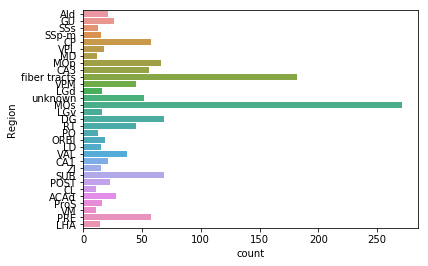

In [2]:
sf = ns.features['soma_features'].region
ct = sf["Region"].value_counts().sort_values(ascending=False)
_ = sns.countplot(y="Region", 
                  data=sf.loc[sf.Region.isin(ct.index[ct>10])],
                 )

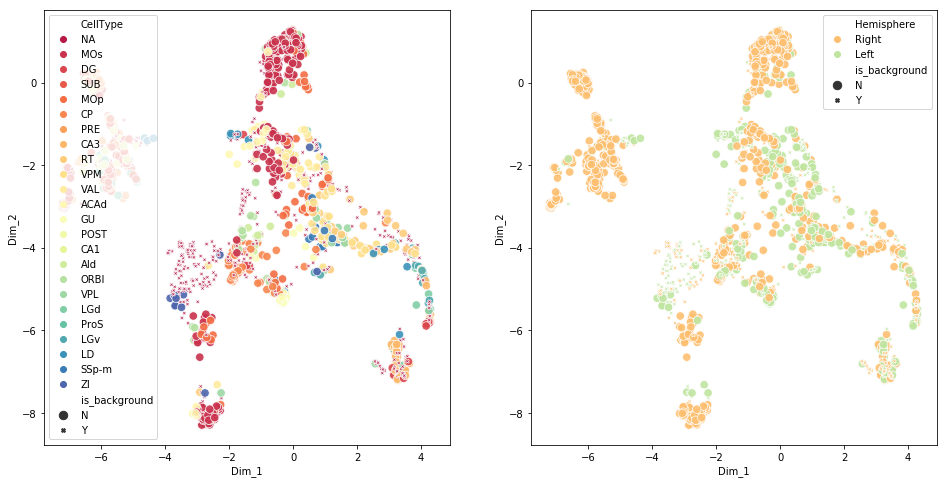

In [3]:
_ = ns.ReduceDimUMAP(feature_set="projection_features", n_neighbors=100)
_ = ns.FeatureScatter(["CellType", "Hemisphere"], map="UMAP")

Initiallization

aa=pickCLUSTERpara(method='Hierarchy')

bb=pickCLUSTERpara(method='kmeans')

cc=pickCLUSTERpara(method='dbscan')

dd=pickCLUSTERpara(method='hdbscan')

ee=pickCLUSTERpara(method='snn')

aa.to_excel('/home/penglab/FeaCal/aa.xlsx')
bb.to_excel('/home/penglab/FeaCal/bb.xlsx')
cc.to_excel('/home/penglab/FeaCal/cc.xlsx')

dd.to_excel('/home/penglab/FeaCal/dd.xlsx')

ee.to_excel('/home/penglab/FeaCal/ee.xlsx')



In [4]:
result_hier= pd.read_excel('/home/penglab/FeaCal/aa.xlsx', index_col=0)
result_kmeans= pd.read_excel('/home/penglab/FeaCal/bb.xlsx', index_col=0)
result_dbscan= pd.read_excel('/home/penglab/FeaCal/cc.xlsx', index_col=0)
result_hdbscan= pd.read_excel('/home/penglab/FeaCal/dd.xlsx', index_col=0)
result_snn= pd.read_excel('/home/penglab/FeaCal/ee.xlsx', index_col=0)

### DataFrame regionINFO includes ['index,'Vol','abbr']
regionN, count = np.unique(nmt.annotation.array, return_counts=True)
regionINFO = pd.DataFrame(index = list(regionN))
regionINFO['index'] = list(regionN)
regionINFO['Vol'] =  count
regionINFO.loc[:,'Coor'] = 'unknown'
regionINFO['Coor'].astype('object',inplace=True)
for iterI in regionINFO.index.tolist():
    if iterI in nmt.bs.level.index.tolist():
        regionINFO.loc[iterI,'abbr'] = nmt.bs.level.loc[iterI,'Abbrevation']
procI=0
for iterIDX in regionINFO.index.tolist()[1:]:
    coordi=[]
    co_1,co_2,co_3 = np.where(nmt.annotation.array==iterIDX)
    for i in range(len (co_1)):
        coordi.append((co_1[i],co_2[i],co_3[i]))
    regionINFO.at[iterIDX,'Coor'] = coordi
    procI=procI+1
    print(procI/regionINFO.shape[0])
regionINFO = regionINFO.fillna('unknown')
regionINFO.to_excel('/home/penglab/NMTcode/regionINFO.xlsx')

In [92]:

regionINFO = pd.read_excel('/home/penglab/FeaCal/regionINFO.xlsx', index_col=0)

In [45]:
#ns.features['soma_features'].raw_data
def metric_Cal(raw_data, regionINFO):
    somaDF = raw_data.copy()
    for idx in somaDF.index.tolist():
        tempCoor = (somaDF.loc[idx,'x'],somaDF.loc[idx,'y'],somaDF.loc[idx,'z'])
    
    

In [51]:
#ns.features['soma_features'].raw_data

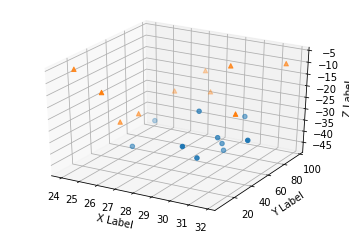

In [118]:
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


def randrange(n, vmin, vmax):
    '''
    Helper function to make an array of random numbers having shape (n, )
    with each number distributed Uniform(vmin, vmax).
    '''
    return (vmax - vmin)*np.random.rand(n) + vmin

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

n = 10

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for m, zlow, zhigh in [('o', -50, -25), ('^', -30, -5)]:
    xs = range(45)
    ys = range(45)
    zs = randrange(n, zlow, zhigh)
    ax.scatter(xs, ys, zs, marker=m)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [123]:
xs = range(45)
xs = np.repeat(xs,45)
ys = range(45)
ys = np.tile(ys,45)

In [119]:
zs = np.array()
for i in range(len(xs)):
    
    
        
        

array([26.08269632, 26.26672361, 31.75625875, 23.9984925 , 26.4943768 ,
       30.04759288, 31.75607534, 27.34888645, 26.02778995, 28.10677133])

In [120]:
ys

array([ 4.79415097, 38.8937029 , 90.63036451, 16.10182093, 74.36211347,
       63.29741618, 32.41800177, 92.23765324, 23.72264387, 82.39455709])

In [122]:
len(zs)

10

In [82]:
from scipy.spatial import distance
X = [(4681.075,4741.300,9082.175)]
coords = regionINFO.iloc[1,2]
len(distance.cdist(X, coords, 'sqeuclidean')


In [103]:
from scipy.spatial import distance
X = [(4,4,4)]
coords =[(0,0,1),(1,0,0),(0,1,0)]
distance.cdist(X, coords, 'sqeuclidean')


array([[41., 41., 41.]])

In [100]:
np.square([[6.40312424, 6.40312424, 6.40312424]])

array([[41.00000003, 41.00000003, 41.00000003]])

In [62]:
u, indices = np.unique(nmt.annotation.array, return_counts=True)
u

array([        0,         1,         2,         6,         7,         9,
              10,        12,        15,        17,        19,        20,
              23,        26,        27,        28,        30,        33,
              35,        36,        38,        41,        42,        50,
              52,        54,        56,        58,        59,        62,
              63,        64,        66,        67,        68,        72,
              74,        75,        78,        81,        83,        84,
              88,        91,        93,        96,        97,        98,
             100,       101,       102,       105,       106,       108,
             113,       114,       115,       117,       118,       120,
             121,       122,       123,       125,       126,       128,
             129,       131,       132,       133,       136,       139,
             140,       143,       145,       146,       147,       148,
             149,       153,       155,       156, 

In [68]:
co_1,co_2,co_3 = np.where(nmt.annotation.array==1126)

In [69]:
co_1

array([300, 300, 300, ..., 312, 312, 312])

In [70]:
co_2

array([250, 250, 250, ..., 259, 259, 260])

In [71]:
nmt.annotation.array[co_1[0],co_2[0],co_3[0]]

1126

In [54]:
result_hier = pd.read_excel('/home/penglab/FeaCal/aa.xlsx', index_col=0)
result_kmeans = pd.read_excel('/home/penglab/FeaCal/bb.xlsx', index_col=0)
result_dbscan = pd.read_excel('/home/penglab/FeaCal/cc.xlsx', index_col=0)
result_hdbscan = pd.read_excel('/home/penglab/FeaCal/dd.xlsx', index_col=0)
result_snn = pd.read_excel('/home/penglab/FeaCal/ee.xlsx', index_col=0)


## function obtainClusterNum(dflocal,cluster_method,dropF)
#### Return number of cluster for each prameter
* dflocal is the repeated trial result, containing ['Homogeneity', 'Completeness', 'V-measure', 'Adjusted Rand Index','Adjusted Mutual Information', 'Silhouette Coefficient', 'parameter']
* **dropF**: whether of not drop the duplicated rows
* Rerun the clustering method and obtain number of cluster in each method
* Return a dataframe containing ['Homogeneity', 'Completeness', 'V-measure', 'Adjusted Rand Index','Adjusted Mutual Information', 'Silhouette Coefficient', 'parameter','Cluster Num']

In [16]:
import ast

def obtainClusterNum(dflocal,cluster_method,dropF):
    #result_hier_self=result_hier.copy()
    colname = ['Homogeneity','Completeness','V-measure','Adjusted Rand Index','Adjusted Mutual Information','Silhouette Coefficient','parameter']
    if dropF:
        dflocal_sub = dflocal.iloc[:,:-1].drop_duplicates()
        indexls = dflocal_sub.index
    else:
        indexls = dflocal.index

    df = pd.DataFrame(columns = colname,index = indexls)
    df['Cluster Num'] = 0
    df['parameter'] = dflocal.loc[indexls,'parameter']
    for iter_idx in df.index:
        _ = ns. get_clusters(method = cluster_method,karg_dict = ast.literal_eval(df.loc[iter_idx]['parameter']))
        h = metrics.homogeneity_score(ns.metadata['CellType'],ns.metadata['Cluster'])
        c = metrics.completeness_score(ns.metadata['CellType'],ns.metadata['Cluster'])
        V = metrics.v_measure_score(ns.metadata['CellType'],ns.metadata['Cluster'])
        ARI = metrics.adjusted_rand_score(ns.metadata['CellType'],ns.metadata['Cluster'])
        AMI = metrics.adjusted_mutual_info_score(ns.metadata['CellType'],ns.metadata['Cluster'])
        typeR, typeC = np.unique(ns.metadata['Cluster'], return_counts = True)
        if len(typeR)<2:
            SS = 'below'
        elif len(typeR)>=ns.UMAP.shape[0]:
            SS = 'above'
        else:
            SS = metrics.silhouette_score(ns.UMAP, ns.metadata['Cluster'], metric='sqeuclidean')
        df.loc[iter_idx,'Homogeneity'] = h
        df.loc[iter_idx,'Completeness'] = c
        df.loc[iter_idx,'V-measure'] = V
        df.loc[iter_idx,'Adjusted Rand Index'] = ARI
        df.loc[iter_idx,'Adjusted Mutual Information'] = AMI
        df.loc[iter_idx,'Silhouette Coefficient'] = SS
        typeR, typeC = np.unique(ns.metadata['Cluster'], return_counts = True)
        #print(hdbscan_dict)
        df.loc[iter_idx,'Cluster Num'] = len(typeR)
                        
    return df

#### unique_* is a dataframe containing the unique rows of the original trails, it also record number of cluster under that parameter

In [17]:
unique_hier = obtainClusterNum(result_hier.copy(),'Hierarchy',1)
unique_hier.to_excel('/home/penglab/FeaCal/dataSource/axonMor/unique_hier.xlsx')
unique_hier = pd.read_excel('/home/penglab/FeaCal/dataSource/axonMor/unique_hier.xlsx', index_col=0)
unique_kmeans = obtainClusterNum(result_kmeans.copy(),'Kmeans',1)
unique_kmeans.to_excel('/home/penglab/FeaCal/dataSource/axonMor/unique_kmeans.xlsx')
unique_kmeans = pd.read_excel('/home/penglab/FeaCal/dataSource/axonMor/unique_kmeans.xlsx', index_col=0)
unique_dbscan = obtainClusterNum(result_dbscan.copy(),'DBSCAN',1)
unique_dbscan.to_excel('/home/penglab/FeaCal/dataSource/axonMor/unique_dbscan.xlsx')
unique_dbscan = pd.read_excel('/home/penglab/FeaCal/dataSource/axonMor/unique_dbscan.xlsx', index_col=0)
unique_hdbscan = obtainClusterNum(result_hdbscan.copy(),'HDBSCAN',1)
unique_hdbscan.to_excel('/home/penglab/FeaCal/dataSource/axonMor/unique_hdbscan.xlsx')
unique_hdbscan = pd.read_excel('/home/penglab/FeaCal/dataSource/axonMor/unique_hdbscan.xlsx', index_col=0)


Result of Hierarchy CLustering
Homogeneity: 0.710
Completeness: 0.387
V-measure: 0.501
Adjusted Rand Index: 0.008
Adjusted Mutual Information: 0.048
Silhouette Coefficient: 0.437
Result of Hierarchy CLustering
Homogeneity: 0.784
Completeness: 0.401
V-measure: 0.531
Adjusted Rand Index: 0.005


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.035
Silhouette Coefficient: 0.458
Result of Hierarchy CLustering
Homogeneity: 0.779
Completeness: 0.401
V-measure: 0.529
Adjusted Rand Index: 0.005


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.037
Silhouette Coefficient: 0.459
Result of Hierarchy CLustering
Homogeneity: 0.778
Completeness: 0.401
V-measure: 0.529
Adjusted Rand Index: 0.005


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.037
Silhouette Coefficient: 0.457
Result of Hierarchy CLustering
Homogeneity: 0.000
Completeness: 1.000
V-measure: 0.000
Adjusted Rand Index: 0.000
Adjusted Mutual Information: 0.000
Number of labels is 1, no available Silhouette Coefficient can be calculated
Result of Hierarchy CLustering
Homogeneity: 0.572
Completeness: 0.383
V-measure: 0.459
Adjusted Rand Index: 0.054


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.099
Silhouette Coefficient: 0.222
Result of Hierarchy CLustering
Homogeneity: 0.892
Completeness: 0.423
V-measure: 0.574
Adjusted Rand Index: 0.002


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.019
Silhouette Coefficient: 0.408
Result of Hierarchy CLustering
Homogeneity: 0.712
Completeness: 0.389
V-measure: 0.503
Adjusted Rand Index: 0.010


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.052
Silhouette Coefficient: 0.294
Result of Hierarchy CLustering
Homogeneity: 0.797
Completeness: 0.405
V-measure: 0.537
Adjusted Rand Index: 0.005


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.037
Silhouette Coefficient: 0.312
Result of Hierarchy CLustering
Homogeneity: 0.796
Completeness: 0.405
V-measure: 0.537
Adjusted Rand Index: 0.005


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.037
Silhouette Coefficient: 0.301
Result of Hierarchy CLustering


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.795
Completeness: 0.405
V-measure: 0.537
Adjusted Rand Index: 0.006
Adjusted Mutual Information: 0.039
Silhouette Coefficient: 0.297


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Hierarchy CLustering
Homogeneity: 0.088
Completeness: 0.375
V-measure: 0.143
Adjusted Rand Index: 0.092
Adjusted Mutual Information: 0.069
Silhouette Coefficient: 0.743
Result of Hierarchy CLustering
Homogeneity: 0.559
Completeness: 0.379
V-measure: 0.451
Adjusted Rand Index: 0.051
Adjusted Mutual Information: 0.095
Silhouette Coefficient: 0.117


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Hierarchy CLustering
Homogeneity: 0.890
Completeness: 0.422
V-measure: 0.572
Adjusted Rand Index: 0.002
Adjusted Mutual Information: 0.017
Silhouette Coefficient: 0.290


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Hierarchy CLustering
Homogeneity: 0.697
Completeness: 0.388
V-measure: 0.499
Adjusted Rand Index: 0.012
Adjusted Mutual Information: 0.062
Silhouette Coefficient: 0.485
Result of Hierarchy CLustering
Homogeneity: 0.791
Completeness: 0.405
V-measure: 0.536
Adjusted Rand Index: 0.006


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.041
Silhouette Coefficient: 0.445
Result of Hierarchy CLustering
Homogeneity: 0.792
Completeness: 0.405
V-measure: 0.536
Adjusted Rand Index: 0.006


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.041
Silhouette Coefficient: 0.444
Result of Hierarchy CLustering
Homogeneity: 0.790
Completeness: 0.405
V-measure: 0.535
Adjusted Rand Index: 0.006


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.041
Silhouette Coefficient: 0.445
Result of Hierarchy CLustering
Homogeneity: 0.543
Completeness: 0.377
V-measure: 0.445
Adjusted Rand Index: 0.051
Adjusted Mutual Information: 0.111
Silhouette Coefficient: 0.208


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Hierarchy CLustering
Homogeneity: 0.891
Completeness: 0.423
V-measure: 0.573
Adjusted Rand Index: 0.002
Adjusted Mutual Information: 0.018
Silhouette Coefficient: 0.404


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Hierarchy CLustering
Homogeneity: 0.709
Completeness: 0.388
V-measure: 0.502
Adjusted Rand Index: 0.009
Adjusted Mutual Information: 0.051
Silhouette Coefficient: 0.450
Result of Hierarchy CLustering
Homogeneity: 0.780
Completeness: 0.400
V-measure: 0.529
Adjusted Rand Index: 0.005


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.035
Silhouette Coefficient: 0.467
Result of Hierarchy CLustering
Homogeneity: 0.779
Completeness: 0.401
V-measure: 0.529
Adjusted Rand Index: 0.005


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.037
Silhouette Coefficient: 0.470
Result of Hierarchy CLustering
Homogeneity: 0.778
Completeness: 0.401
V-measure: 0.529
Adjusted Rand Index: 0.005


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.037
Silhouette Coefficient: 0.468
Result of Hierarchy CLustering
Homogeneity: 0.618
Completeness: 0.387
V-measure: 0.476
Adjusted Rand Index: 0.049
Adjusted Mutual Information: 0.099
Silhouette Coefficient: 0.328


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Hierarchy CLustering
Homogeneity: 0.892
Completeness: 0.423
V-measure: 0.574
Adjusted Rand Index: 0.002
Adjusted Mutual Information: 0.019
Silhouette Coefficient: 0.408


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Hierarchy CLustering
Homogeneity: 0.103
Completeness: 0.606
V-measure: 0.176
Adjusted Rand Index: 0.092
Adjusted Mutual Information: 0.087
Silhouette Coefficient: 0.571
Result of Hierarchy CLustering
Homogeneity: 0.708
Completeness: 0.382
V-measure: 0.496
Adjusted Rand Index: 0.006
Adjusted Mutual Information: 0.039
Silhouette Coefficient: -0.459


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Hierarchy CLustering
Homogeneity: 0.775
Completeness: 0.396
V-measure: 0.525
Adjusted Rand Index: 0.004
Adjusted Mutual Information: 0.029
Silhouette Coefficient: -0.490


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Hierarchy CLustering
Homogeneity: 0.774
Completeness: 0.396
V-measure: 0.524
Adjusted Rand Index: 0.004
Adjusted Mutual Information: 0.028
Silhouette Coefficient: -0.490


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Hierarchy CLustering
Homogeneity: 0.862
Completeness: 0.419
V-measure: 0.563
Adjusted Rand Index: 0.004
Adjusted Mutual Information: 0.025
Silhouette Coefficient: -0.364


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Hierarchy CLustering
Homogeneity: 0.875
Completeness: 0.417
V-measure: 0.564
Adjusted Rand Index: 0.001
Adjusted Mutual Information: 0.011
Silhouette Coefficient: -0.325


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Hierarchy CLustering
Homogeneity: 0.709
Completeness: 0.392
V-measure: 0.505
Adjusted Rand Index: 0.013
Adjusted Mutual Information: 0.063
Silhouette Coefficient: 0.474


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Hierarchy CLustering
Homogeneity: 0.788
Completeness: 0.404
V-measure: 0.534
Adjusted Rand Index: 0.006
Adjusted Mutual Information: 0.041
Silhouette Coefficient: 0.468


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Hierarchy CLustering
Homogeneity: 0.789
Completeness: 0.405
V-measure: 0.535
Adjusted Rand Index: 0.006
Adjusted Mutual Information: 0.042
Silhouette Coefficient: 0.465


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Hierarchy CLustering
Homogeneity: 0.789
Completeness: 0.404
V-measure: 0.535
Adjusted Rand Index: 0.006
Adjusted Mutual Information: 0.041
Silhouette Coefficient: 0.472


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Hierarchy CLustering
Homogeneity: 0.609
Completeness: 0.386
V-measure: 0.472
Adjusted Rand Index: 0.049
Adjusted Mutual Information: 0.100
Silhouette Coefficient: 0.342
Result of Hierarchy CLustering
Homogeneity: 0.890
Completeness: 0.422
V-measure: 0.573
Adjusted Rand Index: 0.002


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.019
Silhouette Coefficient: 0.420
Result of Hierarchy CLustering
Homogeneity: 1.000
Completeness: 0.443
V-measure: 0.614
Adjusted Rand Index: 0.000


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: -0.000
Number of labels is equal to the number of samples, no available Silhouette Coefficient can be calculated
Result of Hierarchy CLustering
Homogeneity: 0.693
Completeness: 0.383
V-measure: 0.493
Adjusted Rand Index: 0.009
Adjusted Mutual Information: 0.047
Silhouette Coefficient: 0.141
Result of Hierarchy CLustering
Homogeneity: 0.790
Completeness: 0.401
V-measure: 0.532
Adjusted Rand Index: 0.004


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.030
Silhouette Coefficient: 0.190
Result of Hierarchy CLustering
Homogeneity: 0.790
Completeness: 0.401
V-measure: 0.532
Adjusted Rand Index: 0.004


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.031
Silhouette Coefficient: 0.191
Result of Hierarchy CLustering
Homogeneity: 0.788
Completeness: 0.401
V-measure: 0.532
Adjusted Rand Index: 0.004


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.031
Silhouette Coefficient: 0.191
Result of Hierarchy CLustering
Homogeneity: 0.589
Completeness: 0.374
V-measure: 0.457
Adjusted Rand Index: 0.039
Adjusted Mutual Information: 0.089
Silhouette Coefficient: 0.051


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Hierarchy CLustering
Homogeneity: 0.884
Completeness: 0.420
V-measure: 0.569
Adjusted Rand Index: 0.002
Adjusted Mutual Information: 0.014
Silhouette Coefficient: 0.239


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Hierarchy CLustering
Homogeneity: 0.702
Completeness: 0.387
V-measure: 0.499
Adjusted Rand Index: 0.010
Adjusted Mutual Information: 0.052
Silhouette Coefficient: 0.213


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Hierarchy CLustering
Homogeneity: 0.794
Completeness: 0.403
V-measure: 0.535
Adjusted Rand Index: 0.005
Adjusted Mutual Information: 0.034
Silhouette Coefficient: 0.279


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Hierarchy CLustering
Homogeneity: 0.791
Completeness: 0.403
V-measure: 0.534
Adjusted Rand Index: 0.005
Adjusted Mutual Information: 0.034
Silhouette Coefficient: 0.275


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Hierarchy CLustering
Homogeneity: 0.790
Completeness: 0.402
V-measure: 0.533
Adjusted Rand Index: 0.005
Adjusted Mutual Information: 0.034
Silhouette Coefficient: 0.275


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Hierarchy CLustering
Homogeneity: 0.775
Completeness: 0.416
V-measure: 0.542
Adjusted Rand Index: 0.034
Adjusted Mutual Information: 0.074
Silhouette Coefficient: 0.207


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Hierarchy CLustering
Homogeneity: 0.884
Completeness: 0.420
V-measure: 0.569
Adjusted Rand Index: 0.002
Adjusted Mutual Information: 0.016
Silhouette Coefficient: 0.296


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Hierarchy CLustering
Homogeneity: 0.716
Completeness: 0.392
V-measure: 0.507
Adjusted Rand Index: 0.011
Adjusted Mutual Information: 0.059
Silhouette Coefficient: 0.473


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Hierarchy CLustering
Homogeneity: 0.796
Completeness: 0.404
V-measure: 0.536
Adjusted Rand Index: 0.005
Adjusted Mutual Information: 0.034
Silhouette Coefficient: 0.471


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Hierarchy CLustering
Homogeneity: 0.795
Completeness: 0.404
V-measure: 0.536
Adjusted Rand Index: 0.005
Adjusted Mutual Information: 0.035
Silhouette Coefficient: 0.470


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Hierarchy CLustering
Homogeneity: 0.795
Completeness: 0.404
V-measure: 0.536
Adjusted Rand Index: 0.005
Adjusted Mutual Information: 0.035
Silhouette Coefficient: 0.475


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Hierarchy CLustering
Homogeneity: 0.758
Completeness: 0.396
V-measure: 0.520
Adjusted Rand Index: 0.006
Adjusted Mutual Information: 0.043
Silhouette Coefficient: 0.534


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Hierarchy CLustering
Homogeneity: 0.785
Completeness: 0.401
V-measure: 0.531
Adjusted Rand Index: 0.005
Adjusted Mutual Information: 0.036
Silhouette Coefficient: 0.519


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Hierarchy CLustering
Homogeneity: 0.108
Completeness: 0.320
V-measure: 0.161
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.076
Silhouette Coefficient: 0.635
Result of Hierarchy CLustering
Homogeneity: 1.000
Completeness: 0.443
V-measure: 0.614
Adjusted Rand Index: 0.000


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: -0.000
Number of labels is equal to the number of samples, no available Silhouette Coefficient can be calculated
Result of Hierarchy CLustering
Homogeneity: 0.863
Completeness: 0.416
V-measure: 0.561
Adjusted Rand Index: 0.002
Adjusted Mutual Information: 0.020
Silhouette Coefficient: 0.441


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Hierarchy CLustering
Homogeneity: 0.743
Completeness: 0.393
V-measure: 0.514
Adjusted Rand Index: 0.007
Adjusted Mutual Information: 0.047
Silhouette Coefficient: 0.372


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Hierarchy CLustering
Homogeneity: 0.782
Completeness: 0.400
V-measure: 0.529
Adjusted Rand Index: 0.005
Adjusted Mutual Information: 0.037
Silhouette Coefficient: 0.345


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Hierarchy CLustering
Homogeneity: 0.206
Completeness: 0.304
V-measure: 0.246
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.119
Silhouette Coefficient: 0.383
Result of Hierarchy CLustering
Homogeneity: 0.870
Completeness: 0.418
V-measure: 0.565
Adjusted Rand Index: 0.002


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.019
Silhouette Coefficient: 0.311
Result of Hierarchy CLustering
Homogeneity: 0.748
Completeness: 0.392
V-measure: 0.515
Adjusted Rand Index: 0.006


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.038
Silhouette Coefficient: 0.559
Result of Hierarchy CLustering
Homogeneity: 0.782
Completeness: 0.400
V-measure: 0.529
Adjusted Rand Index: 0.005


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.035
Silhouette Coefficient: 0.545
Result of Hierarchy CLustering
Homogeneity: 0.434
Completeness: 0.332
V-measure: 0.376
Adjusted Rand Index: 0.040
Adjusted Mutual Information: 0.124
Silhouette Coefficient: 0.521


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Hierarchy CLustering
Homogeneity: 0.860
Completeness: 0.415
V-measure: 0.560
Adjusted Rand Index: 0.002
Adjusted Mutual Information: 0.017
Silhouette Coefficient: 0.441


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Hierarchy CLustering
Homogeneity: 0.758
Completeness: 0.396
V-measure: 0.520
Adjusted Rand Index: 0.006
Adjusted Mutual Information: 0.043
Silhouette Coefficient: 0.531


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Hierarchy CLustering
Homogeneity: 0.786
Completeness: 0.401
V-measure: 0.531
Adjusted Rand Index: 0.005
Adjusted Mutual Information: 0.036
Silhouette Coefficient: 0.523


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Hierarchy CLustering
Homogeneity: 0.503
Completeness: 0.348
V-measure: 0.412
Adjusted Rand Index: 0.039
Adjusted Mutual Information: 0.110
Silhouette Coefficient: 0.571
Result of Hierarchy CLustering
Homogeneity: 0.863
Completeness: 0.416
V-measure: 0.561
Adjusted Rand Index: 0.002


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.020
Silhouette Coefficient: 0.442
Result of Hierarchy CLustering
Homogeneity: 0.494
Completeness: 0.325
V-measure: 0.392
Adjusted Rand Index: 0.011


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.048
Silhouette Coefficient: -0.850
Result of Hierarchy CLustering
Homogeneity: 0.517
Completeness: 0.332
V-measure: 0.404
Adjusted Rand Index: 0.010
Adjusted Mutual Information: 0.047
Silhouette Coefficient: -0.905


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Hierarchy CLustering
Homogeneity: 0.103
Completeness: 0.606
V-measure: 0.176
Adjusted Rand Index: 0.092
Adjusted Mutual Information: 0.087
Silhouette Coefficient: 0.571
Result of Hierarchy CLustering
Homogeneity: 0.517
Completeness: 0.332
V-measure: 0.404
Adjusted Rand Index: 0.010
Adjusted Mutual Information: 0.046
Silhouette Coefficient: -0.903


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Hierarchy CLustering
Homogeneity: 0.753
Completeness: 0.393
V-measure: 0.516
Adjusted Rand Index: 0.006
Adjusted Mutual Information: 0.037
Silhouette Coefficient: -0.391
Result of Hierarchy CLustering
Homogeneity: 0.777
Completeness: 0.397
V-measure: 0.525
Adjusted Rand Index: 0.004
Adjusted Mutual Information: 0.029
Silhouette Coefficient: -0.426


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Hierarchy CLustering
Homogeneity: 0.075
Completeness: 0.323
V-measure: 0.122
Adjusted Rand Index: 0.031
Adjusted Mutual Information: 0.056
Silhouette Coefficient: 0.657
Result of Hierarchy CLustering
Homogeneity: 0.859
Completeness: 0.413
V-measure: 0.558
Adjusted Rand Index: 0.002


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.013
Silhouette Coefficient: -0.336
Result of Hierarchy CLustering
Homogeneity: 0.749
Completeness: 0.393
V-measure: 0.516


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Rand Index: 0.006
Adjusted Mutual Information: 0.041
Silhouette Coefficient: 0.572


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Hierarchy CLustering
Homogeneity: 0.780
Completeness: 0.400
V-measure: 0.529
Adjusted Rand Index: 0.005
Adjusted Mutual Information: 0.036
Silhouette Coefficient: 0.550


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Hierarchy CLustering
Homogeneity: 0.455
Completeness: 0.336
V-measure: 0.387
Adjusted Rand Index: 0.043
Adjusted Mutual Information: 0.118
Silhouette Coefficient: 0.544
Result of Hierarchy CLustering
Homogeneity: 1.000
Completeness: 0.443
V-measure: 0.614
Adjusted Rand Index: 0.000


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: -0.000
Number of labels is equal to the number of samples, no available Silhouette Coefficient can be calculated
Result of Hierarchy CLustering
Homogeneity: 0.864
Completeness: 0.416
V-measure: 0.562
Adjusted Rand Index: 0.002
Adjusted Mutual Information: 0.020
Silhouette Coefficient: 0.454


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Hierarchy CLustering
Homogeneity: 0.750
Completeness: 0.393
V-measure: 0.516
Adjusted Rand Index: 0.006
Adjusted Mutual Information: 0.040
Silhouette Coefficient: 0.285


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Hierarchy CLustering
Homogeneity: 0.777
Completeness: 0.398
V-measure: 0.527
Adjusted Rand Index: 0.005
Adjusted Mutual Information: 0.035
Silhouette Coefficient: 0.232


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Hierarchy CLustering
Homogeneity: 0.278
Completeness: 0.308
V-measure: 0.292
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.151
Silhouette Coefficient: 0.198
Result of Hierarchy CLustering
Homogeneity: 0.864
Completeness: 0.416
V-measure: 0.561
Adjusted Rand Index: 0.002


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.018
Silhouette Coefficient: 0.238
Result of Hierarchy CLustering
Homogeneity: 0.734
Completeness: 0.388
V-measure: 0.507
Adjusted Rand Index: 0.005


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.036
Silhouette Coefficient: 0.328
Result of Hierarchy CLustering
Homogeneity: 0.774
Completeness: 0.397
V-measure: 0.525
Adjusted Rand Index: 0.004


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.031
Silhouette Coefficient: 0.299
Result of Hierarchy CLustering
Homogeneity: 0.279
Completeness: 0.303
V-measure: 0.291
Adjusted Rand Index: 0.060
Adjusted Mutual Information: 0.146
Silhouette Coefficient: 0.381


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Hierarchy CLustering
Homogeneity: 1.000
Completeness: 0.443
V-measure: 0.614
Adjusted Rand Index: 0.000
Adjusted Mutual Information: -0.000
Number of labels is equal to the number of samples, no available Silhouette Coefficient can be calculated
Result of Hierarchy CLustering
Homogeneity: 0.864
Completeness: 0.415
V-measure: 0.561
Adjusted Rand Index: 0.002
Adjusted Mutual Information: 0.016
Silhouette Coefficient: 0.306


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Hierarchy CLustering
Homogeneity: 0.757
Completeness: 0.395
V-measure: 0.519
Adjusted Rand Index: 0.006
Adjusted Mutual Information: 0.041
Silhouette Coefficient: 0.569


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Hierarchy CLustering
Homogeneity: 0.784
Completeness: 0.400
V-measure: 0.530
Adjusted Rand Index: 0.005
Adjusted Mutual Information: 0.035
Silhouette Coefficient: 0.549


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Hierarchy CLustering
Homogeneity: 0.442
Completeness: 0.336
V-measure: 0.382
Adjusted Rand Index: 0.047
Adjusted Mutual Information: 0.127
Silhouette Coefficient: 0.546
Result of Hierarchy CLustering
Homogeneity: 1.000
Completeness: 0.443
V-measure: 0.614
Adjusted Rand Index: 0.000


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: -0.000
Number of labels is equal to the number of samples, no available Silhouette Coefficient can be calculated
Result of Hierarchy CLustering
Homogeneity: 1.000
Completeness: 0.443
V-measure: 0.614
Adjusted Rand Index: 0.000
Adjusted Mutual Information: -0.000
Number of labels is equal to the number of samples, no available Silhouette Coefficient can be calculated
Result of Hierarchy CLustering
Homogeneity: 1.000
Completeness: 0.443
V-measure: 0.614
Adjusted Rand Index: 0.000
Adjusted Mutual Information: -0.000
Number of labels is equal to the number of samples, no available Silhouette Coefficient can be calculated
Result of Hierarchy CLustering
Homogeneity: 0.731
Completeness: 0.390
V-measure: 0.509
Adjusted Rand Index: 0.007
Adjusted Mutual Information: 0.046
Silhouette Coefficient: 0.580


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Hierarchy CLustering
Homogeneity: 0.784
Completeness: 0.401
V-measure: 0.530
Adjusted Rand Index: 0.005
Adjusted Mutual Information: 0.036
Silhouette Coefficient: 0.533


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Hierarchy CLustering
Homogeneity: 0.082
Completeness: 0.347
V-measure: 0.133
Adjusted Rand Index: 0.059
Adjusted Mutual Information: 0.063
Silhouette Coefficient: 0.670
Result of Hierarchy CLustering
Homogeneity: 1.000
Completeness: 0.443
V-measure: 0.614
Adjusted Rand Index: 0.000
Adjusted Mutual Information: -0.000
Number of labels is equal to the number of samples, no available Silhouette Coefficient can be calculated
Result of Hierarchy CLustering
Homogeneity: 0.873
Completeness: 0.419
V-measure: 0.566
Adjusted Rand Index: 0.002
Adjusted Mutual Information: 0.020
Silhouette Coefficient: 0.433


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Hierarchy CLustering
Homogeneity: 0.731
Completeness: 0.391
V-measure: 0.509
Adjusted Rand Index: 0.007
Adjusted Mutual Information: 0.048
Silhouette Coefficient: 0.382


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Hierarchy CLustering
Homogeneity: 0.793
Completeness: 0.403
V-measure: 0.535
Adjusted Rand Index: 0.005
Adjusted Mutual Information: 0.037
Silhouette Coefficient: 0.349


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Hierarchy CLustering
Homogeneity: 0.122
Completeness: 0.313
V-measure: 0.176
Adjusted Rand Index: 0.060
Adjusted Mutual Information: 0.079
Silhouette Coefficient: 0.113
Result of Hierarchy CLustering
Homogeneity: 0.878
Completeness: 0.420
V-measure: 0.568
Adjusted Rand Index: 0.002


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.019
Silhouette Coefficient: 0.299
Result of Hierarchy CLustering
Homogeneity: 0.747
Completeness: 0.394
V-measure: 0.515
Adjusted Rand Index: 0.007


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.043
Silhouette Coefficient: 0.572
Result of Hierarchy CLustering
Homogeneity: 0.783
Completeness: 0.401
V-measure: 0.530
Adjusted Rand Index: 0.005


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.037
Silhouette Coefficient: 0.549
Result of Hierarchy CLustering
Homogeneity: 0.318
Completeness: 0.317
V-measure: 0.317
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.166
Silhouette Coefficient: 0.572
Result of Hierarchy CLustering


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 1.000
Completeness: 0.443
V-measure: 0.614
Adjusted Rand Index: 0.000
Adjusted Mutual Information: -0.000
Number of labels is equal to the number of samples, no available Silhouette Coefficient can be calculated
Result of Hierarchy CLustering
Homogeneity: 1.000
Completeness: 0.443
V-measure: 0.614
Adjusted Rand Index: 0.000
Adjusted Mutual Information: -0.000
Number of labels is equal to the number of samples, no available Silhouette Coefficient can be calculated
Result of Hierarchy CLustering
Homogeneity: 1.000
Completeness: 0.443
V-measure: 0.614
Adjusted Rand Index: 0.000
Adjusted Mutual Information: -0.000
Number of labels is equal to the number of samples, no available Silhouette Coefficient can be calculated
Result of Hierarchy CLustering
Homogeneity: 0.868
Completeness: 0.417
V-measure: 0.563
Adjusted Rand Index: 0.002
Adjusted Mutual Information: 0.018
Silhouette Coefficient: 0.438


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Hierarchy CLustering
Homogeneity: 0.734
Completeness: 0.391
V-measure: 0.510
Adjusted Rand Index: 0.006
Adjusted Mutual Information: 0.045
Silhouette Coefficient: 0.579


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Hierarchy CLustering
Homogeneity: 0.783
Completeness: 0.401
V-measure: 0.530
Adjusted Rand Index: 0.005
Adjusted Mutual Information: 0.036
Silhouette Coefficient: 0.533


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Hierarchy CLustering
Homogeneity: 0.399
Completeness: 0.331
V-measure: 0.362
Adjusted Rand Index: 0.055
Adjusted Mutual Information: 0.144
Silhouette Coefficient: 0.549
Result of Hierarchy CLustering
Homogeneity: 0.872
Completeness: 0.418
V-measure: 0.566
Adjusted Rand Index: 0.002


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.020
Silhouette Coefficient: 0.436
Result of Hierarchy CLustering
Homogeneity: 0.515
Completeness: 0.331
V-measure: 0.403
Adjusted Rand Index: 0.010


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.046
Silhouette Coefficient: -0.901
Result of Hierarchy CLustering
Homogeneity: 0.516
Completeness: 0.331
V-measure: 0.403
Adjusted Rand Index: 0.010
Adjusted Mutual Information: 0.046
Silhouette Coefficient: -0.905


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Hierarchy CLustering
Homogeneity: 0.752
Completeness: 0.393
V-measure: 0.516
Adjusted Rand Index: 0.006
Adjusted Mutual Information: 0.040
Silhouette Coefficient: -0.422
Result of Hierarchy CLustering
Homogeneity: 0.787
Completeness: 0.400
V-measure: 0.530
Adjusted Rand Index: 0.004
Adjusted Mutual Information: 0.030
Silhouette Coefficient: -0.446


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Hierarchy CLustering
Homogeneity: 0.863
Completeness: 0.414
V-measure: 0.559
Adjusted Rand Index: 0.001
Adjusted Mutual Information: 0.012
Silhouette Coefficient: -0.331


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Hierarchy CLustering
Homogeneity: 0.729
Completeness: 0.388
V-measure: 0.507
Adjusted Rand Index: 0.006
Adjusted Mutual Information: 0.041
Silhouette Coefficient: 0.585


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Hierarchy CLustering
Homogeneity: 0.783
Completeness: 0.400
V-measure: 0.530
Adjusted Rand Index: 0.005
Adjusted Mutual Information: 0.034
Silhouette Coefficient: 0.563


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Hierarchy CLustering
Homogeneity: 0.335
Completeness: 0.319
V-measure: 0.327
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.554
Result of Hierarchy CLustering
Homogeneity: 0.871
Completeness: 0.418
V-measure: 0.565
Adjusted Rand Index: 0.002


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.020
Silhouette Coefficient: 0.451
Result of Hierarchy CLustering
Homogeneity: 0.725
Completeness: 0.387
V-measure: 0.505
Adjusted Rand Index: 0.006


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.042
Silhouette Coefficient: 0.290
Result of Hierarchy CLustering
Homogeneity: 0.775
Completeness: 0.397
V-measure: 0.525
Adjusted Rand Index: 0.004


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.033
Silhouette Coefficient: 0.235
Result of Hierarchy CLustering
Homogeneity: 0.198
Completeness: 0.308
V-measure: 0.241
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.124
Silhouette Coefficient: 0.412
Result of Hierarchy CLustering


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.868
Completeness: 0.416
V-measure: 0.563
Adjusted Rand Index: 0.002
Adjusted Mutual Information: 0.016
Silhouette Coefficient: 0.240


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Hierarchy CLustering
Homogeneity: 0.736
Completeness: 0.390
V-measure: 0.509
Adjusted Rand Index: 0.006
Adjusted Mutual Information: 0.040
Silhouette Coefficient: 0.324


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Hierarchy CLustering
Homogeneity: 0.780
Completeness: 0.398
V-measure: 0.527
Adjusted Rand Index: 0.004
Adjusted Mutual Information: 0.031
Silhouette Coefficient: 0.306


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Hierarchy CLustering
Homogeneity: 0.176
Completeness: 0.335
V-measure: 0.230
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.121
Silhouette Coefficient: 0.380
Result of Hierarchy CLustering
Homogeneity: 0.868
Completeness: 0.416
V-measure: 0.563
Adjusted Rand Index: 0.002


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.016
Silhouette Coefficient: 0.304
Result of Hierarchy CLustering
Homogeneity: 0.740
Completeness: 0.390
V-measure: 0.511
Adjusted Rand Index: 0.006


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.039
Silhouette Coefficient: 0.588
Result of Hierarchy CLustering
Homogeneity: 0.787
Completeness: 0.401
V-measure: 0.531
Adjusted Rand Index: 0.005


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.033
Silhouette Coefficient: 0.558
Result of Hierarchy CLustering
Homogeneity: 0.338
Completeness: 0.321
V-measure: 0.330
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.563


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Hierarchy CLustering
Homogeneity: 1.000
Completeness: 0.443
V-measure: 0.614
Adjusted Rand Index: 0.000


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: -0.000
Number of labels is equal to the number of samples, no available Silhouette Coefficient can be calculated
Result of Hierarchy CLustering
Homogeneity: 1.000
Completeness: 0.443
V-measure: 0.614
Adjusted Rand Index: 0.000
Adjusted Mutual Information: -0.000
Number of labels is equal to the number of samples, no available Silhouette Coefficient can be calculated
Result of Hierarchy CLustering
Homogeneity: 0.870
Completeness: 0.418
V-measure: 0.565
Adjusted Rand Index: 0.002
Adjusted Mutual Information: 0.020
Silhouette Coefficient: 0.452


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Hierarchy CLustering
Homogeneity: 0.731
Completeness: 0.391
V-measure: 0.509
Adjusted Rand Index: 0.007
Adjusted Mutual Information: 0.046
Silhouette Coefficient: 0.556


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Hierarchy CLustering
Homogeneity: 0.785
Completeness: 0.402
V-measure: 0.531
Adjusted Rand Index: 0.005
Adjusted Mutual Information: 0.037
Silhouette Coefficient: 0.533


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Hierarchy CLustering
Homogeneity: 0.091
Completeness: 0.388
V-measure: 0.147
Adjusted Rand Index: 0.101
Adjusted Mutual Information: 0.072
Silhouette Coefficient: 0.750
Result of Hierarchy CLustering
Homogeneity: 0.872
Completeness: 0.418
V-measure: 0.566
Adjusted Rand Index: 0.002
Adjusted Mutual Information: 0.020
Silhouette Coefficient: 0.433
Result of Hierarchy CLustering
Homogeneity: 0.738
Completeness: 0.393
V-measure: 0.513
Adjusted Rand Index: 0.007


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.049
Silhouette Coefficient: 0.363
Result of Hierarchy CLustering
Homogeneity: 0.794
Completeness: 0.404
V-measure: 0.535
Adjusted Rand Index: 0.005


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.038
Silhouette Coefficient: 0.345
Result of Hierarchy CLustering
Homogeneity: 0.132
Completeness: 0.284
V-measure: 0.180
Adjusted Rand Index: 0.048
Adjusted Mutual Information: 0.081
Silhouette Coefficient: 0.339
Result of Hierarchy CLustering


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.878
Completeness: 0.420
V-measure: 0.568
Adjusted Rand Index: 0.002
Adjusted Mutual Information: 0.019
Silhouette Coefficient: 0.297


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Hierarchy CLustering
Homogeneity: 0.747
Completeness: 0.393
V-measure: 0.515
Adjusted Rand Index: 0.007
Adjusted Mutual Information: 0.043
Silhouette Coefficient: 0.574


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Hierarchy CLustering
Homogeneity: 0.783
Completeness: 0.400
V-measure: 0.530
Adjusted Rand Index: 0.005
Adjusted Mutual Information: 0.036
Silhouette Coefficient: 0.545


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Hierarchy CLustering
Homogeneity: 0.317
Completeness: 0.314
V-measure: 0.316
Adjusted Rand Index: 0.061
Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.500
Result of Hierarchy CLustering
Homogeneity: 1.000
Completeness: 0.443
V-measure: 0.614
Adjusted Rand Index: 0.000


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: -0.000
Number of labels is equal to the number of samples, no available Silhouette Coefficient can be calculated
Result of Hierarchy CLustering
Homogeneity: 0.868
Completeness: 0.417
V-measure: 0.563
Adjusted Rand Index: 0.002
Adjusted Mutual Information: 0.018
Silhouette Coefficient: 0.437


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Hierarchy CLustering
Homogeneity: 0.738
Completeness: 0.393
V-measure: 0.513
Adjusted Rand Index: 0.007
Adjusted Mutual Information: 0.048
Silhouette Coefficient: 0.559


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Hierarchy CLustering
Homogeneity: 0.784
Completeness: 0.401
V-measure: 0.531
Adjusted Rand Index: 0.005
Adjusted Mutual Information: 0.038
Silhouette Coefficient: 0.535


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Hierarchy CLustering
Homogeneity: 0.400
Completeness: 0.328
V-measure: 0.360
Adjusted Rand Index: 0.051
Adjusted Mutual Information: 0.137
Silhouette Coefficient: 0.483
Result of Hierarchy CLustering
Homogeneity: 0.871
Completeness: 0.418
V-measure: 0.565
Adjusted Rand Index: 0.002


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.020
Silhouette Coefficient: 0.436
Result of Hierarchy CLustering
Homogeneity: 0.513
Completeness: 0.330
V-measure: 0.401
Adjusted Rand Index: 0.010


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.046
Silhouette Coefficient: -0.858
Result of Hierarchy CLustering
Homogeneity: 0.517
Completeness: 0.332
V-measure: 0.404
Adjusted Rand Index: 0.010
Adjusted Mutual Information: 0.047
Silhouette Coefficient: -0.908


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Hierarchy CLustering
Homogeneity: 0.751
Completeness: 0.393
V-measure: 0.516
Adjusted Rand Index: 0.006
Adjusted Mutual Information: 0.040
Silhouette Coefficient: -0.422
Result of Hierarchy CLustering
Homogeneity: 0.787
Completeness: 0.400
V-measure: 0.530
Adjusted Rand Index: 0.004
Adjusted Mutual Information: 0.030
Silhouette Coefficient: -0.449


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Hierarchy CLustering
Homogeneity: 0.863
Completeness: 0.414
V-measure: 0.559
Adjusted Rand Index: 0.001
Adjusted Mutual Information: 0.012
Silhouette Coefficient: -0.330


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Hierarchy CLustering
Homogeneity: 0.742
Completeness: 0.392
V-measure: 0.513
Adjusted Rand Index: 0.006
Adjusted Mutual Information: 0.042
Silhouette Coefficient: 0.575


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Hierarchy CLustering
Homogeneity: 0.782
Completeness: 0.400
V-measure: 0.529
Adjusted Rand Index: 0.005
Adjusted Mutual Information: 0.035
Silhouette Coefficient: 0.567


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Hierarchy CLustering
Homogeneity: 0.337
Completeness: 0.312
V-measure: 0.324
Adjusted Rand Index: 0.058
Adjusted Mutual Information: 0.144
Silhouette Coefficient: 0.470
Result of Hierarchy CLustering
Homogeneity: 0.869
Completeness: 0.418
V-measure: 0.564
Adjusted Rand Index: 0.002


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.020
Silhouette Coefficient: 0.452
Result of Hierarchy CLustering
Homogeneity: 0.729
Completeness: 0.388
V-measure: 0.506
Adjusted Rand Index: 0.006


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.041
Silhouette Coefficient: 0.261
Result of Hierarchy CLustering
Homogeneity: 0.775
Completeness: 0.398
V-measure: 0.526
Adjusted Rand Index: 0.005


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.034
Silhouette Coefficient: 0.223
Result of Hierarchy CLustering
Homogeneity: 0.216
Completeness: 0.311
V-measure: 0.255
Adjusted Rand Index: 0.088
Adjusted Mutual Information: 0.134
Silhouette Coefficient: 0.228
Result of Hierarchy CLustering


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.867
Completeness: 0.416
V-measure: 0.562
Adjusted Rand Index: 0.002
Adjusted Mutual Information: 0.016
Silhouette Coefficient: 0.240


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Hierarchy CLustering
Homogeneity: 0.741
Completeness: 0.391
V-measure: 0.512
Adjusted Rand Index: 0.006
Adjusted Mutual Information: 0.041
Silhouette Coefficient: 0.307


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Hierarchy CLustering
Homogeneity: 0.784
Completeness: 0.399
V-measure: 0.529
Adjusted Rand Index: 0.004
Adjusted Mutual Information: 0.031
Silhouette Coefficient: 0.300


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Hierarchy CLustering
Homogeneity: 0.158
Completeness: 0.308
V-measure: 0.209
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.104
Silhouette Coefficient: 0.526
Result of Hierarchy CLustering
Homogeneity: 0.868
Completeness: 0.416
V-measure: 0.563
Adjusted Rand Index: 0.002


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.016
Silhouette Coefficient: 0.306
Result of Hierarchy CLustering
Homogeneity: 0.749
Completeness: 0.394
V-measure: 0.516
Adjusted Rand Index: 0.006


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.042
Silhouette Coefficient: 0.574
Result of Hierarchy CLustering
Homogeneity: 0.785
Completeness: 0.400
V-measure: 0.530
Adjusted Rand Index: 0.005


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.034
Silhouette Coefficient: 0.556
Result of Hierarchy CLustering
Homogeneity: 0.347
Completeness: 0.319
V-measure: 0.332
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.153
Silhouette Coefficient: 0.484


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Hierarchy CLustering
Homogeneity: 0.870
Completeness: 0.418
V-measure: 0.564
Adjusted Rand Index: 0.002
Adjusted Mutual Information: 0.020
Silhouette Coefficient: 0.452


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Hierarchy CLustering


*************Note:**************
Method centroid requires the distance metric to be Euclidean
Homogeneity: 0.726
Completeness: 0.388
V-measure: 0.506
Adjusted Rand Index: 0.006
Adjusted Mutual Information: 0.043
Silhouette Coefficient: 0.576


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Hierarchy CLustering


*************Note:**************
Method centroid requires the distance metric to be Euclidean
Homogeneity: 0.784
Completeness: 0.401
V-measure: 0.531
Adjusted Rand Index: 0.005
Adjusted Mutual Information: 0.038
Silhouette Coefficient: 0.562


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Hierarchy CLustering


*************Note:**************
Method centroid requires the distance metric to be Euclidean
Homogeneity: 0.307
Completeness: 0.311
V-measure: 0.309
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.563
Result of Hierarchy CLustering


*************Note:**************
Method centroid requires the distance metric to be Euclidean
Homogeneity: 0.871
Completeness: 0.418
V-measure: 0.565
Adjusted Rand Index: 0.002


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.020
Silhouette Coefficient: 0.453
Result of Hierarchy CLustering


*************Note:**************
Method centroid requires the distance metric to be Euclidean
Homogeneity: 1.000
Completeness: 0.443
V-measure: 0.614


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Rand Index: 0.000
Adjusted Mutual Information: -0.000
Number of labels is equal to the number of samples, no available Silhouette Coefficient can be calculated
Result of Hierarchy CLustering


*************Note:**************
Method median requires the distance metric to be Euclidean
Homogeneity: 0.727
Completeness: 0.388
V-measure: 0.506
Adjusted Rand Index: 0.006
Adjusted Mutual Information: 0.040
Silhouette Coefficient: 0.549


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Hierarchy CLustering


*************Note:**************
Method median requires the distance metric to be Euclidean
Homogeneity: 0.784
Completeness: 0.402
V-measure: 0.531
Adjusted Rand Index: 0.005
Adjusted Mutual Information: 0.038
Silhouette Coefficient: 0.561


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Hierarchy CLustering


*************Note:**************
Method median requires the distance metric to be Euclidean
Homogeneity: 0.314
Completeness: 0.310
V-measure: 0.312
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.155
Silhouette Coefficient: 0.511
Result of Hierarchy CLustering


*************Note:**************
Method median requires the distance metric to be Euclidean
Homogeneity: 0.870
Completeness: 0.418
V-measure: 0.565
Adjusted Rand Index: 0.002


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.020
Silhouette Coefficient: 0.452
Result of Hierarchy CLustering


*************Note:**************
Method ward requires the distance metric to be Euclidean
Homogeneity: 0.748
Completeness: 0.393
V-measure: 0.515
Adjusted Rand Index: 0.006


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.041
Silhouette Coefficient: 0.558
Result of Hierarchy CLustering


*************Note:**************
Method ward requires the distance metric to be Euclidean
Homogeneity: 0.780
Completeness: 0.400
V-measure: 0.528
Adjusted Rand Index: 0.005


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.037
Silhouette Coefficient: 0.547
Result of Hierarchy CLustering


*************Note:**************
Method ward requires the distance metric to be Euclidean
Homogeneity: 0.520
Completeness: 0.353
V-measure: 0.420
Adjusted Rand Index: 0.033
Adjusted Mutual Information: 0.110
Silhouette Coefficient: 0.608


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Hierarchy CLustering


*************Note:**************
Method ward requires the distance metric to be Euclidean
Homogeneity: 1.000
Completeness: 0.443
V-measure: 0.614
Adjusted Rand Index: 0.000
Adjusted Mutual Information: -0.000
Number of labels is equal to the number of samples, no available Silhouette Coefficient can be calculated
Result of Hierarchy CLustering


*************Note:**************
Method ward requires the distance metric to be Euclidean
Homogeneity: 0.866
Completeness: 0.417
V-measure: 0.563
Adjusted Rand Index: 0.003
Adjusted Mutual Information: 0.021
Silhouette Coefficient: 0.453


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.121
Completeness: 0.323
V-measure: 0.176
Adjusted Rand Index: 0.085
Adjusted Mutual Information: 0.087
Silhouette Coefficient: 0.714
Result of Kmeans
Homogeneity: 0.120
Completeness: 0.322
V-measure: 0.175
Adjusted Rand Index: 0.084
Adjusted Mutual Information: 0.087
Silhouette Coefficient: 0.714
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.120
Completeness: 0.322
V-measure: 0.175
Adjusted Rand Index: 0.084
Adjusted Mutual Information: 0.087
Silhouette Coefficient: 0.714
Result of Kmeans
Homogeneity: 0.120
Completeness: 0.322
V-measure: 0.175
Adjusted Rand Index: 0.084
Adjusted Mutual Information: 0.087
Silhouette Coefficient: 0.714
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.122
Completeness: 0.327
V-measure: 0.178
Adjusted Rand Index: 0.086
Adjusted Mutual Information: 0.089
Silhouette Coefficient: 0.714
Result of Kmeans
Homogeneity: 0.120
Completeness: 0.322
V-measure: 0.175
Adjusted Rand Index: 0.084
Adjusted Mutual Information: 0.087
Silhouette Coefficient: 0.714
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.120
Completeness: 0.322
V-measure: 0.175
Adjusted Rand Index: 0.084
Adjusted Mutual Information: 0.087
Silhouette Coefficient: 0.714
Result of Kmeans
Homogeneity: 0.152
Completeness: 0.322
V-measure: 0.206
Adjusted Rand Index: 0.087
Adjusted Mutual Information: 0.106
Silhouette Coefficient: 0.683
Result of Kmeans
Homogeneity: 0.151
Completeness: 0.321


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

V-measure: 0.205
Adjusted Rand Index: 0.086
Adjusted Mutual Information: 0.105
Silhouette Coefficient: 0.683
Result of Kmeans
Homogeneity: 0.154
Completeness: 0.327
V-measure: 0.210
Adjusted Rand Index: 0.089
Adjusted Mutual Information: 0.109
Silhouette Coefficient: 0.681
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.151
Completeness: 0.321
V-measure: 0.206
Adjusted Rand Index: 0.087
Adjusted Mutual Information: 0.106
Silhouette Coefficient: 0.682
Result of Kmeans
Homogeneity: 0.151
Completeness: 0.321
V-measure: 0.206
Adjusted Rand Index: 0.086
Adjusted Mutual Information: 0.105
Silhouette Coefficient: 0.683
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.151
Completeness: 0.320
V-measure: 0.205
Adjusted Rand Index: 0.086
Adjusted Mutual Information: 0.105
Silhouette Coefficient: 0.683
Result of Kmeans
Homogeneity: 0.151
Completeness: 0.321
V-measure: 0.205
Adjusted Rand Index: 0.087
Adjusted Mutual Information: 0.105
Silhouette Coefficient: 0.682
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.151
Completeness: 0.321
V-measure: 0.206
Adjusted Rand Index: 0.086
Adjusted Mutual Information: 0.105
Silhouette Coefficient: 0.683
Result of Kmeans
Homogeneity: 0.151
Completeness: 0.321
V-measure: 0.206
Adjusted Rand Index: 0.086
Adjusted Mutual Information: 0.105
Silhouette Coefficient: 0.683
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.152
Completeness: 0.322
V-measure: 0.206
Adjusted Rand Index: 0.087
Adjusted Mutual Information: 0.106
Silhouette Coefficient: 0.683
Result of Kmeans
Homogeneity: 0.151
Completeness: 0.321
V-measure: 0.206
Adjusted Rand Index: 0.086
Adjusted Mutual Information: 0.105


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Silhouette Coefficient: 0.683
Result of Kmeans
Homogeneity: 0.167
Completeness: 0.304
V-measure: 0.215
Adjusted Rand Index: 0.085
Adjusted Mutual Information: 0.110
Silhouette Coefficient: 0.656
Result of Kmeans
Homogeneity: 0.167
Completeness: 0.304
V-measure: 0.215
Adjusted Rand Index: 0.085
Adjusted Mutual Information: 0.110


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Silhouette Coefficient: 0.656
Result of Kmeans
Homogeneity: 0.167
Completeness: 0.304
V-measure: 0.215
Adjusted Rand Index: 0.085
Adjusted Mutual Information: 0.110
Silhouette Coefficient: 0.656
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.193
Completeness: 0.321
V-measure: 0.241
Adjusted Rand Index: 0.104
Adjusted Mutual Information: 0.128
Silhouette Coefficient: 0.654
Result of Kmeans
Homogeneity: 0.193
Completeness: 0.321
V-measure: 0.241
Adjusted Rand Index: 0.104
Adjusted Mutual Information: 0.128
Silhouette Coefficient: 0.654
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.192
Completeness: 0.320
V-measure: 0.240
Adjusted Rand Index: 0.105
Adjusted Mutual Information: 0.127
Silhouette Coefficient: 0.654
Result of Kmeans
Homogeneity: 0.192
Completeness: 0.320
V-measure: 0.240
Adjusted Rand Index: 0.105
Adjusted Mutual Information: 0.127
Silhouette Coefficient: 0.652
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.193
Completeness: 0.321
V-measure: 0.241
Adjusted Rand Index: 0.104
Adjusted Mutual Information: 0.128
Silhouette Coefficient: 0.654
Result of Kmeans
Homogeneity: 0.192
Completeness: 0.319
V-measure: 0.240
Adjusted Rand Index: 0.104
Adjusted Mutual Information: 0.127
Silhouette Coefficient: 0.654
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.193
Completeness: 0.320
V-measure: 0.241
Adjusted Rand Index: 0.104
Adjusted Mutual Information: 0.128
Silhouette Coefficient: 0.654
Result of Kmeans
Homogeneity: 0.192
Completeness: 0.320
V-measure: 0.240
Adjusted Rand Index: 0.105
Adjusted Mutual Information: 0.127
Silhouette Coefficient: 0.654
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.193
Completeness: 0.321
V-measure: 0.241
Adjusted Rand Index: 0.104
Adjusted Mutual Information: 0.128
Silhouette Coefficient: 0.654
Result of Kmeans
Homogeneity: 0.209
Completeness: 0.316
V-measure: 0.252
Adjusted Rand Index: 0.095
Adjusted Mutual Information: 0.135
Silhouette Coefficient: 0.645
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.209
Completeness: 0.316
V-measure: 0.252
Adjusted Rand Index: 0.095
Adjusted Mutual Information: 0.135
Silhouette Coefficient: 0.645
Result of Kmeans
Homogeneity: 0.209
Completeness: 0.315
V-measure: 0.251
Adjusted Rand Index: 0.096
Adjusted Mutual Information: 0.134
Silhouette Coefficient: 0.646
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.210
Completeness: 0.317
V-measure: 0.253
Adjusted Rand Index: 0.096
Adjusted Mutual Information: 0.136
Silhouette Coefficient: 0.646
Result of Kmeans
Homogeneity: 0.209
Completeness: 0.316
V-measure: 0.252
Adjusted Rand Index: 0.095
Adjusted Mutual Information: 0.135
Silhouette Coefficient: 0.645
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.209
Completeness: 0.316
V-measure: 0.252
Adjusted Rand Index: 0.095
Adjusted Mutual Information: 0.135
Silhouette Coefficient: 0.645
Result of Kmeans
Homogeneity: 0.209
Completeness: 0.316
V-measure: 0.252
Adjusted Rand Index: 0.095
Adjusted Mutual Information: 0.135
Silhouette Coefficient: 0.645


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.210
Completeness: 0.317
V-measure: 0.253
Adjusted Rand Index: 0.096
Adjusted Mutual Information: 0.136
Silhouette Coefficient: 0.646
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.209
Completeness: 0.316
V-measure: 0.252
Adjusted Rand Index: 0.095
Adjusted Mutual Information: 0.135
Silhouette Coefficient: 0.645
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.209
Completeness: 0.317
V-measure: 0.252
Adjusted Rand Index: 0.095
Adjusted Mutual Information: 0.135
Silhouette Coefficient: 0.646
Result of Kmeans
Homogeneity: 0.218
Completeness: 0.307
V-measure: 0.255
Adjusted Rand Index: 0.084
Adjusted Mutual Information: 0.135
Silhouette Coefficient: 0.676
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.220
Completeness: 0.310
V-measure: 0.257
Adjusted Rand Index: 0.084
Adjusted Mutual Information: 0.137
Silhouette Coefficient: 0.674
Result of Kmeans
Homogeneity: 0.219
Completeness: 0.308
V-measure: 0.256
Adjusted Rand Index: 0.083
Adjusted Mutual Information: 0.136
Silhouette Coefficient: 0.675
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.221
Completeness: 0.311
V-measure: 0.258
Adjusted Rand Index: 0.086
Adjusted Mutual Information: 0.138
Silhouette Coefficient: 0.676
Result of Kmeans
Homogeneity: 0.221
Completeness: 0.311
V-measure: 0.258
Adjusted Rand Index: 0.086
Adjusted Mutual Information: 0.138
Silhouette Coefficient: 0.676


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.218
Completeness: 0.307
V-measure: 0.255
Adjusted Rand Index: 0.084
Adjusted Mutual Information: 0.135
Silhouette Coefficient: 0.676
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.218
Completeness: 0.307
V-measure: 0.255
Adjusted Rand Index: 0.085
Adjusted Mutual Information: 0.135
Silhouette Coefficient: 0.675
Result of Kmeans
Homogeneity: 0.218
Completeness: 0.308
V-measure: 0.255
Adjusted Rand Index: 0.083


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.135
Silhouette Coefficient: 0.676
Result of Kmeans
Homogeneity: 0.221
Completeness: 0.311
V-measure: 0.258
Adjusted Rand Index: 0.086
Adjusted Mutual Information: 0.138


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Silhouette Coefficient: 0.676
Result of Kmeans
Homogeneity: 0.221
Completeness: 0.311
V-measure: 0.258
Adjusted Rand Index: 0.086
Adjusted Mutual Information: 0.138
Silhouette Coefficient: 0.676


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.219
Completeness: 0.308
V-measure: 0.256
Adjusted Rand Index: 0.083
Adjusted Mutual Information: 0.136
Silhouette Coefficient: 0.675
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.218
Completeness: 0.307
V-measure: 0.255
Adjusted Rand Index: 0.084
Adjusted Mutual Information: 0.135
Silhouette Coefficient: 0.676
Result of Kmeans
Homogeneity: 0.220
Completeness: 0.310
V-measure: 0.257
Adjusted Rand Index: 0.084
Adjusted Mutual Information: 0.137
Silhouette Coefficient: 0.674
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.221
Completeness: 0.311
V-measure: 0.258
Adjusted Rand Index: 0.086
Adjusted Mutual Information: 0.138
Silhouette Coefficient: 0.676
Result of Kmeans
Homogeneity: 0.227
Completeness: 0.304
V-measure: 0.260
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.136
Silhouette Coefficient: 0.668
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.229
Completeness: 0.305
V-measure: 0.261
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.138
Silhouette Coefficient: 0.669
Result of Kmeans
Homogeneity: 0.228
Completeness: 0.304
V-measure: 0.261
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.137
Silhouette Coefficient: 0.669
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.230
Completeness: 0.307
V-measure: 0.263
Adjusted Rand Index: 0.077
Adjusted Mutual Information: 0.140
Silhouette Coefficient: 0.667
Result of Kmeans
Homogeneity: 0.229
Completeness: 0.306
V-measure: 0.262
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.139
Silhouette Coefficient: 0.669
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.228
Completeness: 0.304
V-measure: 0.261
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.137
Silhouette Coefficient: 0.669
Result of Kmeans
Homogeneity: 0.229
Completeness: 0.306
V-measure: 0.262
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.139
Silhouette Coefficient: 0.669
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.229
Completeness: 0.305
V-measure: 0.262
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.138
Silhouette Coefficient: 0.669
Result of Kmeans
Homogeneity: 0.228
Completeness: 0.304
V-measure: 0.261
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.137
Silhouette Coefficient: 0.669


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.228
Completeness: 0.304
V-measure: 0.261
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.137
Silhouette Coefficient: 0.669
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.228
Completeness: 0.304
V-measure: 0.261
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.137
Silhouette Coefficient: 0.669
Result of Kmeans
Homogeneity: 0.228


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Completeness: 0.304
V-measure: 0.261
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.137
Silhouette Coefficient: 0.669
Result of Kmeans
Homogeneity: 0.228
Completeness: 0.304
V-measure: 0.261
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.137
Silhouette Coefficient: 0.669
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.228
Completeness: 0.304
V-measure: 0.260
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.137
Silhouette Coefficient: 0.669
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.229
Completeness: 0.306
V-measure: 0.262
Adjusted Rand Index: 0.077
Adjusted Mutual Information: 0.139
Silhouette Coefficient: 0.667
Result of Kmeans
Homogeneity: 0.239
Completeness: 0.305
V-measure: 0.268
Adjusted Rand Index: 0.076
Adjusted Mutual Information: 0.142
Silhouette Coefficient: 0.661
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.238
Completeness: 0.304
V-measure: 0.267
Adjusted Rand Index: 0.076
Adjusted Mutual Information: 0.140
Silhouette Coefficient: 0.656
Result of Kmeans
Homogeneity: 0.241
Completeness: 0.307
V-measure: 0.270
Adjusted Rand Index: 0.077
Adjusted Mutual Information: 0.143
Silhouette Coefficient: 0.659
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.241
Completeness: 0.307
V-measure: 0.270
Adjusted Rand Index: 0.077
Adjusted Mutual Information: 0.143
Silhouette Coefficient: 0.659
Result of Kmeans
Homogeneity: 0.240
Completeness: 0.305
V-measure: 0.269
Adjusted Rand Index: 0.077
Adjusted Mutual Information: 0.142
Silhouette Coefficient: 0.657
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.240
Completeness: 0.306
V-measure: 0.269
Adjusted Rand Index: 0.076
Adjusted Mutual Information: 0.143
Silhouette Coefficient: 0.660
Result of Kmeans
Homogeneity: 0.239
Completeness: 0.305
V-measure: 0.268
Adjusted Rand Index: 0.077
Adjusted Mutual Information: 0.141
Silhouette Coefficient: 0.658
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.239
Completeness: 0.305
V-measure: 0.268
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.141
Silhouette Coefficient: 0.657
Result of Kmeans
Homogeneity: 0.238
Completeness: 0.303
V-measure: 0.267
Adjusted Rand Index: 0.077
Adjusted Mutual Information: 0.140
Silhouette Coefficient: 0.658


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.239
Completeness: 0.305
V-measure: 0.268
Adjusted Rand Index: 0.077
Adjusted Mutual Information: 0.141
Silhouette Coefficient: 0.658
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.238
Completeness: 0.304
V-measure: 0.267
Adjusted Rand Index: 0.076
Adjusted Mutual Information: 0.140
Silhouette Coefficient: 0.655
Result of Kmeans
Homogeneity: 0.239
Completeness: 0.305
V-measure: 0.268
Adjusted Rand Index: 0.077
Adjusted Mutual Information: 0.141
Silhouette Coefficient: 0.658
Result of Kmeans
Homogeneity: 0.241
Completeness: 0.307
V-measure: 0.270


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Rand Index: 0.077
Adjusted Mutual Information: 0.143
Silhouette Coefficient: 0.659
Result of Kmeans
Homogeneity: 0.244
Completeness: 0.298
V-measure: 0.268
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.139
Silhouette Coefficient: 0.644
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.246
Completeness: 0.299
V-measure: 0.270
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.140
Silhouette Coefficient: 0.642
Result of Kmeans
Homogeneity: 0.244
Completeness: 0.298
V-measure: 0.269
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.139
Silhouette Coefficient: 0.643
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.246
Completeness: 0.299
V-measure: 0.270
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.140
Silhouette Coefficient: 0.642
Result of Kmeans
Homogeneity: 0.244
Completeness: 0.297
V-measure: 0.268
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.138
Silhouette Coefficient: 0.641
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.246
Completeness: 0.299
V-measure: 0.270
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.140
Silhouette Coefficient: 0.642
Result of Kmeans
Homogeneity: 0.244
Completeness: 0.298
V-measure: 0.268
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.138
Silhouette Coefficient: 0.643


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.244
Completeness: 0.298
V-measure: 0.269
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.139
Silhouette Coefficient: 0.643
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.244
Completeness: 0.298
V-measure: 0.268
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.138
Silhouette Coefficient: 0.643
Result of Kmeans
Homogeneity: 0.244
Completeness: 0.298
V-measure: 0.269
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.139


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Silhouette Coefficient: 0.643
Result of Kmeans
Homogeneity: 0.244
Completeness: 0.298
V-measure: 0.269
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.139
Silhouette Coefficient: 0.643
Result of Kmeans
Homogeneity: 0.244
Completeness: 0.297
V-measure: 0.268
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.138
Silhouette Coefficient: 0.643
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.246
Completeness: 0.300
V-measure: 0.270
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.140
Silhouette Coefficient: 0.641
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.244
Completeness: 0.298
V-measure: 0.268
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.138
Silhouette Coefficient: 0.643
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.244
Completeness: 0.298
V-measure: 0.268
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.138
Silhouette Coefficient: 0.643
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.246
Completeness: 0.299
V-measure: 0.270
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.140
Silhouette Coefficient: 0.642
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.246
Completeness: 0.300
V-measure: 0.270
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.140
Silhouette Coefficient: 0.641
Result of Kmeans
Homogeneity: 0.251
Completeness: 0.298
V-measure: 0.273
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.140
Silhouette Coefficient: 0.642
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.253
Completeness: 0.299
V-measure: 0.274
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.141
Silhouette Coefficient: 0.644
Result of Kmeans
Homogeneity: 0.253
Completeness: 0.300
V-measure: 0.274
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.141
Silhouette Coefficient: 0.642
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.252
Completeness: 0.299
V-measure: 0.274
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.141
Silhouette Coefficient: 0.646
Result of Kmeans
Homogeneity: 0.255
Completeness: 0.302
V-measure: 0.277
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.144
Silhouette Coefficient: 0.640
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.250
Completeness: 0.297
V-measure: 0.272
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.139
Silhouette Coefficient: 0.648
Result of Kmeans
Homogeneity: 0.251
Completeness: 0.298
V-measure: 0.273
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.140
Silhouette Coefficient: 0.648
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.251
Completeness: 0.298
V-measure: 0.273
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.140
Silhouette Coefficient: 0.648
Result of Kmeans
Homogeneity: 0.253
Completeness: 0.300
V-measure: 0.275
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.141
Silhouette Coefficient: 0.642


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.252
Completeness: 0.300
V-measure: 0.274
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.141
Silhouette Coefficient: 0.650
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.251
Completeness: 0.298
V-measure: 0.273
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.139
Silhouette Coefficient: 0.648
Result of Kmeans
Homogeneity: 0.255
Completeness: 0.302
V-measure: 0.276
Adjusted Rand Index: 0.068


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.144
Silhouette Coefficient: 0.648
Result of Kmeans
Homogeneity: 0.253
Completeness: 0.300
V-measure: 0.275
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.141


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Silhouette Coefficient: 0.642
Result of Kmeans
Homogeneity: 0.251
Completeness: 0.298
V-measure: 0.273
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.140
Silhouette Coefficient: 0.648


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.251
Completeness: 0.298
V-measure: 0.272
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.139
Silhouette Coefficient: 0.649


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.254
Completeness: 0.301
V-measure: 0.275
Adjusted Rand Index: 0.072


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.142
Silhouette Coefficient: 0.649
Result of Kmeans
Homogeneity: 0.252
Completeness: 0.299
V-measure: 0.273
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.140
Silhouette Coefficient: 0.644
Result of Kmeans
Homogeneity: 0.266
Completeness: 0.306
V-measure: 0.285
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.149
Silhouette Coefficient: 0.630
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.264
Completeness: 0.303
V-measure: 0.282
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.146
Silhouette Coefficient: 0.637
Result of Kmeans
Homogeneity: 0.262
Completeness: 0.302
V-measure: 0.280
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.144
Silhouette Coefficient: 0.634
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.260
Completeness: 0.299
V-measure: 0.278
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.142
Silhouette Coefficient: 0.640
Result of Kmeans
Homogeneity: 0.260
Completeness: 0.298
V-measure: 0.278
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.141
Silhouette Coefficient: 0.638


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.260
Completeness: 0.299
V-measure: 0.278
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.142
Silhouette Coefficient: 0.640
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.264
Completeness: 0.303
V-measure: 0.282
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.147
Silhouette Coefficient: 0.629
Result of Kmeans
Homogeneity: 0.260
Completeness: 0.300
V-measure: 0.279
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.143
Silhouette Coefficient: 0.641


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.262
Completeness: 0.302
V-measure: 0.280
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.144
Silhouette Coefficient: 0.634
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.262
Completeness: 0.302
V-measure: 0.281
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.145
Silhouette Coefficient: 0.639
Result of Kmeans
Homogeneity: 0.263
Completeness: 0.302
V-measure: 0.281
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.146
Silhouette Coefficient: 0.636
Result of Kmeans
Homogeneity: 0.262


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Completeness: 0.301
V-measure: 0.280
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.144
Silhouette Coefficient: 0.633
Result of Kmeans
Homogeneity: 0.266


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Completeness: 0.305
V-measure: 0.284
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.149
Silhouette Coefficient: 0.629
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.259
Completeness: 0.298
V-measure: 0.277
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.141
Silhouette Coefficient: 0.640
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.261
Completeness: 0.300
V-measure: 0.279
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.143
Silhouette Coefficient: 0.636
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.263
Completeness: 0.303
V-measure: 0.281
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.146
Silhouette Coefficient: 0.639
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.263
Completeness: 0.302
V-measure: 0.281
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.146
Silhouette Coefficient: 0.639
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.261
Completeness: 0.301
V-measure: 0.279
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.144
Silhouette Coefficient: 0.639
Result of Kmeans
Homogeneity: 0.271
Completeness: 0.302
V-measure: 0.286
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.147
Silhouette Coefficient: 0.621
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.272
Completeness: 0.304
V-measure: 0.287
Adjusted Rand Index: 0.064
Adjusted Mutual Information: 0.148
Silhouette Coefficient: 0.634
Result of Kmeans
Homogeneity: 0.272
Completeness: 0.303
V-measure: 0.287
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.148
Silhouette Coefficient: 0.616
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.273
Completeness: 0.304
V-measure: 0.288
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.149
Silhouette Coefficient: 0.624
Result of Kmeans
Homogeneity: 0.271
Completeness: 0.302
V-measure: 0.286
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.147
Silhouette Coefficient: 0.613


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.268
Completeness: 0.299
V-measure: 0.283
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.144
Silhouette Coefficient: 0.619
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.271
Completeness: 0.303
V-measure: 0.286
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.148
Silhouette Coefficient: 0.625
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.269
Completeness: 0.299
V-measure: 0.283
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.145
Silhouette Coefficient: 0.619
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.270
Completeness: 0.301
V-measure: 0.285
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.146
Silhouette Coefficient: 0.626
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.267
Completeness: 0.298
V-measure: 0.282
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.143
Silhouette Coefficient: 0.615
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.270
Completeness: 0.301
V-measure: 0.285
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.146
Silhouette Coefficient: 0.622
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.268
Completeness: 0.300
V-measure: 0.283
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.144
Silhouette Coefficient: 0.622
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.272
Completeness: 0.304
V-measure: 0.287
Adjusted Rand Index: 0.064
Adjusted Mutual Information: 0.149
Silhouette Coefficient: 0.632
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.269
Completeness: 0.300
V-measure: 0.284
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.145
Silhouette Coefficient: 0.621
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.268
Completeness: 0.299
V-measure: 0.283
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.144
Silhouette Coefficient: 0.629
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.270
Completeness: 0.300
V-measure: 0.284
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.146
Silhouette Coefficient: 0.619
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.272
Completeness: 0.302
V-measure: 0.286
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.148
Silhouette Coefficient: 0.614
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.271
Completeness: 0.302
V-measure: 0.285
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.147
Silhouette Coefficient: 0.625
Result of Kmeans
Homogeneity: 0.277
Completeness: 0.301
V-measure: 0.289
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.147
Silhouette Coefficient: 0.618
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.279
Completeness: 0.303
V-measure: 0.291
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.150
Silhouette Coefficient: 0.612
Result of Kmeans
Homogeneity: 0.288
Completeness: 0.312
V-measure: 0.299
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.622


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.281
Completeness: 0.305
V-measure: 0.292
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.151
Silhouette Coefficient: 0.613
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.279
Completeness: 0.302
V-measure: 0.290
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.149
Silhouette Coefficient: 0.622
Result of Kmeans
Homogeneity: 0.277
Completeness: 0.301
V-measure: 0.289
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.147
Silhouette Coefficient: 0.622


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.285
Completeness: 0.310
V-measure: 0.297
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.616
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.281
Completeness: 0.306
V-measure: 0.293
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.152
Silhouette Coefficient: 0.608
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.279
Completeness: 0.303
V-measure: 0.291
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.150
Silhouette Coefficient: 0.613
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.278
Completeness: 0.301
V-measure: 0.289
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.148
Silhouette Coefficient: 0.613
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.284
Completeness: 0.308
V-measure: 0.296
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.155
Silhouette Coefficient: 0.615
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.279
Completeness: 0.303
V-measure: 0.291
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.150
Silhouette Coefficient: 0.622
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.279
Completeness: 0.302
V-measure: 0.290
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.149
Silhouette Coefficient: 0.622
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.277
Completeness: 0.300
V-measure: 0.288
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.147
Silhouette Coefficient: 0.626
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.277
Completeness: 0.300
V-measure: 0.288
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.147
Silhouette Coefficient: 0.620
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.277
Completeness: 0.300
V-measure: 0.288
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.147
Silhouette Coefficient: 0.618
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.276
Completeness: 0.299
V-measure: 0.287
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.145
Silhouette Coefficient: 0.624
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.277
Completeness: 0.300
V-measure: 0.288
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.147
Silhouette Coefficient: 0.621
Result of Kmeans
Homogeneity: 0.293
Completeness: 0.310
V-measure: 0.301
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.611
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.294
Completeness: 0.310
V-measure: 0.302
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.610
Result of Kmeans
Homogeneity: 0.291
Completeness: 0.308
V-measure: 0.300
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.609


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.292
Completeness: 0.309
V-measure: 0.300
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.612
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.293
Completeness: 0.310
V-measure: 0.301
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.598
Result of Kmeans
Homogeneity: 0.289
Completeness: 0.305
V-measure: 0.297
Adjusted Rand Index: 0.070


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.154
Silhouette Coefficient: 0.586
Result of Kmeans
Homogeneity: 0.292
Completeness: 0.309
V-measure: 0.300
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.610
Result of Kmeans
Homogeneity: 0.291
Completeness: 0.308
V-measure: 0.299
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.157


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Silhouette Coefficient: 0.616
Result of Kmeans
Homogeneity: 0.291
Completeness: 0.308
V-measure: 0.299
Adjusted Rand Index: 0.070


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.621
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.290
Completeness: 0.308
V-measure: 0.299
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.618
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.292
Completeness: 0.309
V-measure: 0.300
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.613
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.292
Completeness: 0.309
V-measure: 0.301
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.620
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.294
Completeness: 0.311
V-measure: 0.302
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.606
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.291
Completeness: 0.308
V-measure: 0.299
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.608
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.292
Completeness: 0.309
V-measure: 0.300
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.613
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.292
Completeness: 0.309
V-measure: 0.300
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.618
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.293
Completeness: 0.310
V-measure: 0.301
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.611
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.292
Completeness: 0.309
V-measure: 0.300
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.612
Result of Kmeans
Homogeneity: 0.301
Completeness: 0.312
V-measure: 0.306
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.162
Silhouette Coefficient: 0.606


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.303
Completeness: 0.314
V-measure: 0.308
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.164
Silhouette Coefficient: 0.611
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.302
Completeness: 0.312
V-measure: 0.307
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.162
Silhouette Coefficient: 0.608
Result of Kmeans
Homogeneity: 0.302
Completeness: 0.313
V-measure: 0.308
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.163


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Silhouette Coefficient: 0.618
Result of Kmeans
Homogeneity: 0.305
Completeness: 0.316
V-measure: 0.310
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.166
Silhouette Coefficient: 0.598


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.303
Completeness: 0.314
V-measure: 0.308
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.164
Silhouette Coefficient: 0.621


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.305
Completeness: 0.316
V-measure: 0.310
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.166
Silhouette Coefficient: 0.598
Result of Kmeans
Homogeneity: 0.304
Completeness: 0.315
V-measure: 0.309
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.165
Silhouette Coefficient: 0.609
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.299
Completeness: 0.309
V-measure: 0.304
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.615
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.300
Completeness: 0.310
V-measure: 0.305
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.603
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.299
Completeness: 0.309
V-measure: 0.304
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.612
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.299
Completeness: 0.310
V-measure: 0.304
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.598
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.301
Completeness: 0.311
V-measure: 0.306
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.614
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.304
Completeness: 0.315
V-measure: 0.310
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.165
Silhouette Coefficient: 0.617
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.305
Completeness: 0.316
V-measure: 0.310
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.166
Silhouette Coefficient: 0.617
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.304
Completeness: 0.315
V-measure: 0.310
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.165
Silhouette Coefficient: 0.617
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.302
Completeness: 0.313
V-measure: 0.308
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.163
Silhouette Coefficient: 0.620
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.300
Completeness: 0.311
V-measure: 0.306
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.619
Result of Kmeans
Homogeneity: 0.305
Completeness: 0.312
V-measure: 0.309
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.162
Silhouette Coefficient: 0.622


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.304
Completeness: 0.308
V-measure: 0.306
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.605
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.303
Completeness: 0.310
V-measure: 0.306
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.614
Result of Kmeans
Homogeneity: 0.314
Completeness: 0.318
V-measure: 0.316
Adjusted Rand Index: 0.077
Adjusted Mutual Information: 0.171


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Silhouette Coefficient: 0.603
Result of Kmeans
Homogeneity: 0.311
Completeness: 0.315
V-measure: 0.313
Adjusted Rand Index: 0.076
Adjusted Mutual Information: 0.166


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Silhouette Coefficient: 0.614
Result of Kmeans
Homogeneity: 0.308
Completeness: 0.312
V-measure: 0.310
Adjusted Rand Index: 0.076
Adjusted Mutual Information: 0.163
Silhouette Coefficient: 0.609


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.310
Completeness: 0.314
V-measure: 0.312
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.166
Silhouette Coefficient: 0.610
Result of Kmeans
Homogeneity: 0.310
Completeness: 0.314
V-measure: 0.312
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.166
Silhouette Coefficient: 0.616
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.307
Completeness: 0.311
V-measure: 0.309
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.162
Silhouette Coefficient: 0.616
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.307
Completeness: 0.312
V-measure: 0.309
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.162
Silhouette Coefficient: 0.617
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.309
Completeness: 0.313
V-measure: 0.311
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.164
Silhouette Coefficient: 0.617
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.313
Completeness: 0.317
V-measure: 0.315
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.169
Silhouette Coefficient: 0.612
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.313
Completeness: 0.317
V-measure: 0.315
Adjusted Rand Index: 0.076
Adjusted Mutual Information: 0.169
Silhouette Coefficient: 0.611
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.312
Completeness: 0.316
V-measure: 0.314
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.168
Silhouette Coefficient: 0.611
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.313
Completeness: 0.317
V-measure: 0.315
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.169
Silhouette Coefficient: 0.613
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.312
Completeness: 0.316
V-measure: 0.314
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.168
Silhouette Coefficient: 0.613
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.299
Completeness: 0.305
V-measure: 0.302
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.154
Silhouette Coefficient: 0.614
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.313
Completeness: 0.317
V-measure: 0.315
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.169
Silhouette Coefficient: 0.613
Result of Kmeans
Homogeneity: 0.317
Completeness: 0.316
V-measure: 0.316
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.167
Silhouette Coefficient: 0.616


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.313
Completeness: 0.312
V-measure: 0.313
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.163
Silhouette Coefficient: 0.607
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.313
Completeness: 0.312
V-measure: 0.312
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.163
Silhouette Coefficient: 0.612
Result of Kmeans
Homogeneity: 0.315
Completeness: 0.314
V-measure: 0.314
Adjusted Rand Index: 0.072


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.165
Silhouette Coefficient: 0.618
Result of Kmeans
Homogeneity: 0.319
Completeness: 0.318
V-measure: 0.319
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.171
Silhouette Coefficient: 0.610


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.315
Completeness: 0.315
V-measure: 0.315
Adjusted Rand Index: 0.077
Adjusted Mutual Information: 0.166
Silhouette Coefficient: 0.614


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.317
Completeness: 0.316
V-measure: 0.317
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.168
Silhouette Coefficient: 0.611


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.313
Completeness: 0.312
V-measure: 0.312
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.163
Silhouette Coefficient: 0.622


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.315
Completeness: 0.315
V-measure: 0.315
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.166
Silhouette Coefficient: 0.617


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.319
Completeness: 0.318
V-measure: 0.318
Adjusted Rand Index: 0.076
Adjusted Mutual Information: 0.170


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Silhouette Coefficient: 0.611
Result of Kmeans
Homogeneity: 0.318
Completeness: 0.318
V-measure: 0.318
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.170
Silhouette Coefficient: 0.607
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.317
Completeness: 0.316
V-measure: 0.316
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.167
Silhouette Coefficient: 0.610
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.312
Completeness: 0.311
V-measure: 0.312
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.162
Silhouette Coefficient: 0.617
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.317
Completeness: 0.316
V-measure: 0.317
Adjusted Rand Index: 0.076
Adjusted Mutual Information: 0.168
Silhouette Coefficient: 0.614
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.313
Completeness: 0.313
V-measure: 0.313
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.164
Silhouette Coefficient: 0.613
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.319
Completeness: 0.318
V-measure: 0.318
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.169
Silhouette Coefficient: 0.605
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.316
Completeness: 0.315
V-measure: 0.315
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.166
Silhouette Coefficient: 0.606
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.318
Completeness: 0.317
V-measure: 0.317
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.168
Silhouette Coefficient: 0.610
Result of Kmeans
Homogeneity: 0.319
Completeness: 0.313
V-measure: 0.316
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.593
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.317
Completeness: 0.311
V-measure: 0.314
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.612
Result of Kmeans
Homogeneity: 0.325
Completeness: 0.319
V-measure: 0.322
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.168
Silhouette Coefficient: 0.607


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.313
Completeness: 0.307
V-measure: 0.310
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.154
Silhouette Coefficient: 0.617
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.321
Completeness: 0.314
V-measure: 0.317
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.162
Silhouette Coefficient: 0.599
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.318
Completeness: 0.313
V-measure: 0.316
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.620
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.316
Completeness: 0.311
V-measure: 0.313
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.609
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.322
Completeness: 0.317
V-measure: 0.320
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.166
Silhouette Coefficient: 0.611
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.315
Completeness: 0.309
V-measure: 0.312
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.611
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.318
Completeness: 0.311
V-measure: 0.314
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.610
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.323
Completeness: 0.318
V-measure: 0.320
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.167
Silhouette Coefficient: 0.618
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.324
Completeness: 0.318
V-measure: 0.321
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.168
Silhouette Coefficient: 0.621
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.316
Completeness: 0.312
V-measure: 0.314
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.623
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.321
Completeness: 0.315
V-measure: 0.318
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.163
Silhouette Coefficient: 0.610
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.316
Completeness: 0.311
V-measure: 0.314
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.609
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.320
Completeness: 0.315
V-measure: 0.318
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.163
Silhouette Coefficient: 0.614
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.315
Completeness: 0.310
V-measure: 0.312
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.615
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.321
Completeness: 0.317
V-measure: 0.319
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.165
Silhouette Coefficient: 0.617
Result of Kmeans
Homogeneity: 0.323
Completeness: 0.313
V-measure: 0.318
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.608


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.323
Completeness: 0.312
V-measure: 0.317
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.602
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.319
Completeness: 0.308
V-measure: 0.313
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.152
Silhouette Coefficient: 0.611
Result of Kmeans
Homogeneity: 0.326
Completeness: 0.316
V-measure: 0.321
Adjusted Rand Index: 0.071


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.162
Silhouette Coefficient: 0.617
Result of Kmeans
Homogeneity: 0.318
Completeness: 0.308
V-measure: 0.313
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.152


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Silhouette Coefficient: 0.612
Result of Kmeans
Homogeneity: 0.327
Completeness: 0.316
V-measure: 0.322
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.162
Silhouette Coefficient: 0.605
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.325
Completeness: 0.314
V-measure: 0.320
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.606
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.326
Completeness: 0.315
V-measure: 0.321
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.602
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.329
Completeness: 0.319
V-measure: 0.324
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.165
Silhouette Coefficient: 0.610
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.324
Completeness: 0.314
V-measure: 0.319
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.622
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.322
Completeness: 0.312
V-measure: 0.317
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.617
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.327
Completeness: 0.317
V-measure: 0.322
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.163
Silhouette Coefficient: 0.617
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.322
Completeness: 0.312
V-measure: 0.317
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.617
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.329
Completeness: 0.319
V-measure: 0.324
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.165
Silhouette Coefficient: 0.616
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.326
Completeness: 0.316
V-measure: 0.321
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.162
Silhouette Coefficient: 0.616
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.321
Completeness: 0.310
V-measure: 0.315
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.155
Silhouette Coefficient: 0.618
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.326
Completeness: 0.316
V-measure: 0.321
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.615
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.326
Completeness: 0.315
V-measure: 0.321
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.611
Result of Kmeans
Homogeneity: 0.330
Completeness: 0.314
V-measure: 0.322
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.604


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.329
Completeness: 0.314
V-measure: 0.321
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.606
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.328
Completeness: 0.314
V-measure: 0.321
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.608
Result of Kmeans
Homogeneity: 0.329
Completeness: 0.314
V-measure: 0.321
Adjusted Rand Index: 0.069


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.610
Result of Kmeans
Homogeneity: 0.330
Completeness: 0.315
V-measure: 0.322
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.612
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.327
Completeness: 0.313
V-measure: 0.320
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.617
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.330
Completeness: 0.315
V-measure: 0.323
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.611
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.332
Completeness: 0.318
V-measure: 0.325
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.613
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.329
Completeness: 0.314
V-measure: 0.321
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.607
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.327
Completeness: 0.312
V-measure: 0.319
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.154
Silhouette Coefficient: 0.609
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.329
Completeness: 0.315
V-measure: 0.322
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.615
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.334
Completeness: 0.318
V-measure: 0.326
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.162
Silhouette Coefficient: 0.608
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.332
Completeness: 0.317
V-measure: 0.324
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.611
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.330
Completeness: 0.315
V-measure: 0.322
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.614
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.331
Completeness: 0.316
V-measure: 0.323
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.608
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.327
Completeness: 0.313
V-measure: 0.320
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.155
Silhouette Coefficient: 0.609
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.326
Completeness: 0.311
V-measure: 0.318
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.153
Silhouette Coefficient: 0.611
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.328
Completeness: 0.313
V-measure: 0.320
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.155
Silhouette Coefficient: 0.612
Result of Kmeans
Homogeneity: 0.332
Completeness: 0.313
V-measure: 0.322
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.152
Silhouette Coefficient: 0.600
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.338
Completeness: 0.318
V-measure: 0.327
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.614
Result of Kmeans
Homogeneity: 0.335
Completeness: 0.316
V-measure: 0.325
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.613


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.332
Completeness: 0.312
V-measure: 0.322
Adjusted Rand Index: 0.063
Adjusted Mutual Information: 0.151
Silhouette Coefficient: 0.615
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.335
Completeness: 0.314
V-measure: 0.324
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.154
Silhouette Coefficient: 0.594
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.331
Completeness: 0.310
V-measure: 0.320
Adjusted Rand Index: 0.059
Adjusted Mutual Information: 0.149
Silhouette Coefficient: 0.593
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.334
Completeness: 0.314
V-measure: 0.324
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.154
Silhouette Coefficient: 0.609
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.333
Completeness: 0.314
V-measure: 0.323
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.153
Silhouette Coefficient: 0.609
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.344
Completeness: 0.323
V-measure: 0.333
Adjusted Rand Index: 0.062
Adjusted Mutual Information: 0.165
Silhouette Coefficient: 0.613
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.337
Completeness: 0.317
V-measure: 0.327
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.609
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.333
Completeness: 0.315
V-measure: 0.324
Adjusted Rand Index: 0.062
Adjusted Mutual Information: 0.155
Silhouette Coefficient: 0.622
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.334
Completeness: 0.315
V-measure: 0.324
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.154
Silhouette Coefficient: 0.612
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.335
Completeness: 0.316
V-measure: 0.325
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.618
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.332
Completeness: 0.312
V-measure: 0.322
Adjusted Rand Index: 0.060
Adjusted Mutual Information: 0.151
Silhouette Coefficient: 0.615
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.333
Completeness: 0.314
V-measure: 0.323
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.154
Silhouette Coefficient: 0.611
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.335
Completeness: 0.315
V-measure: 0.325
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.155
Silhouette Coefficient: 0.603
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.327
Completeness: 0.307
V-measure: 0.316
Adjusted Rand Index: 0.063
Adjusted Mutual Information: 0.145
Silhouette Coefficient: 0.603
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.334
Completeness: 0.315
V-measure: 0.324
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.155
Silhouette Coefficient: 0.613
Result of Kmeans
Homogeneity: 0.342
Completeness: 0.318
V-measure: 0.330
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.610
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.337
Completeness: 0.313
V-measure: 0.324
Adjusted Rand Index: 0.058
Adjusted Mutual Information: 0.150
Silhouette Coefficient: 0.613
Result of Kmeans
Homogeneity: 0.339
Completeness: 0.313
V-measure: 0.325
Adjusted Rand Index: 0.058
Adjusted Mutual Information: 0.150
Silhouette Coefficient: 0.605


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.340
Completeness: 0.314
V-measure: 0.326
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.151
Silhouette Coefficient: 0.604
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.336
Completeness: 0.313
V-measure: 0.324
Adjusted Rand Index: 0.060
Adjusted Mutual Information: 0.149
Silhouette Coefficient: 0.608
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.340
Completeness: 0.314
V-measure: 0.326
Adjusted Rand Index: 0.064
Adjusted Mutual Information: 0.151
Silhouette Coefficient: 0.605
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.341
Completeness: 0.316
V-measure: 0.328
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.153
Silhouette Coefficient: 0.605
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.342
Completeness: 0.317
V-measure: 0.329
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.154
Silhouette Coefficient: 0.606
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.333
Completeness: 0.309
V-measure: 0.321
Adjusted Rand Index: 0.059
Adjusted Mutual Information: 0.145
Silhouette Coefficient: 0.603
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.335
Completeness: 0.311
V-measure: 0.322
Adjusted Rand Index: 0.060
Adjusted Mutual Information: 0.147
Silhouette Coefficient: 0.599
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.334
Completeness: 0.309
V-measure: 0.321
Adjusted Rand Index: 0.061
Adjusted Mutual Information: 0.146
Silhouette Coefficient: 0.612
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.337
Completeness: 0.312
V-measure: 0.324
Adjusted Rand Index: 0.063
Adjusted Mutual Information: 0.149
Silhouette Coefficient: 0.603
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.339
Completeness: 0.314
V-measure: 0.326
Adjusted Rand Index: 0.063
Adjusted Mutual Information: 0.151
Silhouette Coefficient: 0.607
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.342
Completeness: 0.318
V-measure: 0.330
Adjusted Rand Index: 0.063
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.624
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.342
Completeness: 0.318
V-measure: 0.330
Adjusted Rand Index: 0.061
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.616
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.339
Completeness: 0.314
V-measure: 0.326
Adjusted Rand Index: 0.061
Adjusted Mutual Information: 0.151
Silhouette Coefficient: 0.605
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.339
Completeness: 0.316
V-measure: 0.327
Adjusted Rand Index: 0.064
Adjusted Mutual Information: 0.153
Silhouette Coefficient: 0.617
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.336
Completeness: 0.311
V-measure: 0.323
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.148
Silhouette Coefficient: 0.611
Result of Kmeans
Homogeneity: 0.120
Completeness: 0.322
V-measure: 0.175
Adjusted Rand Index: 0.084
Adjusted Mutual Information: 0.087
Silhouette Coefficient: 0.714
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.120
Completeness: 0.322
V-measure: 0.175
Adjusted Rand Index: 0.084
Adjusted Mutual Information: 0.087
Silhouette Coefficient: 0.714
Result of Kmeans
Homogeneity: 0.120
Completeness: 0.322
V-measure: 0.175
Adjusted Rand Index: 0.084
Adjusted Mutual Information: 0.087
Silhouette Coefficient: 0.714
Result of Kmeans
Homogeneity: 0.120
Completeness: 0.322
V-measure: 0.175
Adjusted Rand Index: 0.084


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Adjusted Mutual Information: 0.087
Silhouette Coefficient: 0.714
Result of Kmeans
Homogeneity: 0.151
Completeness: 0.321
V-measure: 0.205
Adjusted Rand Index: 0.086
Adjusted Mutual Information: 0.105
Silhouette Coefficient: 0.683
Result of Kmeans
Homogeneity: 0.151
Completeness: 0.321
V-measure: 0.205
Adjusted Rand Index: 0.086
Adjusted Mutual Information: 0.105
Silhouette Coefficient: 0.683


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.151
Completeness: 0.321
V-measure: 0.205
Adjusted Rand Index: 0.087
Adjusted Mutual Information: 0.105
Silhouette Coefficient: 0.682
Result of Kmeans
Homogeneity: 0.154
Completeness: 0.327
V-measure: 0.210
Adjusted Rand Index: 0.089


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Adjusted Mutual Information: 0.109
Silhouette Coefficient: 0.681
Result of Kmeans
Homogeneity: 0.151
Completeness: 0.321
V-measure: 0.205
Adjusted Rand Index: 0.087
Adjusted Mutual Information: 0.105
Silhouette Coefficient: 0.682
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.168
Completeness: 0.305
V-measure: 0.217
Adjusted Rand Index: 0.086
Adjusted Mutual Information: 0.111
Silhouette Coefficient: 0.656
Result of Kmeans
Homogeneity: 0.189
Completeness: 0.314
V-measure: 0.236
Adjusted Rand Index: 0.102
Adjusted Mutual Information: 0.123
Silhouette Coefficient: 0.650
Result of Kmeans
Homogeneity: 0.193
Completeness: 0.321
V-measure: 0.241


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Adjusted Rand Index: 0.104
Adjusted Mutual Information: 0.128
Silhouette Coefficient: 0.654
Result of Kmeans
Homogeneity: 0.193
Completeness: 0.321
V-measure: 0.241
Adjusted Rand Index: 0.104
Adjusted Mutual Information: 0.128
Silhouette Coefficient: 0.654
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.192
Completeness: 0.320
V-measure: 0.240
Adjusted Rand Index: 0.105
Adjusted Mutual Information: 0.127
Silhouette Coefficient: 0.654
Result of Kmeans
Homogeneity: 0.210
Completeness: 0.317
V-measure: 0.253
Adjusted Rand Index: 0.096
Adjusted Mutual Information: 0.136
Silhouette Coefficient: 0.646
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.209
Completeness: 0.316
V-measure: 0.252
Adjusted Rand Index: 0.095
Adjusted Mutual Information: 0.135
Silhouette Coefficient: 0.646
Result of Kmeans
Homogeneity: 0.209
Completeness: 0.316
V-measure: 0.252
Adjusted Rand Index: 0.095
Adjusted Mutual Information: 0.135
Silhouette Coefficient: 0.645
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.209
Completeness: 0.316
V-measure: 0.252
Adjusted Rand Index: 0.095
Adjusted Mutual Information: 0.135
Silhouette Coefficient: 0.646
Result of Kmeans
Homogeneity: 0.209
Completeness: 0.316
V-measure: 0.252
Adjusted Rand Index: 0.095
Adjusted Mutual Information: 0.135
Silhouette Coefficient: 0.645


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.211
Completeness: 0.318
V-measure: 0.253
Adjusted Rand Index: 0.096
Adjusted Mutual Information: 0.136
Silhouette Coefficient: 0.646
Result of Kmeans
Homogeneity: 0.211
Completeness: 0.318
V-measure: 0.253
Adjusted Rand Index: 0.096
Adjusted Mutual Information: 0.136
Silhouette Coefficient: 0.646
Result of Kmeans
Homogeneity: 0.210
Completeness: 0.317
V-measure: 0.253
Adjusted Rand Index: 0.096
Adjusted Mutual Information: 0.136


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Silhouette Coefficient: 0.646
Result of Kmeans
Homogeneity: 0.218
Completeness: 0.307
V-measure: 0.255
Adjusted Rand Index: 0.084
Adjusted Mutual Information: 0.135
Silhouette Coefficient: 0.676
Result of Kmeans
Homogeneity: 0.220


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Completeness: 0.309
V-measure: 0.257
Adjusted Rand Index: 0.086
Adjusted Mutual Information: 0.137
Silhouette Coefficient: 0.676
Result of Kmeans
Homogeneity: 0.218
Completeness: 0.308
V-measure: 0.255
Adjusted Rand Index: 0.083
Adjusted Mutual Information: 0.135
Silhouette Coefficient: 0.676
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.218
Completeness: 0.308
V-measure: 0.255
Adjusted Rand Index: 0.083
Adjusted Mutual Information: 0.135
Silhouette Coefficient: 0.676
Result of Kmeans
Homogeneity: 0.218
Completeness: 0.307
V-measure: 0.255
Adjusted Rand Index: 0.083
Adjusted Mutual Information: 0.135
Silhouette Coefficient: 0.675


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.228
Completeness: 0.304
V-measure: 0.261
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.137
Silhouette Coefficient: 0.669
Result of Kmeans
Homogeneity: 0.228
Completeness: 0.305
V-measure: 0.261
Adjusted Rand Index: 0.086
Adjusted Mutual Information: 0.138
Silhouette Coefficient: 0.660


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.228
Completeness: 0.304
V-measure: 0.260
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.137
Silhouette Coefficient: 0.669
Result of Kmeans
Homogeneity: 0.229
Completeness: 0.305
V-measure: 0.262
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.138


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Silhouette Coefficient: 0.669
Result of Kmeans
Homogeneity: 0.229
Completeness: 0.306
V-measure: 0.262
Adjusted Rand Index: 0.077
Adjusted Mutual Information: 0.139
Silhouette Coefficient: 0.667
Result of Kmeans
Homogeneity: 0.229
Completeness: 0.305
V-measure: 0.261
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.138
Silhouette Coefficient: 0.669
Result of Kmeans
Homogeneity: 0.229
Completeness: 0.306
V-measure: 0.262
Adjusted Rand Index: 0.077
Adjusted Mutual Information: 0.139
Silhouette Coefficient: 0.667
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.229
Completeness: 0.305
V-measure: 0.262
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.138
Silhouette Coefficient: 0.669
Result of Kmeans
Homogeneity: 0.229
Completeness: 0.305
V-measure: 0.261
Adjusted Rand Index: 0.075


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.138
Silhouette Coefficient: 0.669
Result of Kmeans
Homogeneity: 0.228
Completeness: 0.304
V-measure: 0.260
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.137


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Silhouette Coefficient: 0.669
Result of Kmeans
Homogeneity: 0.228
Completeness: 0.304
V-measure: 0.261
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.137


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Silhouette Coefficient: 0.669
Result of Kmeans
Homogeneity: 0.240
Completeness: 0.306
V-measure: 0.269
Adjusted Rand Index: 0.076
Adjusted Mutual Information: 0.142
Silhouette Coefficient: 0.660
Result of Kmeans
Homogeneity: 0.240
Completeness: 0.306
V-measure: 0.269
Adjusted Rand Index: 0.076


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Adjusted Mutual Information: 0.143
Silhouette Coefficient: 0.660
Result of Kmeans
Homogeneity: 0.239
Completeness: 0.305
V-measure: 0.268
Adjusted Rand Index: 0.077
Adjusted Mutual Information: 0.141
Silhouette Coefficient: 0.658
Result of Kmeans
Homogeneity: 0.239
Completeness: 0.305
V-measure: 0.268
Adjusted Rand Index: 0.077
Adjusted Mutual Information: 0.141
Silhouette Coefficient: 0.658
Result of Kmeans
Homogeneity: 0.238
Completeness: 0.303
V-measure: 0.267
Adjusted Rand Index: 0.077
Adjusted Mutual Information: 0.140
Silhouette Coefficient: 0.658
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.239
Completeness: 0.305
V-measure: 0.268
Adjusted Rand Index: 0.077
Adjusted Mutual Information: 0.141
Silhouette Coefficient: 0.658
Result of Kmeans
Homogeneity: 0.238
Completeness: 0.303
V-measure: 0.267
Adjusted Rand Index: 0.077
Adjusted Mutual Information: 0.140
Silhouette Coefficient: 0.658
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.239
Completeness: 0.305
V-measure: 0.268
Adjusted Rand Index: 0.077
Adjusted Mutual Information: 0.141
Silhouette Coefficient: 0.658
Result of Kmeans
Homogeneity: 0.241
Completeness: 0.307
V-measure: 0.270
Adjusted Rand Index: 0.077
Adjusted Mutual Information: 0.143
Silhouette Coefficient: 0.659


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.239
Completeness: 0.304
V-measure: 0.268
Adjusted Rand Index: 0.076
Adjusted Mutual Information: 0.141
Silhouette Coefficient: 0.657
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.239
Completeness: 0.304
V-measure: 0.268
Adjusted Rand Index: 0.077
Adjusted Mutual Information: 0.141
Silhouette Coefficient: 0.658
Result of Kmeans
Homogeneity: 0.239
Completeness: 0.305


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



V-measure: 0.268
Adjusted Rand Index: 0.076
Adjusted Mutual Information: 0.142
Silhouette Coefficient: 0.661
Result of Kmeans
Homogeneity: 0.244
Completeness: 0.298
V-measure: 0.269
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.139
Silhouette Coefficient: 0.643
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.245
Completeness: 0.299
V-measure: 0.269
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.139
Silhouette Coefficient: 0.643
Result of Kmeans
Homogeneity: 0.244
Completeness: 0.299
V-measure: 0.269
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.139
Silhouette Coefficient: 0.643
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.245
Completeness: 0.299
V-measure: 0.270
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.140
Silhouette Coefficient: 0.642
Result of Kmeans
Homogeneity: 0.243
Completeness: 0.296
V-measure: 0.267
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.137
Silhouette Coefficient: 0.641
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.246
Completeness: 0.300
V-measure: 0.270
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.140
Silhouette Coefficient: 0.641
Result of Kmeans
Homogeneity: 0.244
Completeness: 0.298
V-measure: 0.269
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.139
Silhouette Coefficient: 0.643


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.244
Completeness: 0.298
V-measure: 0.268
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.138
Silhouette Coefficient: 0.641
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.243
Completeness: 0.296
V-measure: 0.267
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.137
Silhouette Coefficient: 0.641
Result of Kmeans
Homogeneity: 0.245
Completeness: 0.299
V-measure: 0.269
Adjusted Rand Index: 0.076
Adjusted Mutual Information: 0.139
Silhouette Coefficient: 0.643


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.245
Completeness: 0.299
V-measure: 0.270
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.140
Silhouette Coefficient: 0.641
Result of Kmeans
Homogeneity: 0.245
Completeness: 0.299
V-measure: 0.269
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.139
Silhouette Coefficient: 0.643
Result of Kmeans
Homogeneity: 0.245
Completeness: 0.299
V-measure: 0.269
Adjusted Rand Index: 0.074


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.139
Silhouette Coefficient: 0.643
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.246
Completeness: 0.300
V-measure: 0.270
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.140
Silhouette Coefficient: 0.641
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.246
Completeness: 0.300
V-measure: 0.270
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.140
Silhouette Coefficient: 0.641
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.246
Completeness: 0.299
V-measure: 0.270
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.140
Silhouette Coefficient: 0.642
Result of Kmeans
Homogeneity: 0.251
Completeness: 0.298
V-measure: 0.272
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.139
Silhouette Coefficient: 0.643
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.254
Completeness: 0.301
V-measure: 0.275
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.142
Silhouette Coefficient: 0.648
Result of Kmeans
Homogeneity: 0.256
Completeness: 0.302
V-measure: 0.277
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.144
Silhouette Coefficient: 0.639
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.252
Completeness: 0.298
V-measure: 0.273
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.140
Silhouette Coefficient: 0.649
Result of Kmeans
Homogeneity: 0.251
Completeness: 0.298
V-measure: 0.272
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.139
Silhouette Coefficient: 0.646
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.251
Completeness: 0.298
V-measure: 0.272
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.139
Silhouette Coefficient: 0.640
Result of Kmeans
Homogeneity: 0.251
Completeness: 0.298
V-measure: 0.272
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.139
Silhouette Coefficient: 0.648
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.253
Completeness: 0.300
V-measure: 0.274
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.141
Silhouette Coefficient: 0.651
Result of Kmeans
Homogeneity: 0.252
Completeness: 0.299
V-measure: 0.274
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.141
Silhouette Coefficient: 0.648


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.252
Completeness: 0.299
V-measure: 0.273
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.140
Silhouette Coefficient: 0.650
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.252
Completeness: 0.299
V-measure: 0.273
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.140
Silhouette Coefficient: 0.648
Result of Kmeans
Homogeneity: 0.253


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Completeness: 0.300
V-measure: 0.275
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.142
Silhouette Coefficient: 0.649
Result of Kmeans
Homogeneity: 0.253
Completeness: 0.300
V-measure: 0.275
Adjusted Rand Index: 0.072


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.142
Silhouette Coefficient: 0.648
Result of Kmeans
Homogeneity: 0.253
Completeness: 0.301
V-measure: 0.275
Adjusted Rand Index: 0.072


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.142
Silhouette Coefficient: 0.649
Result of Kmeans
Homogeneity: 0.251
Completeness: 0.298
V-measure: 0.273
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.139
Silhouette Coefficient: 0.648
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.252
Completeness: 0.298
V-measure: 0.273
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.140
Silhouette Coefficient: 0.640
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.253
Completeness: 0.300
V-measure: 0.274
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.141
Silhouette Coefficient: 0.649
Result of Kmeans
Homogeneity: 0.267
Completeness: 0.306
V-measure: 0.285
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.150
Silhouette Coefficient: 0.625
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.261
Completeness: 0.300
V-measure: 0.279
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.143
Silhouette Coefficient: 0.641
Result of Kmeans
Homogeneity: 0.262
Completeness: 0.301
V-measure: 0.280
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.145
Silhouette Coefficient: 0.635
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.262
Completeness: 0.301
V-measure: 0.280
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.145
Silhouette Coefficient: 0.629
Result of Kmeans
Homogeneity: 0.261
Completeness: 0.299
V-measure: 0.279
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.143
Silhouette Coefficient: 0.637
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.261
Completeness: 0.301
V-measure: 0.280
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.144
Silhouette Coefficient: 0.640
Result of Kmeans
Homogeneity: 0.263
Completeness: 0.302
V-measure: 0.281
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.146
Silhouette Coefficient: 0.626


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.261
Completeness: 0.300
V-measure: 0.279
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.143
Silhouette Coefficient: 0.634
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.262
Completeness: 0.302
V-measure: 0.281
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.145
Silhouette Coefficient: 0.637
Result of Kmeans
Homogeneity: 0.261
Completeness: 0.300
V-measure: 0.279
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.143
Silhouette Coefficient: 0.640


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.265
Completeness: 0.304
V-measure: 0.283
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.147
Silhouette Coefficient: 0.633
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.262
Completeness: 0.301
V-measure: 0.280
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.144
Silhouette Coefficient: 0.639
Result of Kmeans
Homogeneity: 0.262
Completeness: 0.301
V-measure: 0.280
Adjusted Rand Index: 0.067


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.144
Silhouette Coefficient: 0.633
Result of Kmeans
Homogeneity: 0.261
Completeness: 0.299
V-measure: 0.279
Adjusted Rand Index: 0.067


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.143
Silhouette Coefficient: 0.637
Result of Kmeans
Homogeneity: 0.265
Completeness: 0.305
V-measure: 0.284
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.148
Silhouette Coefficient: 0.629
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.265
Completeness: 0.304
V-measure: 0.283
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.148
Silhouette Coefficient: 0.638
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.261
Completeness: 0.301
V-measure: 0.280
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.144
Silhouette Coefficient: 0.641
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.262
Completeness: 0.301
V-measure: 0.280
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.144
Silhouette Coefficient: 0.634
Result of Kmeans
Homogeneity: 0.271
Completeness: 0.303
V-measure: 0.286
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.148
Silhouette Coefficient: 0.620
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.274
Completeness: 0.305
V-measure: 0.289
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.151
Silhouette Coefficient: 0.617
Result of Kmeans
Homogeneity: 0.267
Completeness: 0.297
V-measure: 0.281
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.142
Silhouette Coefficient: 0.621
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.269
Completeness: 0.300
V-measure: 0.284
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.145
Silhouette Coefficient: 0.625
Result of Kmeans
Homogeneity: 0.269
Completeness: 0.300
V-measure: 0.283
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.145
Silhouette Coefficient: 0.619
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.271
Completeness: 0.302
V-measure: 0.285
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.147
Silhouette Coefficient: 0.626
Result of Kmeans
Homogeneity: 0.271
Completeness: 0.302
V-measure: 0.286
Adjusted Rand Index: 0.064
Adjusted Mutual Information: 0.147
Silhouette Coefficient: 0.633


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.272
Completeness: 0.303
V-measure: 0.286
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.148
Silhouette Coefficient: 0.617
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.271
Completeness: 0.302
V-measure: 0.286
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.147
Silhouette Coefficient: 0.622
Result of Kmeans
Homogeneity: 0.269
Completeness: 0.300
V-measure: 0.283
Adjusted Rand Index: 0.068


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.145
Silhouette Coefficient: 0.621
Result of Kmeans
Homogeneity: 0.270
Completeness: 0.301
V-measure: 0.285
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.146


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Silhouette Coefficient: 0.621
Result of Kmeans
Homogeneity: 0.270
Completeness: 0.301
V-measure: 0.285
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.146
Silhouette Coefficient: 0.620


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.271
Completeness: 0.302
V-measure: 0.286
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.148
Silhouette Coefficient: 0.622
Result of Kmeans
Homogeneity: 0.271
Completeness: 0.302
V-measure: 0.286
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.147
Silhouette Coefficient: 0.625
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.268
Completeness: 0.299
V-measure: 0.283
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.144
Silhouette Coefficient: 0.629
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.270
Completeness: 0.301
V-measure: 0.285
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.146
Silhouette Coefficient: 0.625
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.271
Completeness: 0.302
V-measure: 0.286
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.147
Silhouette Coefficient: 0.625
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.271
Completeness: 0.303
V-measure: 0.286
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.148
Silhouette Coefficient: 0.620
Result of Kmeans
Homogeneity: 0.281
Completeness: 0.304
V-measure: 0.292
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.151
Silhouette Coefficient: 0.615
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.277
Completeness: 0.301
V-measure: 0.289
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.147
Silhouette Coefficient: 0.623
Result of Kmeans
Homogeneity: 0.275
Completeness: 0.298
V-measure: 0.286
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.145
Silhouette Coefficient: 0.623
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.282
Completeness: 0.306
V-measure: 0.293
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.153
Silhouette Coefficient: 0.617
Result of Kmeans
Homogeneity: 0.280
Completeness: 0.304
V-measure: 0.292
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.151
Silhouette Coefficient: 0.615
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.285
Completeness: 0.310
V-measure: 0.297
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.608
Result of Kmeans
Homogeneity: 0.287
Completeness: 0.312
V-measure: 0.299
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.619


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.277
Completeness: 0.301
V-measure: 0.288
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.147
Silhouette Coefficient: 0.622
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.280
Completeness: 0.304
V-measure: 0.292
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.151
Silhouette Coefficient: 0.608
Result of Kmeans
Homogeneity: 0.284
Completeness: 0.309
V-measure: 0.296


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.621
Result of Kmeans
Homogeneity: 0.276
Completeness: 0.300
V-measure: 0.287
Adjusted Rand Index: 0.065


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.146
Silhouette Coefficient: 0.623
Result of Kmeans
Homogeneity: 0.284
Completeness: 0.309
V-measure: 0.296
Adjusted Rand Index: 0.075


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.612
Result of Kmeans
Homogeneity: 0.276
Completeness: 0.299
V-measure: 0.287
Adjusted Rand Index: 0.064
Adjusted Mutual Information: 0.145
Silhouette Coefficient: 0.615
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.288
Completeness: 0.312
V-measure: 0.300
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.623
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.278
Completeness: 0.302
V-measure: 0.290
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.149
Silhouette Coefficient: 0.622
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.281
Completeness: 0.305
V-measure: 0.292
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.152
Silhouette Coefficient: 0.615
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.280
Completeness: 0.303
V-measure: 0.291
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.150
Silhouette Coefficient: 0.615
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.275
Completeness: 0.299
V-measure: 0.287
Adjusted Rand Index: 0.064
Adjusted Mutual Information: 0.145
Silhouette Coefficient: 0.623
Result of Kmeans
Homogeneity: 0.292
Completeness: 0.308
V-measure: 0.300
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.595
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.287
Completeness: 0.304
V-measure: 0.295
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.152
Silhouette Coefficient: 0.618
Result of Kmeans
Homogeneity: 0.291
Completeness: 0.308
V-measure: 0.299
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.617
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.290
Completeness: 0.307
V-measure: 0.298
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.155
Silhouette Coefficient: 0.613
Result of Kmeans
Homogeneity: 0.290
Completeness: 0.306
V-measure: 0.298
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.155
Silhouette Coefficient: 0.587


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.294
Completeness: 0.310
V-measure: 0.302
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.599
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.290
Completeness: 0.307
V-measure: 0.298
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.155
Silhouette Coefficient: 0.615
Result of Kmeans
Homogeneity: 0.290
Completeness: 0.307
V-measure: 0.298
Adjusted Rand Index: 0.071


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.155
Silhouette Coefficient: 0.622
Result of Kmeans
Homogeneity: 0.293
Completeness: 0.310
V-measure: 0.301
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.613


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.291
Completeness: 0.307
V-measure: 0.299
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.613


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.291
Completeness: 0.308
V-measure: 0.300
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.622


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.291
Completeness: 0.308
V-measure: 0.299
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.619


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.291
Completeness: 0.307
V-measure: 0.299
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.156


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Silhouette Coefficient: 0.613
Result of Kmeans
Homogeneity: 0.291
Completeness: 0.308
V-measure: 0.299
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.607
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.291
Completeness: 0.308
V-measure: 0.299
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.612
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.290
Completeness: 0.307
V-measure: 0.298
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.155
Silhouette Coefficient: 0.613
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.291
Completeness: 0.308
V-measure: 0.299
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.612
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.290
Completeness: 0.306
V-measure: 0.298
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.155
Silhouette Coefficient: 0.607
Result of Kmeans
Homogeneity: 0.298
Completeness: 0.309
V-measure: 0.303
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.600
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.297
Completeness: 0.308
V-measure: 0.303
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.602
Result of Kmeans
Homogeneity: 0.301
Completeness: 0.312
V-measure: 0.307
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.162
Silhouette Coefficient: 0.615


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.301
Completeness: 0.311
V-measure: 0.306
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.588
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.296
Completeness: 0.306
V-measure: 0.301
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.603
Result of Kmeans
Homogeneity: 0.300
Completeness: 0.311
V-measure: 0.305
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.620


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.298
Completeness: 0.309
V-measure: 0.304
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.614
Result of Kmeans
Homogeneity: 0.302
Completeness: 0.313
V-measure: 0.308
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.163
Silhouette Coefficient: 0.611
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.300
Completeness: 0.312
V-measure: 0.306
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.621
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.301
Completeness: 0.313
V-measure: 0.307
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.162
Silhouette Coefficient: 0.620
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.300
Completeness: 0.310
V-measure: 0.305
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.606
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.298
Completeness: 0.308
V-measure: 0.303
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.598
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.298
Completeness: 0.309
V-measure: 0.303
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.622
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.301
Completeness: 0.311
V-measure: 0.306
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.610
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.299
Completeness: 0.310
V-measure: 0.304
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.618
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.304
Completeness: 0.314
V-measure: 0.309
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.165
Silhouette Coefficient: 0.618
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.299
Completeness: 0.309
V-measure: 0.304
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.603
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.301
Completeness: 0.311
V-measure: 0.306
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.605
Result of Kmeans
Homogeneity: 0.304
Completeness: 0.312
V-measure: 0.308
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.612
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.308
Completeness: 0.312
V-measure: 0.310
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.163
Silhouette Coefficient: 0.619
Result of Kmeans
Homogeneity: 0.311
Completeness: 0.315
V-measure: 0.313
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.167
Silhouette Coefficient: 0.617
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.308
Completeness: 0.313
V-measure: 0.311
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.164
Silhouette Coefficient: 0.618
Result of Kmeans
Homogeneity: 0.304
Completeness: 0.308
V-measure: 0.306
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.612


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.310
Completeness: 0.315
V-measure: 0.312
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.166
Silhouette Coefficient: 0.605
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.310
Completeness: 0.314
V-measure: 0.312
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.166
Silhouette Coefficient: 0.606
Result of Kmeans
Homogeneity: 0.313
Completeness: 0.317
V-measure: 0.315
Adjusted Rand Index: 0.076
Adjusted Mutual Information: 0.169
Silhouette Coefficient: 0.612
Result of Kmeans
Homogeneity: 0.299
Completeness: 0.304
V-measure: 0.301


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.153
Silhouette Coefficient: 0.623
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.309
Completeness: 0.313
V-measure: 0.311
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.165
Silhouette Coefficient: 0.612
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.311
Completeness: 0.315
V-measure: 0.313
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.166
Silhouette Coefficient: 0.613
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.310
Completeness: 0.314
V-measure: 0.312
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.165
Silhouette Coefficient: 0.607
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.310
Completeness: 0.314
V-measure: 0.312
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.166
Silhouette Coefficient: 0.617
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.311
Completeness: 0.315
V-measure: 0.313
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.166
Silhouette Coefficient: 0.614
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.311
Completeness: 0.315
V-measure: 0.313
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.167
Silhouette Coefficient: 0.613
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.311
Completeness: 0.315
V-measure: 0.313
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.167
Silhouette Coefficient: 0.606
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.310
Completeness: 0.314
V-measure: 0.312
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.165
Silhouette Coefficient: 0.616
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.309
Completeness: 0.313
V-measure: 0.311
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.165
Silhouette Coefficient: 0.614
Result of Kmeans
Homogeneity: 0.318
Completeness: 0.317
V-measure: 0.317
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.168
Silhouette Coefficient: 0.608


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.313
Completeness: 0.312
V-measure: 0.312
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.163
Silhouette Coefficient: 0.611
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.315
Completeness: 0.315
V-measure: 0.315
Adjusted Rand Index: 0.077
Adjusted Mutual Information: 0.166
Silhouette Coefficient: 0.614
Result of Kmeans
Homogeneity: 0.315
Completeness: 0.313
V-measure: 0.314
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.164
Silhouette Coefficient: 0.609


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.319
Completeness: 0.318
V-measure: 0.318
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.170
Silhouette Coefficient: 0.613
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.317
Completeness: 0.315
V-measure: 0.316
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.166
Silhouette Coefficient: 0.605
Result of Kmeans
Homogeneity: 0.317
Completeness: 0.316
V-measure: 0.316
Adjusted Rand Index: 0.070


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.167
Silhouette Coefficient: 0.617
Result of Kmeans
Homogeneity: 0.315
Completeness: 0.314
V-measure: 0.315
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.165
Silhouette Coefficient: 0.612
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.318
Completeness: 0.317
V-measure: 0.317
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.168
Silhouette Coefficient: 0.611
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.318
Completeness: 0.317
V-measure: 0.318
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.169
Silhouette Coefficient: 0.610
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.312
Completeness: 0.311
V-measure: 0.311
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.614
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.312
Completeness: 0.311
V-measure: 0.311
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.162
Silhouette Coefficient: 0.623
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.317
Completeness: 0.316
V-measure: 0.317
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.168
Silhouette Coefficient: 0.606
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.312
Completeness: 0.312
V-measure: 0.312
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.163
Silhouette Coefficient: 0.617
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.318
Completeness: 0.317
V-measure: 0.318
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.168
Silhouette Coefficient: 0.609
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.314
Completeness: 0.313
V-measure: 0.313
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.164
Silhouette Coefficient: 0.620
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.314
Completeness: 0.313
V-measure: 0.313
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.163
Silhouette Coefficient: 0.610
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.313
Completeness: 0.313
V-measure: 0.313
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.164
Silhouette Coefficient: 0.619
Result of Kmeans
Homogeneity: 0.317
Completeness: 0.311
V-measure: 0.314
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.613


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.318
Completeness: 0.312
V-measure: 0.315
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.608
Result of Kmeans
Homogeneity: 0.321
Completeness: 0.315
V-measure: 0.318
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.163
Silhouette Coefficient: 0.606
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.319
Completeness: 0.312
V-measure: 0.316
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.602
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.316
Completeness: 0.310
V-measure: 0.313
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.605
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.322
Completeness: 0.316
V-measure: 0.319
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.165
Silhouette Coefficient: 0.613
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.321
Completeness: 0.315
V-measure: 0.318
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.163
Silhouette Coefficient: 0.605
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.319
Completeness: 0.314
V-measure: 0.316
Adjusted Rand Index: 0.076
Adjusted Mutual Information: 0.162
Silhouette Coefficient: 0.616
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.321
Completeness: 0.315
V-measure: 0.318
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.164
Silhouette Coefficient: 0.615
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.323
Completeness: 0.319
V-measure: 0.321
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.168
Silhouette Coefficient: 0.619
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.316
Completeness: 0.311
V-measure: 0.313
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.621
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.321
Completeness: 0.316
V-measure: 0.318
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.164
Silhouette Coefficient: 0.621
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.320
Completeness: 0.315
V-measure: 0.317
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.164
Silhouette Coefficient: 0.615
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.319
Completeness: 0.314
V-measure: 0.317
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.163
Silhouette Coefficient: 0.619
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.318
Completeness: 0.311
V-measure: 0.314
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.601
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.314
Completeness: 0.309
V-measure: 0.311
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.616
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.322
Completeness: 0.316
V-measure: 0.319
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.164
Silhouette Coefficient: 0.610
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.322
Completeness: 0.317
V-measure: 0.319
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.165
Silhouette Coefficient: 0.607
Result of Kmeans
Homogeneity: 0.326
Completeness: 0.316
V-measure: 0.321
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.162
Silhouette Coefficient: 0.622
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.324
Completeness: 0.313
V-measure: 0.318
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.601
Result of Kmeans
Homogeneity: 0.327
Completeness: 0.315
V-measure: 0.321
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.603


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.325
Completeness: 0.315
V-measure: 0.320
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.607
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.324
Completeness: 0.314
V-measure: 0.319
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.608
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.327
Completeness: 0.317
V-measure: 0.322
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.163
Silhouette Coefficient: 0.618
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.325
Completeness: 0.315
V-measure: 0.320
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.617
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.327
Completeness: 0.316
V-measure: 0.321
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.162
Silhouette Coefficient: 0.610
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.326
Completeness: 0.317
V-measure: 0.322
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.163
Silhouette Coefficient: 0.620
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.327
Completeness: 0.317
V-measure: 0.322
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.163
Silhouette Coefficient: 0.608
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.329
Completeness: 0.319
V-measure: 0.324
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.166
Silhouette Coefficient: 0.618
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.322
Completeness: 0.313
V-measure: 0.317
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.620
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.323
Completeness: 0.312
V-measure: 0.318
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.613
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.323
Completeness: 0.313
V-measure: 0.318
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.618
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.323
Completeness: 0.312
V-measure: 0.318
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.604
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.328
Completeness: 0.318
V-measure: 0.323
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.165
Silhouette Coefficient: 0.619
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.332
Completeness: 0.322
V-measure: 0.327
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.169
Silhouette Coefficient: 0.613
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.323
Completeness: 0.313
V-measure: 0.318
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.619
Result of Kmeans
Homogeneity: 0.331
Completeness: 0.315
V-measure: 0.323
Adjusted Rand Index: 0.064
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.608
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.326
Completeness: 0.311
V-measure: 0.318
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.153
Silhouette Coefficient: 0.614
Result of Kmeans
Homogeneity: 0.332
Completeness: 0.317
V-measure: 0.325
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.612


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.330
Completeness: 0.315
V-measure: 0.322
Adjusted Rand Index: 0.063
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.615
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.334
Completeness: 0.319
V-measure: 0.326
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.162
Silhouette Coefficient: 0.610
Result of Kmeans
Homogeneity: 0.330
Completeness: 0.315
V-measure: 0.322
Adjusted Rand Index: 0.069


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.611
Result of Kmeans
Homogeneity: 0.328
Completeness: 0.315
V-measure: 0.321
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.157


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Silhouette Coefficient: 0.618
Result of Kmeans
Homogeneity: 0.327
Completeness: 0.311
V-measure: 0.319
Adjusted Rand Index: 0.058
Adjusted Mutual Information: 0.153
Silhouette Coefficient: 0.600
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.328
Completeness: 0.312
V-measure: 0.320
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.155
Silhouette Coefficient: 0.608
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.327
Completeness: 0.312
V-measure: 0.319
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.154
Silhouette Coefficient: 0.616
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.331
Completeness: 0.316
V-measure: 0.323
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.614
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.330
Completeness: 0.315
V-measure: 0.322
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.613
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.326
Completeness: 0.312
V-measure: 0.319
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.154
Silhouette Coefficient: 0.615
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.326
Completeness: 0.312
V-measure: 0.319
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.154
Silhouette Coefficient: 0.607
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.330
Completeness: 0.315
V-measure: 0.322
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.612
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.332
Completeness: 0.317
V-measure: 0.324
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.618
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.329
Completeness: 0.313
V-measure: 0.321
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.155
Silhouette Coefficient: 0.598
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.331
Completeness: 0.315
V-measure: 0.323
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.595
Result of Kmeans
Homogeneity: 0.332
Completeness: 0.312
V-measure: 0.322
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.152
Silhouette Coefficient: 0.608
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.331
Completeness: 0.311
V-measure: 0.320
Adjusted Rand Index: 0.064
Adjusted Mutual Information: 0.150
Silhouette Coefficient: 0.598
Result of Kmeans
Homogeneity: 0.334
Completeness: 0.314
V-measure: 0.323
Adjusted Rand Index: 0.064
Adjusted Mutual Information: 0.153
Silhouette Coefficient: 0.609


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.333
Completeness: 0.313
V-measure: 0.322
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.152
Silhouette Coefficient: 0.608
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.335
Completeness: 0.315
V-measure: 0.325
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.155
Silhouette Coefficient: 0.613
Result of Kmeans
Homogeneity: 0.337


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Completeness: 0.318
V-measure: 0.327
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.614
Result of Kmeans
Homogeneity: 0.332
Completeness: 0.312
V-measure: 0.322
Adjusted Rand Index: 0.062
Adjusted Mutual Information: 0.151
Silhouette Coefficient: 0.614
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.334
Completeness: 0.315
V-measure: 0.324
Adjusted Rand Index: 0.061
Adjusted Mutual Information: 0.155
Silhouette Coefficient: 0.619
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.337
Completeness: 0.317
V-measure: 0.326
Adjusted Rand Index: 0.064
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.612
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.327
Completeness: 0.308
V-measure: 0.317
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.146
Silhouette Coefficient: 0.605
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.334
Completeness: 0.314
V-measure: 0.324
Adjusted Rand Index: 0.063
Adjusted Mutual Information: 0.154
Silhouette Coefficient: 0.609
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.338
Completeness: 0.318
V-measure: 0.328
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.612
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.337
Completeness: 0.316
V-measure: 0.326
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.606
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.334
Completeness: 0.314
V-measure: 0.324
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.154
Silhouette Coefficient: 0.614
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.332
Completeness: 0.312
V-measure: 0.321
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.151
Silhouette Coefficient: 0.604
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.329
Completeness: 0.309
V-measure: 0.319
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.148
Silhouette Coefficient: 0.603
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.328
Completeness: 0.309
V-measure: 0.318
Adjusted Rand Index: 0.061
Adjusted Mutual Information: 0.148
Silhouette Coefficient: 0.620
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.339
Completeness: 0.320
V-measure: 0.329
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.615
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.338
Completeness: 0.314
V-measure: 0.326
Adjusted Rand Index: 0.063
Adjusted Mutual Information: 0.151
Silhouette Coefficient: 0.605
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.338
Completeness: 0.313
V-measure: 0.325
Adjusted Rand Index: 0.062
Adjusted Mutual Information: 0.150
Silhouette Coefficient: 0.610
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.338
Completeness: 0.313
V-measure: 0.325
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.150
Silhouette Coefficient: 0.612
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.336
Completeness: 0.311
V-measure: 0.323
Adjusted Rand Index: 0.059
Adjusted Mutual Information: 0.147
Silhouette Coefficient: 0.584
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.339
Completeness: 0.315
V-measure: 0.327
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.152
Silhouette Coefficient: 0.610
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.340
Completeness: 0.316
V-measure: 0.328
Adjusted Rand Index: 0.064
Adjusted Mutual Information: 0.153
Silhouette Coefficient: 0.609
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.346
Completeness: 0.322
V-measure: 0.333
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.611
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.340
Completeness: 0.316
V-measure: 0.327
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.154
Silhouette Coefficient: 0.624
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.333
Completeness: 0.308
V-measure: 0.320
Adjusted Rand Index: 0.058
Adjusted Mutual Information: 0.144
Silhouette Coefficient: 0.603
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.337
Completeness: 0.314
V-measure: 0.325
Adjusted Rand Index: 0.060
Adjusted Mutual Information: 0.151
Silhouette Coefficient: 0.620
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.341
Completeness: 0.316
V-measure: 0.328
Adjusted Rand Index: 0.064
Adjusted Mutual Information: 0.154
Silhouette Coefficient: 0.613
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.340
Completeness: 0.314
V-measure: 0.327
Adjusted Rand Index: 0.061
Adjusted Mutual Information: 0.151
Silhouette Coefficient: 0.601
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.339
Completeness: 0.314
V-measure: 0.326
Adjusted Rand Index: 0.062
Adjusted Mutual Information: 0.151
Silhouette Coefficient: 0.605
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.335
Completeness: 0.311
V-measure: 0.322
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.147
Silhouette Coefficient: 0.606
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.338
Completeness: 0.313
V-measure: 0.325
Adjusted Rand Index: 0.063
Adjusted Mutual Information: 0.150
Silhouette Coefficient: 0.605
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.335
Completeness: 0.310
V-measure: 0.322
Adjusted Rand Index: 0.060
Adjusted Mutual Information: 0.146
Silhouette Coefficient: 0.605
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.334
Completeness: 0.310
V-measure: 0.321
Adjusted Rand Index: 0.055
Adjusted Mutual Information: 0.146
Silhouette Coefficient: 0.615
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.334
Completeness: 0.308
V-measure: 0.320
Adjusted Rand Index: 0.059
Adjusted Mutual Information: 0.144
Silhouette Coefficient: 0.599
Result of Kmeans
Homogeneity: 0.120
Completeness: 0.322
V-measure: 0.175
Adjusted Rand Index: 0.084
Adjusted Mutual Information: 0.087
Silhouette Coefficient: 0.714


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.151
Completeness: 0.321
V-measure: 0.205
Adjusted Rand Index: 0.086
Adjusted Mutual Information: 0.105
Silhouette Coefficient: 0.683
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.152
Completeness: 0.322
V-measure: 0.206
Adjusted Rand Index: 0.087
Adjusted Mutual Information: 0.106
Silhouette Coefficient: 0.682
Result of Kmeans
Homogeneity: 0.151
Completeness: 0.322
V-measure: 0.206
Adjusted Rand Index: 0.086
Adjusted Mutual Information: 0.106
Silhouette Coefficient: 0.682
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.152
Completeness: 0.322
V-measure: 0.206
Adjusted Rand Index: 0.087
Adjusted Mutual Information: 0.106
Silhouette Coefficient: 0.683
Result of Kmeans
Homogeneity: 0.167
Completeness: 0.304
V-measure: 0.215
Adjusted Rand Index: 0.085


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.110
Silhouette Coefficient: 0.656
Result of Kmeans
Homogeneity: 0.193
Completeness: 0.321
V-measure: 0.241
Adjusted Rand Index: 0.104
Adjusted Mutual Information: 0.128
Silhouette Coefficient: 0.654
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.193
Completeness: 0.320
V-measure: 0.241
Adjusted Rand Index: 0.104
Adjusted Mutual Information: 0.128
Silhouette Coefficient: 0.654
Result of Kmeans
Homogeneity: 0.192
Completeness: 0.319
V-measure: 0.240
Adjusted Rand Index: 0.104
Adjusted Mutual Information: 0.127
Silhouette Coefficient: 0.654
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.193
Completeness: 0.321
V-measure: 0.241
Adjusted Rand Index: 0.104
Adjusted Mutual Information: 0.128
Silhouette Coefficient: 0.654
Result of Kmeans
Homogeneity: 0.210
Completeness: 0.317
V-measure: 0.253
Adjusted Rand Index: 0.096
Adjusted Mutual Information: 0.136
Silhouette Coefficient: 0.646
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.209
Completeness: 0.314
V-measure: 0.251
Adjusted Rand Index: 0.097
Adjusted Mutual Information: 0.134
Silhouette Coefficient: 0.646
Result of Kmeans
Homogeneity: 0.209
Completeness: 0.316
V-measure: 0.252
Adjusted Rand Index: 0.095
Adjusted Mutual Information: 0.135
Silhouette Coefficient: 0.645
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.208
Completeness: 0.314
V-measure: 0.250
Adjusted Rand Index: 0.095
Adjusted Mutual Information: 0.134
Silhouette Coefficient: 0.645
Result of Kmeans
Homogeneity: 0.209
Completeness: 0.316
V-measure: 0.252
Adjusted Rand Index: 0.095
Adjusted Mutual Information: 0.135
Silhouette Coefficient: 0.645
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.210
Completeness: 0.317
V-measure: 0.253
Adjusted Rand Index: 0.096
Adjusted Mutual Information: 0.136
Silhouette Coefficient: 0.646
Result of Kmeans
Homogeneity: 0.211
Completeness: 0.318
V-measure: 0.253
Adjusted Rand Index: 0.096
Adjusted Mutual Information: 0.136
Silhouette Coefficient: 0.646


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.209
Completeness: 0.316
V-measure: 0.252
Adjusted Rand Index: 0.095
Adjusted Mutual Information: 0.135
Silhouette Coefficient: 0.645
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.209
Completeness: 0.315
V-measure: 0.251
Adjusted Rand Index: 0.096
Adjusted Mutual Information: 0.135
Silhouette Coefficient: 0.645
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.208
Completeness: 0.314
V-measure: 0.250
Adjusted Rand Index: 0.095
Adjusted Mutual Information: 0.134
Silhouette Coefficient: 0.645
Result of Kmeans
Homogeneity: 0.220
Completeness: 0.311
V-measure: 0.258
Adjusted Rand Index: 0.085
Adjusted Mutual Information: 0.138
Silhouette Coefficient: 0.675
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.218
Completeness: 0.307
V-measure: 0.255
Adjusted Rand Index: 0.085
Adjusted Mutual Information: 0.135
Silhouette Coefficient: 0.675
Result of Kmeans
Homogeneity: 0.219
Completeness: 0.308
V-measure: 0.256
Adjusted Rand Index: 0.083
Adjusted Mutual Information: 0.136
Silhouette Coefficient: 0.675
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.220
Completeness: 0.309
V-measure: 0.257
Adjusted Rand Index: 0.086
Adjusted Mutual Information: 0.137
Silhouette Coefficient: 0.676
Result of Kmeans
Homogeneity: 0.218
Completeness: 0.308
V-measure: 0.256
Adjusted Rand Index: 0.083
Adjusted Mutual Information: 0.135
Silhouette Coefficient: 0.676


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.220
Completeness: 0.310
V-measure: 0.258
Adjusted Rand Index: 0.086
Adjusted Mutual Information: 0.137
Silhouette Coefficient: 0.676
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.229
Completeness: 0.306
V-measure: 0.262
Adjusted Rand Index: 0.077
Adjusted Mutual Information: 0.138
Silhouette Coefficient: 0.667
Result of Kmeans
Homogeneity: 0.228
Completeness: 0.304
V-measure: 0.260
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.137
Silhouette Coefficient: 0.669
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.227
Completeness: 0.303
V-measure: 0.259
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.136
Silhouette Coefficient: 0.668
Result of Kmeans
Homogeneity: 0.228
Completeness: 0.304
V-measure: 0.261
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.137
Silhouette Coefficient: 0.669
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.227
Completeness: 0.304
V-measure: 0.260
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.136
Silhouette Coefficient: 0.668
Result of Kmeans
Homogeneity: 0.228
Completeness: 0.304
V-measure: 0.261
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.137
Silhouette Coefficient: 0.669
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.229
Completeness: 0.305
V-measure: 0.261
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.138
Silhouette Coefficient: 0.669
Result of Kmeans
Homogeneity: 0.228
Completeness: 0.304
V-measure: 0.261
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.137


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Silhouette Coefficient: 0.669
Result of Kmeans
Homogeneity: 0.229
Completeness: 0.305
V-measure: 0.261
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.138
Silhouette Coefficient: 0.669
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.228
Completeness: 0.304
V-measure: 0.260
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.137
Silhouette Coefficient: 0.669
Result of Kmeans
Homogeneity: 0.239
Completeness: 0.305
V-measure: 0.268
Adjusted Rand Index: 0.077
Adjusted Mutual Information: 0.141
Silhouette Coefficient: 0.658
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.237
Completeness: 0.302
V-measure: 0.265
Adjusted Rand Index: 0.076
Adjusted Mutual Information: 0.139
Silhouette Coefficient: 0.656
Result of Kmeans
Homogeneity: 0.242
Completeness: 0.308
V-measure: 0.271
Adjusted Rand Index: 0.078
Adjusted Mutual Information: 0.145
Silhouette Coefficient: 0.657
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.238
Completeness: 0.303
V-measure: 0.267
Adjusted Rand Index: 0.076
Adjusted Mutual Information: 0.140
Silhouette Coefficient: 0.655
Result of Kmeans
Homogeneity: 0.239
Completeness: 0.305
V-measure: 0.268
Adjusted Rand Index: 0.077
Adjusted Mutual Information: 0.141


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Silhouette Coefficient: 0.658
Result of Kmeans
Homogeneity: 0.241
Completeness: 0.307
V-measure: 0.270
Adjusted Rand Index: 0.077
Adjusted Mutual Information: 0.143


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Silhouette Coefficient: 0.659
Result of Kmeans
Homogeneity: 0.239
Completeness: 0.304
V-measure: 0.268


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Rand Index: 0.077
Adjusted Mutual Information: 0.141
Silhouette Coefficient: 0.658
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.239
Completeness: 0.305
V-measure: 0.268
Adjusted Rand Index: 0.077
Adjusted Mutual Information: 0.141
Silhouette Coefficient: 0.658
Result of Kmeans
Homogeneity: 0.246
Completeness: 0.299
V-measure: 0.270
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.140
Silhouette Coefficient: 0.642


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.244
Completeness: 0.298
V-measure: 0.268
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.139
Silhouette Coefficient: 0.644
Result of Kmeans
Homogeneity: 0.246
Completeness: 0.300
V-measure: 0.270
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.140
Silhouette Coefficient: 0.641
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.244
Completeness: 0.297
V-measure: 0.268
Adjusted Rand Index: 0.076
Adjusted Mutual Information: 0.138
Silhouette Coefficient: 0.642
Result of Kmeans
Homogeneity: 0.245
Completeness: 0.299
V-measure: 0.269
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.139
Silhouette Coefficient: 0.643


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.246
Completeness: 0.300
V-measure: 0.270
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.140
Silhouette Coefficient: 0.641
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.243
Completeness: 0.296
V-measure: 0.267
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.137
Silhouette Coefficient: 0.641
Result of Kmeans
Homogeneity: 0.246
Completeness: 0.300
V-measure: 0.270
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.141
Silhouette Coefficient: 0.640


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.244
Completeness: 0.298
V-measure: 0.269
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.139
Silhouette Coefficient: 0.643
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.244
Completeness: 0.298
V-measure: 0.269
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.139
Silhouette Coefficient: 0.643
Result of Kmeans
Homogeneity: 0.244
Completeness: 0.299


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



V-measure: 0.269
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.139
Silhouette Coefficient: 0.643
Result of Kmeans
Homogeneity: 0.243
Completeness: 0.296
V-measure: 0.267
Adjusted Rand Index: 0.074


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.137
Silhouette Coefficient: 0.641
Result of Kmeans
Homogeneity: 0.243
Completeness: 0.296
V-measure: 0.267
Adjusted Rand Index: 0.074


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Adjusted Mutual Information: 0.137
Silhouette Coefficient: 0.641
Result of Kmeans
Homogeneity: 0.252
Completeness: 0.298
V-measure: 0.273
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.140
Silhouette Coefficient: 0.650
Result of Kmeans
Homogeneity: 0.252
Completeness: 0.299
V-measure: 0.274
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.141
Silhouette Coefficient: 0.646
Result of Kmeans
Homogeneity: 0.252
Completeness: 0.299
V-measure: 0.273
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.140
Silhouette Coefficient: 0.650
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.251
Completeness: 0.298
V-measure: 0.272
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.139
Silhouette Coefficient: 0.648
Result of Kmeans
Homogeneity: 0.251
Completeness: 0.298
V-measure: 0.272
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.139
Silhouette Coefficient: 0.648
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.250
Completeness: 0.296
V-measure: 0.271
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.138
Silhouette Coefficient: 0.632
Result of Kmeans
Homogeneity: 0.251
Completeness: 0.298
V-measure: 0.273
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.140
Silhouette Coefficient: 0.650
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.252
Completeness: 0.299
V-measure: 0.274
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.141
Silhouette Coefficient: 0.650
Result of Kmeans
Homogeneity: 0.252
Completeness: 0.298
V-measure: 0.273
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.140


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Silhouette Coefficient: 0.640
Result of Kmeans
Homogeneity: 0.251
Completeness: 0.298
V-measure: 0.273
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.139
Silhouette Coefficient: 0.648
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.256
Completeness: 0.303
V-measure: 0.277
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.144
Silhouette Coefficient: 0.647
Result of Kmeans
Homogeneity: 0.252
Completeness: 0.299
V-measure: 0.274
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.141


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Silhouette Coefficient: 0.632
Result of Kmeans
Homogeneity: 0.252
Completeness: 0.299
V-measure: 0.274
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.141
Silhouette Coefficient: 0.646


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.251
Completeness: 0.298
V-measure: 0.273
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.139
Silhouette Coefficient: 0.648


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.251
Completeness: 0.298
V-measure: 0.273
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.140
Silhouette Coefficient: 0.648
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.252
Completeness: 0.299
V-measure: 0.274
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.141
Silhouette Coefficient: 0.648
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.251
Completeness: 0.298
V-measure: 0.272
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.139
Silhouette Coefficient: 0.648
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.253
Completeness: 0.300
V-measure: 0.274
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.141
Silhouette Coefficient: 0.650
Result of Kmeans
Homogeneity: 0.262
Completeness: 0.302
V-measure: 0.281
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.145
Silhouette Coefficient: 0.634
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.266
Completeness: 0.305
V-measure: 0.284
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.149
Silhouette Coefficient: 0.629
Result of Kmeans
Homogeneity: 0.264
Completeness: 0.302
V-measure: 0.282
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.146
Silhouette Coefficient: 0.623
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.260
Completeness: 0.299
V-measure: 0.278
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.142
Silhouette Coefficient: 0.642
Result of Kmeans
Homogeneity: 0.263
Completeness: 0.301
V-measure: 0.281
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.145
Silhouette Coefficient: 0.635
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.262
Completeness: 0.302
V-measure: 0.281
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.145
Silhouette Coefficient: 0.640
Result of Kmeans
Homogeneity: 0.265
Completeness: 0.304
V-measure: 0.283
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.147
Silhouette Coefficient: 0.637


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.262
Completeness: 0.302
V-measure: 0.281
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.145
Silhouette Coefficient: 0.641
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.264
Completeness: 0.303
V-measure: 0.282
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.147
Silhouette Coefficient: 0.626
Result of Kmeans
Homogeneity: 0.260
Completeness: 0.299
V-measure: 0.278
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.142


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Silhouette Coefficient: 0.640
Result of Kmeans
Homogeneity: 0.260
Completeness: 0.299
V-measure: 0.278
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.142
Silhouette Coefficient: 0.640


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.263
Completeness: 0.302
V-measure: 0.281
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.145
Silhouette Coefficient: 0.627
Result of Kmeans
Homogeneity: 0.264
Completeness: 0.303
V-measure: 0.282
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.147
Silhouette Coefficient: 0.635
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.260
Completeness: 0.299
V-measure: 0.278
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.142
Silhouette Coefficient: 0.639
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.258
Completeness: 0.298
V-measure: 0.277
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.141
Silhouette Coefficient: 0.641
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.262
Completeness: 0.301
V-measure: 0.280
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.144
Silhouette Coefficient: 0.642
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.261
Completeness: 0.300
V-measure: 0.279
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.143
Silhouette Coefficient: 0.641
Result of Kmeans
Homogeneity: 0.269
Completeness: 0.301
V-measure: 0.284
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.145
Silhouette Coefficient: 0.622
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.269
Completeness: 0.300
V-measure: 0.284
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.145
Silhouette Coefficient: 0.622
Result of Kmeans
Homogeneity: 0.270
Completeness: 0.301
V-measure: 0.285
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.146
Silhouette Coefficient: 0.624
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.272
Completeness: 0.303
V-measure: 0.286
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.148
Silhouette Coefficient: 0.617
Result of Kmeans
Homogeneity: 0.270
Completeness: 0.302
V-measure: 0.285
Adjusted Rand Index: 0.064
Adjusted Mutual Information: 0.147
Silhouette Coefficient: 0.633
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.270
Completeness: 0.300
V-measure: 0.284
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.145
Silhouette Coefficient: 0.619
Result of Kmeans
Homogeneity: 0.268
Completeness: 0.299
V-measure: 0.282
Adjusted Rand Index: 0.063
Adjusted Mutual Information: 0.143
Silhouette Coefficient: 0.629


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.271
Completeness: 0.302
V-measure: 0.286
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.147
Silhouette Coefficient: 0.619
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.269
Completeness: 0.300
V-measure: 0.284
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.145
Silhouette Coefficient: 0.626
Result of Kmeans
Homogeneity: 0.271
Completeness: 0.302
V-measure: 0.285
Adjusted Rand Index: 0.068


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.147
Silhouette Coefficient: 0.623
Result of Kmeans
Homogeneity: 0.272
Completeness: 0.303
V-measure: 0.287
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.148
Silhouette Coefficient: 0.619
Result of Kmeans
Homogeneity: 0.269
Completeness: 0.300
V-measure: 0.284
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.145
Silhouette Coefficient: 0.627


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.271
Completeness: 0.302
V-measure: 0.286
Adjusted Rand Index: 0.063
Adjusted Mutual Information: 0.147
Silhouette Coefficient: 0.630


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.270
Completeness: 0.301
V-measure: 0.284
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.146
Silhouette Coefficient: 0.627


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.269
Completeness: 0.300
V-measure: 0.284
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.145
Silhouette Coefficient: 0.622


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.269
Completeness: 0.301
V-measure: 0.284
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.145
Silhouette Coefficient: 0.621


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.271
Completeness: 0.302
V-measure: 0.285
Adjusted Rand Index: 0.070


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.147
Silhouette Coefficient: 0.625
Result of Kmeans
Homogeneity: 0.270
Completeness: 0.301
V-measure: 0.285
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.147
Silhouette Coefficient: 0.626
Result of Kmeans
Homogeneity: 0.286
Completeness: 0.311
V-measure: 0.298
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.604
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.280
Completeness: 0.303
V-measure: 0.291
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.150
Silhouette Coefficient: 0.604
Result of Kmeans
Homogeneity: 0.287
Completeness: 0.312
V-measure: 0.299
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.615
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.276
Completeness: 0.299
V-measure: 0.287
Adjusted Rand Index: 0.064
Adjusted Mutual Information: 0.146
Silhouette Coefficient: 0.623
Result of Kmeans
Homogeneity: 0.283
Completeness: 0.307
V-measure: 0.295
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.154
Silhouette Coefficient: 0.609
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.279
Completeness: 0.303
V-measure: 0.290
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.149
Silhouette Coefficient: 0.622
Result of Kmeans
Homogeneity: 0.290
Completeness: 0.315
V-measure: 0.302
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.163
Silhouette Coefficient: 0.622


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.278
Completeness: 0.300
V-measure: 0.289
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.147
Silhouette Coefficient: 0.609
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.278
Completeness: 0.301
V-measure: 0.289
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.148
Silhouette Coefficient: 0.620
Result of Kmeans
Homogeneity: 0.279
Completeness: 0.303
V-measure: 0.290
Adjusted Rand Index: 0.069


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.149
Silhouette Coefficient: 0.621
Result of Kmeans
Homogeneity: 0.277
Completeness: 0.300
V-measure: 0.288
Adjusted Rand Index: 0.065


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.147
Silhouette Coefficient: 0.623
Result of Kmeans
Homogeneity: 0.277
Completeness: 0.301
V-measure: 0.288
Adjusted Rand Index: 0.065


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.147
Silhouette Coefficient: 0.619
Result of Kmeans
Homogeneity: 0.280
Completeness: 0.303
V-measure: 0.291
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.150
Silhouette Coefficient: 0.616
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.279
Completeness: 0.303
V-measure: 0.291
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.150
Silhouette Coefficient: 0.622
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.277
Completeness: 0.301
V-measure: 0.288
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.147
Silhouette Coefficient: 0.629
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.276
Completeness: 0.300
V-measure: 0.288
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.146
Silhouette Coefficient: 0.617
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.288
Completeness: 0.313
V-measure: 0.300
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.623
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.279
Completeness: 0.302
V-measure: 0.290
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.149
Silhouette Coefficient: 0.624
Result of Kmeans
Homogeneity: 0.290
Completeness: 0.308
V-measure: 0.299
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.605
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.291
Completeness: 0.308
V-measure: 0.299
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.608
Result of Kmeans
Homogeneity: 0.287
Completeness: 0.304
V-measure: 0.296
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.152
Silhouette Coefficient: 0.618
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.290
Completeness: 0.309
V-measure: 0.300
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.624
Result of Kmeans
Homogeneity: 0.290
Completeness: 0.307
V-measure: 0.298
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.155
Silhouette Coefficient: 0.614


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.292
Completeness: 0.309
V-measure: 0.300
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.604
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.292
Completeness: 0.308
V-measure: 0.300
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.604
Result of Kmeans
Homogeneity: 0.293
Completeness: 0.310
V-measure: 0.301
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.159


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Silhouette Coefficient: 0.619
Result of Kmeans
Homogeneity: 0.295
Completeness: 0.312
V-measure: 0.303
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.612


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.291
Completeness: 0.308
V-measure: 0.299
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.616
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.291
Completeness: 0.307
V-measure: 0.299
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.621
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.291
Completeness: 0.308
V-measure: 0.300
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.620
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.291
Completeness: 0.308
V-measure: 0.299
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.614
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.294
Completeness: 0.311
V-measure: 0.302
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.613
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.293
Completeness: 0.310
V-measure: 0.302
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.602
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.292
Completeness: 0.309
V-measure: 0.300
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.613
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.292
Completeness: 0.308
V-measure: 0.300
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.609
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.293
Completeness: 0.310
V-measure: 0.301
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.621
Result of Kmeans
Homogeneity: 0.302
Completeness: 0.313
V-measure: 0.307
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.163
Silhouette Coefficient: 0.599
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.297
Completeness: 0.308
V-measure: 0.302
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.620
Result of Kmeans
Homogeneity: 0.301
Completeness: 0.311
V-measure: 0.306
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.162
Silhouette Coefficient: 0.598
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.298
Completeness: 0.308
V-measure: 0.303
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.611
Result of Kmeans
Homogeneity: 0.300
Completeness: 0.311
V-measure: 0.305
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.620


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.301
Completeness: 0.313
V-measure: 0.307
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.162
Silhouette Coefficient: 0.621
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.302
Completeness: 0.312
V-measure: 0.307
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.162
Silhouette Coefficient: 0.619
Result of Kmeans
Homogeneity: 0.301
Completeness: 0.312
V-measure: 0.307
Adjusted Rand Index: 0.071


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.162
Silhouette Coefficient: 0.611
Result of Kmeans
Homogeneity: 0.304
Completeness: 0.315
V-measure: 0.310
Adjusted Rand Index: 0.075


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.165
Silhouette Coefficient: 0.614
Result of Kmeans
Homogeneity: 0.303
Completeness: 0.314
V-measure: 0.308
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.164
Silhouette Coefficient: 0.619
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.300
Completeness: 0.312
V-measure: 0.306
Adjusted Rand Index: 0.076
Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.616
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.302
Completeness: 0.312
V-measure: 0.306
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.162
Silhouette Coefficient: 0.609
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.302
Completeness: 0.312
V-measure: 0.307
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.162
Silhouette Coefficient: 0.616
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.303
Completeness: 0.314
V-measure: 0.309
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.164
Silhouette Coefficient: 0.617
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.299
Completeness: 0.309
V-measure: 0.304
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.621
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.299
Completeness: 0.310
V-measure: 0.304
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.617
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.301
Completeness: 0.312
V-measure: 0.307
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.162
Silhouette Coefficient: 0.608
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.300
Completeness: 0.310
V-measure: 0.305
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.607
Result of Kmeans
Homogeneity: 0.315
Completeness: 0.318
V-measure: 0.317
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.171
Silhouette Coefficient: 0.613
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.310
Completeness: 0.316
V-measure: 0.313
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.167
Silhouette Coefficient: 0.614
Result of Kmeans
Homogeneity: 0.312
Completeness: 0.316
V-measure: 0.314
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.168
Silhouette Coefficient: 0.606
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.311
Completeness: 0.315
V-measure: 0.313
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.167
Silhouette Coefficient: 0.605
Result of Kmeans
Homogeneity: 0.311
Completeness: 0.316
V-measure: 0.313
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.167
Silhouette Coefficient: 0.613


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.308
Completeness: 0.314
V-measure: 0.311
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.165
Silhouette Coefficient: 0.620
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.311
Completeness: 0.315
V-measure: 0.313
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.167
Silhouette Coefficient: 0.614
Result of Kmeans
Homogeneity: 0.312
Completeness: 0.316
V-measure: 0.314
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.168


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Silhouette Coefficient: 0.604
Result of Kmeans
Homogeneity: 0.309
Completeness: 0.313
V-measure: 0.311
Adjusted Rand Index: 0.076
Adjusted Mutual Information: 0.165
Silhouette Coefficient: 0.606


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.308
Completeness: 0.315
V-measure: 0.312
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.165
Silhouette Coefficient: 0.610


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.311
Completeness: 0.316
V-measure: 0.313
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.167
Silhouette Coefficient: 0.610


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.313
Completeness: 0.317
V-measure: 0.315
Adjusted Rand Index: 0.076
Adjusted Mutual Information: 0.169


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Silhouette Coefficient: 0.607
Result of Kmeans
Homogeneity: 0.309
Completeness: 0.313
V-measure: 0.311
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.164
Silhouette Coefficient: 0.617
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.312
Completeness: 0.316
V-measure: 0.314
Adjusted Rand Index: 0.076
Adjusted Mutual Information: 0.168
Silhouette Coefficient: 0.604
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.313
Completeness: 0.317
V-measure: 0.315
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.169
Silhouette Coefficient: 0.614
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.309
Completeness: 0.314
V-measure: 0.311
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.165
Silhouette Coefficient: 0.614
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.314
Completeness: 0.318
V-measure: 0.316
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.170
Silhouette Coefficient: 0.605
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.310
Completeness: 0.314
V-measure: 0.312
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.166
Silhouette Coefficient: 0.611
Result of Kmeans
Homogeneity: 0.310
Completeness: 0.310
V-measure: 0.310
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.619
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.310
Completeness: 0.309
V-measure: 0.310
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.612
Result of Kmeans
Homogeneity: 0.322
Completeness: 0.321
V-measure: 0.322
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.174
Silhouette Coefficient: 0.609


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.314
Completeness: 0.313
V-measure: 0.313
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.164
Silhouette Coefficient: 0.606
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.314
Completeness: 0.315
V-measure: 0.314
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.166
Silhouette Coefficient: 0.615
Result of Kmeans
Homogeneity: 0.317
Completeness: 0.315
V-measure: 0.316
Adjusted Rand Index: 0.071


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.166
Silhouette Coefficient: 0.608
Result of Kmeans
Homogeneity: 0.314
Completeness: 0.313
V-measure: 0.314
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.164
Silhouette Coefficient: 0.608


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.318
Completeness: 0.316
V-measure: 0.317
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.168
Silhouette Coefficient: 0.609


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.314
Completeness: 0.313
V-measure: 0.314
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.164
Silhouette Coefficient: 0.619


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.314
Completeness: 0.313
V-measure: 0.313
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.164
Silhouette Coefficient: 0.623


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.317
Completeness: 0.317
V-measure: 0.317
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.169


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Silhouette Coefficient: 0.612
Result of Kmeans
Homogeneity: 0.314
Completeness: 0.313
V-measure: 0.313
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.164
Silhouette Coefficient: 0.622
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.314
Completeness: 0.313
V-measure: 0.313
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.163
Silhouette Coefficient: 0.612
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.312
Completeness: 0.310
V-measure: 0.311
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.609
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.311
Completeness: 0.310
V-measure: 0.311
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.614
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.310
Completeness: 0.310
V-measure: 0.310
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.619
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.315
Completeness: 0.315
V-measure: 0.315
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.166
Silhouette Coefficient: 0.619
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.317
Completeness: 0.316
V-measure: 0.316
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.167
Silhouette Coefficient: 0.612
Result of Kmeans
Homogeneity: 0.322
Completeness: 0.316
V-measure: 0.319
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.164
Silhouette Coefficient: 0.604
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.327
Completeness: 0.321
V-measure: 0.324
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.171
Silhouette Coefficient: 0.616
Result of Kmeans
Homogeneity: 0.322
Completeness: 0.316
V-measure: 0.319
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.165
Silhouette Coefficient: 0.613


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.315
Completeness: 0.310
V-measure: 0.313
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.615
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.321
Completeness: 0.315
V-measure: 0.318
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.164
Silhouette Coefficient: 0.611
Result of Kmeans
Homogeneity: 0.319
Completeness: 0.312
V-measure: 0.316


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.604
Result of Kmeans
Homogeneity: 0.320
Completeness: 0.315
V-measure: 0.317
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.163
Silhouette Coefficient: 0.613
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.320
Completeness: 0.314
V-measure: 0.317
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.162
Silhouette Coefficient: 0.610
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.319
Completeness: 0.313
V-measure: 0.316
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.608
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.319
Completeness: 0.312
V-measure: 0.315
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.603
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.320
Completeness: 0.314
V-measure: 0.317
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.163
Silhouette Coefficient: 0.613
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.322
Completeness: 0.316
V-measure: 0.319
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.164
Silhouette Coefficient: 0.609
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.322
Completeness: 0.317
V-measure: 0.320
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.166
Silhouette Coefficient: 0.618
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.320
Completeness: 0.314
V-measure: 0.317
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.163
Silhouette Coefficient: 0.614
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.323
Completeness: 0.317
V-measure: 0.320
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.166
Silhouette Coefficient: 0.610
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.317
Completeness: 0.311
V-measure: 0.314
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.611
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.318
Completeness: 0.314
V-measure: 0.316
Adjusted Rand Index: 0.076
Adjusted Mutual Information: 0.162
Silhouette Coefficient: 0.620
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.320
Completeness: 0.315
V-measure: 0.317
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.164
Silhouette Coefficient: 0.616
Result of Kmeans
Homogeneity: 0.322
Completeness: 0.312
V-measure: 0.317
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.610
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.321
Completeness: 0.311
V-measure: 0.316
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.618
Result of Kmeans
Homogeneity: 0.326
Completeness: 0.316
V-measure: 0.321
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.162
Silhouette Coefficient: 0.616


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.319
Completeness: 0.309
V-measure: 0.314
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.154
Silhouette Coefficient: 0.609
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.324
Completeness: 0.313
V-measure: 0.319
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.604
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.324
Completeness: 0.314
V-measure: 0.319
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.606
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.323
Completeness: 0.314
V-measure: 0.319
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.610
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.328
Completeness: 0.318
V-measure: 0.323
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.164
Silhouette Coefficient: 0.613
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.323
Completeness: 0.312
V-measure: 0.317
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.608
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.330
Completeness: 0.320
V-measure: 0.324
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.166
Silhouette Coefficient: 0.618
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.324
Completeness: 0.314
V-measure: 0.319
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.617
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.330
Completeness: 0.319
V-measure: 0.325
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.166
Silhouette Coefficient: 0.607
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.324
Completeness: 0.314
V-measure: 0.319
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.614
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.330
Completeness: 0.319
V-measure: 0.324
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.166
Silhouette Coefficient: 0.615
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.326
Completeness: 0.316
V-measure: 0.321
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.162
Silhouette Coefficient: 0.612
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.325
Completeness: 0.315
V-measure: 0.320
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.611
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.328
Completeness: 0.317
V-measure: 0.323
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.164
Silhouette Coefficient: 0.619
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.327
Completeness: 0.317
V-measure: 0.322
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.163
Silhouette Coefficient: 0.618
Result of Kmeans
Homogeneity: 0.327
Completeness: 0.312
V-measure: 0.319
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.154
Silhouette Coefficient: 0.610
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.324
Completeness: 0.309
V-measure: 0.317
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.150
Silhouette Coefficient: 0.604
Result of Kmeans
Homogeneity: 0.326
Completeness: 0.311
V-measure: 0.318
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.153
Silhouette Coefficient: 0.606


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.330
Completeness: 0.315
V-measure: 0.322
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.607


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.328
Completeness: 0.312
V-measure: 0.320
Adjusted Rand Index: 0.062
Adjusted Mutual Information: 0.154


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Silhouette Coefficient: 0.598
Result of Kmeans
Homogeneity: 0.329
Completeness: 0.313
V-measure: 0.321
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.155
Silhouette Coefficient: 0.612
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.328
Completeness: 0.313
V-measure: 0.320
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.155
Silhouette Coefficient: 0.604
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.331
Completeness: 0.314
V-measure: 0.322
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.598
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.333
Completeness: 0.318
V-measure: 0.325
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.617
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.328
Completeness: 0.312
V-measure: 0.320
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.154
Silhouette Coefficient: 0.604
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.334
Completeness: 0.318
V-measure: 0.326
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.162
Silhouette Coefficient: 0.610
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.332
Completeness: 0.318
V-measure: 0.325
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.621
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.325
Completeness: 0.310
V-measure: 0.318
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.152
Silhouette Coefficient: 0.609
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.330
Completeness: 0.315
V-measure: 0.322
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.609
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.330
Completeness: 0.314
V-measure: 0.322
Adjusted Rand Index: 0.064
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.610
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.329
Completeness: 0.314
V-measure: 0.321
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.611
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.333
Completeness: 0.318
V-measure: 0.326
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.162
Silhouette Coefficient: 0.613
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.328
Completeness: 0.312
V-measure: 0.320
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.154
Silhouette Coefficient: 0.611
Result of Kmeans
Homogeneity: 0.333
Completeness: 0.314
V-measure: 0.323
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.153
Silhouette Coefficient: 0.611


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.341
Completeness: 0.321
V-measure: 0.331
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.163
Silhouette Coefficient: 0.607
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.336
Completeness: 0.316
V-measure: 0.325
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.605
Result of Kmeans
Homogeneity: 0.331
Completeness: 0.310
V-measure: 0.320
Adjusted Rand Index: 0.063
Adjusted Mutual Information: 0.148
Silhouette Coefficient: 0.600


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.329
Completeness: 0.309
V-measure: 0.319
Adjusted Rand Index: 0.063
Adjusted Mutual Information: 0.148
Silhouette Coefficient: 0.607
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.340
Completeness: 0.320
V-measure: 0.330
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.162
Silhouette Coefficient: 0.611
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.336
Completeness: 0.317
V-measure: 0.326
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.613
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.334
Completeness: 0.315
V-measure: 0.324
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.155
Silhouette Coefficient: 0.613
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.332
Completeness: 0.313
V-measure: 0.322
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.153
Silhouette Coefficient: 0.615
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.338
Completeness: 0.317
V-measure: 0.327
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.603
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.330
Completeness: 0.310
V-measure: 0.320
Adjusted Rand Index: 0.062
Adjusted Mutual Information: 0.149
Silhouette Coefficient: 0.616
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.330
Completeness: 0.310
V-measure: 0.320
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.149
Silhouette Coefficient: 0.605
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.332
Completeness: 0.313
V-measure: 0.322
Adjusted Rand Index: 0.060
Adjusted Mutual Information: 0.153
Silhouette Coefficient: 0.615
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.342
Completeness: 0.322
V-measure: 0.332
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.163
Silhouette Coefficient: 0.613
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.333
Completeness: 0.313
V-measure: 0.323
Adjusted Rand Index: 0.063
Adjusted Mutual Information: 0.153
Silhouette Coefficient: 0.614
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.337
Completeness: 0.317
V-measure: 0.327
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.609
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.335
Completeness: 0.314
V-measure: 0.324
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.154
Silhouette Coefficient: 0.606
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.334
Completeness: 0.314
V-measure: 0.324
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.153
Silhouette Coefficient: 0.604
Result of Kmeans
Homogeneity: 0.343
Completeness: 0.319
V-measure: 0.330
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.609


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.336
Completeness: 0.312
V-measure: 0.323
Adjusted Rand Index: 0.061
Adjusted Mutual Information: 0.148
Silhouette Coefficient: 0.612
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.338
Completeness: 0.312
V-measure: 0.325
Adjusted Rand Index: 0.061
Adjusted Mutual Information: 0.149
Silhouette Coefficient: 0.607
Result of Kmeans
Homogeneity: 0.336
Completeness: 0.311
V-measure: 0.323
Adjusted Rand Index: 0.062


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.147
Silhouette Coefficient: 0.604
Result of Kmeans
Homogeneity: 0.342
Completeness: 0.316
V-measure: 0.328
Adjusted Rand Index: 0.063
Adjusted Mutual Information: 0.154


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Silhouette Coefficient: 0.612
Result of Kmeans
Homogeneity: 0.342
Completeness: 0.318
V-measure: 0.330
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.156


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Silhouette Coefficient: 0.618
Result of Kmeans
Homogeneity: 0.341
Completeness: 0.315
V-measure: 0.327
Adjusted Rand Index: 0.065


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.152
Silhouette Coefficient: 0.600
Result of Kmeans
Homogeneity: 0.342
Completeness: 0.317
V-measure: 0.329
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.155
Silhouette Coefficient: 0.606
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.338
Completeness: 0.313
V-measure: 0.325
Adjusted Rand Index: 0.060
Adjusted Mutual Information: 0.150
Silhouette Coefficient: 0.614
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.339
Completeness: 0.314
V-measure: 0.326
Adjusted Rand Index: 0.064
Adjusted Mutual Information: 0.152
Silhouette Coefficient: 0.612
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.339
Completeness: 0.315
V-measure: 0.327
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.152
Silhouette Coefficient: 0.603
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.343
Completeness: 0.318
V-measure: 0.330
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.609
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.339
Completeness: 0.314
V-measure: 0.326
Adjusted Rand Index: 0.064
Adjusted Mutual Information: 0.152
Silhouette Coefficient: 0.606
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.342
Completeness: 0.317
V-measure: 0.329
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.155
Silhouette Coefficient: 0.609
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.338
Completeness: 0.314
V-measure: 0.325
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.151
Silhouette Coefficient: 0.607
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.335
Completeness: 0.311
V-measure: 0.322
Adjusted Rand Index: 0.064
Adjusted Mutual Information: 0.147
Silhouette Coefficient: 0.608
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.339
Completeness: 0.315
V-measure: 0.326
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.152
Silhouette Coefficient: 0.610
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.341
Completeness: 0.316
V-measure: 0.328
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.154
Silhouette Coefficient: 0.614
Result of Kmeans
Homogeneity: 0.120
Completeness: 0.322
V-measure: 0.175
Adjusted Rand Index: 0.084
Adjusted Mutual Information: 0.087
Silhouette Coefficient: 0.714
Result of Kmeans
Homogeneity: 0.151


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Completeness: 0.322
V-measure: 0.206
Adjusted Rand Index: 0.087
Adjusted Mutual Information: 0.106
Silhouette Coefficient: 0.683
Result of Kmeans
Homogeneity: 0.150
Completeness: 0.320
V-measure: 0.204
Adjusted Rand Index: 0.084
Adjusted Mutual Information: 0.105
Silhouette Coefficient: 0.684
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.152
Completeness: 0.322
V-measure: 0.206
Adjusted Rand Index: 0.087
Adjusted Mutual Information: 0.106
Silhouette Coefficient: 0.683
Result of Kmeans
Homogeneity: 0.154
Completeness: 0.327
V-measure: 0.210
Adjusted Rand Index: 0.089
Adjusted Mutual Information: 0.109
Silhouette Coefficient: 0.681


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.168
Completeness: 0.306
V-measure: 0.217
Adjusted Rand Index: 0.087
Adjusted Mutual Information: 0.112
Silhouette Coefficient: 0.656
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.167
Completeness: 0.304
V-measure: 0.216
Adjusted Rand Index: 0.085
Adjusted Mutual Information: 0.110
Silhouette Coefficient: 0.656
Result of Kmeans
Homogeneity: 0.192
Completeness: 0.320
V-measure: 0.240
Adjusted Rand Index: 0.105
Adjusted Mutual Information: 0.127
Silhouette Coefficient: 0.654
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.192
Completeness: 0.320
V-measure: 0.240
Adjusted Rand Index: 0.105
Adjusted Mutual Information: 0.127
Silhouette Coefficient: 0.652
Result of Kmeans
Homogeneity: 0.193
Completeness: 0.321
V-measure: 0.241
Adjusted Rand Index: 0.104
Adjusted Mutual Information: 0.128
Silhouette Coefficient: 0.654
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.192
Completeness: 0.319
V-measure: 0.240
Adjusted Rand Index: 0.104
Adjusted Mutual Information: 0.127
Silhouette Coefficient: 0.654
Result of Kmeans
Homogeneity: 0.209
Completeness: 0.316
V-measure: 0.252
Adjusted Rand Index: 0.095
Adjusted Mutual Information: 0.135
Silhouette Coefficient: 0.645
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.209
Completeness: 0.316
V-measure: 0.252
Adjusted Rand Index: 0.095
Adjusted Mutual Information: 0.135
Silhouette Coefficient: 0.645
Result of Kmeans
Homogeneity: 0.210
Completeness: 0.317
V-measure: 0.253
Adjusted Rand Index: 0.096
Adjusted Mutual Information: 0.136
Silhouette Coefficient: 0.646
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.211
Completeness: 0.318
V-measure: 0.254
Adjusted Rand Index: 0.096
Adjusted Mutual Information: 0.137
Silhouette Coefficient: 0.647
Result of Kmeans
Homogeneity: 0.209
Completeness: 0.316
V-measure: 0.252
Adjusted Rand Index: 0.095
Adjusted Mutual Information: 0.135
Silhouette Coefficient: 0.645


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.209
Completeness: 0.316
V-measure: 0.252
Adjusted Rand Index: 0.095
Adjusted Mutual Information: 0.135
Silhouette Coefficient: 0.645


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.218
Completeness: 0.307
V-measure: 0.255
Adjusted Rand Index: 0.084
Adjusted Mutual Information: 0.135
Silhouette Coefficient: 0.676
Result of Kmeans
Homogeneity: 0.218
Completeness: 0.308
V-measure: 0.255
Adjusted Rand Index: 0.083
Adjusted Mutual Information: 0.135
Silhouette Coefficient: 0.676


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.219
Completeness: 0.308
V-measure: 0.256
Adjusted Rand Index: 0.083
Adjusted Mutual Information: 0.136
Silhouette Coefficient: 0.675
Result of Kmeans
Homogeneity: 0.220
Completeness: 0.309
V-measure: 0.257
Adjusted Rand Index: 0.086
Adjusted Mutual Information: 0.137
Silhouette Coefficient: 0.676
Result of Kmeans
Homogeneity: 0.220
Completeness: 0.310
V-measure: 0.257
Adjusted Rand Index: 0.084
Adjusted Mutual Information: 0.137
Silhouette Coefficient: 0.674


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.219
Completeness: 0.308
V-measure: 0.256
Adjusted Rand Index: 0.083
Adjusted Mutual Information: 0.136
Silhouette Coefficient: 0.675
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.221
Completeness: 0.311
V-measure: 0.258
Adjusted Rand Index: 0.086
Adjusted Mutual Information: 0.138
Silhouette Coefficient: 0.676
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.218
Completeness: 0.307
V-measure: 0.255
Adjusted Rand Index: 0.084
Adjusted Mutual Information: 0.135
Silhouette Coefficient: 0.676
Result of Kmeans
Homogeneity: 0.228
Completeness: 0.304
V-measure: 0.261
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.137
Silhouette Coefficient: 0.669


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.229
Completeness: 0.306
V-measure: 0.262
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.138
Silhouette Coefficient: 0.669
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.228
Completeness: 0.304
V-measure: 0.261
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.137
Silhouette Coefficient: 0.669
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.228
Completeness: 0.304
V-measure: 0.261
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.137
Silhouette Coefficient: 0.669
Result of Kmeans
Homogeneity: 0.238
Completeness: 0.303
V-measure: 0.267
Adjusted Rand Index: 0.077
Adjusted Mutual Information: 0.140
Silhouette Coefficient: 0.658
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.237
Completeness: 0.303
V-measure: 0.266
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.139
Silhouette Coefficient: 0.658
Result of Kmeans
Homogeneity: 0.240
Completeness: 0.306
V-measure: 0.269
Adjusted Rand Index: 0.078
Adjusted Mutual Information: 0.142
Silhouette Coefficient: 0.655
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.239
Completeness: 0.305
V-measure: 0.268
Adjusted Rand Index: 0.077
Adjusted Mutual Information: 0.141
Silhouette Coefficient: 0.658
Result of Kmeans
Homogeneity: 0.241
Completeness: 0.307
V-measure: 0.270
Adjusted Rand Index: 0.077
Adjusted Mutual Information: 0.143
Silhouette Coefficient: 0.658


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.238
Completeness: 0.303
V-measure: 0.267
Adjusted Rand Index: 0.077
Adjusted Mutual Information: 0.140
Silhouette Coefficient: 0.658
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.239
Completeness: 0.305
V-measure: 0.268
Adjusted Rand Index: 0.077
Adjusted Mutual Information: 0.141
Silhouette Coefficient: 0.658
Result of Kmeans
Homogeneity: 0.239
Completeness: 0.305
V-measure: 0.268
Adjusted Rand Index: 0.077
Adjusted Mutual Information: 0.141


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Silhouette Coefficient: 0.658
Result of Kmeans
Homogeneity: 0.238
Completeness: 0.303
V-measure: 0.267
Adjusted Rand Index: 0.077
Adjusted Mutual Information: 0.140
Silhouette Coefficient: 0.658
Result of Kmeans
Homogeneity: 0.239
Completeness: 0.305
V-measure: 0.268
Adjusted Rand Index: 0.077
Adjusted Mutual Information: 0.141
Silhouette Coefficient: 0.658
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.244
Completeness: 0.297
V-measure: 0.268
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.138
Silhouette Coefficient: 0.642
Result of Kmeans
Homogeneity: 0.243
Completeness: 0.296
V-measure: 0.267
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.137
Silhouette Coefficient: 0.641
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.244
Completeness: 0.297
V-measure: 0.268
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.138
Silhouette Coefficient: 0.641
Result of Kmeans
Homogeneity: 0.244
Completeness: 0.298
V-measure: 0.269
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.139
Silhouette Coefficient: 0.643


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.244
Completeness: 0.298
V-measure: 0.268
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.138
Silhouette Coefficient: 0.643
Result of Kmeans
Homogeneity: 0.245
Completeness: 0.299
V-measure: 0.269
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.139
Silhouette Coefficient: 0.643
Result of Kmeans
Homogeneity: 0.246
Completeness: 0.299
V-measure: 0.270
Adjusted Rand Index: 0.075


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.140
Silhouette Coefficient: 0.642
Result of Kmeans
Homogeneity: 0.244
Completeness: 0.298
V-measure: 0.269
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.139
Silhouette Coefficient: 0.643


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.243
Completeness: 0.296
V-measure: 0.267
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.137
Silhouette Coefficient: 0.641


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.244
Completeness: 0.298
V-measure: 0.268
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.138
Silhouette Coefficient: 0.643


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.245
Completeness: 0.299
V-measure: 0.269
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.139
Silhouette Coefficient: 0.644


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.246
Completeness: 0.299
V-measure: 0.270
Adjusted Rand Index: 0.074


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.140
Silhouette Coefficient: 0.642
Result of Kmeans
Homogeneity: 0.246
Completeness: 0.300
V-measure: 0.270
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.140
Silhouette Coefficient: 0.643
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.246
Completeness: 0.300
V-measure: 0.270
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.140
Silhouette Coefficient: 0.642
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.246
Completeness: 0.300
V-measure: 0.270
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.140
Silhouette Coefficient: 0.641
Result of Kmeans
Homogeneity: 0.252
Completeness: 0.300
V-measure: 0.274
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.141
Silhouette Coefficient: 0.650
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.251
Completeness: 0.298
V-measure: 0.273
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.140
Silhouette Coefficient: 0.650
Result of Kmeans
Homogeneity: 0.251
Completeness: 0.298
V-measure: 0.273
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.140
Silhouette Coefficient: 0.646
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.254
Completeness: 0.300
V-measure: 0.275
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.142
Silhouette Coefficient: 0.633
Result of Kmeans
Homogeneity: 0.252
Completeness: 0.298
V-measure: 0.273
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.140
Silhouette Coefficient: 0.648
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.252
Completeness: 0.298
V-measure: 0.273
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.140
Silhouette Coefficient: 0.648
Result of Kmeans
Homogeneity: 0.251
Completeness: 0.298
V-measure: 0.272
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.139
Silhouette Coefficient: 0.649


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.252
Completeness: 0.298
V-measure: 0.273
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.140
Silhouette Coefficient: 0.649
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.252
Completeness: 0.298
V-measure: 0.273
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.140
Silhouette Coefficient: 0.633
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.253
Completeness: 0.301
V-measure: 0.275
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.142
Silhouette Coefficient: 0.647
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.252
Completeness: 0.298
V-measure: 0.273
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.140
Silhouette Coefficient: 0.644
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.251
Completeness: 0.298
V-measure: 0.272
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.139
Silhouette Coefficient: 0.650
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.251
Completeness: 0.298
V-measure: 0.272
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.139
Silhouette Coefficient: 0.648
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.254
Completeness: 0.301
V-measure: 0.275
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.143
Silhouette Coefficient: 0.641
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.251
Completeness: 0.298
V-measure: 0.273
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.139
Silhouette Coefficient: 0.648
Result of Kmeans
Homogeneity: 0.262
Completeness: 0.301
V-measure: 0.280
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.145
Silhouette Coefficient: 0.639
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.263
Completeness: 0.303
V-measure: 0.281
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.146
Silhouette Coefficient: 0.637
Result of Kmeans
Homogeneity: 0.263
Completeness: 0.302
V-measure: 0.281
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.145
Silhouette Coefficient: 0.631
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.262
Completeness: 0.302
V-measure: 0.280
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.145
Silhouette Coefficient: 0.635
Result of Kmeans
Homogeneity: 0.260
Completeness: 0.299
V-measure: 0.278
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.142
Silhouette Coefficient: 0.640


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.261
Completeness: 0.300
V-measure: 0.279
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.143
Silhouette Coefficient: 0.638
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.262
Completeness: 0.302
V-measure: 0.281
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.145
Silhouette Coefficient: 0.640
Result of Kmeans
Homogeneity: 0.261
Completeness: 0.300
V-measure: 0.279
Adjusted Rand Index: 0.068


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.143
Silhouette Coefficient: 0.636
Result of Kmeans
Homogeneity: 0.261
Completeness: 0.300
V-measure: 0.279
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.143
Silhouette Coefficient: 0.636


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.261
Completeness: 0.300
V-measure: 0.280
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.144
Silhouette Coefficient: 0.636
Result of Kmeans
Homogeneity: 0.261
Completeness: 0.300
V-measure: 0.279
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.143
Silhouette Coefficient: 0.641
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.260
Completeness: 0.299
V-measure: 0.278
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.142
Silhouette Coefficient: 0.640
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.260
Completeness: 0.298
V-measure: 0.278
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.142
Silhouette Coefficient: 0.638
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.261
Completeness: 0.300
V-measure: 0.279
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.143
Silhouette Coefficient: 0.637
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.264
Completeness: 0.303
V-measure: 0.282
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.146
Silhouette Coefficient: 0.636
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.260
Completeness: 0.299
V-measure: 0.278
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.142
Silhouette Coefficient: 0.640
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.260
Completeness: 0.298
V-measure: 0.278
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.141
Silhouette Coefficient: 0.638
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.260
Completeness: 0.299
V-measure: 0.278
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.142
Silhouette Coefficient: 0.640
Result of Kmeans
Homogeneity: 0.267
Completeness: 0.299
V-measure: 0.282
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.143
Silhouette Coefficient: 0.628
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.271
Completeness: 0.303
V-measure: 0.286
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.148
Silhouette Coefficient: 0.613
Result of Kmeans
Homogeneity: 0.267
Completeness: 0.298
V-measure: 0.282
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.143
Silhouette Coefficient: 0.629
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.272
Completeness: 0.303
V-measure: 0.286
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.148
Silhouette Coefficient: 0.617
Result of Kmeans
Homogeneity: 0.277
Completeness: 0.310
V-measure: 0.292
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.155
Silhouette Coefficient: 0.629


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.268
Completeness: 0.300
V-measure: 0.283
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.144
Silhouette Coefficient: 0.629
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.271
Completeness: 0.302
V-measure: 0.285
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.147
Silhouette Coefficient: 0.622
Result of Kmeans
Homogeneity: 0.271
Completeness: 0.302
V-measure: 0.285
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.147
Silhouette Coefficient: 0.621


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.271
Completeness: 0.301
V-measure: 0.285
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.147
Silhouette Coefficient: 0.617
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.270
Completeness: 0.301
V-measure: 0.285
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.146
Silhouette Coefficient: 0.612
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.272
Completeness: 0.303
V-measure: 0.287
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.148
Silhouette Coefficient: 0.625
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.275
Completeness: 0.306
V-measure: 0.290
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.152
Silhouette Coefficient: 0.611
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.275
Completeness: 0.306
V-measure: 0.289
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.151
Silhouette Coefficient: 0.622
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.270
Completeness: 0.301
V-measure: 0.285
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.146
Silhouette Coefficient: 0.617
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.271
Completeness: 0.302
V-measure: 0.286
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.147
Silhouette Coefficient: 0.619
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.268
Completeness: 0.299
V-measure: 0.283
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.144
Silhouette Coefficient: 0.629
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.269
Completeness: 0.300
V-measure: 0.284
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.145
Silhouette Coefficient: 0.622
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.268
Completeness: 0.299
V-measure: 0.283
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.144
Silhouette Coefficient: 0.629
Result of Kmeans
Homogeneity: 0.283
Completeness: 0.306
V-measure: 0.294
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.154
Silhouette Coefficient: 0.614
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.285
Completeness: 0.309
V-measure: 0.296
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.617
Result of Kmeans
Homogeneity: 0.278
Completeness: 0.301
V-measure: 0.289
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.148
Silhouette Coefficient: 0.621


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.284
Completeness: 0.309
V-measure: 0.296
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.155
Silhouette Coefficient: 0.618
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.280
Completeness: 0.304
V-measure: 0.292
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.151
Silhouette Coefficient: 0.623
Result of Kmeans
Homogeneity: 0.276
Completeness: 0.299
V-measure: 0.287
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.146
Silhouette Coefficient: 0.621


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.278
Completeness: 0.301
V-measure: 0.289
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.148
Silhouette Coefficient: 0.625
Result of Kmeans
Homogeneity: 0.276
Completeness: 0.299
V-measure: 0.287
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.145
Silhouette Coefficient: 0.611
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.288
Completeness: 0.313
V-measure: 0.300
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.623
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.287
Completeness: 0.311
V-measure: 0.299
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.617
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.275
Completeness: 0.299
V-measure: 0.286
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.145
Silhouette Coefficient: 0.617
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.277
Completeness: 0.300
V-measure: 0.288
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.146
Silhouette Coefficient: 0.618
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.277
Completeness: 0.301
V-measure: 0.288
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.147
Silhouette Coefficient: 0.620
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.279
Completeness: 0.303
V-measure: 0.291
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.150
Silhouette Coefficient: 0.615
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.278
Completeness: 0.302
V-measure: 0.290
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.149
Silhouette Coefficient: 0.622
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.280
Completeness: 0.304
V-measure: 0.292
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.151
Silhouette Coefficient: 0.623
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.290
Completeness: 0.314
V-measure: 0.301
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.162
Silhouette Coefficient: 0.620
Result of Kmeans
Homogeneity: 0.284
Completeness: 0.301
V-measure: 0.292
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.148
Silhouette Coefficient: 0.617
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.290
Completeness: 0.307
V-measure: 0.299
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.605
Result of Kmeans
Homogeneity: 0.291
Completeness: 0.308
V-measure: 0.299
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.614
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.290
Completeness: 0.307
V-measure: 0.298
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.614
Result of Kmeans
Homogeneity: 0.291
Completeness: 0.308
V-measure: 0.299
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.613


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.293
Completeness: 0.309
V-measure: 0.301
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.619
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.295
Completeness: 0.312
V-measure: 0.303
Adjusted Rand Index: 0.076
Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.597
Result of Kmeans
Homogeneity: 0.295


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Completeness: 0.312
V-measure: 0.303
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.619
Result of Kmeans
Homogeneity: 0.290
Completeness: 0.307
V-measure: 0.299
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.613
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.289
Completeness: 0.306
V-measure: 0.297
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.154
Silhouette Coefficient: 0.604
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.288
Completeness: 0.306
V-measure: 0.297
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.153
Silhouette Coefficient: 0.606
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.293
Completeness: 0.310
V-measure: 0.301
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.603
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.290
Completeness: 0.307
V-measure: 0.298
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.155
Silhouette Coefficient: 0.622
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.292
Completeness: 0.309
V-measure: 0.300
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.611
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.293
Completeness: 0.310
V-measure: 0.301
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.609
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.291
Completeness: 0.308
V-measure: 0.300
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.616
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.290
Completeness: 0.307
V-measure: 0.298
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.155
Silhouette Coefficient: 0.623
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.291
Completeness: 0.308
V-measure: 0.299
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.621
Result of Kmeans
Homogeneity: 0.298
Completeness: 0.308
V-measure: 0.303
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.605
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.309
Completeness: 0.320
V-measure: 0.315
Adjusted Rand Index: 0.076
Adjusted Mutual Information: 0.172
Silhouette Coefficient: 0.600
Result of Kmeans
Homogeneity: 0.303
Completeness: 0.313
V-measure: 0.308
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.164
Silhouette Coefficient: 0.620


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.299
Completeness: 0.308
V-measure: 0.303
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.610
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.297
Completeness: 0.309
V-measure: 0.303
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.611
Result of Kmeans
Homogeneity: 0.301
Completeness: 0.311
V-measure: 0.306
Adjusted Rand Index: 0.074


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.613
Result of Kmeans
Homogeneity: 0.300
Completeness: 0.310
V-measure: 0.305
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.615


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.299
Completeness: 0.309
V-measure: 0.304
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.613


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.303
Completeness: 0.314
V-measure: 0.308
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.164
Silhouette Coefficient: 0.615


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.299
Completeness: 0.309
V-measure: 0.304
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.621


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.300
Completeness: 0.312
V-measure: 0.306
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.621


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.301
Completeness: 0.311
V-measure: 0.306
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.605
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.305
Completeness: 0.315
V-measure: 0.310
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.166
Silhouette Coefficient: 0.611
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.298
Completeness: 0.308
V-measure: 0.303
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.621
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.300
Completeness: 0.311
V-measure: 0.305
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.614
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.302
Completeness: 0.313
V-measure: 0.307
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.163
Silhouette Coefficient: 0.616
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.302
Completeness: 0.312
V-measure: 0.307
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.162
Silhouette Coefficient: 0.604
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.304
Completeness: 0.315
V-measure: 0.309
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.165
Silhouette Coefficient: 0.618
Result of Kmeans
Homogeneity: 0.309
Completeness: 0.313
V-measure: 0.311
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.164
Silhouette Coefficient: 0.615
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.306
Completeness: 0.310
V-measure: 0.308
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.601
Result of Kmeans
Homogeneity: 0.309
Completeness: 0.313
V-measure: 0.311
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.165
Silhouette Coefficient: 0.606


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.314
Completeness: 0.317
V-measure: 0.316
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.170
Silhouette Coefficient: 0.613
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.313
Completeness: 0.317
V-measure: 0.315
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.169
Silhouette Coefficient: 0.617
Result of Kmeans
Homogeneity: 0.308
Completeness: 0.313
V-measure: 0.311
Adjusted Rand Index: 0.073


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.164
Silhouette Coefficient: 0.613
Result of Kmeans
Homogeneity: 0.309
Completeness: 0.314
V-measure: 0.312
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.165
Silhouette Coefficient: 0.610


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.310
Completeness: 0.314
V-measure: 0.312
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.165
Silhouette Coefficient: 0.614


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.306
Completeness: 0.310
V-measure: 0.308
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.609


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.309
Completeness: 0.313
V-measure: 0.311
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.165


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Silhouette Coefficient: 0.619
Result of Kmeans
Homogeneity: 0.306
Completeness: 0.311
V-measure: 0.309
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.162
Silhouette Coefficient: 0.616
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.300
Completeness: 0.305
V-measure: 0.303
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.154
Silhouette Coefficient: 0.615
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.307
Completeness: 0.312
V-measure: 0.309
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.163
Silhouette Coefficient: 0.613
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.305
Completeness: 0.311
V-measure: 0.308
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.618
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.306
Completeness: 0.311
V-measure: 0.309
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.617
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.309
Completeness: 0.314
V-measure: 0.312
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.165
Silhouette Coefficient: 0.605
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.305
Completeness: 0.310
V-measure: 0.307
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.606
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.308
Completeness: 0.311
V-measure: 0.310
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.163
Silhouette Coefficient: 0.610
Result of Kmeans
Homogeneity: 0.312
Completeness: 0.312
V-measure: 0.312
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.162
Silhouette Coefficient: 0.608


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.313
Completeness: 0.313
V-measure: 0.313
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.164
Silhouette Coefficient: 0.615
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.315
Completeness: 0.314
V-measure: 0.315
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.165
Silhouette Coefficient: 0.610
Result of Kmeans
Homogeneity: 0.316
Completeness: 0.315
V-measure: 0.315
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.166
Silhouette Coefficient: 0.615


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.316
Completeness: 0.315
V-measure: 0.315
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.167
Silhouette Coefficient: 0.614
Result of Kmeans
Homogeneity: 0.317
Completeness: 0.317
V-measure: 0.317
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.168
Silhouette Coefficient: 0.607
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.315
Completeness: 0.313
V-measure: 0.314
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.164
Silhouette Coefficient: 0.606
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.314
Completeness: 0.313
V-measure: 0.313
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.164
Silhouette Coefficient: 0.621
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.319
Completeness: 0.319
V-measure: 0.319
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.171
Silhouette Coefficient: 0.607
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.313
Completeness: 0.313
V-measure: 0.313
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.164
Silhouette Coefficient: 0.622
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.317
Completeness: 0.316
V-measure: 0.317
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.167
Silhouette Coefficient: 0.605
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.317
Completeness: 0.316
V-measure: 0.316
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.167
Silhouette Coefficient: 0.603
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.319
Completeness: 0.318
V-measure: 0.319
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.171
Silhouette Coefficient: 0.609
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.318
Completeness: 0.316
V-measure: 0.317
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.167
Silhouette Coefficient: 0.610
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.317
Completeness: 0.316
V-measure: 0.316
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.168
Silhouette Coefficient: 0.617
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.316
Completeness: 0.315
V-measure: 0.316
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.167
Silhouette Coefficient: 0.608
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.316
Completeness: 0.314
V-measure: 0.315
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.165
Silhouette Coefficient: 0.611
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.316
Completeness: 0.315
V-measure: 0.316
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.167
Silhouette Coefficient: 0.609
Result of Kmeans
Homogeneity: 0.314
Completeness: 0.310
V-measure: 0.312
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.607
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.321
Completeness: 0.315
V-measure: 0.318
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.164
Silhouette Coefficient: 0.615
Result of Kmeans
Homogeneity: 0.319
Completeness: 0.312
V-measure: 0.315
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.603


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.319
Completeness: 0.314
V-measure: 0.317
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.162
Silhouette Coefficient: 0.615
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.324
Completeness: 0.317
V-measure: 0.321
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.166
Silhouette Coefficient: 0.603
Result of Kmeans
Homogeneity: 0.317
Completeness: 0.311
V-measure: 0.314


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.605
Result of Kmeans
Homogeneity: 0.313
Completeness: 0.308
V-measure: 0.311
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.155


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Silhouette Coefficient: 0.614
Result of Kmeans
Homogeneity: 0.320
Completeness: 0.314
V-measure: 0.317
Adjusted Rand Index: 0.073


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.162
Silhouette Coefficient: 0.608
Result of Kmeans
Homogeneity: 0.315
Completeness: 0.310
V-measure: 0.312
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.616
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.320
Completeness: 0.313
V-measure: 0.316
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.603
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.312
Completeness: 0.307
V-measure: 0.310
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.154
Silhouette Coefficient: 0.615
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.318
Completeness: 0.312
V-measure: 0.315
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.607
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.316
Completeness: 0.311
V-measure: 0.313
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.617
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.327
Completeness: 0.321
V-measure: 0.324
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.170
Silhouette Coefficient: 0.602
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.324
Completeness: 0.318
V-measure: 0.321
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.167
Silhouette Coefficient: 0.613
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.319
Completeness: 0.315
V-measure: 0.317
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.163
Silhouette Coefficient: 0.618
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.320
Completeness: 0.314
V-measure: 0.317
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.162
Silhouette Coefficient: 0.604
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.321
Completeness: 0.316
V-measure: 0.319
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.165
Silhouette Coefficient: 0.619
Result of Kmeans
Homogeneity: 0.325
Completeness: 0.315
V-measure: 0.320
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.603
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.331
Completeness: 0.320
V-measure: 0.325
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.167
Silhouette Coefficient: 0.599
Result of Kmeans
Homogeneity: 0.324
Completeness: 0.314
V-measure: 0.319
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.613


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.324
Completeness: 0.314
V-measure: 0.319
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.612
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.331
Completeness: 0.320
V-measure: 0.326
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.167
Silhouette Coefficient: 0.610
Result of Kmeans
Homogeneity: 0.328
Completeness: 0.318
V-measure: 0.323
Adjusted Rand Index: 0.071


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.164
Silhouette Coefficient: 0.614
Result of Kmeans
Homogeneity: 0.317
Completeness: 0.306
V-measure: 0.312
Adjusted Rand Index: 0.069


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.150
Silhouette Coefficient: 0.606
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.332
Completeness: 0.321
V-measure: 0.327
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.168
Silhouette Coefficient: 0.610
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.328
Completeness: 0.317
V-measure: 0.322
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.163
Silhouette Coefficient: 0.614
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.319
Completeness: 0.309
V-measure: 0.314
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.153
Silhouette Coefficient: 0.610
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.326
Completeness: 0.316
V-measure: 0.321
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.612
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.321
Completeness: 0.311
V-measure: 0.316
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.616
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.321
Completeness: 0.311
V-measure: 0.316
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.619
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.322
Completeness: 0.311
V-measure: 0.317
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.609
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.327
Completeness: 0.316
V-measure: 0.322
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.162
Silhouette Coefficient: 0.614
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.315
Completeness: 0.305
V-measure: 0.310
Adjusted Rand Index: 0.064
Adjusted Mutual Information: 0.149
Silhouette Coefficient: 0.610
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.322
Completeness: 0.312
V-measure: 0.317
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.614
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.324
Completeness: 0.314
V-measure: 0.319
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.614
Result of Kmeans
Homogeneity: 0.325
Completeness: 0.310
V-measure: 0.317
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.152
Silhouette Coefficient: 0.611


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.330
Completeness: 0.316
V-measure: 0.323
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.611
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.327
Completeness: 0.311
V-measure: 0.319
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.153
Silhouette Coefficient: 0.601
Result of Kmeans
Homogeneity: 0.334
Completeness: 0.318
V-measure: 0.326
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.162


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Silhouette Coefficient: 0.606
Result of Kmeans
Homogeneity: 0.331
Completeness: 0.316
V-measure: 0.323
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.615


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.329
Completeness: 0.314
V-measure: 0.321
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.607


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.326
Completeness: 0.311
V-measure: 0.318
Adjusted Rand Index: 0.063
Adjusted Mutual Information: 0.153
Silhouette Coefficient: 0.611


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.333
Completeness: 0.318
V-measure: 0.325
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.612


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.328
Completeness: 0.312
V-measure: 0.320
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.154
Silhouette Coefficient: 0.609


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.331
Completeness: 0.315
V-measure: 0.323
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.609
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.329
Completeness: 0.313
V-measure: 0.321
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.155
Silhouette Coefficient: 0.602
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.325
Completeness: 0.310
V-measure: 0.317
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.152
Silhouette Coefficient: 0.611
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.325
Completeness: 0.310
V-measure: 0.318
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.152
Silhouette Coefficient: 0.612
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.325
Completeness: 0.310
V-measure: 0.318
Adjusted Rand Index: 0.064
Adjusted Mutual Information: 0.152
Silhouette Coefficient: 0.613
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.328
Completeness: 0.314
V-measure: 0.321
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.611
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.325
Completeness: 0.309
V-measure: 0.317
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.150
Silhouette Coefficient: 0.604
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.329
Completeness: 0.314
V-measure: 0.321
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.613
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.332
Completeness: 0.317
V-measure: 0.324
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.612
Result of Kmeans
Homogeneity: 0.341
Completeness: 0.320
V-measure: 0.330
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.605


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.334
Completeness: 0.313
V-measure: 0.323
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.153
Silhouette Coefficient: 0.604
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.327
Completeness: 0.308
V-measure: 0.317
Adjusted Rand Index: 0.059
Adjusted Mutual Information: 0.146
Silhouette Coefficient: 0.608
Result of Kmeans
Homogeneity: 0.330


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Completeness: 0.311
V-measure: 0.320
Adjusted Rand Index: 0.061
Adjusted Mutual Information: 0.150
Silhouette Coefficient: 0.617
Result of Kmeans
Homogeneity: 0.335
Completeness: 0.316
V-measure: 0.325
Adjusted Rand Index: 0.070


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.614
Result of Kmeans
Homogeneity: 0.335
Completeness: 0.314
V-measure: 0.324
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.154
Silhouette Coefficient: 0.607
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.333
Completeness: 0.313
V-measure: 0.323
Adjusted Rand Index: 0.062
Adjusted Mutual Information: 0.153
Silhouette Coefficient: 0.614
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.335
Completeness: 0.315
V-measure: 0.325
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.155
Silhouette Coefficient: 0.607
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.337
Completeness: 0.317
V-measure: 0.327
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.612
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.336
Completeness: 0.316
V-measure: 0.326
Adjusted Rand Index: 0.061
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.606
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.331
Completeness: 0.312
V-measure: 0.321
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.151
Silhouette Coefficient: 0.610
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.330
Completeness: 0.311
V-measure: 0.320
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.150
Silhouette Coefficient: 0.616
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.332
Completeness: 0.312
V-measure: 0.321
Adjusted Rand Index: 0.064
Adjusted Mutual Information: 0.151
Silhouette Coefficient: 0.608
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.332
Completeness: 0.313
V-measure: 0.322
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.153
Silhouette Coefficient: 0.614
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.335
Completeness: 0.315
V-measure: 0.325
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.155
Silhouette Coefficient: 0.615
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.328
Completeness: 0.308
V-measure: 0.318
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.147
Silhouette Coefficient: 0.605
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.330
Completeness: 0.310
V-measure: 0.319
Adjusted Rand Index: 0.060
Adjusted Mutual Information: 0.149
Silhouette Coefficient: 0.607
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.337
Completeness: 0.315
V-measure: 0.325
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.155
Silhouette Coefficient: 0.602
Result of Kmeans
Homogeneity: 0.338
Completeness: 0.314
V-measure: 0.326
Adjusted Rand Index: 0.063
Adjusted Mutual Information: 0.151
Silhouette Coefficient: 0.606


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.339
Completeness: 0.314
V-measure: 0.326
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.151
Silhouette Coefficient: 0.607
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.337
Completeness: 0.312
V-measure: 0.324
Adjusted Rand Index: 0.063
Adjusted Mutual Information: 0.149
Silhouette Coefficient: 0.606
Result of Kmeans
Homogeneity: 0.340
Completeness: 0.315
V-measure: 0.327
Adjusted Rand Index: 0.064
Adjusted Mutual Information: 0.153


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Silhouette Coefficient: 0.613
Result of Kmeans
Homogeneity: 0.339
Completeness: 0.315
V-measure: 0.327
Adjusted Rand Index: 0.066


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.152
Silhouette Coefficient: 0.605
Result of Kmeans
Homogeneity: 0.345
Completeness: 0.320
V-measure: 0.332
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.614
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.341
Completeness: 0.315
V-measure: 0.327
Adjusted Rand Index: 0.062
Adjusted Mutual Information: 0.152
Silhouette Coefficient: 0.609
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.338
Completeness: 0.313
V-measure: 0.325
Adjusted Rand Index: 0.060
Adjusted Mutual Information: 0.150
Silhouette Coefficient: 0.602
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.341
Completeness: 0.316
V-measure: 0.328
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.153
Silhouette Coefficient: 0.608
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.337
Completeness: 0.312
V-measure: 0.324
Adjusted Rand Index: 0.063
Adjusted Mutual Information: 0.149
Silhouette Coefficient: 0.607
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.345
Completeness: 0.319
V-measure: 0.331
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.606
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.341
Completeness: 0.315
V-measure: 0.327
Adjusted Rand Index: 0.059
Adjusted Mutual Information: 0.152
Silhouette Coefficient: 0.603
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.342
Completeness: 0.316
V-measure: 0.329
Adjusted Rand Index: 0.064
Adjusted Mutual Information: 0.154
Silhouette Coefficient: 0.606
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.342
Completeness: 0.317
V-measure: 0.329
Adjusted Rand Index: 0.064
Adjusted Mutual Information: 0.155
Silhouette Coefficient: 0.612
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.340
Completeness: 0.316
V-measure: 0.328
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.154
Silhouette Coefficient: 0.604
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.339
Completeness: 0.314
V-measure: 0.326
Adjusted Rand Index: 0.064
Adjusted Mutual Information: 0.151
Silhouette Coefficient: 0.604
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.338
Completeness: 0.313
V-measure: 0.325
Adjusted Rand Index: 0.062
Adjusted Mutual Information: 0.150
Silhouette Coefficient: 0.600
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.337
Completeness: 0.313
V-measure: 0.325
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.150
Silhouette Coefficient: 0.609
Result of Kmeans
Homogeneity: 0.122
Completeness: 0.328
V-measure: 0.178
Adjusted Rand Index: 0.087
Adjusted Mutual Information: 0.089
Silhouette Coefficient: 0.714
Result of Kmeans
Homogeneity: 0.154


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Completeness: 0.327
V-measure: 0.209
Adjusted Rand Index: 0.088
Adjusted Mutual Information: 0.109
Silhouette Coefficient: 0.680
Result of Kmeans
Homogeneity: 0.154
Completeness: 0.327
V-measure: 0.210
Adjusted Rand Index: 0.089
Adjusted Mutual Information: 0.109
Silhouette Coefficient: 0.681
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.152
Completeness: 0.322
V-measure: 0.206
Adjusted Rand Index: 0.087
Adjusted Mutual Information: 0.106
Silhouette Coefficient: 0.683
Result of Kmeans
Homogeneity: 0.167
Completeness: 0.304
V-measure: 0.215
Adjusted Rand Index: 0.085
Adjusted Mutual Information: 0.110
Silhouette Coefficient: 0.656
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.167
Completeness: 0.304
V-measure: 0.215
Adjusted Rand Index: 0.085
Adjusted Mutual Information: 0.110
Silhouette Coefficient: 0.656
Result of Kmeans
Homogeneity: 0.167
Completeness: 0.304
V-measure: 0.215
Adjusted Rand Index: 0.085
Adjusted Mutual Information: 0.110
Silhouette Coefficient: 0.656
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.193
Completeness: 0.320
V-measure: 0.240
Adjusted Rand Index: 0.105
Adjusted Mutual Information: 0.128
Silhouette Coefficient: 0.654
Result of Kmeans
Homogeneity: 0.194
Completeness: 0.322
V-measure: 0.242
Adjusted Rand Index: 0.104
Adjusted Mutual Information: 0.129


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Silhouette Coefficient: 0.654
Result of Kmeans
Homogeneity: 0.193
Completeness: 0.321
V-measure: 0.241
Adjusted Rand Index: 0.104
Adjusted Mutual Information: 0.128


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Silhouette Coefficient: 0.654
Result of Kmeans
Homogeneity: 0.210
Completeness: 0.317
V-measure: 0.253
Adjusted Rand Index: 0.096
Adjusted Mutual Information: 0.136
Silhouette Coefficient: 0.646
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.210
Completeness: 0.317
V-measure: 0.253
Adjusted Rand Index: 0.096
Adjusted Mutual Information: 0.136
Silhouette Coefficient: 0.646
Result of Kmeans
Homogeneity: 0.209
Completeness: 0.316
V-measure: 0.252
Adjusted Rand Index: 0.095
Adjusted Mutual Information: 0.135
Silhouette Coefficient: 0.645


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.210
Completeness: 0.317
V-measure: 0.253
Adjusted Rand Index: 0.096
Adjusted Mutual Information: 0.136
Silhouette Coefficient: 0.646


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.219
Completeness: 0.308
V-measure: 0.256
Adjusted Rand Index: 0.083
Adjusted Mutual Information: 0.136
Silhouette Coefficient: 0.675


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.220
Completeness: 0.309
V-measure: 0.257
Adjusted Rand Index: 0.086
Adjusted Mutual Information: 0.137
Silhouette Coefficient: 0.676


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.221
Completeness: 0.311
V-measure: 0.258
Adjusted Rand Index: 0.086
Adjusted Mutual Information: 0.138
Silhouette Coefficient: 0.676
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.220
Completeness: 0.309
V-measure: 0.257
Adjusted Rand Index: 0.086
Adjusted Mutual Information: 0.137
Silhouette Coefficient: 0.676
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.219
Completeness: 0.308
V-measure: 0.256
Adjusted Rand Index: 0.083
Adjusted Mutual Information: 0.136
Silhouette Coefficient: 0.675
Result of Kmeans
Homogeneity: 0.228
Completeness: 0.304
V-measure: 0.261
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.137
Silhouette Coefficient: 0.669
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.227
Completeness: 0.304
V-measure: 0.260
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.136
Silhouette Coefficient: 0.668
Result of Kmeans
Homogeneity: 0.229
Completeness: 0.305
V-measure: 0.262
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.138
Silhouette Coefficient: 0.669
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.228
Completeness: 0.304
V-measure: 0.260
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.137
Silhouette Coefficient: 0.669
Result of Kmeans
Homogeneity: 0.228
Completeness: 0.304
V-measure: 0.261


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.137
Silhouette Coefficient: 0.669
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.229
Completeness: 0.305
V-measure: 0.261
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.138
Silhouette Coefficient: 0.669
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.229
Completeness: 0.305
V-measure: 0.261
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.138
Silhouette Coefficient: 0.669
Result of Kmeans
Homogeneity: 0.238
Completeness: 0.303
V-measure: 0.267
Adjusted Rand Index: 0.077
Adjusted Mutual Information: 0.140
Silhouette Coefficient: 0.658
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.238
Completeness: 0.304
V-measure: 0.267
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.140
Silhouette Coefficient: 0.657
Result of Kmeans
Homogeneity: 0.238
Completeness: 0.303
V-measure: 0.267
Adjusted Rand Index: 0.077
Adjusted Mutual Information: 0.140
Silhouette Coefficient: 0.658
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.239
Completeness: 0.305
V-measure: 0.268
Adjusted Rand Index: 0.077
Adjusted Mutual Information: 0.141
Silhouette Coefficient: 0.658
Result of Kmeans
Homogeneity: 0.239
Completeness: 0.305
V-measure: 0.268
Adjusted Rand Index: 0.077
Adjusted Mutual Information: 0.141


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Silhouette Coefficient: 0.658
Result of Kmeans
Homogeneity: 0.239
Completeness: 0.305
V-measure: 0.268
Adjusted Rand Index: 0.076
Adjusted Mutual Information: 0.141
Silhouette Coefficient: 0.660


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.239
Completeness: 0.305
V-measure: 0.268
Adjusted Rand Index: 0.077
Adjusted Mutual Information: 0.141
Silhouette Coefficient: 0.658


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.238
Completeness: 0.303
V-measure: 0.267
Adjusted Rand Index: 0.077
Adjusted Mutual Information: 0.140
Silhouette Coefficient: 0.658


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.238
Completeness: 0.303
V-measure: 0.267
Adjusted Rand Index: 0.077
Adjusted Mutual Information: 0.140


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Silhouette Coefficient: 0.658
Result of Kmeans
Homogeneity: 0.244
Completeness: 0.297
V-measure: 0.268
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.138
Silhouette Coefficient: 0.641
Result of Kmeans
Homogeneity: 0.244
Completeness: 0.298
V-measure: 0.269
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.139
Silhouette Coefficient: 0.643
Result of Kmeans
Homogeneity: 0.243
Completeness: 0.296
V-measure: 0.267
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.137
Silhouette Coefficient: 0.641
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.243
Completeness: 0.296
V-measure: 0.267
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.137
Silhouette Coefficient: 0.641
Result of Kmeans
Homogeneity: 0.243
Completeness: 0.297
V-measure: 0.267
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.137
Silhouette Coefficient: 0.642
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.244
Completeness: 0.297
V-measure: 0.268
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.138
Silhouette Coefficient: 0.641
Result of Kmeans
Homogeneity: 0.244
Completeness: 0.297
V-measure: 0.268
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.138
Silhouette Coefficient: 0.640


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.246
Completeness: 0.300
V-measure: 0.270
Adjusted Rand Index: 0.076
Adjusted Mutual Information: 0.140
Silhouette Coefficient: 0.642
Result of Kmeans
Homogeneity: 0.244
Completeness: 0.298
V-measure: 0.268
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.138
Silhouette Coefficient: 0.643
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.244
Completeness: 0.298
V-measure: 0.268
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.138
Silhouette Coefficient: 0.643
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.244
Completeness: 0.298
V-measure: 0.268
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.138
Silhouette Coefficient: 0.642
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.244
Completeness: 0.298
V-measure: 0.269
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.139
Silhouette Coefficient: 0.643
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.244
Completeness: 0.298
V-measure: 0.269
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.139
Silhouette Coefficient: 0.643
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.244
Completeness: 0.297
V-measure: 0.268
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.138
Silhouette Coefficient: 0.641
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.243
Completeness: 0.297
V-measure: 0.267
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.137
Silhouette Coefficient: 0.641
Result of Kmeans
Homogeneity: 0.251
Completeness: 0.298
V-measure: 0.273
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.139
Silhouette Coefficient: 0.648
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.252
Completeness: 0.299
V-measure: 0.274
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.141
Silhouette Coefficient: 0.646
Result of Kmeans
Homogeneity: 0.252
Completeness: 0.298
V-measure: 0.273
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.140
Silhouette Coefficient: 0.641
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.254
Completeness: 0.299
V-measure: 0.275
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.142
Silhouette Coefficient: 0.626
Result of Kmeans
Homogeneity: 0.253
Completeness: 0.300
V-measure: 0.274
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.141
Silhouette Coefficient: 0.638


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.252
Completeness: 0.299
V-measure: 0.274
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.141
Silhouette Coefficient: 0.650
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.252
Completeness: 0.298
V-measure: 0.273
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.140
Silhouette Coefficient: 0.644
Result of Kmeans
Homogeneity: 0.254
Completeness: 0.301
V-measure: 0.276
Adjusted Rand Index: 0.072


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.143
Silhouette Coefficient: 0.649
Result of Kmeans
Homogeneity: 0.253
Completeness: 0.300
V-measure: 0.274
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.141
Silhouette Coefficient: 0.649


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.251
Completeness: 0.297
V-measure: 0.272
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.139
Silhouette Coefficient: 0.647
Result of Kmeans
Homogeneity: 0.252
Completeness: 0.299
V-measure: 0.274
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.141
Silhouette Coefficient: 0.650
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.251
Completeness: 0.297
V-measure: 0.272
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.139
Silhouette Coefficient: 0.648
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.255
Completeness: 0.302
V-measure: 0.276
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.143
Silhouette Coefficient: 0.645
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.254
Completeness: 0.301
V-measure: 0.275
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.142
Silhouette Coefficient: 0.649
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.252
Completeness: 0.299
V-measure: 0.273
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.140
Silhouette Coefficient: 0.650
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.251
Completeness: 0.298
V-measure: 0.273
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.139
Silhouette Coefficient: 0.648
Result of Kmeans
Homogeneity: 0.264
Completeness: 0.303
V-measure: 0.282
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.146
Silhouette Coefficient: 0.635
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.261
Completeness: 0.300
V-measure: 0.279
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.143
Silhouette Coefficient: 0.635
Result of Kmeans
Homogeneity: 0.263
Completeness: 0.301
V-measure: 0.281
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.145
Silhouette Coefficient: 0.626
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.264
Completeness: 0.302
V-measure: 0.282
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.147
Silhouette Coefficient: 0.620
Result of Kmeans
Homogeneity: 0.265
Completeness: 0.304
V-measure: 0.283
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.147
Silhouette Coefficient: 0.635


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.262
Completeness: 0.302
V-measure: 0.281
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.145
Silhouette Coefficient: 0.638
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.261
Completeness: 0.300
V-measure: 0.279
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.143
Silhouette Coefficient: 0.636
Result of Kmeans
Homogeneity: 0.262
Completeness: 0.301
V-measure: 0.280
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.144


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Silhouette Coefficient: 0.638
Result of Kmeans
Homogeneity: 0.259
Completeness: 0.298
V-measure: 0.278
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.141
Silhouette Coefficient: 0.638


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.260
Completeness: 0.299
V-measure: 0.278
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.142
Silhouette Coefficient: 0.639


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.263
Completeness: 0.303
V-measure: 0.282
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.146
Silhouette Coefficient: 0.640


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.264
Completeness: 0.304
V-measure: 0.283
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.147


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Silhouette Coefficient: 0.637
Result of Kmeans
Homogeneity: 0.262
Completeness: 0.302
V-measure: 0.280
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.144
Silhouette Coefficient: 0.642
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.265
Completeness: 0.305
V-measure: 0.283
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.148
Silhouette Coefficient: 0.636
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.260
Completeness: 0.299
V-measure: 0.278
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.142
Silhouette Coefficient: 0.639
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.262
Completeness: 0.302
V-measure: 0.281
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.145
Silhouette Coefficient: 0.634
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.261
Completeness: 0.300
V-measure: 0.279
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.143
Silhouette Coefficient: 0.642
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.260
Completeness: 0.300
V-measure: 0.279
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.143
Silhouette Coefficient: 0.641
Result of Kmeans
Homogeneity: 0.270
Completeness: 0.302
V-measure: 0.285
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.147
Silhouette Coefficient: 0.626
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.278
Completeness: 0.310
V-measure: 0.293
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.622
Result of Kmeans
Homogeneity: 0.269
Completeness: 0.300
V-measure: 0.284
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.145
Silhouette Coefficient: 0.627
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.272
Completeness: 0.303
V-measure: 0.287
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.149
Silhouette Coefficient: 0.620
Result of Kmeans
Homogeneity: 0.270
Completeness: 0.301
V-measure: 0.284
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.146
Silhouette Coefficient: 0.619


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.273
Completeness: 0.304
V-measure: 0.288
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.149
Silhouette Coefficient: 0.618
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.271
Completeness: 0.303
V-measure: 0.286
Adjusted Rand Index: 0.064
Adjusted Mutual Information: 0.148
Silhouette Coefficient: 0.634
Result of Kmeans
Homogeneity: 0.271
Completeness: 0.302
V-measure: 0.286
Adjusted Rand Index: 0.064


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.147
Silhouette Coefficient: 0.633
Result of Kmeans
Homogeneity: 0.269
Completeness: 0.300
V-measure: 0.284
Adjusted Rand Index: 0.069


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.145
Silhouette Coefficient: 0.627
Result of Kmeans
Homogeneity: 0.269
Completeness: 0.300
V-measure: 0.283
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.145
Silhouette Coefficient: 0.629
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.271
Completeness: 0.302
V-measure: 0.285
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.147
Silhouette Coefficient: 0.633
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.271
Completeness: 0.302
V-measure: 0.285
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.147
Silhouette Coefficient: 0.625
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.272
Completeness: 0.303
V-measure: 0.287
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.148
Silhouette Coefficient: 0.626
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.271
Completeness: 0.302
V-measure: 0.285
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.147
Silhouette Coefficient: 0.626
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.270
Completeness: 0.301
V-measure: 0.285
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.147
Silhouette Coefficient: 0.626
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.268
Completeness: 0.300
V-measure: 0.283
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.144
Silhouette Coefficient: 0.629
Result of Kmeans
Homogeneity: 0.279
Completeness: 0.303
V-measure: 0.291
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.150
Silhouette Coefficient: 0.610
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.279
Completeness: 0.302
V-measure: 0.290
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.149
Silhouette Coefficient: 0.623
Result of Kmeans
Homogeneity: 0.277
Completeness: 0.301
V-measure: 0.288
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.147
Silhouette Coefficient: 0.615
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.283
Completeness: 0.308
V-measure: 0.295
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.154
Silhouette Coefficient: 0.621
Result of Kmeans
Homogeneity: 0.279
Completeness: 0.303
V-measure: 0.291
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.149
Silhouette Coefficient: 0.620


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.283
Completeness: 0.307
V-measure: 0.295
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.154
Silhouette Coefficient: 0.622
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.286
Completeness: 0.310
V-measure: 0.298
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.622
Result of Kmeans
Homogeneity: 0.277


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Completeness: 0.300
V-measure: 0.288
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.147
Silhouette Coefficient: 0.623
Result of Kmeans
Homogeneity: 0.281
Completeness: 0.305
V-measure: 0.293
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.152
Silhouette Coefficient: 0.615
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.279
Completeness: 0.303
V-measure: 0.291
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.149
Silhouette Coefficient: 0.614
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.281
Completeness: 0.305
V-measure: 0.292
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.152
Silhouette Coefficient: 0.612
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.279
Completeness: 0.302
V-measure: 0.290
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.149
Silhouette Coefficient: 0.625
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.277
Completeness: 0.301
V-measure: 0.289
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.147
Silhouette Coefficient: 0.623
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.277
Completeness: 0.300
V-measure: 0.288
Adjusted Rand Index: 0.064
Adjusted Mutual Information: 0.147
Silhouette Coefficient: 0.614
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.281
Completeness: 0.305
V-measure: 0.292
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.152
Silhouette Coefficient: 0.615
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.277
Completeness: 0.300
V-measure: 0.288
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.147
Silhouette Coefficient: 0.621
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.281
Completeness: 0.304
V-measure: 0.292
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.151
Silhouette Coefficient: 0.614
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.283
Completeness: 0.308
V-measure: 0.295
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.155
Silhouette Coefficient: 0.617
Result of Kmeans
Homogeneity: 0.285
Completeness: 0.302
V-measure: 0.293
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.150
Silhouette Coefficient: 0.614
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.292
Completeness: 0.309
V-measure: 0.300
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.603
Result of Kmeans
Homogeneity: 0.294
Completeness: 0.311
V-measure: 0.302
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.613


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.292
Completeness: 0.309
V-measure: 0.300
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.620
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.291
Completeness: 0.307
V-measure: 0.299
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.617
Result of Kmeans
Homogeneity: 0.288
Completeness: 0.304
V-measure: 0.296
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.152
Silhouette Coefficient: 0.595
Result of Kmeans
Homogeneity: 0.292
Completeness: 0.309
V-measure: 0.300
Adjusted Rand Index: 0.070


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.612
Result of Kmeans
Homogeneity: 0.285
Completeness: 0.302
V-measure: 0.294
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.150


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Silhouette Coefficient: 0.608
Result of Kmeans
Homogeneity: 0.291
Completeness: 0.308
V-measure: 0.299
Adjusted Rand Index: 0.070


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.603
Result of Kmeans
Homogeneity: 0.290
Completeness: 0.307
V-measure: 0.298
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.155
Silhouette Coefficient: 0.622
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.293
Completeness: 0.310
V-measure: 0.301
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.621
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.297
Completeness: 0.315
V-measure: 0.306
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.164
Silhouette Coefficient: 0.609
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.290
Completeness: 0.307
V-measure: 0.298
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.607
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.291
Completeness: 0.308
V-measure: 0.299
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.621
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.291
Completeness: 0.308
V-measure: 0.300
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.603
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.289
Completeness: 0.306
V-measure: 0.297
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.154
Silhouette Coefficient: 0.622
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.290
Completeness: 0.307
V-measure: 0.298
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.155
Silhouette Coefficient: 0.622
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.293
Completeness: 0.310
V-measure: 0.301
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.609
Result of Kmeans
Homogeneity: 0.304
Completeness: 0.315
V-measure: 0.310
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.166
Silhouette Coefficient: 0.606
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.300
Completeness: 0.311
V-measure: 0.305
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.601
Result of Kmeans
Homogeneity: 0.293
Completeness: 0.303
V-measure: 0.298
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.152
Silhouette Coefficient: 0.594


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.301
Completeness: 0.311
V-measure: 0.306
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.605
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.302
Completeness: 0.313
V-measure: 0.307
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.163
Silhouette Coefficient: 0.618
Result of Kmeans
Homogeneity: 0.299
Completeness: 0.310
V-measure: 0.305
Adjusted Rand Index: 0.071


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.604
Result of Kmeans
Homogeneity: 0.301
Completeness: 0.312
V-measure: 0.306
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.162


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Silhouette Coefficient: 0.610
Result of Kmeans
Homogeneity: 0.298
Completeness: 0.308
V-measure: 0.302
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.610
Result of Kmeans
Homogeneity: 0.300
Completeness: 0.310
V-measure: 0.305
Adjusted Rand Index: 0.071


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.615
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.300
Completeness: 0.310
V-measure: 0.305
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.603
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.301
Completeness: 0.312
V-measure: 0.307
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.162
Silhouette Coefficient: 0.619
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.300
Completeness: 0.310
V-measure: 0.305
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.602
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.300
Completeness: 0.310
V-measure: 0.305
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.607
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.302
Completeness: 0.313
V-measure: 0.307
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.163
Silhouette Coefficient: 0.615
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.301
Completeness: 0.311
V-measure: 0.306
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.609
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.299
Completeness: 0.310
V-measure: 0.304
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.613
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.299
Completeness: 0.310
V-measure: 0.305
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.614
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.300
Completeness: 0.311
V-measure: 0.305
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.620
Result of Kmeans
Homogeneity: 0.310
Completeness: 0.316
V-measure: 0.313
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.167
Silhouette Coefficient: 0.619
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.314
Completeness: 0.318
V-measure: 0.316
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.170
Silhouette Coefficient: 0.613
Result of Kmeans
Homogeneity: 0.312
Completeness: 0.316
V-measure: 0.314
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.168
Silhouette Coefficient: 0.613


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.310
Completeness: 0.315
V-measure: 0.313
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.167
Silhouette Coefficient: 0.602
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.311
Completeness: 0.315
V-measure: 0.313
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.167
Silhouette Coefficient: 0.611
Result of Kmeans
Homogeneity: 0.310
Completeness: 0.314
V-measure: 0.312
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.165
Silhouette Coefficient: 0.613
Result of Kmeans
Homogeneity: 0.313
Completeness: 0.317
V-measure: 0.315


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.169
Silhouette Coefficient: 0.613
Result of Kmeans
Homogeneity: 0.309
Completeness: 0.313


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



V-measure: 0.311
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.164
Silhouette Coefficient: 0.617
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.308
Completeness: 0.314
V-measure: 0.311
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.165
Silhouette Coefficient: 0.613
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.311
Completeness: 0.315
V-measure: 0.313
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.167
Silhouette Coefficient: 0.607
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.314
Completeness: 0.318
V-measure: 0.316
Adjusted Rand Index: 0.077
Adjusted Mutual Information: 0.170
Silhouette Coefficient: 0.613
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.307
Completeness: 0.311
V-measure: 0.309
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.162
Silhouette Coefficient: 0.610
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.312
Completeness: 0.315
V-measure: 0.313
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.167
Silhouette Coefficient: 0.612
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.310
Completeness: 0.314
V-measure: 0.312
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.166
Silhouette Coefficient: 0.610
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.311
Completeness: 0.315
V-measure: 0.313
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.166
Silhouette Coefficient: 0.613
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.313
Completeness: 0.317
V-measure: 0.315
Adjusted Rand Index: 0.078
Adjusted Mutual Information: 0.169
Silhouette Coefficient: 0.604
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.313
Completeness: 0.317
V-measure: 0.315
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.169
Silhouette Coefficient: 0.612
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.312
Completeness: 0.316
V-measure: 0.314
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.168
Silhouette Coefficient: 0.604
Result of Kmeans
Homogeneity: 0.313
Completeness: 0.312
V-measure: 0.312
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.162
Silhouette Coefficient: 0.602
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.313
Completeness: 0.312
V-measure: 0.313
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.163
Silhouette Coefficient: 0.611
Result of Kmeans
Homogeneity: 0.315
Completeness: 0.313
V-measure: 0.314
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.164
Silhouette Coefficient: 0.607


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.317
Completeness: 0.315
V-measure: 0.316
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.166
Silhouette Coefficient: 0.609
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.316
Completeness: 0.314
V-measure: 0.315
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.165
Silhouette Coefficient: 0.607
Result of Kmeans
Homogeneity: 0.316
Completeness: 0.315
V-measure: 0.315
Adjusted Rand Index: 0.074


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.167
Silhouette Coefficient: 0.617
Result of Kmeans
Homogeneity: 0.313
Completeness: 0.312
V-measure: 0.313
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.163


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Silhouette Coefficient: 0.605
Result of Kmeans
Homogeneity: 0.314
Completeness: 0.313
V-measure: 0.313
Adjusted Rand Index: 0.072


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.164
Silhouette Coefficient: 0.607
Result of Kmeans
Homogeneity: 0.315
Completeness: 0.314
V-measure: 0.314
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.165
Silhouette Coefficient: 0.612
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.315
Completeness: 0.313
V-measure: 0.314
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.164
Silhouette Coefficient: 0.600
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.319
Completeness: 0.317
V-measure: 0.318
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.169
Silhouette Coefficient: 0.608
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.314
Completeness: 0.313
V-measure: 0.313
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.163
Silhouette Coefficient: 0.609
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.315
Completeness: 0.313
V-measure: 0.314
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.164
Silhouette Coefficient: 0.615
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.315
Completeness: 0.314
V-measure: 0.314
Adjusted Rand Index: 0.076
Adjusted Mutual Information: 0.165
Silhouette Coefficient: 0.606
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.315
Completeness: 0.313
V-measure: 0.314
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.164
Silhouette Coefficient: 0.611
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.318
Completeness: 0.316
V-measure: 0.317
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.168
Silhouette Coefficient: 0.608
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.312
Completeness: 0.310
V-measure: 0.311
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.611
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.320
Completeness: 0.319
V-measure: 0.320
Adjusted Rand Index: 0.076
Adjusted Mutual Information: 0.171
Silhouette Coefficient: 0.613
Result of Kmeans
Homogeneity: 0.315
Completeness: 0.310
V-measure: 0.313
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.610
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.327
Completeness: 0.320
V-measure: 0.323
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.169
Silhouette Coefficient: 0.602
Result of Kmeans
Homogeneity: 0.318
Completeness: 0.313
V-measure: 0.316
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.161


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Silhouette Coefficient: 0.614
Result of Kmeans
Homogeneity: 0.322
Completeness: 0.317
V-measure: 0.319
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.166
Silhouette Coefficient: 0.620


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.319
Completeness: 0.315
V-measure: 0.317
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.164
Silhouette Coefficient: 0.621
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.324
Completeness: 0.319
V-measure: 0.321
Adjusted Rand Index: 0.076
Adjusted Mutual Information: 0.168
Silhouette Coefficient: 0.615
Result of Kmeans
Homogeneity: 0.321
Completeness: 0.315


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



V-measure: 0.318
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.164
Silhouette Coefficient: 0.609
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.321
Completeness: 0.315
V-measure: 0.318
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.164
Silhouette Coefficient: 0.612
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.321
Completeness: 0.315
V-measure: 0.318
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.164
Silhouette Coefficient: 0.615
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.321
Completeness: 0.316
V-measure: 0.318
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.165
Silhouette Coefficient: 0.621
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.319
Completeness: 0.315
V-measure: 0.317
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.163
Silhouette Coefficient: 0.615
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.324
Completeness: 0.319
V-measure: 0.321
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.169
Silhouette Coefficient: 0.618
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.321
Completeness: 0.316
V-measure: 0.318
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.165
Silhouette Coefficient: 0.617
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.326
Completeness: 0.320
V-measure: 0.323
Adjusted Rand Index: 0.077
Adjusted Mutual Information: 0.170
Silhouette Coefficient: 0.614
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.317
Completeness: 0.312
V-measure: 0.314
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.611
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.324
Completeness: 0.318
V-measure: 0.321
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.168
Silhouette Coefficient: 0.616
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.318
Completeness: 0.313
V-measure: 0.316
Adjusted Rand Index: 0.076
Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.615
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.319
Completeness: 0.313
V-measure: 0.316
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.610
Result of Kmeans
Homogeneity: 0.323
Completeness: 0.312
V-measure: 0.317
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.603


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.320
Completeness: 0.310
V-measure: 0.315
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.155
Silhouette Coefficient: 0.618
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.328
Completeness: 0.317
V-measure: 0.322
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.164
Silhouette Coefficient: 0.611
Result of Kmeans
Homogeneity: 0.327
Completeness: 0.316
V-measure: 0.321
Adjusted Rand Index: 0.073


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.162
Silhouette Coefficient: 0.614
Result of Kmeans
Homogeneity: 0.327
Completeness: 0.316
V-measure: 0.321
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.162
Silhouette Coefficient: 0.606


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.324
Completeness: 0.313
V-measure: 0.319
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.613
Result of Kmeans
Homogeneity: 0.325
Completeness: 0.315
V-measure: 0.320
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.609


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.327
Completeness: 0.317
V-measure: 0.322
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.163
Silhouette Coefficient: 0.614


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.327
Completeness: 0.317
V-measure: 0.322
Adjusted Rand Index: 0.069


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.163
Silhouette Coefficient: 0.616
Result of Kmeans
Homogeneity: 0.323
Completeness: 0.312
V-measure: 0.317
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.609
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.320
Completeness: 0.310
V-measure: 0.315
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.154
Silhouette Coefficient: 0.609
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.325
Completeness: 0.314
V-measure: 0.319
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.604
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.334
Completeness: 0.323
V-measure: 0.328
Adjusted Rand Index: 0.076
Adjusted Mutual Information: 0.171
Silhouette Coefficient: 0.610
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.325
Completeness: 0.315
V-measure: 0.320
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.616
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.321
Completeness: 0.311
V-measure: 0.316
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.609
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.324
Completeness: 0.313
V-measure: 0.319
Adjusted Rand Index: 0.064
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.602
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.327
Completeness: 0.316
V-measure: 0.321
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.162
Silhouette Coefficient: 0.616
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.326
Completeness: 0.315
V-measure: 0.321
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.610
Result of Kmeans
Homogeneity: 0.328
Completeness: 0.313
V-measure: 0.320
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.155
Silhouette Coefficient: 0.617


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.331
Completeness: 0.317
V-measure: 0.324
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.619
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.329
Completeness: 0.313
V-measure: 0.321
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.616
Result of Kmeans
Homogeneity: 0.330
Completeness: 0.315


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



V-measure: 0.322
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.614
Result of Kmeans
Homogeneity: 0.333
Completeness: 0.318
V-measure: 0.325
Adjusted Rand Index: 0.069


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.162
Silhouette Coefficient: 0.614
Result of Kmeans
Homogeneity: 0.325
Completeness: 0.310
V-measure: 0.317
Adjusted Rand Index: 0.063


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.151
Silhouette Coefficient: 0.608
Result of Kmeans
Homogeneity: 0.333
Completeness: 0.317
V-measure: 0.325
Adjusted Rand Index: 0.064


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.609
Result of Kmeans
Homogeneity: 0.329
Completeness: 0.314
V-measure: 0.321
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.611
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.330
Completeness: 0.315
V-measure: 0.322
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.606
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.327
Completeness: 0.312
V-measure: 0.320
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.154
Silhouette Coefficient: 0.608
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.326
Completeness: 0.311
V-measure: 0.318
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.153
Silhouette Coefficient: 0.608
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.327
Completeness: 0.313
V-measure: 0.320
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.155
Silhouette Coefficient: 0.610
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.325
Completeness: 0.310
V-measure: 0.317
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.152
Silhouette Coefficient: 0.614
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.325
Completeness: 0.310
V-measure: 0.318
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.152
Silhouette Coefficient: 0.612
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.325
Completeness: 0.311
V-measure: 0.318
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.153
Silhouette Coefficient: 0.617
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.327
Completeness: 0.311
V-measure: 0.319
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.153
Silhouette Coefficient: 0.612
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.329
Completeness: 0.314
V-measure: 0.321
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.604
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.328
Completeness: 0.313
V-measure: 0.320
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.155
Silhouette Coefficient: 0.609
Result of Kmeans
Homogeneity: 0.333
Completeness: 0.314
V-measure: 0.323
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.153
Silhouette Coefficient: 0.610


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.334
Completeness: 0.314
V-measure: 0.323
Adjusted Rand Index: 0.063
Adjusted Mutual Information: 0.153
Silhouette Coefficient: 0.602
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.343
Completeness: 0.323
V-measure: 0.333
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.165
Silhouette Coefficient: 0.611
Result of Kmeans
Homogeneity: 0.333
Completeness: 0.313


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



V-measure: 0.323
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.153
Silhouette Coefficient: 0.608
Result of Kmeans
Homogeneity: 0.334
Completeness: 0.314
V-measure: 0.324
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.153
Silhouette Coefficient: 0.607
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.335
Completeness: 0.314
V-measure: 0.324
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.154
Silhouette Coefficient: 0.601
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.330
Completeness: 0.311
V-measure: 0.320
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.150
Silhouette Coefficient: 0.615
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.330
Completeness: 0.309
V-measure: 0.319
Adjusted Rand Index: 0.064
Adjusted Mutual Information: 0.148
Silhouette Coefficient: 0.599
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.332
Completeness: 0.311
V-measure: 0.321
Adjusted Rand Index: 0.059
Adjusted Mutual Information: 0.150
Silhouette Coefficient: 0.590
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.332
Completeness: 0.313
V-measure: 0.323
Adjusted Rand Index: 0.064
Adjusted Mutual Information: 0.153
Silhouette Coefficient: 0.609
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.336
Completeness: 0.316
V-measure: 0.326
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.614
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.329
Completeness: 0.309
V-measure: 0.319
Adjusted Rand Index: 0.064
Adjusted Mutual Information: 0.148
Silhouette Coefficient: 0.603
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.339
Completeness: 0.319
V-measure: 0.328
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.615
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.330
Completeness: 0.311
V-measure: 0.320
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.150
Silhouette Coefficient: 0.607
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.327
Completeness: 0.307
V-measure: 0.317
Adjusted Rand Index: 0.062
Adjusted Mutual Information: 0.145
Silhouette Coefficient: 0.601
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.336
Completeness: 0.315
V-measure: 0.326
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.155
Silhouette Coefficient: 0.602
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.331
Completeness: 0.311
V-measure: 0.320
Adjusted Rand Index: 0.061
Adjusted Mutual Information: 0.150
Silhouette Coefficient: 0.606
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.339
Completeness: 0.319
V-measure: 0.329
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.610
Result of Kmeans
Homogeneity: 0.336
Completeness: 0.312
V-measure: 0.323
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.148
Silhouette Coefficient: 0.598


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.338
Completeness: 0.314
V-measure: 0.325
Adjusted Rand Index: 0.064
Adjusted Mutual Information: 0.151
Silhouette Coefficient: 0.610
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.342
Completeness: 0.317
V-measure: 0.329
Adjusted Rand Index: 0.063
Adjusted Mutual Information: 0.155
Silhouette Coefficient: 0.609
Result of Kmeans
Homogeneity: 0.338
Completeness: 0.313
V-measure: 0.325
Adjusted Rand Index: 0.057
Adjusted Mutual Information: 0.149


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Silhouette Coefficient: 0.599
Result of Kmeans
Homogeneity: 0.337
Completeness: 0.312
V-measure: 0.324
Adjusted Rand Index: 0.057
Adjusted Mutual Information: 0.149
Silhouette Coefficient: 0.613


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.344
Completeness: 0.320
V-measure: 0.331
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.613


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.342
Completeness: 0.317
V-measure: 0.329
Adjusted Rand Index: 0.061
Adjusted Mutual Information: 0.155


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Silhouette Coefficient: 0.601
Result of Kmeans
Homogeneity: 0.344
Completeness: 0.320
V-measure: 0.332
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.616
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.341
Completeness: 0.316
V-measure: 0.328
Adjusted Rand Index: 0.063
Adjusted Mutual Information: 0.153
Silhouette Coefficient: 0.605
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.339
Completeness: 0.313
V-measure: 0.325
Adjusted Rand Index: 0.064
Adjusted Mutual Information: 0.150
Silhouette Coefficient: 0.607
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.340
Completeness: 0.316
V-measure: 0.328
Adjusted Rand Index: 0.064
Adjusted Mutual Information: 0.153
Silhouette Coefficient: 0.613
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.337
Completeness: 0.313
V-measure: 0.325
Adjusted Rand Index: 0.064
Adjusted Mutual Information: 0.150
Silhouette Coefficient: 0.617
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.337
Completeness: 0.312
V-measure: 0.324
Adjusted Rand Index: 0.062
Adjusted Mutual Information: 0.148
Silhouette Coefficient: 0.605
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.340
Completeness: 0.315
V-measure: 0.327
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.153
Silhouette Coefficient: 0.610
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.341
Completeness: 0.315
V-measure: 0.327
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.152
Silhouette Coefficient: 0.603
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.339
Completeness: 0.314
V-measure: 0.326
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.152
Silhouette Coefficient: 0.610
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.333
Completeness: 0.307
V-measure: 0.320
Adjusted Rand Index: 0.061
Adjusted Mutual Information: 0.143
Silhouette Coefficient: 0.600
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.338
Completeness: 0.314
V-measure: 0.325
Adjusted Rand Index: 0.063
Adjusted Mutual Information: 0.151
Silhouette Coefficient: 0.603
Result of Kmeans
Homogeneity: 0.122
Completeness: 0.327
V-measure: 0.178
Adjusted Rand Index: 0.086
Adjusted Mutual Information: 0.089
Silhouette Coefficient: 0.714
Result of Kmeans
Homogeneity: 0.151
Completeness: 0.321
V-measure: 0.205
Adjusted Rand Index: 0.087
Adjusted Mutual Information: 0.105
Silhouette Coefficient: 0.682
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.151
Completeness: 0.321
V-measure: 0.205
Adjusted Rand Index: 0.087
Adjusted Mutual Information: 0.105
Silhouette Coefficient: 0.682
Result of Kmeans
Homogeneity: 0.151
Completeness: 0.321
V-measure: 0.206
Adjusted Rand Index: 0.087
Adjusted Mutual Information: 0.106
Silhouette Coefficient: 0.682
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.151
Completeness: 0.321
V-measure: 0.205
Adjusted Rand Index: 0.086
Adjusted Mutual Information: 0.105
Silhouette Coefficient: 0.683
Result of Kmeans
Homogeneity: 0.151
Completeness: 0.321
V-measure: 0.205
Adjusted Rand Index: 0.087
Adjusted Mutual Information: 0.105
Silhouette Coefficient: 0.682
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.167
Completeness: 0.304
V-measure: 0.215
Adjusted Rand Index: 0.085
Adjusted Mutual Information: 0.110
Silhouette Coefficient: 0.656
Result of Kmeans
Homogeneity: 0.194
Completeness: 0.322
V-measure: 0.242
Adjusted Rand Index: 0.104
Adjusted Mutual Information: 0.129
Silhouette Coefficient: 0.654
Result of Kmeans
Homogeneity: 0.193
Completeness: 0.321
V-measure: 0.241
Adjusted Rand Index: 0.104
Adjusted Mutual Information: 0.128
Silhouette Coefficient: 0.654


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.193
Completeness: 0.321
V-measure: 0.241
Adjusted Rand Index: 0.104
Adjusted Mutual Information: 0.128
Silhouette Coefficient: 0.654
Result of Kmeans
Homogeneity: 0.189
Completeness: 0.314
V-measure: 0.236
Adjusted Rand Index: 0.102
Adjusted Mutual Information: 0.123
Silhouette Coefficient: 0.650


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.193
Completeness: 0.320
V-measure: 0.241
Adjusted Rand Index: 0.104
Adjusted Mutual Information: 0.128
Silhouette Coefficient: 0.654
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.193
Completeness: 0.320
V-measure: 0.241
Adjusted Rand Index: 0.104
Adjusted Mutual Information: 0.128
Silhouette Coefficient: 0.654
Result of Kmeans
Homogeneity: 0.209
Completeness: 0.316
V-measure: 0.252
Adjusted Rand Index: 0.095
Adjusted Mutual Information: 0.135
Silhouette Coefficient: 0.645


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.210
Completeness: 0.317
V-measure: 0.252
Adjusted Rand Index: 0.096
Adjusted Mutual Information: 0.135
Silhouette Coefficient: 0.646
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.219
Completeness: 0.308
V-measure: 0.256
Adjusted Rand Index: 0.083
Adjusted Mutual Information: 0.136
Silhouette Coefficient: 0.675
Result of Kmeans
Homogeneity: 0.218
Completeness: 0.308
V-measure: 0.255
Adjusted Rand Index: 0.083
Adjusted Mutual Information: 0.135
Silhouette Coefficient: 0.676
Result of Kmeans
Homogeneity: 0.220
Completeness: 0.310
V-measure: 0.258
Adjusted Rand Index: 0.086


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Adjusted Mutual Information: 0.137
Silhouette Coefficient: 0.676
Result of Kmeans
Homogeneity: 0.220
Completeness: 0.309
V-measure: 0.257
Adjusted Rand Index: 0.086
Adjusted Mutual Information: 0.137
Silhouette Coefficient: 0.676
Result of Kmeans
Homogeneity: 0.219
Completeness: 0.308
V-measure: 0.256
Adjusted Rand Index: 0.083
Adjusted Mutual Information: 0.136
Silhouette Coefficient: 0.675
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.218
Completeness: 0.307
V-measure: 0.255
Adjusted Rand Index: 0.085
Adjusted Mutual Information: 0.135
Silhouette Coefficient: 0.675
Result of Kmeans
Homogeneity: 0.228
Completeness: 0.304
V-measure: 0.261
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.137
Silhouette Coefficient: 0.669
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.229
Completeness: 0.305
V-measure: 0.262
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.138
Silhouette Coefficient: 0.669
Result of Kmeans
Homogeneity: 0.229
Completeness: 0.306
V-measure: 0.262
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.139
Silhouette Coefficient: 0.669
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.229
Completeness: 0.305
V-measure: 0.261
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.138
Silhouette Coefficient: 0.669
Result of Kmeans
Homogeneity: 0.229
Completeness: 0.306
V-measure: 0.262
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.138
Silhouette Coefficient: 0.669
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.228
Completeness: 0.304
V-measure: 0.260
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.137
Silhouette Coefficient: 0.669
Result of Kmeans
Homogeneity: 0.227
Completeness: 0.304
V-measure: 0.260
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.137
Silhouette Coefficient: 0.668


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.229
Completeness: 0.305
V-measure: 0.261
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.138
Silhouette Coefficient: 0.669
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.228
Completeness: 0.304
V-measure: 0.261
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.137
Silhouette Coefficient: 0.669
Result of Kmeans
Homogeneity: 0.239
Completeness: 0.305
V-measure: 0.268
Adjusted Rand Index: 0.077
Adjusted Mutual Information: 0.141
Silhouette Coefficient: 0.658
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.239
Completeness: 0.304
V-measure: 0.268
Adjusted Rand Index: 0.076
Adjusted Mutual Information: 0.141
Silhouette Coefficient: 0.657
Result of Kmeans
Homogeneity: 0.238
Completeness: 0.304
V-measure: 0.267
Adjusted Rand Index: 0.076
Adjusted Mutual Information: 0.140
Silhouette Coefficient: 0.655
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.239
Completeness: 0.305
V-measure: 0.268
Adjusted Rand Index: 0.077
Adjusted Mutual Information: 0.141
Silhouette Coefficient: 0.658
Result of Kmeans
Homogeneity: 0.246
Completeness: 0.299
V-measure: 0.270
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.140
Silhouette Coefficient: 0.639
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.245
Completeness: 0.299
V-measure: 0.269
Adjusted Rand Index: 0.076
Adjusted Mutual Information: 0.139
Silhouette Coefficient: 0.643
Result of Kmeans
Homogeneity: 0.244
Completeness: 0.298
V-measure: 0.269
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.139
Silhouette Coefficient: 0.643
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.244
Completeness: 0.298
V-measure: 0.268
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.138
Silhouette Coefficient: 0.643
Result of Kmeans
Homogeneity: 0.246
Completeness: 0.300
V-measure: 0.270
Adjusted Rand Index: 0.076
Adjusted Mutual Information: 0.140
Silhouette Coefficient: 0.642
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.243
Completeness: 0.297
V-measure: 0.267
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.137
Silhouette Coefficient: 0.640
Result of Kmeans
Homogeneity: 0.244
Completeness: 0.297
V-measure: 0.268
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.138
Silhouette Coefficient: 0.644


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.244
Completeness: 0.297
V-measure: 0.268
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.138
Silhouette Coefficient: 0.641
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.244
Completeness: 0.298
V-measure: 0.268
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.138
Silhouette Coefficient: 0.643
Result of Kmeans
Homogeneity: 0.243
Completeness: 0.296
V-measure: 0.267
Adjusted Rand Index: 0.073


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Adjusted Mutual Information: 0.137
Silhouette Coefficient: 0.642
Result of Kmeans
Homogeneity: 0.244
Completeness: 0.298
V-measure: 0.269
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.139
Silhouette Coefficient: 0.643
Result of Kmeans
Homogeneity: 0.244
Completeness: 0.297
V-measure: 0.268
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.138
Silhouette Coefficient: 0.643
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.245
Completeness: 0.299
V-measure: 0.270
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.140
Silhouette Coefficient: 0.642
Result of Kmeans
Homogeneity: 0.245


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Completeness: 0.299
V-measure: 0.270
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.140
Silhouette Coefficient: 0.642
Result of Kmeans
Homogeneity: 0.245
Completeness: 0.299
V-measure: 0.269
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.139
Silhouette Coefficient: 0.644
Result of Kmeans
Homogeneity: 0.244
Completeness: 0.297
V-measure: 0.268
Adjusted Rand Index: 0.075


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.138
Silhouette Coefficient: 0.642
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.243
Completeness: 0.296
V-measure: 0.267
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.137
Silhouette Coefficient: 0.641
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.245
Completeness: 0.299
V-measure: 0.269
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.139
Silhouette Coefficient: 0.644
Result of Kmeans
Homogeneity: 0.252
Completeness: 0.298
V-measure: 0.273
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.140
Silhouette Coefficient: 0.648
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.255
Completeness: 0.302
V-measure: 0.276
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.143
Silhouette Coefficient: 0.645
Result of Kmeans
Homogeneity: 0.251
Completeness: 0.298
V-measure: 0.272
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.139
Silhouette Coefficient: 0.648
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.255
Completeness: 0.301
V-measure: 0.276
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.143
Silhouette Coefficient: 0.629
Result of Kmeans
Homogeneity: 0.253
Completeness: 0.299
V-measure: 0.274
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.141


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Silhouette Coefficient: 0.632
Result of Kmeans
Homogeneity: 0.250
Completeness: 0.297
V-measure: 0.272
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.139


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Silhouette Coefficient: 0.648
Result of Kmeans
Homogeneity: 0.255
Completeness: 0.302
V-measure: 0.276
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.143


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Silhouette Coefficient: 0.648
Result of Kmeans
Homogeneity: 0.252
Completeness: 0.299
V-measure: 0.273
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.140
Silhouette Coefficient: 0.648
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.253
Completeness: 0.300
V-measure: 0.274
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.141
Silhouette Coefficient: 0.642
Result of Kmeans
Homogeneity: 0.264
Completeness: 0.302
V-measure: 0.282
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.146
Silhouette Coefficient: 0.630


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.265
Completeness: 0.303
V-measure: 0.283
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.147
Silhouette Coefficient: 0.635
Result of Kmeans
Homogeneity: 0.262
Completeness: 0.301
V-measure: 0.280
Adjusted Rand Index: 0.067


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Adjusted Mutual Information: 0.144
Silhouette Coefficient: 0.637
Result of Kmeans
Homogeneity: 0.260
Completeness: 0.300
V-measure: 0.279
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.143
Silhouette Coefficient: 0.641
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.264
Completeness: 0.304
V-measure: 0.283
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.147
Silhouette Coefficient: 0.637
Result of Kmeans
Homogeneity: 0.261
Completeness: 0.300
V-measure: 0.279
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.143
Silhouette Coefficient: 0.640


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.264
Completeness: 0.304
V-measure: 0.283
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.147
Silhouette Coefficient: 0.636
Result of Kmeans
Homogeneity: 0.264
Completeness: 0.302
V-measure: 0.281
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.146
Silhouette Coefficient: 0.630
Result of Kmeans
Homogeneity: 0.259
Completeness: 0.298
V-measure: 0.278
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.141
Silhouette Coefficient: 0.639


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.261
Completeness: 0.300
V-measure: 0.279
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.143
Silhouette Coefficient: 0.633
Result of Kmeans
Homogeneity: 0.263
Completeness: 0.302
V-measure: 0.281
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.146
Silhouette Coefficient: 0.638
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.262
Completeness: 0.302
V-measure: 0.281
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.145
Silhouette Coefficient: 0.634
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.261
Completeness: 0.300
V-measure: 0.279
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.143
Silhouette Coefficient: 0.637
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.261
Completeness: 0.301
V-measure: 0.279
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.143
Silhouette Coefficient: 0.641
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.260
Completeness: 0.299
V-measure: 0.278
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.142
Silhouette Coefficient: 0.640
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.263
Completeness: 0.303
V-measure: 0.282
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.146
Silhouette Coefficient: 0.632
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.259
Completeness: 0.298
V-measure: 0.278
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.141
Silhouette Coefficient: 0.636
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.264
Completeness: 0.303
V-measure: 0.282
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.146
Silhouette Coefficient: 0.634
Result of Kmeans
Homogeneity: 0.272
Completeness: 0.302
V-measure: 0.286
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.148
Silhouette Coefficient: 0.622
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.271
Completeness: 0.302
V-measure: 0.285
Adjusted Rand Index: 0.064
Adjusted Mutual Information: 0.147
Silhouette Coefficient: 0.632
Result of Kmeans
Homogeneity: 0.270
Completeness: 0.301
V-measure: 0.285
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.146
Silhouette Coefficient: 0.626
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.268
Completeness: 0.299
V-measure: 0.282
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.144
Silhouette Coefficient: 0.616
Result of Kmeans
Homogeneity: 0.271
Completeness: 0.303
V-measure: 0.286
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.148
Silhouette Coefficient: 0.632


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.271
Completeness: 0.303
V-measure: 0.286
Adjusted Rand Index: 0.064
Adjusted Mutual Information: 0.147
Silhouette Coefficient: 0.626
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.266
Completeness: 0.297
V-measure: 0.281
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.142
Silhouette Coefficient: 0.627
Result of Kmeans
Homogeneity: 0.272
Completeness: 0.303
V-measure: 0.287
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.148


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Silhouette Coefficient: 0.617
Result of Kmeans
Homogeneity: 0.279
Completeness: 0.311
V-measure: 0.294
Adjusted Rand Index: 0.074


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.619
Result of Kmeans
Homogeneity: 0.270
Completeness: 0.301
V-measure: 0.285
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.146
Silhouette Coefficient: 0.617
Result of Kmeans
Homogeneity: 0.271
Completeness: 0.302
V-measure: 0.286
Adjusted Rand Index: 0.070


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.147
Silhouette Coefficient: 0.620
Result of Kmeans
Homogeneity: 0.267


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Completeness: 0.297
V-measure: 0.281
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.142
Silhouette Coefficient: 0.622
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.271
Completeness: 0.302
V-measure: 0.286
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.147
Silhouette Coefficient: 0.625
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.269
Completeness: 0.300
V-measure: 0.284
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.145
Silhouette Coefficient: 0.628
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.272
Completeness: 0.303
V-measure: 0.287
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.148
Silhouette Coefficient: 0.617
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.272
Completeness: 0.302
V-measure: 0.286
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.148
Silhouette Coefficient: 0.622
Result of Kmeans
Homogeneity: 0.284
Completeness: 0.309
V-measure: 0.296
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.618
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.275
Completeness: 0.298
V-measure: 0.286
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.144
Silhouette Coefficient: 0.623
Result of Kmeans
Homogeneity: 0.281
Completeness: 0.304
V-measure: 0.292
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.151
Silhouette Coefficient: 0.607
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.278
Completeness: 0.301
V-measure: 0.289
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.148
Silhouette Coefficient: 0.624
Result of Kmeans
Homogeneity: 0.287
Completeness: 0.311
V-measure: 0.298
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.616


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.280
Completeness: 0.304
V-measure: 0.292
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.151
Silhouette Coefficient: 0.614
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.276
Completeness: 0.300
V-measure: 0.287
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.146
Silhouette Coefficient: 0.623
Result of Kmeans
Homogeneity: 0.278
Completeness: 0.302
V-measure: 0.289
Adjusted Rand Index: 0.065


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.148
Silhouette Coefficient: 0.626
Result of Kmeans
Homogeneity: 0.276
Completeness: 0.299
V-measure: 0.287
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.145
Silhouette Coefficient: 0.621


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.278
Completeness: 0.301
V-measure: 0.289
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.148
Silhouette Coefficient: 0.617
Result of Kmeans
Homogeneity: 0.278
Completeness: 0.301
V-measure: 0.289
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.148
Silhouette Coefficient: 0.622
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.278
Completeness: 0.302
V-measure: 0.290
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.149
Silhouette Coefficient: 0.624
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.276
Completeness: 0.299
V-measure: 0.287
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.146
Silhouette Coefficient: 0.619
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.279
Completeness: 0.302
V-measure: 0.290
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.149
Silhouette Coefficient: 0.621
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.278
Completeness: 0.301
V-measure: 0.289
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.148
Silhouette Coefficient: 0.617
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.277
Completeness: 0.300
V-measure: 0.288
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.146
Silhouette Coefficient: 0.618
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.280
Completeness: 0.303
V-measure: 0.291
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.150
Silhouette Coefficient: 0.615
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.280
Completeness: 0.304
V-measure: 0.291
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.151
Silhouette Coefficient: 0.617
Result of Kmeans
Homogeneity: 0.289
Completeness: 0.306
V-measure: 0.297
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.154
Silhouette Coefficient: 0.618
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.291
Completeness: 0.307
V-measure: 0.299
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.622
Result of Kmeans
Homogeneity: 0.291
Completeness: 0.308
V-measure: 0.299
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.621
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.297
Completeness: 0.314
V-measure: 0.305
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.163
Silhouette Coefficient: 0.611
Result of Kmeans
Homogeneity: 0.290
Completeness: 0.307
V-measure: 0.299
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.622


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.291
Completeness: 0.307
V-measure: 0.299
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.614
Result of Kmeans
Homogeneity: 0.289
Completeness: 0.306
V-measure: 0.297
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.154
Silhouette Coefficient: 0.613
Result of Kmeans
Homogeneity: 0.290
Completeness: 0.307
V-measure: 0.298
Adjusted Rand Index: 0.070


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.155
Silhouette Coefficient: 0.612
Result of Kmeans
Homogeneity: 0.292
Completeness: 0.309
V-measure: 0.301
Adjusted Rand Index: 0.071


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.620
Result of Kmeans
Homogeneity: 0.291
Completeness: 0.308
V-measure: 0.299
Adjusted Rand Index: 0.071


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.611
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.293
Completeness: 0.310
V-measure: 0.301
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.613
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.291
Completeness: 0.308
V-measure: 0.299
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.622
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.292
Completeness: 0.309
V-measure: 0.300
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.612
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.292
Completeness: 0.309
V-measure: 0.300
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.618
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.292
Completeness: 0.310
V-measure: 0.301
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.611
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.293
Completeness: 0.310
V-measure: 0.301
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.604
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.293
Completeness: 0.310
V-measure: 0.301
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.610
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.292
Completeness: 0.309
V-measure: 0.300
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.619
Result of Kmeans
Homogeneity: 0.300
Completeness: 0.310
V-measure: 0.305
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.604
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.308
Completeness: 0.318
V-measure: 0.313
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.170
Silhouette Coefficient: 0.599
Result of Kmeans
Homogeneity: 0.299
Completeness: 0.309
V-measure: 0.304
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.602
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.304
Completeness: 0.315
V-measure: 0.309
Adjusted Rand Index: 0.077
Adjusted Mutual Information: 0.165
Silhouette Coefficient: 0.615
Result of Kmeans
Homogeneity: 0.300
Completeness: 0.310
V-measure: 0.305
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.597


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.298
Completeness: 0.309
V-measure: 0.303
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.606


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.297
Completeness: 0.307
V-measure: 0.302
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.601


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.300
Completeness: 0.310
V-measure: 0.305
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.606


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.303
Completeness: 0.314
V-measure: 0.308
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.164


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Silhouette Coefficient: 0.619
Result of Kmeans
Homogeneity: 0.300
Completeness: 0.310
V-measure: 0.305
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.597
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.301
Completeness: 0.311
V-measure: 0.306
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.616
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.302
Completeness: 0.313
V-measure: 0.308
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.163
Silhouette Coefficient: 0.609
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.300
Completeness: 0.310
V-measure: 0.305
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.614
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.300
Completeness: 0.312
V-measure: 0.306
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.617
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.303
Completeness: 0.314
V-measure: 0.308
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.164
Silhouette Coefficient: 0.621
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.301
Completeness: 0.311
V-measure: 0.306
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.611
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.300
Completeness: 0.311
V-measure: 0.306
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.619
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.300
Completeness: 0.310
V-measure: 0.305
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.613
Result of Kmeans
Homogeneity: 0.303
Completeness: 0.308
V-measure: 0.305
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.590
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.310
Completeness: 0.314
V-measure: 0.312
Adjusted Rand Index: 0.076
Adjusted Mutual Information: 0.166
Silhouette Coefficient: 0.604
Result of Kmeans
Homogeneity: 0.310
Completeness: 0.314
V-measure: 0.312
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.166
Silhouette Coefficient: 0.613


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.310
Completeness: 0.314
V-measure: 0.312
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.165
Silhouette Coefficient: 0.615
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.309
Completeness: 0.313
V-measure: 0.311
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.164
Silhouette Coefficient: 0.610
Result of Kmeans
Homogeneity: 0.311


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Completeness: 0.315
V-measure: 0.313
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.167
Silhouette Coefficient: 0.608
Result of Kmeans
Homogeneity: 0.307
Completeness: 0.311
V-measure: 0.309
Adjusted Rand Index: 0.074


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.162
Silhouette Coefficient: 0.612
Result of Kmeans
Homogeneity: 0.302
Completeness: 0.309
V-measure: 0.305
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.158


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Silhouette Coefficient: 0.621
Result of Kmeans
Homogeneity: 0.308
Completeness: 0.312
V-measure: 0.310
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.163


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Silhouette Coefficient: 0.606
Result of Kmeans
Homogeneity: 0.308
Completeness: 0.312
V-measure: 0.310
Adjusted Rand Index: 0.072


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.164
Silhouette Coefficient: 0.612
Result of Kmeans
Homogeneity: 0.312
Completeness: 0.316
V-measure: 0.314
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.168
Silhouette Coefficient: 0.612
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.310
Completeness: 0.314
V-measure: 0.312
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.166
Silhouette Coefficient: 0.604
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.307
Completeness: 0.311
V-measure: 0.309
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.162
Silhouette Coefficient: 0.612
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.310
Completeness: 0.314
V-measure: 0.312
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.165
Silhouette Coefficient: 0.611
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.310
Completeness: 0.314
V-measure: 0.312
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.166
Silhouette Coefficient: 0.619
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.309
Completeness: 0.314
V-measure: 0.312
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.165
Silhouette Coefficient: 0.614
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.309
Completeness: 0.313
V-measure: 0.311
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.165
Silhouette Coefficient: 0.611
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.311
Completeness: 0.315
V-measure: 0.313
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.166
Silhouette Coefficient: 0.619
Result of Kmeans
Homogeneity: 0.318
Completeness: 0.317
V-measure: 0.318
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.169
Silhouette Coefficient: 0.610
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.315
Completeness: 0.313
V-measure: 0.314
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.164
Silhouette Coefficient: 0.606
Result of Kmeans
Homogeneity: 0.312
Completeness: 0.312
V-measure: 0.312
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.163
Silhouette Coefficient: 0.616


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.315
Completeness: 0.314
V-measure: 0.314
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.165
Silhouette Coefficient: 0.615
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.318
Completeness: 0.316
V-measure: 0.317
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.168
Silhouette Coefficient: 0.610
Result of Kmeans
Homogeneity: 0.313
Completeness: 0.313
V-measure: 0.313
Adjusted Rand Index: 0.071


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.164
Silhouette Coefficient: 0.603
Result of Kmeans
Homogeneity: 0.319
Completeness: 0.318
V-measure: 0.318
Adjusted Rand Index: 0.074


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.170
Silhouette Coefficient: 0.607
Result of Kmeans
Homogeneity: 0.318
Completeness: 0.317
V-measure: 0.318
Adjusted Rand Index: 0.076


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.169
Silhouette Coefficient: 0.612
Result of Kmeans
Homogeneity: 0.314
Completeness: 0.312
V-measure: 0.313
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.162
Silhouette Coefficient: 0.607
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.319
Completeness: 0.317
V-measure: 0.318
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.169
Silhouette Coefficient: 0.614
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.315
Completeness: 0.314
V-measure: 0.315
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.166
Silhouette Coefficient: 0.618
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.319
Completeness: 0.319
V-measure: 0.319
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.171
Silhouette Coefficient: 0.608
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.311
Completeness: 0.311
V-measure: 0.311
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.162
Silhouette Coefficient: 0.623
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.312
Completeness: 0.313
V-measure: 0.312
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.163
Silhouette Coefficient: 0.616
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.314
Completeness: 0.312
V-measure: 0.313
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.163
Silhouette Coefficient: 0.608
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.311
Completeness: 0.310
V-measure: 0.311
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.616
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.316
Completeness: 0.315
V-measure: 0.315
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.166
Silhouette Coefficient: 0.614
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.313
Completeness: 0.312
V-measure: 0.312
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.163
Silhouette Coefficient: 0.614
Result of Kmeans
Homogeneity: 0.322
Completeness: 0.317
V-measure: 0.319
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.166
Silhouette Coefficient: 0.620
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.316
Completeness: 0.311
V-measure: 0.313
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.610
Result of Kmeans
Homogeneity: 0.322
Completeness: 0.316
V-measure: 0.319
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.165
Silhouette Coefficient: 0.606


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.317
Completeness: 0.310
V-measure: 0.313
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.605
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.317
Completeness: 0.312
V-measure: 0.314
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.606
Result of Kmeans
Homogeneity: 0.319
Completeness: 0.314
V-measure: 0.317
Adjusted Rand Index: 0.071


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.162
Silhouette Coefficient: 0.615
Result of Kmeans
Homogeneity: 0.317
Completeness: 0.311
V-measure: 0.314
Adjusted Rand Index: 0.069


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.614
Result of Kmeans
Homogeneity: 0.313
Completeness: 0.309
V-measure: 0.311
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.618
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.320
Completeness: 0.314
V-measure: 0.317
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.162
Silhouette Coefficient: 0.607
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.322
Completeness: 0.317
V-measure: 0.319
Adjusted Rand Index: 0.076
Adjusted Mutual Information: 0.165
Silhouette Coefficient: 0.614
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.321
Completeness: 0.315
V-measure: 0.318
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.163
Silhouette Coefficient: 0.608
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.319
Completeness: 0.313
V-measure: 0.316
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.608
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.321
Completeness: 0.315
V-measure: 0.318
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.164
Silhouette Coefficient: 0.611
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.319
Completeness: 0.314
V-measure: 0.316
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.162
Silhouette Coefficient: 0.613
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.319
Completeness: 0.314
V-measure: 0.316
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.162
Silhouette Coefficient: 0.617
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.316
Completeness: 0.311
V-measure: 0.313
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.614
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.318
Completeness: 0.313
V-measure: 0.315
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.615
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.322
Completeness: 0.317
V-measure: 0.319
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.165
Silhouette Coefficient: 0.613
Result of Kmeans
Homogeneity: 0.324
Completeness: 0.312
V-measure: 0.318
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.605


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.326
Completeness: 0.314
V-measure: 0.320
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.604
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.326
Completeness: 0.316
V-measure: 0.321
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.162
Silhouette Coefficient: 0.616
Result of Kmeans
Homogeneity: 0.321
Completeness: 0.312
V-measure: 0.317
Adjusted Rand Index: 0.071


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.623
Result of Kmeans
Homogeneity: 0.325
Completeness: 0.314
V-measure: 0.319
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.605


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.328
Completeness: 0.317
V-measure: 0.323
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.164
Silhouette Coefficient: 0.616
Result of Kmeans
Homogeneity: 0.322
Completeness: 0.313
V-measure: 0.317
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.614
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.321
Completeness: 0.311
V-measure: 0.316
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.619
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.329
Completeness: 0.318
V-measure: 0.324
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.165
Silhouette Coefficient: 0.608
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.328
Completeness: 0.317
V-measure: 0.323
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.164
Silhouette Coefficient: 0.608
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.322
Completeness: 0.312
V-measure: 0.317
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.608
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.323
Completeness: 0.313
V-measure: 0.318
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.613
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.323
Completeness: 0.313
V-measure: 0.318
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.605
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.325
Completeness: 0.315
V-measure: 0.320
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.619
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.323
Completeness: 0.314
V-measure: 0.318
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.619
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.323
Completeness: 0.313
V-measure: 0.318
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.618
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.316
Completeness: 0.306
V-measure: 0.311
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.149
Silhouette Coefficient: 0.611
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.329
Completeness: 0.318
V-measure: 0.323
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.165
Silhouette Coefficient: 0.613
Result of Kmeans
Homogeneity: 0.325
Completeness: 0.310
V-measure: 0.317
Adjusted Rand Index: 0.061
Adjusted Mutual Information: 0.152
Silhouette Coefficient: 0.613


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.329
Completeness: 0.313
V-measure: 0.321
Adjusted Rand Index: 0.062
Adjusted Mutual Information: 0.155
Silhouette Coefficient: 0.605
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.328
Completeness: 0.313
V-measure: 0.321
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.614
Result of Kmeans
Homogeneity: 0.330
Completeness: 0.314
V-measure: 0.322
Adjusted Rand Index: 0.064


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.611
Result of Kmeans
Homogeneity: 0.326
Completeness: 0.311
V-measure: 0.318
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.153


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Silhouette Coefficient: 0.611
Result of Kmeans
Homogeneity: 0.332
Completeness: 0.316
V-measure: 0.323
Adjusted Rand Index: 0.067


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.609
Result of Kmeans
Homogeneity: 0.329
Completeness: 0.314
V-measure: 0.321
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.611
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.326
Completeness: 0.310
V-measure: 0.318
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.152
Silhouette Coefficient: 0.601
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.332
Completeness: 0.316
V-measure: 0.324
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.606
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.330
Completeness: 0.315
V-measure: 0.322
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.605
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.324
Completeness: 0.308
V-measure: 0.316
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.150
Silhouette Coefficient: 0.603
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.325
Completeness: 0.311
V-measure: 0.318
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.153
Silhouette Coefficient: 0.613
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.329
Completeness: 0.314
V-measure: 0.321
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.607
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.332
Completeness: 0.318
V-measure: 0.325
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.620
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.336
Completeness: 0.319
V-measure: 0.327
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.163
Silhouette Coefficient: 0.605
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.329
Completeness: 0.314
V-measure: 0.321
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.613
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.329
Completeness: 0.314
V-measure: 0.321
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.608
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.328
Completeness: 0.314
V-measure: 0.321
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.615
Result of Kmeans
Homogeneity: 0.341
Completeness: 0.321
V-measure: 0.331
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.163
Silhouette Coefficient: 0.606


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.335
Completeness: 0.315
V-measure: 0.325
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.155
Silhouette Coefficient: 0.604
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.338
Completeness: 0.318
V-measure: 0.328
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.606
Result of Kmeans
Homogeneity: 0.336
Completeness: 0.316
V-measure: 0.326
Adjusted Rand Index: 0.062


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.611
Result of Kmeans
Homogeneity: 0.334
Completeness: 0.314
V-measure: 0.324
Adjusted Rand Index: 0.065


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.154
Silhouette Coefficient: 0.611
Result of Kmeans
Homogeneity: 0.336
Completeness: 0.316
V-measure: 0.326
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.604
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.337
Completeness: 0.316
V-measure: 0.326
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.597
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.335
Completeness: 0.314
V-measure: 0.324
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.154
Silhouette Coefficient: 0.605
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.338
Completeness: 0.318
V-measure: 0.328
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.613
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.339
Completeness: 0.318
V-measure: 0.328
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.615
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.330
Completeness: 0.311
V-measure: 0.320
Adjusted Rand Index: 0.060
Adjusted Mutual Information: 0.150
Silhouette Coefficient: 0.613
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.337
Completeness: 0.317
V-measure: 0.327
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.610
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.333
Completeness: 0.313
V-measure: 0.323
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.153
Silhouette Coefficient: 0.600
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.335
Completeness: 0.315
V-measure: 0.325
Adjusted Rand Index: 0.062
Adjusted Mutual Information: 0.155
Silhouette Coefficient: 0.613
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.334
Completeness: 0.314
V-measure: 0.324
Adjusted Rand Index: 0.064
Adjusted Mutual Information: 0.153
Silhouette Coefficient: 0.607
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.333
Completeness: 0.313
V-measure: 0.323
Adjusted Rand Index: 0.064
Adjusted Mutual Information: 0.152
Silhouette Coefficient: 0.602
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.328
Completeness: 0.308
V-measure: 0.317
Adjusted Rand Index: 0.064
Adjusted Mutual Information: 0.146
Silhouette Coefficient: 0.608
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.338
Completeness: 0.317
V-measure: 0.328
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.603
Result of Kmeans
Homogeneity: 0.340
Completeness: 0.315
V-measure: 0.327
Adjusted Rand Index: 0.061
Adjusted Mutual Information: 0.153
Silhouette Coefficient: 0.612


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.339
Completeness: 0.314
V-measure: 0.326
Adjusted Rand Index: 0.062
Adjusted Mutual Information: 0.151
Silhouette Coefficient: 0.603
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.339
Completeness: 0.314
V-measure: 0.326
Adjusted Rand Index: 0.058
Adjusted Mutual Information: 0.151
Silhouette Coefficient: 0.604
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.336
Completeness: 0.311
V-measure: 0.323
Adjusted Rand Index: 0.061
Adjusted Mutual Information: 0.147
Silhouette Coefficient: 0.598
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.339
Completeness: 0.314
V-measure: 0.326
Adjusted Rand Index: 0.061
Adjusted Mutual Information: 0.150
Silhouette Coefficient: 0.608
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.346
Completeness: 0.321
V-measure: 0.333
Adjusted Rand Index: 0.063
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.602
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.343
Completeness: 0.318
V-measure: 0.330
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.613
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.342
Completeness: 0.316
V-measure: 0.328
Adjusted Rand Index: 0.061
Adjusted Mutual Information: 0.153
Silhouette Coefficient: 0.606
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.342
Completeness: 0.318
V-measure: 0.329
Adjusted Rand Index: 0.064
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.615
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.342
Completeness: 0.317
V-measure: 0.329
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.155
Silhouette Coefficient: 0.614
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.342
Completeness: 0.317
V-measure: 0.329
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.155
Silhouette Coefficient: 0.606
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.341
Completeness: 0.316
V-measure: 0.328
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.153
Silhouette Coefficient: 0.610
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.336
Completeness: 0.312
V-measure: 0.324
Adjusted Rand Index: 0.063
Adjusted Mutual Information: 0.149
Silhouette Coefficient: 0.616
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.334
Completeness: 0.309
V-measure: 0.321
Adjusted Rand Index: 0.061
Adjusted Mutual Information: 0.145
Silhouette Coefficient: 0.602
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.341
Completeness: 0.316
V-measure: 0.328
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.153
Silhouette Coefficient: 0.609
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.339
Completeness: 0.314
V-measure: 0.326
Adjusted Rand Index: 0.064
Adjusted Mutual Information: 0.151
Silhouette Coefficient: 0.604
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.340
Completeness: 0.315
V-measure: 0.327
Adjusted Rand Index: 0.064
Adjusted Mutual Information: 0.152
Silhouette Coefficient: 0.610
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.338
Completeness: 0.313
V-measure: 0.325
Adjusted Rand Index: 0.063
Adjusted Mutual Information: 0.150
Silhouette Coefficient: 0.610
Result of Kmeans
Homogeneity: 0.151
Completeness: 0.321
V-measure: 0.205
Adjusted Rand Index: 0.086
Adjusted Mutual Information: 0.105
Silhouette Coefficient: 0.683
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.151
Completeness: 0.321
V-measure: 0.206
Adjusted Rand Index: 0.087
Adjusted Mutual Information: 0.106
Silhouette Coefficient: 0.682
Result of Kmeans
Homogeneity: 0.209
Completeness: 0.317
V-measure: 0.252
Adjusted Rand Index: 0.095
Adjusted Mutual Information: 0.135
Silhouette Coefficient: 0.646
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.209
Completeness: 0.317
V-measure: 0.252
Adjusted Rand Index: 0.095
Adjusted Mutual Information: 0.135
Silhouette Coefficient: 0.646
Result of Kmeans
Homogeneity: 0.209
Completeness: 0.316
V-measure: 0.252
Adjusted Rand Index: 0.095
Adjusted Mutual Information: 0.135
Silhouette Coefficient: 0.645
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.210
Completeness: 0.317
V-measure: 0.253
Adjusted Rand Index: 0.096
Adjusted Mutual Information: 0.136
Silhouette Coefficient: 0.646
Result of Kmeans
Homogeneity: 0.210
Completeness: 0.317
V-measure: 0.253
Adjusted Rand Index: 0.096
Adjusted Mutual Information: 0.136


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Silhouette Coefficient: 0.646
Result of Kmeans
Homogeneity: 0.209
Completeness: 0.315
V-measure: 0.251
Adjusted Rand Index: 0.096
Adjusted Mutual Information: 0.135
Silhouette Coefficient: 0.645


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.220
Completeness: 0.309
V-measure: 0.257
Adjusted Rand Index: 0.086
Adjusted Mutual Information: 0.137
Silhouette Coefficient: 0.676
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.221
Completeness: 0.311
V-measure: 0.258
Adjusted Rand Index: 0.086
Adjusted Mutual Information: 0.138
Silhouette Coefficient: 0.676
Result of Kmeans
Homogeneity: 0.228
Completeness: 0.304
V-measure: 0.261
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.137
Silhouette Coefficient: 0.669
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.229
Completeness: 0.305
V-measure: 0.262
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.138
Silhouette Coefficient: 0.669
Result of Kmeans
Homogeneity: 0.228
Completeness: 0.305
V-measure: 0.261
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.137
Silhouette Coefficient: 0.669


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.229
Completeness: 0.305
V-measure: 0.262
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.138
Silhouette Coefficient: 0.669
Result of Kmeans
Homogeneity: 0.228
Completeness: 0.304
V-measure: 0.261
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.137
Silhouette Coefficient: 0.669
Result of Kmeans
Homogeneity: 0.228
Completeness: 0.304
V-measure: 0.261
Adjusted Rand Index: 0.075


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.137
Silhouette Coefficient: 0.669
Result of Kmeans
Homogeneity: 0.238
Completeness: 0.303
V-measure: 0.267
Adjusted Rand Index: 0.077
Adjusted Mutual Information: 0.140
Silhouette Coefficient: 0.658
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.241
Completeness: 0.307
V-measure: 0.270
Adjusted Rand Index: 0.077
Adjusted Mutual Information: 0.143
Silhouette Coefficient: 0.659
Result of Kmeans
Homogeneity: 0.239
Completeness: 0.304
V-measure: 0.268
Adjusted Rand Index: 0.076
Adjusted Mutual Information: 0.141
Silhouette Coefficient: 0.657
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.239
Completeness: 0.305
V-measure: 0.268
Adjusted Rand Index: 0.077
Adjusted Mutual Information: 0.141
Silhouette Coefficient: 0.658
Result of Kmeans
Homogeneity: 0.241
Completeness: 0.307
V-measure: 0.270
Adjusted Rand Index: 0.077
Adjusted Mutual Information: 0.143
Silhouette Coefficient: 0.659


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.245
Completeness: 0.299
V-measure: 0.269
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.139
Silhouette Coefficient: 0.641
Result of Kmeans
Homogeneity: 0.245
Completeness: 0.298
V-measure: 0.269
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.139
Silhouette Coefficient: 0.644


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.244
Completeness: 0.298
V-measure: 0.269
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.139
Silhouette Coefficient: 0.643
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.244
Completeness: 0.298
V-measure: 0.269
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.139
Silhouette Coefficient: 0.643
Result of Kmeans
Homogeneity: 0.243
Completeness: 0.297
V-measure: 0.268
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.138
Silhouette Coefficient: 0.639
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.244
Completeness: 0.298
V-measure: 0.269
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.139
Silhouette Coefficient: 0.643
Result of Kmeans
Homogeneity: 0.243
Completeness: 0.296
V-measure: 0.267
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.137
Silhouette Coefficient: 0.641


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.246
Completeness: 0.299
V-measure: 0.270
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.140
Silhouette Coefficient: 0.642
Result of Kmeans
Homogeneity: 0.243
Completeness: 0.297
V-measure: 0.267
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.137
Silhouette Coefficient: 0.641
Result of Kmeans
Homogeneity: 0.246
Completeness: 0.300
V-measure: 0.271
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.141
Silhouette Coefficient: 0.641


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.245
Completeness: 0.299
V-measure: 0.270
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.140
Silhouette Coefficient: 0.642


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.246
Completeness: 0.299
V-measure: 0.270
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.140
Silhouette Coefficient: 0.642


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.245
Completeness: 0.300
V-measure: 0.270
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.140


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Silhouette Coefficient: 0.641
Result of Kmeans
Homogeneity: 0.252
Completeness: 0.297
V-measure: 0.273
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.140
Silhouette Coefficient: 0.621
Result of Kmeans
Homogeneity: 0.252
Completeness: 0.298
V-measure: 0.273
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.140
Silhouette Coefficient: 0.640
Result of Kmeans
Homogeneity: 0.250
Completeness: 0.297
V-measure: 0.272
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.139
Silhouette Coefficient: 0.648
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.252
Completeness: 0.299
V-measure: 0.273
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.140
Silhouette Coefficient: 0.640
Result of Kmeans
Homogeneity: 0.252
Completeness: 0.299
V-measure: 0.274
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.140
Silhouette Coefficient: 0.640
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.254
Completeness: 0.302
V-measure: 0.276
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.143
Silhouette Coefficient: 0.648
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.252
Completeness: 0.299
V-measure: 0.274
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.141
Silhouette Coefficient: 0.650
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.254
Completeness: 0.301
V-measure: 0.276
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.143
Silhouette Coefficient: 0.648
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.253
Completeness: 0.300
V-measure: 0.274
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.141
Silhouette Coefficient: 0.640
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.252
Completeness: 0.299
V-measure: 0.274
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.141
Silhouette Coefficient: 0.650
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.252
Completeness: 0.298
V-measure: 0.273
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.140
Silhouette Coefficient: 0.648
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.254
Completeness: 0.301
V-measure: 0.276
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.143
Silhouette Coefficient: 0.649
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.252
Completeness: 0.299
V-measure: 0.273
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.140
Silhouette Coefficient: 0.650
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.252
Completeness: 0.299
V-measure: 0.273
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.140
Silhouette Coefficient: 0.650
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.254
Completeness: 0.301
V-measure: 0.275
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.142
Silhouette Coefficient: 0.649
Result of Kmeans
Homogeneity: 0.263
Completeness: 0.301
V-measure: 0.280
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.145
Silhouette Coefficient: 0.629
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.259
Completeness: 0.299
V-measure: 0.278
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.142
Silhouette Coefficient: 0.641
Result of Kmeans
Homogeneity: 0.264
Completeness: 0.303
V-measure: 0.282
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.147
Silhouette Coefficient: 0.636


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.262
Completeness: 0.301
V-measure: 0.280
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.144
Silhouette Coefficient: 0.629
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.262
Completeness: 0.301
V-measure: 0.280
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.144
Silhouette Coefficient: 0.635
Result of Kmeans
Homogeneity: 0.260
Completeness: 0.300
V-measure: 0.279
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.143


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Silhouette Coefficient: 0.641
Result of Kmeans
Homogeneity: 0.264
Completeness: 0.303
V-measure: 0.282
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.146
Silhouette Coefficient: 0.629


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.264
Completeness: 0.302
V-measure: 0.282
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.146
Silhouette Coefficient: 0.624
Result of Kmeans
Homogeneity: 0.261
Completeness: 0.301
V-measure: 0.280
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.144
Silhouette Coefficient: 0.641


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.265
Completeness: 0.305
V-measure: 0.284
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.148
Silhouette Coefficient: 0.634
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.260
Completeness: 0.298
V-measure: 0.278
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.142
Silhouette Coefficient: 0.636
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.265
Completeness: 0.304
V-measure: 0.283
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.148
Silhouette Coefficient: 0.623
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.264
Completeness: 0.303
V-measure: 0.282
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.146
Silhouette Coefficient: 0.634
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.262
Completeness: 0.301
V-measure: 0.280
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.145
Silhouette Coefficient: 0.629
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.260
Completeness: 0.299
V-measure: 0.278
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.142
Silhouette Coefficient: 0.640
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.261
Completeness: 0.301
V-measure: 0.280
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.144
Silhouette Coefficient: 0.642
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.260
Completeness: 0.299
V-measure: 0.278
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.142
Silhouette Coefficient: 0.638
Result of Kmeans
Homogeneity: 0.269
Completeness: 0.300
V-measure: 0.284
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.145
Silhouette Coefficient: 0.618


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.280
Completeness: 0.312
V-measure: 0.295
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.625
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.271
Completeness: 0.302
V-measure: 0.285
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.147
Silhouette Coefficient: 0.616
Result of Kmeans
Homogeneity: 0.278
Completeness: 0.310
V-measure: 0.293
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.625


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.272
Completeness: 0.304
V-measure: 0.287
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.149
Silhouette Coefficient: 0.632
Result of Kmeans
Homogeneity: 0.270
Completeness: 0.301
V-measure: 0.284
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.146
Silhouette Coefficient: 0.623
Result of Kmeans
Homogeneity: 0.271
Completeness: 0.302


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



V-measure: 0.286
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.147
Silhouette Coefficient: 0.620
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.273
Completeness: 0.304
V-measure: 0.287
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.149
Silhouette Coefficient: 0.618
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.269
Completeness: 0.300
V-measure: 0.284
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.145
Silhouette Coefficient: 0.625
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.271
Completeness: 0.302
V-measure: 0.285
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.147
Silhouette Coefficient: 0.626
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.269
Completeness: 0.300
V-measure: 0.284
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.145
Silhouette Coefficient: 0.629
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.267
Completeness: 0.299
V-measure: 0.282
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.143
Silhouette Coefficient: 0.627
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.269
Completeness: 0.300
V-measure: 0.284
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.145
Silhouette Coefficient: 0.616
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.267
Completeness: 0.298
V-measure: 0.281
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.142
Silhouette Coefficient: 0.627
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.272
Completeness: 0.303
V-measure: 0.286
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.148
Silhouette Coefficient: 0.617
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.276
Completeness: 0.309
V-measure: 0.292
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.154
Silhouette Coefficient: 0.630
Result of Kmeans
Homogeneity: 0.287
Completeness: 0.311
V-measure: 0.299
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.614
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.282
Completeness: 0.306
V-measure: 0.293
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.153
Silhouette Coefficient: 0.615
Result of Kmeans
Homogeneity: 0.276
Completeness: 0.300
V-measure: 0.287
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.146
Silhouette Coefficient: 0.622


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.278
Completeness: 0.302
V-measure: 0.289
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.148
Silhouette Coefficient: 0.612
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.278
Completeness: 0.302
V-measure: 0.289
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.148
Silhouette Coefficient: 0.623
Result of Kmeans
Homogeneity: 0.276
Completeness: 0.300
V-measure: 0.287
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.146
Silhouette Coefficient: 0.618


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.289
Completeness: 0.313
V-measure: 0.300
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.621
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.278
Completeness: 0.301
V-measure: 0.289
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.148
Silhouette Coefficient: 0.617
Result of Kmeans
Homogeneity: 0.280
Completeness: 0.303
V-measure: 0.291
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.150
Silhouette Coefficient: 0.614
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.277
Completeness: 0.300
V-measure: 0.288
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.147
Silhouette Coefficient: 0.617
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.278
Completeness: 0.301
V-measure: 0.289
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.148
Silhouette Coefficient: 0.626
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.277
Completeness: 0.300
V-measure: 0.288
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.147
Silhouette Coefficient: 0.617
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.280
Completeness: 0.304
V-measure: 0.292
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.151
Silhouette Coefficient: 0.606
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.278
Completeness: 0.301
V-measure: 0.289
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.148
Silhouette Coefficient: 0.625
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.276
Completeness: 0.299
V-measure: 0.287
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.146
Silhouette Coefficient: 0.623
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.278
Completeness: 0.302
V-measure: 0.290
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.149
Silhouette Coefficient: 0.623
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.278
Completeness: 0.301
V-measure: 0.289
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.148
Silhouette Coefficient: 0.624
Result of Kmeans
Homogeneity: 0.289
Completeness: 0.306
V-measure: 0.298
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.154
Silhouette Coefficient: 0.613
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.291
Completeness: 0.308
V-measure: 0.299
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.616
Result of Kmeans
Homogeneity: 0.292
Completeness: 0.310
V-measure: 0.301
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.621


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.293
Completeness: 0.309
V-measure: 0.301
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.613
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.290
Completeness: 0.307
V-measure: 0.298
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.155
Silhouette Coefficient: 0.605
Result of Kmeans
Homogeneity: 0.289
Completeness: 0.306
V-measure: 0.297
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.154
Silhouette Coefficient: 0.622


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.289
Completeness: 0.305
V-measure: 0.297
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.154
Silhouette Coefficient: 0.605
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.291
Completeness: 0.308
V-measure: 0.299
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.606
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.294
Completeness: 0.311
V-measure: 0.302
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.604
Result of Kmeans
Homogeneity: 0.291
Completeness: 0.308
V-measure: 0.299
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.614
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.291
Completeness: 0.308
V-measure: 0.299
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.611
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.293
Completeness: 0.310
V-measure: 0.301
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.612
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.290
Completeness: 0.307
V-measure: 0.298
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.155
Silhouette Coefficient: 0.621
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.289
Completeness: 0.306
V-measure: 0.297
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.154
Silhouette Coefficient: 0.616
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.293
Completeness: 0.310
V-measure: 0.301
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.619
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.291
Completeness: 0.308
V-measure: 0.300
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.613
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.291
Completeness: 0.308
V-measure: 0.299
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.614
Result of Kmeans
Homogeneity: 0.304
Completeness: 0.315
V-measure: 0.310
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.166
Silhouette Coefficient: 0.618
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.300
Completeness: 0.311
V-measure: 0.306
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.598
Result of Kmeans
Homogeneity: 0.298
Completeness: 0.309
V-measure: 0.303
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.613


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.301
Completeness: 0.311
V-measure: 0.306
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.606
Result of Kmeans
Homogeneity: 0.303
Completeness: 0.314
V-measure: 0.309
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.164
Silhouette Coefficient: 0.617
Result of Kmeans
Homogeneity: 0.298
Completeness: 0.309
V-measure: 0.303
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.158


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Silhouette Coefficient: 0.620
Result of Kmeans
Homogeneity: 0.302
Completeness: 0.312
V-measure: 0.306
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.162
Silhouette Coefficient: 0.597


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.304
Completeness: 0.315
V-measure: 0.310
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.166
Silhouette Coefficient: 0.617


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.300
Completeness: 0.311
V-measure: 0.305
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.161


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Silhouette Coefficient: 0.604
Result of Kmeans
Homogeneity: 0.301
Completeness: 0.311
V-measure: 0.306
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.615
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.299
Completeness: 0.309
V-measure: 0.304
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.595
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.305
Completeness: 0.316
V-measure: 0.310
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.166
Silhouette Coefficient: 0.617
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.305
Completeness: 0.316
V-measure: 0.311
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.167
Silhouette Coefficient: 0.615
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.303
Completeness: 0.314
V-measure: 0.308
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.164
Silhouette Coefficient: 0.619
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.304
Completeness: 0.314
V-measure: 0.309
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.165
Silhouette Coefficient: 0.618
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.300
Completeness: 0.311
V-measure: 0.306
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.606
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.305
Completeness: 0.316
V-measure: 0.310
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.166
Silhouette Coefficient: 0.616
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.300
Completeness: 0.312
V-measure: 0.306
Adjusted Rand Index: 0.076
Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.624
Result of Kmeans
Homogeneity: 0.310
Completeness: 0.314
V-measure: 0.312
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.165
Silhouette Coefficient: 0.589
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.309
Completeness: 0.314
V-measure: 0.311
Adjusted Rand Index: 0.076
Adjusted Mutual Information: 0.165
Silhouette Coefficient: 0.604
Result of Kmeans
Homogeneity: 0.307
Completeness: 0.311
V-measure: 0.309
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.162
Silhouette Coefficient: 0.612


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.313
Completeness: 0.317
V-measure: 0.315
Adjusted Rand Index: 0.076
Adjusted Mutual Information: 0.169
Silhouette Coefficient: 0.613
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.312
Completeness: 0.317
V-measure: 0.314
Adjusted Rand Index: 0.076
Adjusted Mutual Information: 0.169
Silhouette Coefficient: 0.605
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.308
Completeness: 0.312
V-measure: 0.310
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.163
Silhouette Coefficient: 0.617
Result of Kmeans
Homogeneity: 0.310
Completeness: 0.316
V-measure: 0.313
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.167
Silhouette Coefficient: 0.615
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.310
Completeness: 0.314
V-measure: 0.312
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.165
Silhouette Coefficient: 0.615
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.311
Completeness: 0.315
V-measure: 0.313
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.167
Silhouette Coefficient: 0.605
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.312
Completeness: 0.316
V-measure: 0.314
Adjusted Rand Index: 0.076
Adjusted Mutual Information: 0.168
Silhouette Coefficient: 0.604
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.310
Completeness: 0.314
V-measure: 0.312
Adjusted Rand Index: 0.076
Adjusted Mutual Information: 0.166
Silhouette Coefficient: 0.604
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.307
Completeness: 0.311
V-measure: 0.309
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.162
Silhouette Coefficient: 0.618
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.308
Completeness: 0.312
V-measure: 0.310
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.163
Silhouette Coefficient: 0.613
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.313
Completeness: 0.317
V-measure: 0.315
Adjusted Rand Index: 0.076
Adjusted Mutual Information: 0.169
Silhouette Coefficient: 0.612
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.310
Completeness: 0.315
V-measure: 0.312
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.166
Silhouette Coefficient: 0.611
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.309
Completeness: 0.313
V-measure: 0.311
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.164
Silhouette Coefficient: 0.615
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.314
Completeness: 0.318
V-measure: 0.316
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.171
Silhouette Coefficient: 0.612
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.313
Completeness: 0.317
V-measure: 0.315
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.169
Silhouette Coefficient: 0.614
Result of Kmeans
Homogeneity: 0.317
Completeness: 0.315
V-measure: 0.316
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.166
Silhouette Coefficient: 0.605


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.318
Completeness: 0.316
V-measure: 0.317
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.168
Silhouette Coefficient: 0.598
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.318
Completeness: 0.317
V-measure: 0.317
Adjusted Rand Index: 0.077
Adjusted Mutual Information: 0.169
Silhouette Coefficient: 0.612
Result of Kmeans
Homogeneity: 0.316
Completeness: 0.315
V-measure: 0.316
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.167


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Silhouette Coefficient: 0.603
Result of Kmeans
Homogeneity: 0.313
Completeness: 0.313
V-measure: 0.313
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.164
Silhouette Coefficient: 0.619


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.317
Completeness: 0.316
V-measure: 0.316
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.167
Silhouette Coefficient: 0.598


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.315
Completeness: 0.313
V-measure: 0.314
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.164
Silhouette Coefficient: 0.610


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.314
Completeness: 0.313
V-measure: 0.314
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.164
Silhouette Coefficient: 0.620


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.311
Completeness: 0.309
V-measure: 0.310
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.159


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Silhouette Coefficient: 0.607
Result of Kmeans
Homogeneity: 0.315
Completeness: 0.314
V-measure: 0.314
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.165
Silhouette Coefficient: 0.596
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.314
Completeness: 0.313
V-measure: 0.313
Adjusted Rand Index: 0.077
Adjusted Mutual Information: 0.164
Silhouette Coefficient: 0.599
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.314
Completeness: 0.314
V-measure: 0.314
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.165
Silhouette Coefficient: 0.615
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.316
Completeness: 0.316
V-measure: 0.316
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.168
Silhouette Coefficient: 0.613
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.312
Completeness: 0.312
V-measure: 0.312
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.162
Silhouette Coefficient: 0.611
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.315
Completeness: 0.313
V-measure: 0.314
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.164
Silhouette Coefficient: 0.606
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.319
Completeness: 0.318
V-measure: 0.318
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.170
Silhouette Coefficient: 0.607
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.318
Completeness: 0.318
V-measure: 0.318
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.170
Silhouette Coefficient: 0.604
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.317
Completeness: 0.317
V-measure: 0.317
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.169
Silhouette Coefficient: 0.616
Result of Kmeans
Homogeneity: 0.322
Completeness: 0.315
V-measure: 0.319
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.164
Silhouette Coefficient: 0.598


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.315
Completeness: 0.310
V-measure: 0.312
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.613
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.322
Completeness: 0.315
V-measure: 0.318
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.164
Silhouette Coefficient: 0.609
Result of Kmeans
Homogeneity: 0.321
Completeness: 0.316
V-measure: 0.319
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.165
Silhouette Coefficient: 0.611


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.321
Completeness: 0.315
V-measure: 0.318
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.163
Silhouette Coefficient: 0.605
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.323
Completeness: 0.318
V-measure: 0.321
Adjusted Rand Index: 0.078
Adjusted Mutual Information: 0.167
Silhouette Coefficient: 0.615
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.318
Completeness: 0.313
V-measure: 0.315
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.613
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.323
Completeness: 0.316
V-measure: 0.320
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.165
Silhouette Coefficient: 0.609
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.324
Completeness: 0.318
V-measure: 0.321
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.167
Silhouette Coefficient: 0.607
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.324
Completeness: 0.319
V-measure: 0.321
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.168
Silhouette Coefficient: 0.621
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.322
Completeness: 0.316
V-measure: 0.319
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.164
Silhouette Coefficient: 0.606
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.317
Completeness: 0.311
V-measure: 0.314
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.609
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.324
Completeness: 0.319
V-measure: 0.322
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.169
Silhouette Coefficient: 0.613
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.321
Completeness: 0.315
V-measure: 0.318
Adjusted Rand Index: 0.077
Adjusted Mutual Information: 0.164
Silhouette Coefficient: 0.616
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.322
Completeness: 0.316
V-measure: 0.319
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.164
Silhouette Coefficient: 0.608
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.313
Completeness: 0.309
V-measure: 0.311
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.619
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.319
Completeness: 0.314
V-measure: 0.317
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.162
Silhouette Coefficient: 0.625
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.324
Completeness: 0.318
V-measure: 0.321
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.167
Silhouette Coefficient: 0.612
Result of Kmeans
Homogeneity: 0.324
Completeness: 0.315
V-measure: 0.320
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.620


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.324
Completeness: 0.314
V-measure: 0.319
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.619
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.326
Completeness: 0.314
V-measure: 0.320
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.604
Result of Kmeans
Homogeneity: 0.321
Completeness: 0.312
V-measure: 0.317
Adjusted Rand Index: 0.070


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.619
Result of Kmeans
Homogeneity: 0.322
Completeness: 0.311
V-measure: 0.316
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.608
Result of Kmeans
Homogeneity: 0.322


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Completeness: 0.312
V-measure: 0.317
Adjusted Rand Index: 0.063
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.605
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.328
Completeness: 0.317
V-measure: 0.322
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.163
Silhouette Coefficient: 0.607
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.325
Completeness: 0.314
V-measure: 0.320
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.612
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.323
Completeness: 0.313
V-measure: 0.318
Adjusted Rand Index: 0.076
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.614
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.322
Completeness: 0.313
V-measure: 0.317
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.616
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.327
Completeness: 0.316
V-measure: 0.321
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.162
Silhouette Coefficient: 0.608
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.326
Completeness: 0.317
V-measure: 0.321
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.163
Silhouette Coefficient: 0.625
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.327
Completeness: 0.317
V-measure: 0.322
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.163
Silhouette Coefficient: 0.615
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.323
Completeness: 0.313
V-measure: 0.318
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.610
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.327
Completeness: 0.316
V-measure: 0.321
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.162
Silhouette Coefficient: 0.612
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.321
Completeness: 0.312
V-measure: 0.317
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.612
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.330
Completeness: 0.319
V-measure: 0.324
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.165
Silhouette Coefficient: 0.612
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.329
Completeness: 0.318
V-measure: 0.323
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.165
Silhouette Coefficient: 0.616
Result of Kmeans
Homogeneity: 0.329
Completeness: 0.313
V-measure: 0.321
Adjusted Rand Index: 0.060
Adjusted Mutual Information: 0.155
Silhouette Coefficient: 0.597


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.333
Completeness: 0.316
V-measure: 0.324
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.607
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.330
Completeness: 0.313
V-measure: 0.321
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.155
Silhouette Coefficient: 0.605
Result of Kmeans
Homogeneity: 0.330
Completeness: 0.316


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



V-measure: 0.323
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.612
Result of Kmeans
Homogeneity: 0.330
Completeness: 0.314
V-measure: 0.322
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.610
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.332
Completeness: 0.316
V-measure: 0.324
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.608
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.331
Completeness: 0.315
V-measure: 0.322
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.605
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.334
Completeness: 0.318
V-measure: 0.326
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.162
Silhouette Coefficient: 0.613
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.339
Completeness: 0.322
V-measure: 0.330
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.167
Silhouette Coefficient: 0.606
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.326
Completeness: 0.312
V-measure: 0.319
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.154
Silhouette Coefficient: 0.612
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.327
Completeness: 0.312
V-measure: 0.319
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.154
Silhouette Coefficient: 0.613
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.327
Completeness: 0.313
V-measure: 0.320
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.155
Silhouette Coefficient: 0.610
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.327
Completeness: 0.313
V-measure: 0.320
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.155
Silhouette Coefficient: 0.618
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.331
Completeness: 0.316
V-measure: 0.323
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.614
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.330
Completeness: 0.315
V-measure: 0.323
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.614
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.330
Completeness: 0.315
V-measure: 0.323
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.621
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.324
Completeness: 0.309
V-measure: 0.317
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.151
Silhouette Coefficient: 0.612
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.331
Completeness: 0.316
V-measure: 0.323
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.607
Result of Kmeans
Homogeneity: 0.334
Completeness: 0.314
V-measure: 0.324
Adjusted Rand Index: 0.063
Adjusted Mutual Information: 0.154
Silhouette Coefficient: 0.610


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.330
Completeness: 0.310
V-measure: 0.320
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.148
Silhouette Coefficient: 0.605
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.332
Completeness: 0.312
V-measure: 0.322
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.152
Silhouette Coefficient: 0.602
Result of Kmeans
Homogeneity: 0.334
Completeness: 0.314


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



V-measure: 0.324
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.154
Silhouette Coefficient: 0.615
Result of Kmeans
Homogeneity: 0.334
Completeness: 0.314
V-measure: 0.323
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.153
Silhouette Coefficient: 0.606
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.335
Completeness: 0.315
V-measure: 0.325
Adjusted Rand Index: 0.062
Adjusted Mutual Information: 0.155
Silhouette Coefficient: 0.610
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.329
Completeness: 0.309
V-measure: 0.319
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.148
Silhouette Coefficient: 0.611
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.337
Completeness: 0.317
V-measure: 0.327
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.608
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.334
Completeness: 0.315
V-measure: 0.324
Adjusted Rand Index: 0.064
Adjusted Mutual Information: 0.155
Silhouette Coefficient: 0.617
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.334
Completeness: 0.315
V-measure: 0.324
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.155
Silhouette Coefficient: 0.610
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.337
Completeness: 0.317
V-measure: 0.326
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.620
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.333
Completeness: 0.313
V-measure: 0.323
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.152
Silhouette Coefficient: 0.604
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.331
Completeness: 0.312
V-measure: 0.321
Adjusted Rand Index: 0.060
Adjusted Mutual Information: 0.151
Silhouette Coefficient: 0.616
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.337
Completeness: 0.317
V-measure: 0.327
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.609
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.332
Completeness: 0.313
V-measure: 0.322
Adjusted Rand Index: 0.062
Adjusted Mutual Information: 0.153
Silhouette Coefficient: 0.611
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.336
Completeness: 0.316
V-measure: 0.325
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.604
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.339
Completeness: 0.319
V-measure: 0.328
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.608
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.333
Completeness: 0.313
V-measure: 0.323
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.153
Silhouette Coefficient: 0.609
Result of Kmeans
Homogeneity: 0.343
Completeness: 0.319
V-measure: 0.330
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.613


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.341
Completeness: 0.318
V-measure: 0.329
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.607
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.337
Completeness: 0.312
V-measure: 0.324
Adjusted Rand Index: 0.060
Adjusted Mutual Information: 0.149
Silhouette Coefficient: 0.602
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.339
Completeness: 0.315
V-measure: 0.327
Adjusted Rand Index: 0.064
Adjusted Mutual Information: 0.153
Silhouette Coefficient: 0.617
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.344
Completeness: 0.318
V-measure: 0.330
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.607
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.335
Completeness: 0.310
V-measure: 0.322
Adjusted Rand Index: 0.056
Adjusted Mutual Information: 0.147
Silhouette Coefficient: 0.605
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.339
Completeness: 0.314
V-measure: 0.326
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.152
Silhouette Coefficient: 0.607
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.338
Completeness: 0.313
V-measure: 0.325
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.150
Silhouette Coefficient: 0.609
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.338
Completeness: 0.315
V-measure: 0.326
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.152
Silhouette Coefficient: 0.620
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.342
Completeness: 0.316
V-measure: 0.328
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.154
Silhouette Coefficient: 0.608
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.336
Completeness: 0.311
V-measure: 0.323
Adjusted Rand Index: 0.057
Adjusted Mutual Information: 0.148
Silhouette Coefficient: 0.611
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.341
Completeness: 0.316
V-measure: 0.328
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.153
Silhouette Coefficient: 0.605
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.340
Completeness: 0.316
V-measure: 0.328
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.154
Silhouette Coefficient: 0.609
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.333
Completeness: 0.309
V-measure: 0.321
Adjusted Rand Index: 0.062
Adjusted Mutual Information: 0.145
Silhouette Coefficient: 0.614
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.338
Completeness: 0.314
V-measure: 0.325
Adjusted Rand Index: 0.063
Adjusted Mutual Information: 0.150
Silhouette Coefficient: 0.609
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.337
Completeness: 0.312
V-measure: 0.324
Adjusted Rand Index: 0.063
Adjusted Mutual Information: 0.149
Silhouette Coefficient: 0.602
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.339
Completeness: 0.314
V-measure: 0.326
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.151
Silhouette Coefficient: 0.605
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.340
Completeness: 0.315
V-measure: 0.327
Adjusted Rand Index: 0.062
Adjusted Mutual Information: 0.152
Silhouette Coefficient: 0.612
Result of Kmeans
Homogeneity: 0.152
Completeness: 0.322
V-measure: 0.206
Adjusted Rand Index: 0.087
Adjusted Mutual Information: 0.106
Silhouette Coefficient: 0.683
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.151
Completeness: 0.321
V-measure: 0.205
Adjusted Rand Index: 0.086
Adjusted Mutual Information: 0.105
Silhouette Coefficient: 0.683
Result of Kmeans
Homogeneity: 0.151
Completeness: 0.320
V-measure: 0.205
Adjusted Rand Index: 0.086
Adjusted Mutual Information: 0.105
Silhouette Coefficient: 0.683
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.151
Completeness: 0.321
V-measure: 0.205
Adjusted Rand Index: 0.086
Adjusted Mutual Information: 0.105
Silhouette Coefficient: 0.683
Result of Kmeans
Homogeneity: 0.193
Completeness: 0.320
V-measure: 0.241
Adjusted Rand Index: 0.104
Adjusted Mutual Information: 0.128
Silhouette Coefficient: 0.654


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.192
Completeness: 0.320
V-measure: 0.240
Adjusted Rand Index: 0.105
Adjusted Mutual Information: 0.127
Silhouette Coefficient: 0.654
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.211
Completeness: 0.319
V-measure: 0.254
Adjusted Rand Index: 0.095
Adjusted Mutual Information: 0.137
Silhouette Coefficient: 0.646
Result of Kmeans
Homogeneity: 0.209
Completeness: 0.316
V-measure: 0.252
Adjusted Rand Index: 0.095
Adjusted Mutual Information: 0.135
Silhouette Coefficient: 0.645


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.210
Completeness: 0.317
V-measure: 0.253
Adjusted Rand Index: 0.096
Adjusted Mutual Information: 0.136
Silhouette Coefficient: 0.646
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.211
Completeness: 0.318
V-measure: 0.254
Adjusted Rand Index: 0.096
Adjusted Mutual Information: 0.137
Silhouette Coefficient: 0.647
Result of Kmeans
Homogeneity: 0.218
Completeness: 0.308
V-measure: 0.255
Adjusted Rand Index: 0.083
Adjusted Mutual Information: 0.135
Silhouette Coefficient: 0.676
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.220
Completeness: 0.309
V-measure: 0.257
Adjusted Rand Index: 0.086
Adjusted Mutual Information: 0.137
Silhouette Coefficient: 0.676
Result of Kmeans
Homogeneity: 0.220


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Completeness: 0.309
V-measure: 0.257
Adjusted Rand Index: 0.085
Adjusted Mutual Information: 0.137
Silhouette Coefficient: 0.675
Result of Kmeans
Homogeneity: 0.229
Completeness: 0.306
V-measure: 0.262
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.139
Silhouette Coefficient: 0.669
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.239
Completeness: 0.304
V-measure: 0.268
Adjusted Rand Index: 0.076
Adjusted Mutual Information: 0.141
Silhouette Coefficient: 0.657
Result of Kmeans
Homogeneity: 0.240
Completeness: 0.306
V-measure: 0.269
Adjusted Rand Index: 0.076
Adjusted Mutual Information: 0.142
Silhouette Coefficient: 0.661


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.239
Completeness: 0.304
V-measure: 0.268
Adjusted Rand Index: 0.076
Adjusted Mutual Information: 0.141
Silhouette Coefficient: 0.657


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.244
Completeness: 0.297
V-measure: 0.268
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.138
Silhouette Coefficient: 0.641
Result of Kmeans
Homogeneity: 0.246
Completeness: 0.300
V-measure: 0.270
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.140
Silhouette Coefficient: 0.642
Result of Kmeans
Homogeneity: 0.243
Completeness: 0.296
V-measure: 0.267
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.137
Silhouette Coefficient: 0.641
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.245
Completeness: 0.299
V-measure: 0.269
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.139
Silhouette Coefficient: 0.644
Result of Kmeans
Homogeneity: 0.243
Completeness: 0.296
V-measure: 0.267
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.137
Silhouette Coefficient: 0.641
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.244
Completeness: 0.297
V-measure: 0.268
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.138
Silhouette Coefficient: 0.641
Result of Kmeans
Homogeneity: 0.243
Completeness: 0.296
V-measure: 0.267
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.137


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Silhouette Coefficient: 0.641
Result of Kmeans
Homogeneity: 0.243
Completeness: 0.296
V-measure: 0.267
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.137
Silhouette Coefficient: 0.641


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.244
Completeness: 0.297
V-measure: 0.268
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.138
Silhouette Coefficient: 0.641


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.244
Completeness: 0.298
V-measure: 0.268
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.139
Silhouette Coefficient: 0.644


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.246
Completeness: 0.299
V-measure: 0.270
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.140
Silhouette Coefficient: 0.642


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.244
Completeness: 0.298
V-measure: 0.268
Adjusted Rand Index: 0.074


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.139
Silhouette Coefficient: 0.643
Result of Kmeans
Homogeneity: 0.245
Completeness: 0.299
V-measure: 0.269
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.139
Silhouette Coefficient: 0.644
Result of Kmeans
Homogeneity: 0.254
Completeness: 0.301
V-measure: 0.275
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.142
Silhouette Coefficient: 0.649
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.252
Completeness: 0.297
V-measure: 0.273
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.140
Silhouette Coefficient: 0.630
Result of Kmeans
Homogeneity: 0.254
Completeness: 0.301
V-measure: 0.276
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.143
Silhouette Coefficient: 0.648
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.252
Completeness: 0.299
V-measure: 0.273
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.140
Silhouette Coefficient: 0.650
Result of Kmeans
Homogeneity: 0.252
Completeness: 0.298
V-measure: 0.273
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.140
Silhouette Coefficient: 0.649


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.252
Completeness: 0.299
V-measure: 0.274
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.141
Silhouette Coefficient: 0.645
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.254
Completeness: 0.301
V-measure: 0.276
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.143
Silhouette Coefficient: 0.648
Result of Kmeans
Homogeneity: 0.252
Completeness: 0.299
V-measure: 0.274
Adjusted Rand Index: 0.071


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.141
Silhouette Coefficient: 0.650
Result of Kmeans
Homogeneity: 0.252
Completeness: 0.299
V-measure: 0.274
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.141
Silhouette Coefficient: 0.650
Result of Kmeans
Homogeneity: 0.251
Completeness: 0.298
V-measure: 0.273
Adjusted Rand Index: 0.072


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.139
Silhouette Coefficient: 0.648
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.253
Completeness: 0.300
V-measure: 0.274
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.141
Silhouette Coefficient: 0.651
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.251
Completeness: 0.298
V-measure: 0.273
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.139
Silhouette Coefficient: 0.648
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.251
Completeness: 0.298
V-measure: 0.272
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.139
Silhouette Coefficient: 0.646
Result of Kmeans
Homogeneity: 0.261
Completeness: 0.300
V-measure: 0.279
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.143
Silhouette Coefficient: 0.641
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.264
Completeness: 0.302
V-measure: 0.282
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.146
Silhouette Coefficient: 0.623
Result of Kmeans
Homogeneity: 0.264
Completeness: 0.303
V-measure: 0.282
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.147
Silhouette Coefficient: 0.635
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.263
Completeness: 0.302
V-measure: 0.282
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.146
Silhouette Coefficient: 0.632
Result of Kmeans
Homogeneity: 0.260
Completeness: 0.300
V-measure: 0.279
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.143
Silhouette Coefficient: 0.642


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.264
Completeness: 0.304
V-measure: 0.283
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.147
Silhouette Coefficient: 0.636
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.262
Completeness: 0.301
V-measure: 0.280
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.144
Silhouette Coefficient: 0.637
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.262
Completeness: 0.301
V-measure: 0.280
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.145
Silhouette Coefficient: 0.621
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.265
Completeness: 0.304
V-measure: 0.283
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.148
Silhouette Coefficient: 0.636
Result of Kmeans
Homogeneity: 0.263
Completeness: 0.302
V-measure: 0.281
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.146


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Silhouette Coefficient: 0.637
Result of Kmeans
Homogeneity: 0.262
Completeness: 0.301
V-measure: 0.280
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.144
Silhouette Coefficient: 0.636


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.260
Completeness: 0.299
V-measure: 0.278
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.142
Silhouette Coefficient: 0.640
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.260
Completeness: 0.299
V-measure: 0.278
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.142
Silhouette Coefficient: 0.640
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.264
Completeness: 0.302
V-measure: 0.282
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.146
Silhouette Coefficient: 0.630
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.265
Completeness: 0.304
V-measure: 0.283
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.147
Silhouette Coefficient: 0.637
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.262
Completeness: 0.302
V-measure: 0.280
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.145
Silhouette Coefficient: 0.639
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.260
Completeness: 0.299
V-measure: 0.278
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.142
Silhouette Coefficient: 0.638
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.262
Completeness: 0.302
V-measure: 0.281
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.145
Silhouette Coefficient: 0.638
Result of Kmeans
Homogeneity: 0.270
Completeness: 0.300
V-measure: 0.284
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.146
Silhouette Coefficient: 0.625
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.278
Completeness: 0.311
V-measure: 0.294
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.630
Result of Kmeans
Homogeneity: 0.270
Completeness: 0.301
V-measure: 0.285
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.146
Silhouette Coefficient: 0.631
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.272
Completeness: 0.303
V-measure: 0.286
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.148
Silhouette Coefficient: 0.616
Result of Kmeans
Homogeneity: 0.272
Completeness: 0.304
V-measure: 0.287
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.149
Silhouette Coefficient: 0.633


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.272
Completeness: 0.303
V-measure: 0.286
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.148
Silhouette Coefficient: 0.622
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.270
Completeness: 0.301
V-measure: 0.285
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.146
Silhouette Coefficient: 0.625
Result of Kmeans
Homogeneity: 0.269
Completeness: 0.300
V-measure: 0.284
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.145
Silhouette Coefficient: 0.622


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.276
Completeness: 0.309
V-measure: 0.292
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.154
Silhouette Coefficient: 0.627
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.269
Completeness: 0.300
V-measure: 0.283
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.145
Silhouette Coefficient: 0.626
Result of Kmeans
Homogeneity: 0.271
Completeness: 0.302
V-measure: 0.285
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.147
Silhouette Coefficient: 0.626
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.271
Completeness: 0.302
V-measure: 0.286
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.147
Silhouette Coefficient: 0.625
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.273
Completeness: 0.304
V-measure: 0.287
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.149
Silhouette Coefficient: 0.616
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.272
Completeness: 0.303
V-measure: 0.286
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.148
Silhouette Coefficient: 0.617
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.271
Completeness: 0.302
V-measure: 0.285
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.147
Silhouette Coefficient: 0.619
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.271
Completeness: 0.303
V-measure: 0.286
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.148
Silhouette Coefficient: 0.625
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.272
Completeness: 0.303
V-measure: 0.287
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.148
Silhouette Coefficient: 0.617
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.272
Completeness: 0.303
V-measure: 0.287
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.149
Silhouette Coefficient: 0.617
Result of Kmeans
Homogeneity: 0.285
Completeness: 0.309
V-measure: 0.297
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.620
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.284
Completeness: 0.310
V-measure: 0.296
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.615
Result of Kmeans
Homogeneity: 0.284
Completeness: 0.309
V-measure: 0.296
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.611
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.278
Completeness: 0.302
V-measure: 0.289
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.148
Silhouette Coefficient: 0.614
Result of Kmeans
Homogeneity: 0.275
Completeness: 0.299
V-measure: 0.287
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.145
Silhouette Coefficient: 0.620


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.277
Completeness: 0.300
V-measure: 0.288
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.147
Silhouette Coefficient: 0.617
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.279
Completeness: 0.303
V-measure: 0.290
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.149
Silhouette Coefficient: 0.625
Result of Kmeans
Homogeneity: 0.288
Completeness: 0.312
V-measure: 0.300
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.622


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.275
Completeness: 0.298
V-measure: 0.286
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.145
Silhouette Coefficient: 0.623
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.281
Completeness: 0.305
V-measure: 0.293
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.152
Silhouette Coefficient: 0.615
Result of Kmeans
Homogeneity: 0.278
Completeness: 0.301
V-measure: 0.289
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.148
Silhouette Coefficient: 0.625
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.276
Completeness: 0.300
V-measure: 0.288
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.146
Silhouette Coefficient: 0.617
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.277
Completeness: 0.300
V-measure: 0.288
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.147
Silhouette Coefficient: 0.626
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.280
Completeness: 0.304
V-measure: 0.292
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.151
Silhouette Coefficient: 0.623
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.278
Completeness: 0.302
V-measure: 0.290
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.149
Silhouette Coefficient: 0.624
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.285
Completeness: 0.309
V-measure: 0.297
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.614
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.276
Completeness: 0.299
V-measure: 0.287
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.146
Silhouette Coefficient: 0.623
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.286
Completeness: 0.310
V-measure: 0.297
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.620
Result of Kmeans
Homogeneity: 0.290
Completeness: 0.307
V-measure: 0.298
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.155
Silhouette Coefficient: 0.613
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.292
Completeness: 0.309
V-measure: 0.300
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.612
Result of Kmeans
Homogeneity: 0.292
Completeness: 0.309
V-measure: 0.300
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.609
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.290
Completeness: 0.308
V-measure: 0.299
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.618
Result of Kmeans
Homogeneity: 0.292
Completeness: 0.309
V-measure: 0.300
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.610


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.290
Completeness: 0.308
V-measure: 0.299
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.614
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.291
Completeness: 0.308
V-measure: 0.299
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.614
Result of Kmeans
Homogeneity: 0.286
Completeness: 0.303
V-measure: 0.295
Adjusted Rand Index: 0.067


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.151
Silhouette Coefficient: 0.619
Result of Kmeans
Homogeneity: 0.291
Completeness: 0.308
V-measure: 0.299
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.600


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.292
Completeness: 0.309
V-measure: 0.300
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.621
Result of Kmeans
Homogeneity: 0.291
Completeness: 0.308
V-measure: 0.299
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.604
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.293
Completeness: 0.310
V-measure: 0.301
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.614
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.290
Completeness: 0.306
V-measure: 0.298
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.155
Silhouette Coefficient: 0.621
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.291
Completeness: 0.307
V-measure: 0.299
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.607
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.291
Completeness: 0.308
V-measure: 0.299
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.611
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.292
Completeness: 0.309
V-measure: 0.300
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.616
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.294
Completeness: 0.311
V-measure: 0.302
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.620
Result of Kmeans
Homogeneity: 0.301
Completeness: 0.312
V-measure: 0.306
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.162
Silhouette Coefficient: 0.617
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.302
Completeness: 0.314
V-measure: 0.308
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.164
Silhouette Coefficient: 0.611
Result of Kmeans
Homogeneity: 0.298
Completeness: 0.309
V-measure: 0.303
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.618
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.302
Completeness: 0.313
V-measure: 0.307
Adjusted Rand Index: 0.076
Adjusted Mutual Information: 0.163
Silhouette Coefficient: 0.612
Result of Kmeans
Homogeneity: 0.304
Completeness: 0.315
V-measure: 0.309
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.165
Silhouette Coefficient: 0.617


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.306
Completeness: 0.317
V-measure: 0.312
Adjusted Rand Index: 0.077
Adjusted Mutual Information: 0.168
Silhouette Coefficient: 0.615
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.300
Completeness: 0.310
V-measure: 0.305
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.607
Result of Kmeans
Homogeneity: 0.303
Completeness: 0.314
V-measure: 0.309
Adjusted Rand Index: 0.073


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.164
Silhouette Coefficient: 0.616
Result of Kmeans
Homogeneity: 0.299
Completeness: 0.309
V-measure: 0.304
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.159


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Silhouette Coefficient: 0.611
Result of Kmeans
Homogeneity: 0.302
Completeness: 0.313
V-measure: 0.308
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.163
Silhouette Coefficient: 0.619
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.301
Completeness: 0.311
V-measure: 0.306
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.615
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.301
Completeness: 0.313
V-measure: 0.307
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.162
Silhouette Coefficient: 0.621
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.303
Completeness: 0.314
V-measure: 0.308
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.164
Silhouette Coefficient: 0.620
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.300
Completeness: 0.309
V-measure: 0.304
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.617
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.299
Completeness: 0.309
V-measure: 0.304
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.612
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.303
Completeness: 0.314
V-measure: 0.308
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.164
Silhouette Coefficient: 0.614
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.301
Completeness: 0.311
V-measure: 0.306
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.162
Silhouette Coefficient: 0.615
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.299
Completeness: 0.309
V-measure: 0.304
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.612
Result of Kmeans
Homogeneity: 0.308
Completeness: 0.312
V-measure: 0.310
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.164
Silhouette Coefficient: 0.617
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.309
Completeness: 0.313
V-measure: 0.311
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.164
Silhouette Coefficient: 0.616
Result of Kmeans
Homogeneity: 0.308
Completeness: 0.313
V-measure: 0.310
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.164
Silhouette Coefficient: 0.620


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.311
Completeness: 0.315
V-measure: 0.313
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.167
Silhouette Coefficient: 0.618
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.310
Completeness: 0.314
V-measure: 0.312
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.166
Silhouette Coefficient: 0.607
Result of Kmeans
Homogeneity: 0.306
Completeness: 0.311
V-measure: 0.308
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.161


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Silhouette Coefficient: 0.598
Result of Kmeans
Homogeneity: 0.308
Completeness: 0.312
V-measure: 0.310
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.163


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Silhouette Coefficient: 0.615
Result of Kmeans
Homogeneity: 0.309
Completeness: 0.315
V-measure: 0.312
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.166
Silhouette Coefficient: 0.615


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.314
Completeness: 0.318
V-measure: 0.316
Adjusted Rand Index: 0.076
Adjusted Mutual Information: 0.170
Silhouette Coefficient: 0.605
Result of Kmeans
Homogeneity: 0.310
Completeness: 0.314
V-measure: 0.312
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.166
Silhouette Coefficient: 0.611
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.308
Completeness: 0.312
V-measure: 0.310
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.163
Silhouette Coefficient: 0.604
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.310
Completeness: 0.314
V-measure: 0.312
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.166
Silhouette Coefficient: 0.606
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.314
Completeness: 0.318
V-measure: 0.316
Adjusted Rand Index: 0.076
Adjusted Mutual Information: 0.170
Silhouette Coefficient: 0.607
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.309
Completeness: 0.313
V-measure: 0.311
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.165
Silhouette Coefficient: 0.614
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.307
Completeness: 0.312
V-measure: 0.309
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.163
Silhouette Coefficient: 0.619
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.310
Completeness: 0.314
V-measure: 0.312
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.165
Silhouette Coefficient: 0.614
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.313
Completeness: 0.317
V-measure: 0.315
Adjusted Rand Index: 0.076
Adjusted Mutual Information: 0.169
Silhouette Coefficient: 0.613
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.310
Completeness: 0.314
V-measure: 0.312
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.166
Silhouette Coefficient: 0.605
Result of Kmeans
Homogeneity: 0.315
Completeness: 0.313
V-measure: 0.314
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.164
Silhouette Coefficient: 0.613
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.310
Completeness: 0.310
V-measure: 0.310
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.613
Result of Kmeans
Homogeneity: 0.315
Completeness: 0.314
V-measure: 0.314
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.165
Silhouette Coefficient: 0.622


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.312
Completeness: 0.311
V-measure: 0.312
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.598
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.311
Completeness: 0.310
V-measure: 0.310
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.605
Result of Kmeans
Homogeneity: 0.316
Completeness: 0.315
V-measure: 0.316
Adjusted Rand Index: 0.073


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.167
Silhouette Coefficient: 0.614
Result of Kmeans
Homogeneity: 0.316
Completeness: 0.314
V-measure: 0.315
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.165
Silhouette Coefficient: 0.601


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.317
Completeness: 0.315
V-measure: 0.316
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.167
Silhouette Coefficient: 0.612


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.315
Completeness: 0.315
V-measure: 0.315
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.166
Silhouette Coefficient: 0.622
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.308
Completeness: 0.309
V-measure: 0.308
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.606
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.319
Completeness: 0.318
V-measure: 0.318
Adjusted Rand Index: 0.076
Adjusted Mutual Information: 0.170
Silhouette Coefficient: 0.612
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.313
Completeness: 0.312
V-measure: 0.313
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.162
Silhouette Coefficient: 0.610
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.314
Completeness: 0.313
V-measure: 0.313
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.164
Silhouette Coefficient: 0.620
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.319
Completeness: 0.318
V-measure: 0.318
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.170
Silhouette Coefficient: 0.613
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.320
Completeness: 0.319
V-measure: 0.319
Adjusted Rand Index: 0.076
Adjusted Mutual Information: 0.171
Silhouette Coefficient: 0.614
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.317
Completeness: 0.316
V-measure: 0.317
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.168
Silhouette Coefficient: 0.615
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.319
Completeness: 0.318
V-measure: 0.318
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.170
Silhouette Coefficient: 0.606
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.311
Completeness: 0.311
V-measure: 0.311
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.623
Result of Kmeans
Homogeneity: 0.317
Completeness: 0.310
V-measure: 0.314
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.609
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.320
Completeness: 0.315
V-measure: 0.318
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.163
Silhouette Coefficient: 0.612
Result of Kmeans
Homogeneity: 0.322
Completeness: 0.316
V-measure: 0.319
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.164
Silhouette Coefficient: 0.606


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.322
Completeness: 0.316
V-measure: 0.319
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.164
Silhouette Coefficient: 0.619
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.316
Completeness: 0.311
V-measure: 0.313
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.615
Result of Kmeans
Homogeneity: 0.319


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Completeness: 0.314
V-measure: 0.316
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.162
Silhouette Coefficient: 0.611
Result of Kmeans
Homogeneity: 0.322
Completeness: 0.317
V-measure: 0.320
Adjusted Rand Index: 0.074


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.166
Silhouette Coefficient: 0.625
Result of Kmeans
Homogeneity: 0.315
Completeness: 0.310
V-measure: 0.312
Adjusted Rand Index: 0.072


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.616
Result of Kmeans
Homogeneity: 0.323
Completeness: 0.317
V-measure: 0.320
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.165
Silhouette Coefficient: 0.605
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.321
Completeness: 0.315
V-measure: 0.318
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.163
Silhouette Coefficient: 0.611
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.324
Completeness: 0.318
V-measure: 0.321
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.168
Silhouette Coefficient: 0.615
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.318
Completeness: 0.313
V-measure: 0.315
Adjusted Rand Index: 0.076
Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.620
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.322
Completeness: 0.316
V-measure: 0.319
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.165
Silhouette Coefficient: 0.615
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.320
Completeness: 0.314
V-measure: 0.317
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.162
Silhouette Coefficient: 0.607
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.315
Completeness: 0.310
V-measure: 0.313
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.615
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.322
Completeness: 0.317
V-measure: 0.319
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.166
Silhouette Coefficient: 0.617
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.319
Completeness: 0.314
V-measure: 0.317
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.163
Silhouette Coefficient: 0.618
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.318
Completeness: 0.312
V-measure: 0.315
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.612
Result of Kmeans
Homogeneity: 0.327
Completeness: 0.315
V-measure: 0.321
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.597
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.321
Completeness: 0.311
V-measure: 0.316
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.614
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.328
Completeness: 0.318
V-measure: 0.323
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.164
Silhouette Coefficient: 0.617
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.324
Completeness: 0.314
V-measure: 0.319
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.613
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.321
Completeness: 0.310
V-measure: 0.316
Adjusted Rand Index: 0.063
Adjusted Mutual Information: 0.155
Silhouette Coefficient: 0.609
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.323
Completeness: 0.313
V-measure: 0.318
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.612
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.325
Completeness: 0.315
V-measure: 0.320
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.620
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.321
Completeness: 0.311
V-measure: 0.316
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.612
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.321
Completeness: 0.313
V-measure: 0.317
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.626
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.329
Completeness: 0.319
V-measure: 0.324
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.165
Silhouette Coefficient: 0.614
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.329
Completeness: 0.318
V-measure: 0.324
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.165
Silhouette Coefficient: 0.609
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.324
Completeness: 0.314
V-measure: 0.319
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.608
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.320
Completeness: 0.311
V-measure: 0.316
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.619
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.326
Completeness: 0.316
V-measure: 0.321
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.613
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.325
Completeness: 0.315
V-measure: 0.320
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.616
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.323
Completeness: 0.312
V-measure: 0.317
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.610
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.319
Completeness: 0.309
V-measure: 0.314
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.153
Silhouette Coefficient: 0.618
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.330
Completeness: 0.319
V-measure: 0.324
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.166
Silhouette Coefficient: 0.614
Result of Kmeans
Homogeneity: 0.329
Completeness: 0.314
V-measure: 0.322
Adjusted Rand Index: 0.064
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.609
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.323
Completeness: 0.310
V-measure: 0.316
Adjusted Rand Index: 0.064
Adjusted Mutual Information: 0.151
Silhouette Coefficient: 0.614
Result of Kmeans
Homogeneity: 0.330
Completeness: 0.314
V-measure: 0.322
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.156


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Silhouette Coefficient: 0.600
Result of Kmeans
Homogeneity: 0.328
Completeness: 0.313
V-measure: 0.320
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.155
Silhouette Coefficient: 0.615


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.327
Completeness: 0.313
V-measure: 0.320
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.155
Silhouette Coefficient: 0.613
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.326
Completeness: 0.311
V-measure: 0.318
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.153
Silhouette Coefficient: 0.615
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.330
Completeness: 0.315
V-measure: 0.322
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.609
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.336
Completeness: 0.320
V-measure: 0.328
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.163
Silhouette Coefficient: 0.608
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.328
Completeness: 0.313
V-measure: 0.320
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.616
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.333
Completeness: 0.318
V-measure: 0.325
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.618
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.331
Completeness: 0.315
V-measure: 0.323
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.608
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.326
Completeness: 0.311
V-measure: 0.318
Adjusted Rand Index: 0.063
Adjusted Mutual Information: 0.152
Silhouette Coefficient: 0.612
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.332
Completeness: 0.317
V-measure: 0.324
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.612
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.329
Completeness: 0.314
V-measure: 0.321
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.612
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.328
Completeness: 0.313
V-measure: 0.320
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.155
Silhouette Coefficient: 0.608
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.330
Completeness: 0.315
V-measure: 0.322
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.610
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.331
Completeness: 0.315
V-measure: 0.323
Adjusted Rand Index: 0.064
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.610
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.331
Completeness: 0.316
V-measure: 0.323
Adjusted Rand Index: 0.063
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.616
Result of Kmeans
Homogeneity: 0.341
Completeness: 0.321
V-measure: 0.331
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.163
Silhouette Coefficient: 0.610


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.328
Completeness: 0.308
V-measure: 0.318
Adjusted Rand Index: 0.064
Adjusted Mutual Information: 0.146
Silhouette Coefficient: 0.599
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.334
Completeness: 0.314
V-measure: 0.324
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.154
Silhouette Coefficient: 0.617
Result of Kmeans
Homogeneity: 0.328
Completeness: 0.309
V-measure: 0.318
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.147


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Silhouette Coefficient: 0.607
Result of Kmeans
Homogeneity: 0.337
Completeness: 0.317
V-measure: 0.327
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.607


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.333
Completeness: 0.314
V-measure: 0.323
Adjusted Rand Index: 0.064
Adjusted Mutual Information: 0.153
Silhouette Coefficient: 0.608
Result of Kmeans
Homogeneity: 0.330
Completeness: 0.311
V-measure: 0.320
Adjusted Rand Index: 0.063
Adjusted Mutual Information: 0.149
Silhouette Coefficient: 0.607


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.329
Completeness: 0.309
V-measure: 0.319
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.148
Silhouette Coefficient: 0.611


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.335
Completeness: 0.315
V-measure: 0.324
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.155


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Silhouette Coefficient: 0.612
Result of Kmeans
Homogeneity: 0.339
Completeness: 0.318
V-measure: 0.328
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.614
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.337
Completeness: 0.317
V-measure: 0.327
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.611
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.335
Completeness: 0.314
V-measure: 0.324
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.154
Silhouette Coefficient: 0.604
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.333
Completeness: 0.313
V-measure: 0.323
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.153
Silhouette Coefficient: 0.615
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.339
Completeness: 0.319
V-measure: 0.329
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.610
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.332
Completeness: 0.312
V-measure: 0.322
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.152
Silhouette Coefficient: 0.611
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.333
Completeness: 0.313
V-measure: 0.323
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.152
Silhouette Coefficient: 0.612
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.334
Completeness: 0.315
V-measure: 0.324
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.155
Silhouette Coefficient: 0.612
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.336
Completeness: 0.316
V-measure: 0.325
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.606
Result of Kmeans
Homogeneity: 0.340
Completeness: 0.314
V-measure: 0.327
Adjusted Rand Index: 0.064
Adjusted Mutual Information: 0.151
Silhouette Coefficient: 0.596


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.338
Completeness: 0.313
V-measure: 0.325
Adjusted Rand Index: 0.064
Adjusted Mutual Information: 0.149
Silhouette Coefficient: 0.599
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.340
Completeness: 0.315
V-measure: 0.327
Adjusted Rand Index: 0.062
Adjusted Mutual Information: 0.152
Silhouette Coefficient: 0.609
Result of Kmeans
Homogeneity: 0.336
Completeness: 0.311
V-measure: 0.323
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.148


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Silhouette Coefficient: 0.607
Result of Kmeans
Homogeneity: 0.337
Completeness: 0.313
V-measure: 0.324
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.150


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Silhouette Coefficient: 0.605
Result of Kmeans
Homogeneity: 0.339
Completeness: 0.314
V-measure: 0.326
Adjusted Rand Index: 0.058


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.151
Silhouette Coefficient: 0.601
Result of Kmeans
Homogeneity: 0.335
Completeness: 0.311
V-measure: 0.323
Adjusted Rand Index: 0.063


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.147
Silhouette Coefficient: 0.608
Result of Kmeans
Homogeneity: 0.336
Completeness: 0.310
V-measure: 0.322
Adjusted Rand Index: 0.062
Adjusted Mutual Information: 0.146
Silhouette Coefficient: 0.599
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.334
Completeness: 0.309
V-measure: 0.321
Adjusted Rand Index: 0.057
Adjusted Mutual Information: 0.144
Silhouette Coefficient: 0.595
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.337
Completeness: 0.312
V-measure: 0.324
Adjusted Rand Index: 0.063
Adjusted Mutual Information: 0.149
Silhouette Coefficient: 0.604
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.335
Completeness: 0.310
V-measure: 0.322
Adjusted Rand Index: 0.056
Adjusted Mutual Information: 0.147
Silhouette Coefficient: 0.609
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.336
Completeness: 0.312
V-measure: 0.323
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.148
Silhouette Coefficient: 0.608
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.338
Completeness: 0.314
V-measure: 0.325
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.151
Silhouette Coefficient: 0.609
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.337
Completeness: 0.312
V-measure: 0.324
Adjusted Rand Index: 0.064
Adjusted Mutual Information: 0.149
Silhouette Coefficient: 0.608
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.339
Completeness: 0.314
V-measure: 0.326
Adjusted Rand Index: 0.064
Adjusted Mutual Information: 0.151
Silhouette Coefficient: 0.613
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.344
Completeness: 0.319
V-measure: 0.331
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.611
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.338
Completeness: 0.313
V-measure: 0.325
Adjusted Rand Index: 0.063
Adjusted Mutual Information: 0.150
Silhouette Coefficient: 0.607
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.342
Completeness: 0.316
V-measure: 0.329
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.154
Silhouette Coefficient: 0.601
Result of Kmeans
Homogeneity: 0.122
Completeness: 0.327
V-measure: 0.178
Adjusted Rand Index: 0.086
Adjusted Mutual Information: 0.089
Silhouette Coefficient: 0.714
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.151
Completeness: 0.321
V-measure: 0.205
Adjusted Rand Index: 0.087
Adjusted Mutual Information: 0.105
Silhouette Coefficient: 0.682
Result of Kmeans
Homogeneity: 0.209
Completeness: 0.317
V-measure: 0.252
Adjusted Rand Index: 0.095
Adjusted Mutual Information: 0.135
Silhouette Coefficient: 0.646
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.210
Completeness: 0.317
V-measure: 0.253
Adjusted Rand Index: 0.096
Adjusted Mutual Information: 0.136
Silhouette Coefficient: 0.646
Result of Kmeans
Homogeneity: 0.219
Completeness: 0.308
V-measure: 0.256
Adjusted Rand Index: 0.083
Adjusted Mutual Information: 0.136
Silhouette Coefficient: 0.675
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.221
Completeness: 0.311
V-measure: 0.258
Adjusted Rand Index: 0.086
Adjusted Mutual Information: 0.138
Silhouette Coefficient: 0.676
Result of Kmeans
Homogeneity: 0.221
Completeness: 0.311
V-measure: 0.258
Adjusted Rand Index: 0.086
Adjusted Mutual Information: 0.138
Silhouette Coefficient: 0.676


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.220
Completeness: 0.311
V-measure: 0.258
Adjusted Rand Index: 0.085
Adjusted Mutual Information: 0.138
Silhouette Coefficient: 0.675
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.229
Completeness: 0.306
V-measure: 0.262
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.138
Silhouette Coefficient: 0.669
Result of Kmeans
Homogeneity: 0.229
Completeness: 0.305
V-measure: 0.261
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.138
Silhouette Coefficient: 0.669
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.229
Completeness: 0.305
V-measure: 0.261
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.138
Silhouette Coefficient: 0.669
Result of Kmeans
Homogeneity: 0.228
Completeness: 0.304
V-measure: 0.261
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.137
Silhouette Coefficient: 0.669
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.228
Completeness: 0.304
V-measure: 0.261
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.137
Silhouette Coefficient: 0.669
Result of Kmeans
Homogeneity: 0.228
Completeness: 0.304
V-measure: 0.261
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.137
Silhouette Coefficient: 0.669


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.239
Completeness: 0.305
V-measure: 0.268
Adjusted Rand Index: 0.077
Adjusted Mutual Information: 0.141
Silhouette Coefficient: 0.658
Result of Kmeans
Homogeneity: 0.239
Completeness: 0.305
V-measure: 0.268
Adjusted Rand Index: 0.076
Adjusted Mutual Information: 0.141
Silhouette Coefficient: 0.657
Result of Kmeans
Homogeneity: 0.241
Completeness: 0.307
V-measure: 0.270
Adjusted Rand Index: 0.077
Adjusted Mutual Information: 0.143
Silhouette Coefficient: 0.659
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.241
Completeness: 0.307
V-measure: 0.270
Adjusted Rand Index: 0.077
Adjusted Mutual Information: 0.143
Silhouette Coefficient: 0.659
Result of Kmeans
Homogeneity: 0.239
Completeness: 0.305
V-measure: 0.268
Adjusted Rand Index: 0.077
Adjusted Mutual Information: 0.141
Silhouette Coefficient: 0.658


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.238
Completeness: 0.303
V-measure: 0.267
Adjusted Rand Index: 0.077
Adjusted Mutual Information: 0.140
Silhouette Coefficient: 0.658


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.246
Completeness: 0.300
V-measure: 0.271
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.141
Silhouette Coefficient: 0.637
Result of Kmeans
Homogeneity: 0.244
Completeness: 0.298
V-measure: 0.269
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.139
Silhouette Coefficient: 0.643


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.244
Completeness: 0.298
V-measure: 0.269
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.139
Silhouette Coefficient: 0.644
Result of Kmeans
Homogeneity: 0.244
Completeness: 0.297
V-measure: 0.268
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.138
Silhouette Coefficient: 0.641
Result of Kmeans
Homogeneity: 0.243
Completeness: 0.296
V-measure: 0.267
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.137
Silhouette Coefficient: 0.641
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.244
Completeness: 0.298
V-measure: 0.268
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.138
Silhouette Coefficient: 0.641
Result of Kmeans
Homogeneity: 0.246
Completeness: 0.299
V-measure: 0.270
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.140
Silhouette Coefficient: 0.642


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.244
Completeness: 0.298
V-measure: 0.268
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.138
Silhouette Coefficient: 0.642
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.246
Completeness: 0.300
V-measure: 0.270
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.140
Silhouette Coefficient: 0.642
Result of Kmeans
Homogeneity: 0.245
Completeness: 0.298
V-measure: 0.269
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.139


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Silhouette Coefficient: 0.644
Result of Kmeans
Homogeneity: 0.245
Completeness: 0.299
V-measure: 0.269
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.139


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Silhouette Coefficient: 0.643
Result of Kmeans
Homogeneity: 0.246
Completeness: 0.299
V-measure: 0.270
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.140
Silhouette Coefficient: 0.642


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.245
Completeness: 0.299
V-measure: 0.269
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.139
Silhouette Coefficient: 0.643


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.244
Completeness: 0.297
V-measure: 0.268
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.138
Silhouette Coefficient: 0.641


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.246
Completeness: 0.300
V-measure: 0.270
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.140
Silhouette Coefficient: 0.642


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.252
Completeness: 0.298
V-measure: 0.273
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.140
Silhouette Coefficient: 0.648
Result of Kmeans
Homogeneity: 0.255
Completeness: 0.302
V-measure: 0.277
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.144
Silhouette Coefficient: 0.640
Result of Kmeans
Homogeneity: 0.253
Completeness: 0.300
V-measure: 0.274
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.141
Silhouette Coefficient: 0.646
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.251
Completeness: 0.298
V-measure: 0.272
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.139
Silhouette Coefficient: 0.648
Result of Kmeans
Homogeneity: 0.252
Completeness: 0.298
V-measure: 0.273
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.140
Silhouette Coefficient: 0.648


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.252
Completeness: 0.299
V-measure: 0.273
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.140
Silhouette Coefficient: 0.648
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.253
Completeness: 0.301
V-measure: 0.275
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.142
Silhouette Coefficient: 0.649
Result of Kmeans
Homogeneity: 0.253
Completeness: 0.300
V-measure: 0.274
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.141
Silhouette Coefficient: 0.651


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.255
Completeness: 0.301
V-measure: 0.276
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.143
Silhouette Coefficient: 0.639
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.251
Completeness: 0.297
V-measure: 0.272
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.139
Silhouette Coefficient: 0.648
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.250
Completeness: 0.297
V-measure: 0.272
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.138
Silhouette Coefficient: 0.646
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.252
Completeness: 0.298
V-measure: 0.273
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.140
Silhouette Coefficient: 0.644
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.253
Completeness: 0.300
V-measure: 0.274
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.141
Silhouette Coefficient: 0.651
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.251
Completeness: 0.298
V-measure: 0.273
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.140
Silhouette Coefficient: 0.648
Result of Kmeans
Homogeneity: 0.262
Completeness: 0.302
V-measure: 0.280
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.145
Silhouette Coefficient: 0.641
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.263
Completeness: 0.302
V-measure: 0.281
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.146
Silhouette Coefficient: 0.624
Result of Kmeans
Homogeneity: 0.262
Completeness: 0.301
V-measure: 0.280
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.145
Silhouette Coefficient: 0.638
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.263
Completeness: 0.300
V-measure: 0.280
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.145
Silhouette Coefficient: 0.613
Result of Kmeans
Homogeneity: 0.264
Completeness: 0.303
V-measure: 0.282
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.147
Silhouette Coefficient: 0.638
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.260
Completeness: 0.299
V-measure: 0.278
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.142
Silhouette Coefficient: 0.632
Result of Kmeans
Homogeneity: 0.260
Completeness: 0.300
V-measure: 0.279
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.143
Silhouette Coefficient: 0.642


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.264
Completeness: 0.303
V-measure: 0.282
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.146
Silhouette Coefficient: 0.636
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.263
Completeness: 0.303
V-measure: 0.282
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.146
Silhouette Coefficient: 0.634
Result of Kmeans
Homogeneity: 0.263
Completeness: 0.303
V-measure: 0.282
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.146
Silhouette Coefficient: 0.638


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.262
Completeness: 0.301
V-measure: 0.280
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.144
Silhouette Coefficient: 0.634
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.262
Completeness: 0.301
V-measure: 0.280
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.144
Silhouette Coefficient: 0.636
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.264
Completeness: 0.303
V-measure: 0.282
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.146
Silhouette Coefficient: 0.637
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.264
Completeness: 0.304
V-measure: 0.283
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.147
Silhouette Coefficient: 0.637
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.258
Completeness: 0.297
V-measure: 0.276
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.140
Silhouette Coefficient: 0.640
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.261
Completeness: 0.300
V-measure: 0.280
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.144
Silhouette Coefficient: 0.636
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.261
Completeness: 0.299
V-measure: 0.279
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.143
Silhouette Coefficient: 0.637
Result of Kmeans
Homogeneity: 0.270
Completeness: 0.301
V-measure: 0.285
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.146
Silhouette Coefficient: 0.620
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.271
Completeness: 0.302
V-measure: 0.286
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.148
Silhouette Coefficient: 0.625
Result of Kmeans
Homogeneity: 0.271
Completeness: 0.302
V-measure: 0.286
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.147
Silhouette Coefficient: 0.613
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.271
Completeness: 0.303
V-measure: 0.287
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.148
Silhouette Coefficient: 0.620
Result of Kmeans
Homogeneity: 0.269
Completeness: 0.300
V-measure: 0.284
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.145
Silhouette Coefficient: 0.626
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.270
Completeness: 0.300
V-measure: 0.284
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.146
Silhouette Coefficient: 0.620
Result of Kmeans
Homogeneity: 0.271
Completeness: 0.302
V-measure: 0.285
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.147
Silhouette Coefficient: 0.626


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.271
Completeness: 0.303
V-measure: 0.286
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.148
Silhouette Coefficient: 0.621
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.278
Completeness: 0.311
V-measure: 0.293
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.611
Result of Kmeans
Homogeneity: 0.271
Completeness: 0.303
V-measure: 0.286
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.148
Silhouette Coefficient: 0.632
Result of Kmeans
Homogeneity: 0.271
Completeness: 0.302
V-measure: 0.285
Adjusted Rand Index: 0.067


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.147
Silhouette Coefficient: 0.627
Result of Kmeans
Homogeneity: 0.269
Completeness: 0.300
V-measure: 0.284
Adjusted Rand Index: 0.069


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.145
Silhouette Coefficient: 0.622
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.272
Completeness: 0.303
V-measure: 0.287
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.148
Silhouette Coefficient: 0.619
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.271
Completeness: 0.302
V-measure: 0.285
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.147
Silhouette Coefficient: 0.625
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.266
Completeness: 0.297
V-measure: 0.281
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.142
Silhouette Coefficient: 0.627
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.268
Completeness: 0.299
V-measure: 0.283
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.144
Silhouette Coefficient: 0.629
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.269
Completeness: 0.300
V-measure: 0.284
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.145
Silhouette Coefficient: 0.622
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.268
Completeness: 0.299
V-measure: 0.283
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.144
Silhouette Coefficient: 0.629
Result of Kmeans
Homogeneity: 0.278
Completeness: 0.302
V-measure: 0.290
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.149
Silhouette Coefficient: 0.622
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.276
Completeness: 0.299
V-measure: 0.287
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.146
Silhouette Coefficient: 0.616
Result of Kmeans
Homogeneity: 0.278
Completeness: 0.302
V-measure: 0.290
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.149
Silhouette Coefficient: 0.622


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.277
Completeness: 0.300
V-measure: 0.288
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.146
Silhouette Coefficient: 0.623
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.277
Completeness: 0.300
V-measure: 0.288
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.147
Silhouette Coefficient: 0.626
Result of Kmeans
Homogeneity: 0.287
Completeness: 0.311
V-measure: 0.299
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.622


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.283
Completeness: 0.308
V-measure: 0.295
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.154
Silhouette Coefficient: 0.618
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.278
Completeness: 0.302
V-measure: 0.289
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.148
Silhouette Coefficient: 0.625
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.276
Completeness: 0.300
V-measure: 0.288
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.146
Silhouette Coefficient: 0.628
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.282
Completeness: 0.306
V-measure: 0.293
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.153
Silhouette Coefficient: 0.606
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.277
Completeness: 0.300
V-measure: 0.288
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.146
Silhouette Coefficient: 0.618
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.278
Completeness: 0.302
V-measure: 0.289
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.148
Silhouette Coefficient: 0.615
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.277
Completeness: 0.301
V-measure: 0.289
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.147
Silhouette Coefficient: 0.610
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.278
Completeness: 0.302
V-measure: 0.290
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.149
Silhouette Coefficient: 0.623
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.279
Completeness: 0.302
V-measure: 0.290
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.149
Silhouette Coefficient: 0.624
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.278
Completeness: 0.301
V-measure: 0.289
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.148
Silhouette Coefficient: 0.623
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.278
Completeness: 0.302
V-measure: 0.290
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.148
Silhouette Coefficient: 0.619
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.279
Completeness: 0.303
V-measure: 0.291
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.149
Silhouette Coefficient: 0.624
Result of Kmeans
Homogeneity: 0.286
Completeness: 0.302
V-measure: 0.294
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.150
Silhouette Coefficient: 0.601
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.298
Completeness: 0.315
V-measure: 0.306
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.164
Silhouette Coefficient: 0.605
Result of Kmeans
Homogeneity: 0.288
Completeness: 0.304
V-measure: 0.296
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.152
Silhouette Coefficient: 0.610


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.292
Completeness: 0.308
V-measure: 0.300
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.603
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.290
Completeness: 0.308
V-measure: 0.299
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.601
Result of Kmeans
Homogeneity: 0.291
Completeness: 0.308
V-measure: 0.299
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.615


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.294
Completeness: 0.311
V-measure: 0.302
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.611
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.292
Completeness: 0.309
V-measure: 0.300
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.606
Result of Kmeans
Homogeneity: 0.290
Completeness: 0.307


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



V-measure: 0.298
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.622
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.291
Completeness: 0.308
V-measure: 0.299
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.611
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.293
Completeness: 0.310
V-measure: 0.301
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.608
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.292
Completeness: 0.309
V-measure: 0.300
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.622
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.293
Completeness: 0.310
V-measure: 0.301
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.612
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.294
Completeness: 0.311
V-measure: 0.303
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.609
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.289
Completeness: 0.306
V-measure: 0.298
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.155
Silhouette Coefficient: 0.618
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.291
Completeness: 0.307
V-measure: 0.299
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.607
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.291
Completeness: 0.308
V-measure: 0.299
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.612
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.293
Completeness: 0.310
V-measure: 0.301
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.614
Result of Kmeans
Homogeneity: 0.302
Completeness: 0.313
V-measure: 0.308
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.163
Silhouette Coefficient: 0.618
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.305
Completeness: 0.316
V-measure: 0.311
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.167
Silhouette Coefficient: 0.606
Result of Kmeans
Homogeneity: 0.297
Completeness: 0.308
V-measure: 0.303
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.618


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.299
Completeness: 0.310
V-measure: 0.304
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.612
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.301
Completeness: 0.311
V-measure: 0.306
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.162
Silhouette Coefficient: 0.615
Result of Kmeans
Homogeneity: 0.298
Completeness: 0.308
V-measure: 0.303
Adjusted Rand Index: 0.071


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.604
Result of Kmeans
Homogeneity: 0.303
Completeness: 0.314
V-measure: 0.308
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.164
Silhouette Coefficient: 0.618


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.303
Completeness: 0.314
V-measure: 0.309
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.164
Silhouette Coefficient: 0.618


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.298
Completeness: 0.309
V-measure: 0.304
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.607


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.301
Completeness: 0.312
V-measure: 0.307
Adjusted Rand Index: 0.074


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.162
Silhouette Coefficient: 0.611
Result of Kmeans
Homogeneity: 0.302
Completeness: 0.313
V-measure: 0.308
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.164
Silhouette Coefficient: 0.621
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.304
Completeness: 0.315
V-measure: 0.309
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.165
Silhouette Coefficient: 0.619
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.303
Completeness: 0.315
V-measure: 0.309
Adjusted Rand Index: 0.076
Adjusted Mutual Information: 0.165
Silhouette Coefficient: 0.615
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.300
Completeness: 0.312
V-measure: 0.306
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.613
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.301
Completeness: 0.312
V-measure: 0.306
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.619
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.302
Completeness: 0.313
V-measure: 0.307
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.163
Silhouette Coefficient: 0.618
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.298
Completeness: 0.308
V-measure: 0.303
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.612
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.303
Completeness: 0.314
V-measure: 0.308
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.164
Silhouette Coefficient: 0.618
Result of Kmeans
Homogeneity: 0.312
Completeness: 0.317
V-measure: 0.315
Adjusted Rand Index: 0.076
Adjusted Mutual Information: 0.169
Silhouette Coefficient: 0.604
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.312
Completeness: 0.316
V-measure: 0.314
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.168
Silhouette Coefficient: 0.611
Result of Kmeans
Homogeneity: 0.309
Completeness: 0.314
V-measure: 0.312
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.165
Silhouette Coefficient: 0.616


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.306
Completeness: 0.311
V-measure: 0.309
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.162
Silhouette Coefficient: 0.613
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.311
Completeness: 0.315
V-measure: 0.313
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.167
Silhouette Coefficient: 0.614
Result of Kmeans
Homogeneity: 0.312
Completeness: 0.316
V-measure: 0.314
Adjusted Rand Index: 0.075


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.167
Silhouette Coefficient: 0.619
Result of Kmeans
Homogeneity: 0.312
Completeness: 0.316
V-measure: 0.314
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.167
Silhouette Coefficient: 0.609


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.313
Completeness: 0.317
V-measure: 0.315
Adjusted Rand Index: 0.076
Adjusted Mutual Information: 0.169
Silhouette Coefficient: 0.612


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.304
Completeness: 0.309
V-measure: 0.306
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.159


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Silhouette Coefficient: 0.610
Result of Kmeans
Homogeneity: 0.305
Completeness: 0.311
V-measure: 0.308
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.610
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.309
Completeness: 0.313
V-measure: 0.311
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.165
Silhouette Coefficient: 0.607
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.306
Completeness: 0.310
V-measure: 0.308
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.618
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.311
Completeness: 0.315
V-measure: 0.313
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.167
Silhouette Coefficient: 0.613
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.309
Completeness: 0.313
V-measure: 0.311
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.165
Silhouette Coefficient: 0.613
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.309
Completeness: 0.313
V-measure: 0.311
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.164
Silhouette Coefficient: 0.615
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.310
Completeness: 0.314
V-measure: 0.312
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.165
Silhouette Coefficient: 0.604
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.310
Completeness: 0.315
V-measure: 0.313
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.166
Silhouette Coefficient: 0.613
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.307
Completeness: 0.313
V-measure: 0.310
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.163
Silhouette Coefficient: 0.622
Result of Kmeans
Homogeneity: 0.316
Completeness: 0.315
V-measure: 0.316
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.166
Silhouette Coefficient: 0.609


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.309
Completeness: 0.308
V-measure: 0.308
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.610
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.317
Completeness: 0.315
V-measure: 0.316
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.167
Silhouette Coefficient: 0.611
Result of Kmeans
Homogeneity: 0.314
Completeness: 0.313
V-measure: 0.313
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.163
Silhouette Coefficient: 0.610


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.315
Completeness: 0.314
V-measure: 0.315
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.166
Silhouette Coefficient: 0.617
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.315
Completeness: 0.314
V-measure: 0.315
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.165
Silhouette Coefficient: 0.610
Result of Kmeans
Homogeneity: 0.320


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Completeness: 0.318
V-measure: 0.319
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.170
Silhouette Coefficient: 0.601
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.311
Completeness: 0.310
V-measure: 0.310
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.622
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.310
Completeness: 0.309
V-measure: 0.310
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.618
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.316
Completeness: 0.315
V-measure: 0.315
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.166
Silhouette Coefficient: 0.613
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.318
Completeness: 0.317
V-measure: 0.317
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.168
Silhouette Coefficient: 0.608
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.320
Completeness: 0.319
V-measure: 0.319
Adjusted Rand Index: 0.077
Adjusted Mutual Information: 0.171
Silhouette Coefficient: 0.610
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.314
Completeness: 0.313
V-measure: 0.314
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.164
Silhouette Coefficient: 0.609
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.318
Completeness: 0.317
V-measure: 0.318
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.168
Silhouette Coefficient: 0.602
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.309
Completeness: 0.309
V-measure: 0.309
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.617
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.323
Completeness: 0.322
V-measure: 0.323
Adjusted Rand Index: 0.077
Adjusted Mutual Information: 0.175
Silhouette Coefficient: 0.614
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.314
Completeness: 0.313
V-measure: 0.314
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.165
Silhouette Coefficient: 0.621
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.313
Completeness: 0.311
V-measure: 0.312
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.162
Silhouette Coefficient: 0.613
Result of Kmeans
Homogeneity: 0.318
Completeness: 0.314
V-measure: 0.316
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.162
Silhouette Coefficient: 0.606
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.317
Completeness: 0.312
V-measure: 0.315
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.622
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.319
Completeness: 0.313
V-measure: 0.316
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.610
Result of Kmeans
Homogeneity: 0.312
Completeness: 0.307
V-measure: 0.309
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.153
Silhouette Coefficient: 0.616


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.322
Completeness: 0.316
V-measure: 0.319
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.164
Silhouette Coefficient: 0.615


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.322
Completeness: 0.317
V-measure: 0.320
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.165


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Silhouette Coefficient: 0.609
Result of Kmeans
Homogeneity: 0.321
Completeness: 0.315
V-measure: 0.318
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.164
Silhouette Coefficient: 0.613
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.318
Completeness: 0.313
V-measure: 0.315
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.615
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.321
Completeness: 0.315
V-measure: 0.318
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.163
Silhouette Coefficient: 0.610
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.323
Completeness: 0.316
V-measure: 0.320
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.165
Silhouette Coefficient: 0.606
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.322
Completeness: 0.317
V-measure: 0.319
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.165
Silhouette Coefficient: 0.610
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.322
Completeness: 0.317
V-measure: 0.320
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.166
Silhouette Coefficient: 0.616
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.316
Completeness: 0.310
V-measure: 0.313
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.613
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.321
Completeness: 0.315
V-measure: 0.318
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.164
Silhouette Coefficient: 0.612
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.318
Completeness: 0.312
V-measure: 0.315
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.604
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.321
Completeness: 0.317
V-measure: 0.319
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.166
Silhouette Coefficient: 0.620
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.319
Completeness: 0.313
V-measure: 0.316
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.162
Silhouette Coefficient: 0.613
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.322
Completeness: 0.317
V-measure: 0.320
Adjusted Rand Index: 0.077
Adjusted Mutual Information: 0.166
Silhouette Coefficient: 0.617
Result of Kmeans
Homogeneity: 0.324
Completeness: 0.313
V-measure: 0.319
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.610
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.329
Completeness: 0.318
V-measure: 0.324
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.164
Silhouette Coefficient: 0.613
Result of Kmeans
Homogeneity: 0.327
Completeness: 0.316
V-measure: 0.321
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.611


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.321
Completeness: 0.311
V-measure: 0.316
Adjusted Rand Index: 0.064
Adjusted Mutual Information: 0.155
Silhouette Coefficient: 0.604
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.326
Completeness: 0.315
V-measure: 0.320
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.610
Result of Kmeans
Homogeneity: 0.327
Completeness: 0.315
V-measure: 0.321
Adjusted Rand Index: 0.071


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.606
Result of Kmeans
Homogeneity: 0.327
Completeness: 0.316
V-measure: 0.322
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.162


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Silhouette Coefficient: 0.602
Result of Kmeans
Homogeneity: 0.322
Completeness: 0.313
V-measure: 0.317
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.618
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.321
Completeness: 0.312
V-measure: 0.316
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.612
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.318
Completeness: 0.308
V-measure: 0.313
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.152
Silhouette Coefficient: 0.610
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.329
Completeness: 0.318
V-measure: 0.324
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.165
Silhouette Coefficient: 0.612
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.327
Completeness: 0.317
V-measure: 0.322
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.163
Silhouette Coefficient: 0.612
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.325
Completeness: 0.315
V-measure: 0.320
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.609
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.324
Completeness: 0.314
V-measure: 0.319
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.623
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.322
Completeness: 0.312
V-measure: 0.317
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.617
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.318
Completeness: 0.308
V-measure: 0.313
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.152
Silhouette Coefficient: 0.606
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.318
Completeness: 0.307
V-measure: 0.312
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.151
Silhouette Coefficient: 0.609
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.324
Completeness: 0.315
V-measure: 0.320
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.621
Result of Kmeans
Homogeneity: 0.334
Completeness: 0.318
V-measure: 0.326
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.162
Silhouette Coefficient: 0.618
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.326
Completeness: 0.311
V-measure: 0.318
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.153
Silhouette Coefficient: 0.605
Result of Kmeans
Homogeneity: 0.332
Completeness: 0.317
V-measure: 0.324
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.611


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.334
Completeness: 0.319
V-measure: 0.326
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.163
Silhouette Coefficient: 0.619
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.334
Completeness: 0.320
V-measure: 0.327
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.163
Silhouette Coefficient: 0.619
Result of Kmeans
Homogeneity: 0.331
Completeness: 0.316
V-measure: 0.324


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.619
Result of Kmeans
Homogeneity: 0.322
Completeness: 0.306
V-measure: 0.314
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.146
Silhouette Coefficient: 0.600
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.328
Completeness: 0.313
V-measure: 0.320
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.155
Silhouette Coefficient: 0.616
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.331
Completeness: 0.317
V-measure: 0.324
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.616
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.334
Completeness: 0.318
V-measure: 0.326
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.606
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.335
Completeness: 0.320
V-measure: 0.327
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.163
Silhouette Coefficient: 0.606
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.327
Completeness: 0.312
V-measure: 0.320
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.154
Silhouette Coefficient: 0.612
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.330
Completeness: 0.315
V-measure: 0.322
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.605
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.336
Completeness: 0.320
V-measure: 0.327
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.163
Silhouette Coefficient: 0.607
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.329
Completeness: 0.314
V-measure: 0.321
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.619
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.328
Completeness: 0.313
V-measure: 0.320
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.613
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.328
Completeness: 0.312
V-measure: 0.320
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.154
Silhouette Coefficient: 0.612
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.329
Completeness: 0.314
V-measure: 0.321
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.609
Result of Kmeans
Homogeneity: 0.334
Completeness: 0.314
V-measure: 0.323
Adjusted Rand Index: 0.064
Adjusted Mutual Information: 0.153
Silhouette Coefficient: 0.606
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.339
Completeness: 0.319
V-measure: 0.328
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.600
Result of Kmeans
Homogeneity: 0.330
Completeness: 0.310
V-measure: 0.320
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.149
Silhouette Coefficient: 0.600


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.333
Completeness: 0.313
V-measure: 0.323
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.152
Silhouette Coefficient: 0.608
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.331
Completeness: 0.311
V-measure: 0.321
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.151
Silhouette Coefficient: 0.607
Result of Kmeans
Homogeneity: 0.333
Completeness: 0.313


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



V-measure: 0.323
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.153
Silhouette Coefficient: 0.608
Result of Kmeans
Homogeneity: 0.328
Completeness: 0.308
V-measure: 0.318
Adjusted Rand Index: 0.061
Adjusted Mutual Information: 0.146
Silhouette Coefficient: 0.598
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.338
Completeness: 0.317
V-measure: 0.327
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.605
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.331
Completeness: 0.312
V-measure: 0.322
Adjusted Rand Index: 0.061
Adjusted Mutual Information: 0.152
Silhouette Coefficient: 0.619
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.333
Completeness: 0.313
V-measure: 0.323
Adjusted Rand Index: 0.062
Adjusted Mutual Information: 0.152
Silhouette Coefficient: 0.602
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.333
Completeness: 0.312
V-measure: 0.322
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.152
Silhouette Coefficient: 0.609
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.333
Completeness: 0.312
V-measure: 0.322
Adjusted Rand Index: 0.063
Adjusted Mutual Information: 0.151
Silhouette Coefficient: 0.602
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.333
Completeness: 0.312
V-measure: 0.322
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.152
Silhouette Coefficient: 0.608
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.334
Completeness: 0.313
V-measure: 0.323
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.152
Silhouette Coefficient: 0.603
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.335
Completeness: 0.314
V-measure: 0.324
Adjusted Rand Index: 0.060
Adjusted Mutual Information: 0.154
Silhouette Coefficient: 0.606
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.332
Completeness: 0.313
V-measure: 0.322
Adjusted Rand Index: 0.063
Adjusted Mutual Information: 0.152
Silhouette Coefficient: 0.614
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.335
Completeness: 0.315
V-measure: 0.325
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.155
Silhouette Coefficient: 0.603
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.333
Completeness: 0.313
V-measure: 0.323
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.153
Silhouette Coefficient: 0.606
Result of Kmeans
Homogeneity: 0.332
Completeness: 0.308
V-measure: 0.320
Adjusted Rand Index: 0.058
Adjusted Mutual Information: 0.144
Silhouette Coefficient: 0.602


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.338
Completeness: 0.313
V-measure: 0.325
Adjusted Rand Index: 0.061
Adjusted Mutual Information: 0.150
Silhouette Coefficient: 0.605
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.337
Completeness: 0.313
V-measure: 0.324
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.150
Silhouette Coefficient: 0.607
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.330
Completeness: 0.305
V-measure: 0.317
Adjusted Rand Index: 0.057
Adjusted Mutual Information: 0.140
Silhouette Coefficient: 0.603
Result of Kmeans
Homogeneity: 0.340
Completeness: 0.315


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



V-measure: 0.327
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.152
Silhouette Coefficient: 0.604
Result of Kmeans
Homogeneity: 0.336
Completeness: 0.311


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



V-measure: 0.323
Adjusted Rand Index: 0.061
Adjusted Mutual Information: 0.147
Silhouette Coefficient: 0.608
Result of Kmeans
Homogeneity: 0.336
Completeness: 0.311
V-measure: 0.323
Adjusted Rand Index: 0.063
Adjusted Mutual Information: 0.147
Silhouette Coefficient: 0.609
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.341
Completeness: 0.316
V-measure: 0.328
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.154
Silhouette Coefficient: 0.609
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.341
Completeness: 0.315
V-measure: 0.328
Adjusted Rand Index: 0.058
Adjusted Mutual Information: 0.153
Silhouette Coefficient: 0.604
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.339
Completeness: 0.313
V-measure: 0.326
Adjusted Rand Index: 0.059
Adjusted Mutual Information: 0.150
Silhouette Coefficient: 0.599
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.334
Completeness: 0.310
V-measure: 0.322
Adjusted Rand Index: 0.058
Adjusted Mutual Information: 0.146
Silhouette Coefficient: 0.596
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.339
Completeness: 0.315
V-measure: 0.326
Adjusted Rand Index: 0.062
Adjusted Mutual Information: 0.152
Silhouette Coefficient: 0.612
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.341
Completeness: 0.316
V-measure: 0.328
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.153
Silhouette Coefficient: 0.595
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.338
Completeness: 0.313
V-measure: 0.325
Adjusted Rand Index: 0.062
Adjusted Mutual Information: 0.150
Silhouette Coefficient: 0.596
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.340
Completeness: 0.315
V-measure: 0.327
Adjusted Rand Index: 0.061
Adjusted Mutual Information: 0.152
Silhouette Coefficient: 0.608
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.344
Completeness: 0.318
V-measure: 0.331
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.605
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.337
Completeness: 0.313
V-measure: 0.325
Adjusted Rand Index: 0.064
Adjusted Mutual Information: 0.150
Silhouette Coefficient: 0.595
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.336
Completeness: 0.312
V-measure: 0.324
Adjusted Rand Index: 0.062
Adjusted Mutual Information: 0.148
Silhouette Coefficient: 0.607
Result of Kmeans
Homogeneity: 0.152
Completeness: 0.322
V-measure: 0.206
Adjusted Rand Index: 0.087
Adjusted Mutual Information: 0.106
Silhouette Coefficient: 0.683
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.151
Completeness: 0.321
V-measure: 0.206
Adjusted Rand Index: 0.087
Adjusted Mutual Information: 0.106
Silhouette Coefficient: 0.682
Result of Kmeans
Homogeneity: 0.192
Completeness: 0.317
V-measure: 0.239
Adjusted Rand Index: 0.102
Adjusted Mutual Information: 0.127
Silhouette Coefficient: 0.650
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.192
Completeness: 0.317
V-measure: 0.239
Adjusted Rand Index: 0.102
Adjusted Mutual Information: 0.127
Silhouette Coefficient: 0.650
Result of Kmeans
Homogeneity: 0.210
Completeness: 0.317
V-measure: 0.253
Adjusted Rand Index: 0.096
Adjusted Mutual Information: 0.136
Silhouette Coefficient: 0.646
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.210
Completeness: 0.318
V-measure: 0.253
Adjusted Rand Index: 0.096
Adjusted Mutual Information: 0.136
Silhouette Coefficient: 0.646
Result of Kmeans
Homogeneity: 0.209
Completeness: 0.316
V-measure: 0.252
Adjusted Rand Index: 0.095
Adjusted Mutual Information: 0.135
Silhouette Coefficient: 0.645
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.209
Completeness: 0.316
V-measure: 0.252
Adjusted Rand Index: 0.095
Adjusted Mutual Information: 0.135
Silhouette Coefficient: 0.645
Result of Kmeans
Homogeneity: 0.208
Completeness: 0.314


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



V-measure: 0.250
Adjusted Rand Index: 0.095
Adjusted Mutual Information: 0.134
Silhouette Coefficient: 0.645
Result of Kmeans
Homogeneity: 0.220
Completeness: 0.310
V-measure: 0.257
Adjusted Rand Index: 0.084
Adjusted Mutual Information: 0.137
Silhouette Coefficient: 0.674
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.218
Completeness: 0.308
V-measure: 0.256
Adjusted Rand Index: 0.083
Adjusted Mutual Information: 0.135
Silhouette Coefficient: 0.676
Result of Kmeans
Homogeneity: 0.230
Completeness: 0.306
V-measure: 0.263
Adjusted Rand Index: 0.076
Adjusted Mutual Information: 0.139
Silhouette Coefficient: 0.666
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.227
Completeness: 0.303
V-measure: 0.259
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.136
Silhouette Coefficient: 0.668
Result of Kmeans
Homogeneity: 0.229
Completeness: 0.305
V-measure: 0.261
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.138
Silhouette Coefficient: 0.669
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.229
Completeness: 0.306
V-measure: 0.262
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.138
Silhouette Coefficient: 0.669
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.229
Completeness: 0.305
V-measure: 0.261
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.138
Silhouette Coefficient: 0.669
Result of Kmeans
Homogeneity: 0.228
Completeness: 0.304
V-measure: 0.260
Adjusted Rand Index: 0.075


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.137
Silhouette Coefficient: 0.669
Result of Kmeans
Homogeneity: 0.244
Completeness: 0.309
V-measure: 0.273
Adjusted Rand Index: 0.081
Adjusted Mutual Information: 0.146
Silhouette Coefficient: 0.647
Result of Kmeans
Homogeneity: 0.238
Completeness: 0.303


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

V-measure: 0.267
Adjusted Rand Index: 0.085
Adjusted Mutual Information: 0.140
Silhouette Coefficient: 0.642
Result of Kmeans
Homogeneity: 0.237
Completeness: 0.301
V-measure: 0.265
Adjusted Rand Index: 0.084
Adjusted Mutual Information: 0.138
Silhouette Coefficient: 0.640
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.240
Completeness: 0.306
V-measure: 0.269
Adjusted Rand Index: 0.076
Adjusted Mutual Information: 0.142
Silhouette Coefficient: 0.661
Result of Kmeans
Homogeneity: 0.237
Completeness: 0.302
V-measure: 0.265
Adjusted Rand Index: 0.076
Adjusted Mutual Information: 0.139
Silhouette Coefficient: 0.656
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.239
Completeness: 0.305
V-measure: 0.268
Adjusted Rand Index: 0.077
Adjusted Mutual Information: 0.141
Silhouette Coefficient: 0.658
Result of Kmeans
Homogeneity: 0.239
Completeness: 0.305
V-measure: 0.268
Adjusted Rand Index: 0.077
Adjusted Mutual Information: 0.141
Silhouette Coefficient: 0.658


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.239
Completeness: 0.305
V-measure: 0.268
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.141
Silhouette Coefficient: 0.658
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.239
Completeness: 0.305
V-measure: 0.268
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.141
Silhouette Coefficient: 0.657
Result of Kmeans
Homogeneity: 0.239
Completeness: 0.304
V-measure: 0.268
Adjusted Rand Index: 0.076
Adjusted Mutual Information: 0.141


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Silhouette Coefficient: 0.657
Result of Kmeans
Homogeneity: 0.237
Completeness: 0.303
V-measure: 0.266
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.139
Silhouette Coefficient: 0.658


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.238
Completeness: 0.304
V-measure: 0.267
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.140
Silhouette Coefficient: 0.657
Result of Kmeans
Homogeneity: 0.245
Completeness: 0.301
V-measure: 0.270
Adjusted Rand Index: 0.085
Adjusted Mutual Information: 0.140
Silhouette Coefficient: 0.624
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.244
Completeness: 0.298
V-measure: 0.269
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.139
Silhouette Coefficient: 0.643
Result of Kmeans
Homogeneity: 0.243
Completeness: 0.296
V-measure: 0.267
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.137
Silhouette Coefficient: 0.641
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.244
Completeness: 0.297
V-measure: 0.268
Adjusted Rand Index: 0.076
Adjusted Mutual Information: 0.138
Silhouette Coefficient: 0.642
Result of Kmeans
Homogeneity: 0.243
Completeness: 0.297
V-measure: 0.267
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.137
Silhouette Coefficient: 0.640
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.244
Completeness: 0.297
V-measure: 0.268
Adjusted Rand Index: 0.076
Adjusted Mutual Information: 0.138
Silhouette Coefficient: 0.642
Result of Kmeans
Homogeneity: 0.244
Completeness: 0.298
V-measure: 0.269
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.139
Silhouette Coefficient: 0.643


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.244
Completeness: 0.297
V-measure: 0.268
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.138
Silhouette Coefficient: 0.641
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.243
Completeness: 0.297
V-measure: 0.267
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.137
Silhouette Coefficient: 0.640
Result of Kmeans
Homogeneity: 0.244
Completeness: 0.297
V-measure: 0.268
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.138
Silhouette Coefficient: 0.641


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.243
Completeness: 0.296
V-measure: 0.267
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.137
Silhouette Coefficient: 0.641
Result of Kmeans
Homogeneity: 0.244
Completeness: 0.298
V-measure: 0.269
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.139
Silhouette Coefficient: 0.643
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.245
Completeness: 0.299
V-measure: 0.269
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.139
Silhouette Coefficient: 0.644
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.246
Completeness: 0.300
V-measure: 0.270
Adjusted Rand Index: 0.076
Adjusted Mutual Information: 0.140
Silhouette Coefficient: 0.642
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.243
Completeness: 0.296
V-measure: 0.267
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.137
Silhouette Coefficient: 0.641
Result of Kmeans
Homogeneity: 0.252
Completeness: 0.299
V-measure: 0.273
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.140
Silhouette Coefficient: 0.639
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.251
Completeness: 0.298
V-measure: 0.273
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.139
Silhouette Coefficient: 0.648
Result of Kmeans
Homogeneity: 0.252
Completeness: 0.298
V-measure: 0.273
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.140
Silhouette Coefficient: 0.641
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.253
Completeness: 0.300
V-measure: 0.275
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.142
Silhouette Coefficient: 0.633
Result of Kmeans
Homogeneity: 0.253
Completeness: 0.299
V-measure: 0.274
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.141
Silhouette Coefficient: 0.644


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.251
Completeness: 0.298
V-measure: 0.272
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.139
Silhouette Coefficient: 0.638
Result of Kmeans
Homogeneity: 0.251
Completeness: 0.298
V-measure: 0.273
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.139
Silhouette Coefficient: 0.648
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.254
Completeness: 0.298
V-measure: 0.274
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.141
Silhouette Coefficient: 0.622
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.251
Completeness: 0.298
V-measure: 0.273
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.139
Silhouette Coefficient: 0.648
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.251
Completeness: 0.298
V-measure: 0.273
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.139
Silhouette Coefficient: 0.647
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.250
Completeness: 0.297
V-measure: 0.272
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.139
Silhouette Coefficient: 0.648
Result of Kmeans
Homogeneity: 0.262
Completeness: 0.302
V-measure: 0.280
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.144
Silhouette Coefficient: 0.635
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.260
Completeness: 0.297
V-measure: 0.277
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.141
Silhouette Coefficient: 0.614
Result of Kmeans
Homogeneity: 0.258
Completeness: 0.296
V-measure: 0.276
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.140
Silhouette Coefficient: 0.635
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.258
Completeness: 0.296
V-measure: 0.276
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.140
Silhouette Coefficient: 0.635
Result of Kmeans
Homogeneity: 0.265
Completeness: 0.305
V-measure: 0.284
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.148
Silhouette Coefficient: 0.613


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.260
Completeness: 0.300
V-measure: 0.279
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.143
Silhouette Coefficient: 0.639
Result of Kmeans
Homogeneity: 0.262
Completeness: 0.300
V-measure: 0.280
Adjusted Rand Index: 0.069


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.144
Silhouette Coefficient: 0.635
Result of Kmeans
Homogeneity: 0.267
Completeness: 0.307
V-measure: 0.285
Adjusted Rand Index: 0.076
Adjusted Mutual Information: 0.150


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Silhouette Coefficient: 0.636
Result of Kmeans
Homogeneity: 0.260
Completeness: 0.299
V-measure: 0.278
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.142
Silhouette Coefficient: 0.640


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.262
Completeness: 0.300
V-measure: 0.280
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.144
Silhouette Coefficient: 0.636


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.258
Completeness: 0.296
V-measure: 0.276
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.140
Silhouette Coefficient: 0.632


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.268
Completeness: 0.308
V-measure: 0.286
Adjusted Rand Index: 0.078
Adjusted Mutual Information: 0.151
Silhouette Coefficient: 0.638
Result of Kmeans
Homogeneity: 0.263
Completeness: 0.302
V-measure: 0.281
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.145
Silhouette Coefficient: 0.631
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.264
Completeness: 0.303
V-measure: 0.282
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.146
Silhouette Coefficient: 0.636
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.258
Completeness: 0.296
V-measure: 0.276
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.140
Silhouette Coefficient: 0.616
Result of Kmeans
Homogeneity: 0.275
Completeness: 0.307
V-measure: 0.290
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.152
Silhouette Coefficient: 0.623
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.268
Completeness: 0.298
V-measure: 0.282
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.143
Silhouette Coefficient: 0.627
Result of Kmeans
Homogeneity: 0.274
Completeness: 0.306
V-measure: 0.289
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.151
Silhouette Coefficient: 0.625
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.267
Completeness: 0.298
V-measure: 0.282
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.143
Silhouette Coefficient: 0.618
Result of Kmeans
Homogeneity: 0.273
Completeness: 0.306
V-measure: 0.289
Adjusted Rand Index: 0.078
Adjusted Mutual Information: 0.150
Silhouette Coefficient: 0.634
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.269
Completeness: 0.300
V-measure: 0.284
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.145
Silhouette Coefficient: 0.619
Result of Kmeans
Homogeneity: 0.272
Completeness: 0.304
V-measure: 0.287
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.149
Silhouette Coefficient: 0.634
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.266
Completeness: 0.297
V-measure: 0.281
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.142
Silhouette Coefficient: 0.619
Result of Kmeans
Homogeneity: 0.268
Completeness: 0.298
V-measure: 0.282
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.143
Silhouette Coefficient: 0.627


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.273
Completeness: 0.306
V-measure: 0.289
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.150
Silhouette Coefficient: 0.626
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.270
Completeness: 0.302
V-measure: 0.285
Adjusted Rand Index: 0.064
Adjusted Mutual Information: 0.147
Silhouette Coefficient: 0.635
Result of Kmeans
Homogeneity: 0.270
Completeness: 0.301
V-measure: 0.284
Adjusted Rand Index: 0.064
Adjusted Mutual Information: 0.146
Silhouette Coefficient: 0.633
Result of Kmeans
Homogeneity: 0.268
Completeness: 0.299
V-measure: 0.283
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.144
Silhouette Coefficient: 0.629


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.271
Completeness: 0.302
V-measure: 0.286
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.147
Silhouette Coefficient: 0.622
Result of Kmeans
Homogeneity: 0.270
Completeness: 0.301
V-measure: 0.285
Adjusted Rand Index: 0.064
Adjusted Mutual Information: 0.146
Silhouette Coefficient: 0.623
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.268
Completeness: 0.298
V-measure: 0.282
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.143
Silhouette Coefficient: 0.627
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.269
Completeness: 0.300
V-measure: 0.284
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.145
Silhouette Coefficient: 0.625
Result of Kmeans
Homogeneity: 0.278
Completeness: 0.303
V-measure: 0.290
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.149
Silhouette Coefficient: 0.611
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.281
Completeness: 0.307
V-measure: 0.293
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.153
Silhouette Coefficient: 0.625
Result of Kmeans
Homogeneity: 0.279
Completeness: 0.302
V-measure: 0.290
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.149
Silhouette Coefficient: 0.602
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.281
Completeness: 0.305
V-measure: 0.292
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.152
Silhouette Coefficient: 0.615
Result of Kmeans
Homogeneity: 0.284
Completeness: 0.308
V-measure: 0.296
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.155
Silhouette Coefficient: 0.616
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.277
Completeness: 0.301
V-measure: 0.289
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.147
Silhouette Coefficient: 0.626
Result of Kmeans
Homogeneity: 0.283
Completeness: 0.307
V-measure: 0.294
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.154
Silhouette Coefficient: 0.618
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.278
Completeness: 0.301
V-measure: 0.289
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.148
Silhouette Coefficient: 0.620
Result of Kmeans
Homogeneity: 0.277
Completeness: 0.301
V-measure: 0.289
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.148
Silhouette Coefficient: 0.622


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.279
Completeness: 0.303
V-measure: 0.290
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.149
Silhouette Coefficient: 0.612
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.277
Completeness: 0.300
V-measure: 0.288
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.146
Silhouette Coefficient: 0.613
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.278
Completeness: 0.301
V-measure: 0.289
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.148
Silhouette Coefficient: 0.613
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.277
Completeness: 0.300
V-measure: 0.288
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.147
Silhouette Coefficient: 0.620
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.277
Completeness: 0.300
V-measure: 0.288
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.146
Silhouette Coefficient: 0.623
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.276
Completeness: 0.299
V-measure: 0.287
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.145
Silhouette Coefficient: 0.624
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.286
Completeness: 0.310
V-measure: 0.297
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.622
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.283
Completeness: 0.308
V-measure: 0.295
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.155
Silhouette Coefficient: 0.612
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.280
Completeness: 0.303
V-measure: 0.291
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.150
Silhouette Coefficient: 0.606
Result of Kmeans
Homogeneity: 0.281
Completeness: 0.298
V-measure: 0.289
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.145
Silhouette Coefficient: 0.610
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.301
Completeness: 0.320
V-measure: 0.310
Adjusted Rand Index: 0.079
Adjusted Mutual Information: 0.169
Silhouette Coefficient: 0.598
Result of Kmeans
Homogeneity: 0.286
Completeness: 0.304
V-measure: 0.295
Adjusted Rand Index: 0.063
Adjusted Mutual Information: 0.151
Silhouette Coefficient: 0.614
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.293
Completeness: 0.310
V-measure: 0.301
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.609
Result of Kmeans
Homogeneity: 0.278
Completeness: 0.296
V-measure: 0.287
Adjusted Rand Index: 0.060
Adjusted Mutual Information: 0.142
Silhouette Coefficient: 0.605


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.294
Completeness: 0.311
V-measure: 0.302
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.610
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.284
Completeness: 0.302
V-measure: 0.293
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.149
Silhouette Coefficient: 0.614
Result of Kmeans
Homogeneity: 0.291
Completeness: 0.307
V-measure: 0.299
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.602


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.294
Completeness: 0.311
V-measure: 0.302
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.604
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.290
Completeness: 0.307
V-measure: 0.298
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.155
Silhouette Coefficient: 0.602
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.282
Completeness: 0.300
V-measure: 0.291
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.147
Silhouette Coefficient: 0.620
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.290
Completeness: 0.306
V-measure: 0.298
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.155
Silhouette Coefficient: 0.595
Result of Kmeans
Homogeneity: 0.291
Completeness: 0.308
V-measure: 0.299
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.611
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.284
Completeness: 0.301
V-measure: 0.292
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.148
Silhouette Coefficient: 0.606
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.295
Completeness: 0.312
V-measure: 0.303
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.611
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.284
Completeness: 0.300
V-measure: 0.292
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.148
Silhouette Coefficient: 0.623
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.291
Completeness: 0.308
V-measure: 0.299
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.614
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.294
Completeness: 0.311
V-measure: 0.302
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.605
Result of Kmeans
Homogeneity: 0.298
Completeness: 0.309
V-measure: 0.304
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.596


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.293
Completeness: 0.305
V-measure: 0.299
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.153
Silhouette Coefficient: 0.621
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.289
Completeness: 0.301
V-measure: 0.295
Adjusted Rand Index: 0.063
Adjusted Mutual Information: 0.148
Silhouette Coefficient: 0.596
Result of Kmeans
Homogeneity: 0.287
Completeness: 0.298
V-measure: 0.293
Adjusted Rand Index: 0.061
Adjusted Mutual Information: 0.146


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Silhouette Coefficient: 0.613
Result of Kmeans
Homogeneity: 0.299
Completeness: 0.311
V-measure: 0.305
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.606


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.294
Completeness: 0.306
V-measure: 0.300
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.155
Silhouette Coefficient: 0.618


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.296
Completeness: 0.307
V-measure: 0.301
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.606
Result of Kmeans
Homogeneity: 0.302
Completeness: 0.314
V-measure: 0.308
Adjusted Rand Index: 0.076
Adjusted Mutual Information: 0.164
Silhouette Coefficient: 0.612
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.295
Completeness: 0.307
V-measure: 0.301
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.155
Silhouette Coefficient: 0.597
Result of Kmeans
Homogeneity: 0.304
Completeness: 0.314
V-measure: 0.309
Adjusted Rand Index: 0.073


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.165
Silhouette Coefficient: 0.611
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.303
Completeness: 0.314
V-measure: 0.308
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.164
Silhouette Coefficient: 0.612
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.300
Completeness: 0.311
V-measure: 0.305
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.596
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.301
Completeness: 0.311
V-measure: 0.306
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.608
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.295
Completeness: 0.307
V-measure: 0.301
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.155
Silhouette Coefficient: 0.622
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.303
Completeness: 0.314
V-measure: 0.308
Adjusted Rand Index: 0.078
Adjusted Mutual Information: 0.164
Silhouette Coefficient: 0.598
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.293
Completeness: 0.304
V-measure: 0.299
Adjusted Rand Index: 0.064
Adjusted Mutual Information: 0.153
Silhouette Coefficient: 0.597
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.301
Completeness: 0.311
V-measure: 0.306
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.162
Silhouette Coefficient: 0.603
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.301
Completeness: 0.312
V-measure: 0.307
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.162
Silhouette Coefficient: 0.608
Result of Kmeans
Homogeneity: 0.304
Completeness: 0.309
V-measure: 0.306
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.611


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.296
Completeness: 0.304
V-measure: 0.300
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.151
Silhouette Coefficient: 0.599
Result of Kmeans
Homogeneity: 0.302
Completeness: 0.309
V-measure: 0.305


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.598
Result of Kmeans
Homogeneity: 0.305
Completeness: 0.310
V-measure: 0.307
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.598
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.294
Completeness: 0.300
V-measure: 0.297
Adjusted Rand Index: 0.062
Adjusted Mutual Information: 0.148
Silhouette Coefficient: 0.609
Result of Kmeans
Homogeneity: 0.299
Completeness: 0.305
V-measure: 0.302
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.154
Silhouette Coefficient: 0.607


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.303
Completeness: 0.308
V-measure: 0.305
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.599
Result of Kmeans
Homogeneity: 0.307
Completeness: 0.312
V-measure: 0.309
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.163
Silhouette Coefficient: 0.601
Result of Kmeans
Homogeneity: 0.311
Completeness: 0.318
V-measure: 0.314
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.168
Silhouette Coefficient: 0.610


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.305
Completeness: 0.310
V-measure: 0.307
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.606
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.307
Completeness: 0.313
V-measure: 0.310
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.163
Silhouette Coefficient: 0.610
Result of Kmeans
Homogeneity: 0.306
Completeness: 0.310
V-measure: 0.308
Adjusted Rand Index: 0.073


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.614
Result of Kmeans
Homogeneity: 0.306
Completeness: 0.311
V-measure: 0.308
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.592


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.306
Completeness: 0.313
V-measure: 0.309
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.162
Silhouette Coefficient: 0.618
Result of Kmeans
Homogeneity: 0.306
Completeness: 0.310
V-measure: 0.308
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.607
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.308
Completeness: 0.313
V-measure: 0.310
Adjusted Rand Index: 0.077
Adjusted Mutual Information: 0.164
Silhouette Coefficient: 0.604
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.312
Completeness: 0.316
V-measure: 0.314
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.168
Silhouette Coefficient: 0.610
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.300
Completeness: 0.305
V-measure: 0.302
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.154
Silhouette Coefficient: 0.598
Result of Kmeans
Homogeneity: 0.315
Completeness: 0.316
V-measure: 0.315
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.167
Silhouette Coefficient: 0.619
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.310
Completeness: 0.310
V-measure: 0.310
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.616
Result of Kmeans
Homogeneity: 0.311
Completeness: 0.311
V-measure: 0.311
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.162
Silhouette Coefficient: 0.574
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.318
Completeness: 0.317
V-measure: 0.317
Adjusted Rand Index: 0.076
Adjusted Mutual Information: 0.168
Silhouette Coefficient: 0.594
Result of Kmeans
Homogeneity: 0.311
Completeness: 0.310
V-measure: 0.310
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.584
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.315
Completeness: 0.315
V-measure: 0.315
Adjusted Rand Index: 0.076
Adjusted Mutual Information: 0.166
Silhouette Coefficient: 0.613
Result of Kmeans
Homogeneity: 0.318
Completeness: 0.316
V-measure: 0.317
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.168
Silhouette Coefficient: 0.609
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.311
Completeness: 0.312
V-measure: 0.311
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.162
Silhouette Coefficient: 0.609
Result of Kmeans
Homogeneity: 0.316
Completeness: 0.315
V-measure: 0.316
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.167
Silhouette Coefficient: 0.592


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.317
Completeness: 0.315
V-measure: 0.316
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.167
Silhouette Coefficient: 0.603
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.310
Completeness: 0.310
V-measure: 0.310
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.579
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.314
Completeness: 0.313
V-measure: 0.314
Adjusted Rand Index: 0.077
Adjusted Mutual Information: 0.164
Silhouette Coefficient: 0.600
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.312
Completeness: 0.311
V-measure: 0.311
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.578
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.309
Completeness: 0.311
V-measure: 0.310
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.618
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.311
Completeness: 0.311
V-measure: 0.311
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.162
Silhouette Coefficient: 0.598
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.311
Completeness: 0.309
V-measure: 0.310
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.609
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.314
Completeness: 0.314
V-measure: 0.314
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.165
Silhouette Coefficient: 0.601
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.311
Completeness: 0.310
V-measure: 0.311
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.595
Result of Kmeans
Homogeneity: 0.321
Completeness: 0.319
V-measure: 0.320
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.169
Silhouette Coefficient: 0.619
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.322
Completeness: 0.316
V-measure: 0.319
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.165
Silhouette Coefficient: 0.591
Result of Kmeans
Homogeneity: 0.316
Completeness: 0.312
V-measure: 0.314
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.620
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.316
Completeness: 0.311
V-measure: 0.314
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.614
Result of Kmeans
Homogeneity: 0.324
Completeness: 0.318
V-measure: 0.321
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.167
Silhouette Coefficient: 0.602


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.322
Completeness: 0.316
V-measure: 0.319
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.165
Silhouette Coefficient: 0.611
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.318
Completeness: 0.313
V-measure: 0.315
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.604
Result of Kmeans
Homogeneity: 0.323
Completeness: 0.316
V-measure: 0.320
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.165
Silhouette Coefficient: 0.590
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.319
Completeness: 0.313
V-measure: 0.316
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.583
Result of Kmeans
Homogeneity: 0.323
Completeness: 0.318


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



V-measure: 0.320
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.167
Silhouette Coefficient: 0.622
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.321
Completeness: 0.315
V-measure: 0.318
Adjusted Rand Index: 0.076
Adjusted Mutual Information: 0.164
Silhouette Coefficient: 0.582
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.316
Completeness: 0.313
V-measure: 0.315
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.612
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.319
Completeness: 0.313
V-measure: 0.316
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.611
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.319
Completeness: 0.314
V-measure: 0.317
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.163
Silhouette Coefficient: 0.610
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.312
Completeness: 0.309
V-measure: 0.310
Adjusted Rand Index: 0.062
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.599
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.322
Completeness: 0.316
V-measure: 0.319
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.165
Silhouette Coefficient: 0.587
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.321
Completeness: 0.315
V-measure: 0.318
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.163
Silhouette Coefficient: 0.609
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.322
Completeness: 0.316
V-measure: 0.319
Adjusted Rand Index: 0.077
Adjusted Mutual Information: 0.164
Silhouette Coefficient: 0.605
Result of Kmeans
Homogeneity: 0.328
Completeness: 0.317
V-measure: 0.323
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.164
Silhouette Coefficient: 0.608
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.324
Completeness: 0.317
V-measure: 0.321
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.164
Silhouette Coefficient: 0.620
Result of Kmeans
Homogeneity: 0.326
Completeness: 0.315
V-measure: 0.321
Adjusted Rand Index: 0.064
Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.593


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.322
Completeness: 0.313
V-measure: 0.318
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.605
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.327
Completeness: 0.317
V-measure: 0.322
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.162
Silhouette Coefficient: 0.607
Result of Kmeans
Homogeneity: 0.326
Completeness: 0.317
V-measure: 0.322
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.164


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Silhouette Coefficient: 0.591
Result of Kmeans
Homogeneity: 0.329
Completeness: 0.318
V-measure: 0.324
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.164
Silhouette Coefficient: 0.586


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.329
Completeness: 0.318
V-measure: 0.323
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.164
Silhouette Coefficient: 0.606
Result of Kmeans
Homogeneity: 0.317
Completeness: 0.307
V-measure: 0.312
Adjusted Rand Index: 0.060
Adjusted Mutual Information: 0.151
Silhouette Coefficient: 0.572
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.325
Completeness: 0.313
V-measure: 0.319
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.592
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.320
Completeness: 0.313
V-measure: 0.317
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.614
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.317
Completeness: 0.307
V-measure: 0.312
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.151
Silhouette Coefficient: 0.602
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.327
Completeness: 0.317
V-measure: 0.322
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.163
Silhouette Coefficient: 0.599
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.325
Completeness: 0.313
V-measure: 0.319
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.594
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.318
Completeness: 0.308
V-measure: 0.313
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.152
Silhouette Coefficient: 0.599
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.322
Completeness: 0.312
V-measure: 0.317
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.614
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.320
Completeness: 0.310
V-measure: 0.315
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.155
Silhouette Coefficient: 0.621
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.326
Completeness: 0.316
V-measure: 0.321
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.162
Silhouette Coefficient: 0.606
Result of Kmeans
Homogeneity: 0.337
Completeness: 0.322
V-measure: 0.330
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.167
Silhouette Coefficient: 0.606
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.330
Completeness: 0.315
V-measure: 0.322
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.608
Result of Kmeans
Homogeneity: 0.325
Completeness: 0.309
V-measure: 0.317
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.151
Silhouette Coefficient: 0.608


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.330
Completeness: 0.315
V-measure: 0.322
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.616
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.332
Completeness: 0.317
V-measure: 0.324
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.615
Result of Kmeans
Homogeneity: 0.332
Completeness: 0.316
V-measure: 0.324
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.596


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.329
Completeness: 0.314
V-measure: 0.322
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.601
Result of Kmeans
Homogeneity: 0.334
Completeness: 0.318
V-measure: 0.326
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.162
Silhouette Coefficient: 0.596
Result of Kmeans
Homogeneity: 0.333
Completeness: 0.317
V-measure: 0.325
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.160


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Silhouette Coefficient: 0.596
Result of Kmeans
Homogeneity: 0.334
Completeness: 0.318
V-measure: 0.326
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.592


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.329
Completeness: 0.315
V-measure: 0.322
Adjusted Rand Index: 0.064
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.623


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.332
Completeness: 0.317
V-measure: 0.324
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.595


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.334
Completeness: 0.318
V-measure: 0.326
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.162
Silhouette Coefficient: 0.600


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.331
Completeness: 0.315
V-measure: 0.323
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.597


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.328
Completeness: 0.314
V-measure: 0.321
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.597


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.328
Completeness: 0.312
V-measure: 0.320
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.154
Silhouette Coefficient: 0.605


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.333
Completeness: 0.317
V-measure: 0.325
Adjusted Rand Index: 0.070


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.596
Result of Kmeans
Homogeneity: 0.328
Completeness: 0.314
V-measure: 0.321
Adjusted Rand Index: 0.063
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.617
Result of Kmeans
Homogeneity: 0.333
Completeness: 0.314
V-measure: 0.323
Adjusted Rand Index: 0.062
Adjusted Mutual Information: 0.155
Silhouette Coefficient: 0.588
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.335
Completeness: 0.316
V-measure: 0.325
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.609
Result of Kmeans
Homogeneity: 0.338
Completeness: 0.319
V-measure: 0.328
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.602
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.328
Completeness: 0.309
V-measure: 0.318
Adjusted Rand Index: 0.057
Adjusted Mutual Information: 0.147
Silhouette Coefficient: 0.595
Result of Kmeans
Homogeneity: 0.335
Completeness: 0.315
V-measure: 0.325
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.155
Silhouette Coefficient: 0.615


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.330
Completeness: 0.312
V-measure: 0.320
Adjusted Rand Index: 0.063
Adjusted Mutual Information: 0.151
Silhouette Coefficient: 0.585


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.334
Completeness: 0.315
V-measure: 0.324
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.155
Silhouette Coefficient: 0.608


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.331
Completeness: 0.312
V-measure: 0.321
Adjusted Rand Index: 0.057
Adjusted Mutual Information: 0.151
Silhouette Coefficient: 0.609
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.327
Completeness: 0.307
V-measure: 0.317
Adjusted Rand Index: 0.060
Adjusted Mutual Information: 0.145
Silhouette Coefficient: 0.608
Result of Kmeans
Homogeneity: 0.333
Completeness: 0.313
V-measure: 0.323
Adjusted Rand Index: 0.062
Adjusted Mutual Information: 0.153


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Silhouette Coefficient: 0.609
Result of Kmeans
Homogeneity: 0.334
Completeness: 0.315
V-measure: 0.324
Adjusted Rand Index: 0.071


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.613
Result of Kmeans
Homogeneity: 0.337
Completeness: 0.319
V-measure: 0.328
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.626
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.342
Completeness: 0.322
V-measure: 0.332
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.163
Silhouette Coefficient: 0.600
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.328
Completeness: 0.309
V-measure: 0.318
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.148
Silhouette Coefficient: 0.602
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.334
Completeness: 0.314
V-measure: 0.324
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.154
Silhouette Coefficient: 0.613
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.338
Completeness: 0.318
V-measure: 0.328
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.599
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.331
Completeness: 0.312
V-measure: 0.321
Adjusted Rand Index: 0.062
Adjusted Mutual Information: 0.151
Silhouette Coefficient: 0.610
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.332
Completeness: 0.314
V-measure: 0.323
Adjusted Rand Index: 0.064
Adjusted Mutual Information: 0.154
Silhouette Coefficient: 0.628
Result of Kmeans
Homogeneity: 0.341
Completeness: 0.318
V-measure: 0.329
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.573


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.336
Completeness: 0.313
V-measure: 0.324
Adjusted Rand Index: 0.057
Adjusted Mutual Information: 0.149
Silhouette Coefficient: 0.614
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.339
Completeness: 0.314
V-measure: 0.326
Adjusted Rand Index: 0.062
Adjusted Mutual Information: 0.151
Silhouette Coefficient: 0.581
Result of Kmeans
Homogeneity: 0.345
Completeness: 0.320
V-measure: 0.332
Adjusted Rand Index: 0.060


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.605
Result of Kmeans
Homogeneity: 0.333
Completeness: 0.308
V-measure: 0.320
Adjusted Rand Index: 0.056


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.143
Silhouette Coefficient: 0.595
Result of Kmeans
Homogeneity: 0.339
Completeness: 0.314
V-measure: 0.326
Adjusted Rand Index: 0.060
Adjusted Mutual Information: 0.151
Silhouette Coefficient: 0.591


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.340
Completeness: 0.317
V-measure: 0.328
Adjusted Rand Index: 0.064
Adjusted Mutual Information: 0.155
Silhouette Coefficient: 0.608
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.341
Completeness: 0.316
V-measure: 0.328
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.154
Silhouette Coefficient: 0.604
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.332
Completeness: 0.309
V-measure: 0.320
Adjusted Rand Index: 0.054
Adjusted Mutual Information: 0.145
Silhouette Coefficient: 0.605
Result of Kmeans
Homogeneity: 0.338
Completeness: 0.312
V-measure: 0.324
Adjusted Rand Index: 0.062
Adjusted Mutual Information: 0.149
Silhouette Coefficient: 0.585
Result of Kmeans
Homogeneity: 0.341
Completeness: 0.318
V-measure: 0.329
Adjusted Rand Index: 0.077


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.604
Result of Kmeans
Homogeneity: 0.338
Completeness: 0.315
V-measure: 0.326
Adjusted Rand Index: 0.071


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.153
Silhouette Coefficient: 0.600
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.341
Completeness: 0.318
V-measure: 0.329
Adjusted Rand Index: 0.060
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.592
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.341
Completeness: 0.318
V-measure: 0.329
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.611
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.335
Completeness: 0.312
V-measure: 0.323
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.148
Silhouette Coefficient: 0.601
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.343
Completeness: 0.317
V-measure: 0.329
Adjusted Rand Index: 0.063
Adjusted Mutual Information: 0.155
Silhouette Coefficient: 0.593
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.339
Completeness: 0.316
V-measure: 0.327
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.154
Silhouette Coefficient: 0.605
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.343
Completeness: 0.318
V-measure: 0.330
Adjusted Rand Index: 0.059
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.602
Result of Kmeans
Homogeneity: 0.151
Completeness: 0.321
V-measure: 0.205
Adjusted Rand Index: 0.086
Adjusted Mutual Information: 0.105
Silhouette Coefficient: 0.683
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.151
Completeness: 0.321
V-measure: 0.205
Adjusted Rand Index: 0.087
Adjusted Mutual Information: 0.105
Silhouette Coefficient: 0.682
Result of Kmeans
Homogeneity: 0.193
Completeness: 0.321
V-measure: 0.241
Adjusted Rand Index: 0.104
Adjusted Mutual Information: 0.128
Silhouette Coefficient: 0.654
Result of Kmeans
Homogeneity: 0.209
Completeness: 0.316
V-measure: 0.252
Adjusted Rand Index: 0.095
Adjusted Mutual Information: 0.135
Silhouette Coefficient: 0.645


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.207
Completeness: 0.312
V-measure: 0.249
Adjusted Rand Index: 0.095
Adjusted Mutual Information: 0.132
Silhouette Coefficient: 0.645
Result of Kmeans
Homogeneity: 0.210
Completeness: 0.317
V-measure: 0.253
Adjusted Rand Index: 0.095
Adjusted Mutual Information: 0.136
Silhouette Coefficient: 0.647


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.210
Completeness: 0.317
V-measure: 0.253
Adjusted Rand Index: 0.096
Adjusted Mutual Information: 0.136
Silhouette Coefficient: 0.646
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.211
Completeness: 0.319
V-measure: 0.254
Adjusted Rand Index: 0.095
Adjusted Mutual Information: 0.137
Silhouette Coefficient: 0.646
Result of Kmeans
Homogeneity: 0.210
Completeness: 0.317
V-measure: 0.253
Adjusted Rand Index: 0.096
Adjusted Mutual Information: 0.136
Silhouette Coefficient: 0.646
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.209
Completeness: 0.315
V-measure: 0.251
Adjusted Rand Index: 0.096
Adjusted Mutual Information: 0.135
Silhouette Coefficient: 0.645
Result of Kmeans
Homogeneity: 0.209
Completeness: 0.316
V-measure: 0.252
Adjusted Rand Index: 0.095
Adjusted Mutual Information: 0.135
Silhouette Coefficient: 0.645
Result of Kmeans
Homogeneity: 0.218
Completeness: 0.308
V-measure: 0.255
Adjusted Rand Index: 0.083


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.135
Silhouette Coefficient: 0.676
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.218
Completeness: 0.307
V-measure: 0.255
Adjusted Rand Index: 0.084
Adjusted Mutual Information: 0.135
Silhouette Coefficient: 0.676
Result of Kmeans
Homogeneity: 0.227
Completeness: 0.303
V-measure: 0.259
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.136
Silhouette Coefficient: 0.668
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.228
Completeness: 0.304
V-measure: 0.261
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.137
Silhouette Coefficient: 0.669
Result of Kmeans
Homogeneity: 0.227
Completeness: 0.304
V-measure: 0.260
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.137
Silhouette Coefficient: 0.668


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.229
Completeness: 0.305
V-measure: 0.261
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.138
Silhouette Coefficient: 0.669


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.239
Completeness: 0.305
V-measure: 0.268
Adjusted Rand Index: 0.084
Adjusted Mutual Information: 0.141
Silhouette Coefficient: 0.645
Result of Kmeans
Homogeneity: 0.238
Completeness: 0.303
V-measure: 0.267
Adjusted Rand Index: 0.084
Adjusted Mutual Information: 0.140
Silhouette Coefficient: 0.642
Result of Kmeans
Homogeneity: 0.240
Completeness: 0.306
V-measure: 0.269
Adjusted Rand Index: 0.076
Adjusted Mutual Information: 0.142
Silhouette Coefficient: 0.661
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.235
Completeness: 0.300
V-measure: 0.263
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.137
Silhouette Coefficient: 0.654
Result of Kmeans
Homogeneity: 0.240
Completeness: 0.305
V-measure: 0.269
Adjusted Rand Index: 0.078


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.142
Silhouette Coefficient: 0.656
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.244
Completeness: 0.309
V-measure: 0.273
Adjusted Rand Index: 0.081
Adjusted Mutual Information: 0.146
Silhouette Coefficient: 0.647
Result of Kmeans
Homogeneity: 0.244
Completeness: 0.299
V-measure: 0.269
Adjusted Rand Index: 0.077
Adjusted Mutual Information: 0.139
Silhouette Coefficient: 0.634
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.245
Completeness: 0.300
V-measure: 0.269
Adjusted Rand Index: 0.077
Adjusted Mutual Information: 0.139
Silhouette Coefficient: 0.628
Result of Kmeans
Homogeneity: 0.245
Completeness: 0.299
V-measure: 0.269
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.139
Silhouette Coefficient: 0.643
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.244
Completeness: 0.297
V-measure: 0.268
Adjusted Rand Index: 0.076
Adjusted Mutual Information: 0.138
Silhouette Coefficient: 0.642
Result of Kmeans
Homogeneity: 0.243
Completeness: 0.296
V-measure: 0.267
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.137
Silhouette Coefficient: 0.637
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.246
Completeness: 0.300
V-measure: 0.271
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.141
Silhouette Coefficient: 0.638
Result of Kmeans
Homogeneity: 0.244
Completeness: 0.297
V-measure: 0.268
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.138
Silhouette Coefficient: 0.641


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.245
Completeness: 0.299
V-measure: 0.269
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.139
Silhouette Coefficient: 0.644
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.243
Completeness: 0.297
V-measure: 0.267
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.137
Silhouette Coefficient: 0.640
Result of Kmeans
Homogeneity: 0.245
Completeness: 0.299
V-measure: 0.269
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.139


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Silhouette Coefficient: 0.643
Result of Kmeans
Homogeneity: 0.244
Completeness: 0.297
V-measure: 0.268
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.138
Silhouette Coefficient: 0.641


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.244
Completeness: 0.298
V-measure: 0.268
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.138
Silhouette Coefficient: 0.643


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.244
Completeness: 0.297
V-measure: 0.268
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.138
Silhouette Coefficient: 0.641


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.244
Completeness: 0.298
V-measure: 0.269
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.139
Silhouette Coefficient: 0.643


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.255
Completeness: 0.302
V-measure: 0.276
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.143
Silhouette Coefficient: 0.645
Result of Kmeans
Homogeneity: 0.254
Completeness: 0.301
V-measure: 0.276
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.143
Silhouette Coefficient: 0.630


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.251
Completeness: 0.298
V-measure: 0.273
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.139
Silhouette Coefficient: 0.648
Result of Kmeans
Homogeneity: 0.252
Completeness: 0.298
V-measure: 0.273
Adjusted Rand Index: 0.071


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Adjusted Mutual Information: 0.140
Silhouette Coefficient: 0.641
Result of Kmeans
Homogeneity: 0.252
Completeness: 0.298
V-measure: 0.273
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.140
Silhouette Coefficient: 0.648
Result of Kmeans
Homogeneity: 0.252
Completeness: 0.299
V-measure: 0.274
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.140
Silhouette Coefficient: 0.640
Result of Kmeans
Homogeneity: 0.252
Completeness: 0.298
V-measure: 0.273
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.140
Silhouette Coefficient: 0.648
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.253
Completeness: 0.299
V-measure: 0.274
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.141
Silhouette Coefficient: 0.640
Result of Kmeans
Homogeneity: 0.252
Completeness: 0.299
V-measure: 0.274
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.141
Silhouette Coefficient: 0.650


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.251
Completeness: 0.298
V-measure: 0.273
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.139
Silhouette Coefficient: 0.648
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.255
Completeness: 0.302
V-measure: 0.276
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.143
Silhouette Coefficient: 0.645
Result of Kmeans
Homogeneity: 0.252
Completeness: 0.300
V-measure: 0.274
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.141
Silhouette Coefficient: 0.650


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.252
Completeness: 0.299
V-measure: 0.274
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.141
Silhouette Coefficient: 0.642


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.252
Completeness: 0.299
V-measure: 0.274
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.141
Silhouette Coefficient: 0.646


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.252
Completeness: 0.298
V-measure: 0.273
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.140
Silhouette Coefficient: 0.641


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.260
Completeness: 0.298
V-measure: 0.278
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.141
Silhouette Coefficient: 0.638
Result of Kmeans
Homogeneity: 0.258
Completeness: 0.296
V-measure: 0.276
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.140
Silhouette Coefficient: 0.635


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.258
Completeness: 0.297
V-measure: 0.276
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.140
Silhouette Coefficient: 0.627
Result of Kmeans
Homogeneity: 0.265
Completeness: 0.304
V-measure: 0.283
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.148
Silhouette Coefficient: 0.635
Result of Kmeans
Homogeneity: 0.263
Completeness: 0.303
V-measure: 0.282
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.146
Silhouette Coefficient: 0.635
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.266
Completeness: 0.305
V-measure: 0.284
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.148
Silhouette Coefficient: 0.629
Result of Kmeans
Homogeneity: 0.265
Completeness: 0.304
V-measure: 0.283
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.147
Silhouette Coefficient: 0.633
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.260
Completeness: 0.298
V-measure: 0.278
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.142
Silhouette Coefficient: 0.629
Result of Kmeans
Homogeneity: 0.260


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Completeness: 0.299
V-measure: 0.278
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.142
Silhouette Coefficient: 0.640
Result of Kmeans
Homogeneity: 0.260
Completeness: 0.300
V-measure: 0.279
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.143
Silhouette Coefficient: 0.640


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.261
Completeness: 0.301
V-measure: 0.280
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.144
Silhouette Coefficient: 0.642
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.264
Completeness: 0.303
V-measure: 0.282
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.146
Silhouette Coefficient: 0.635
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.260
Completeness: 0.299
V-measure: 0.278
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.142
Silhouette Coefficient: 0.638
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.262
Completeness: 0.301
V-measure: 0.280
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.144
Silhouette Coefficient: 0.630
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.262
Completeness: 0.300
V-measure: 0.280
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.144
Silhouette Coefficient: 0.635
Result of Kmeans
Homogeneity: 0.270
Completeness: 0.301
V-measure: 0.285
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.146
Silhouette Coefficient: 0.620
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.273
Completeness: 0.306
V-measure: 0.289
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.150
Silhouette Coefficient: 0.627
Result of Kmeans
Homogeneity: 0.270
Completeness: 0.302
V-measure: 0.285
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.147
Silhouette Coefficient: 0.633
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.277
Completeness: 0.309
V-measure: 0.292
Adjusted Rand Index: 0.076
Adjusted Mutual Information: 0.154
Silhouette Coefficient: 0.609
Result of Kmeans
Homogeneity: 0.270
Completeness: 0.302
V-measure: 0.285
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.147
Silhouette Coefficient: 0.619


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.272
Completeness: 0.304
V-measure: 0.287
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.149
Silhouette Coefficient: 0.636
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.270
Completeness: 0.301
V-measure: 0.284
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.146
Silhouette Coefficient: 0.624
Result of Kmeans
Homogeneity: 0.269
Completeness: 0.300
V-measure: 0.284
Adjusted Rand Index: 0.068


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Adjusted Mutual Information: 0.145
Silhouette Coefficient: 0.622
Result of Kmeans
Homogeneity: 0.269
Completeness: 0.300
V-measure: 0.283
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.145
Silhouette Coefficient: 0.618
Result of Kmeans
Homogeneity: 0.267
Completeness: 0.298
V-measure: 0.282
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.143
Silhouette Coefficient: 0.619
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.268
Completeness: 0.299
V-measure: 0.282
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.144
Silhouette Coefficient: 0.619
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.269
Completeness: 0.300
V-measure: 0.284
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.145
Silhouette Coefficient: 0.626
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.273
Completeness: 0.304
V-measure: 0.287
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.149
Silhouette Coefficient: 0.610
Result of Kmeans
Homogeneity: 0.269


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Completeness: 0.301
V-measure: 0.284
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.146
Silhouette Coefficient: 0.625
Result of Kmeans
Homogeneity: 0.269


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Completeness: 0.300
V-measure: 0.284
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.145
Silhouette Coefficient: 0.626
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.269
Completeness: 0.300
V-measure: 0.284
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.145
Silhouette Coefficient: 0.617
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.268
Completeness: 0.298
V-measure: 0.282
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.143
Silhouette Coefficient: 0.609
Result of Kmeans
Homogeneity: 0.278
Completeness: 0.303
V-measure: 0.290
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.149
Silhouette Coefficient: 0.608


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.280
Completeness: 0.304
V-measure: 0.292
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.151
Silhouette Coefficient: 0.621
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.284
Completeness: 0.309
V-measure: 0.296
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.620
Result of Kmeans
Homogeneity: 0.283
Completeness: 0.308
V-measure: 0.295
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.155
Silhouette Coefficient: 0.622


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.284
Completeness: 0.309
V-measure: 0.296
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.621
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.283
Completeness: 0.307
V-measure: 0.295
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.154
Silhouette Coefficient: 0.625
Result of Kmeans
Homogeneity: 0.288
Completeness: 0.313
V-measure: 0.300
Adjusted Rand Index: 0.076
Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.595


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.282
Completeness: 0.307
V-measure: 0.294
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.153
Silhouette Coefficient: 0.625
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.277
Completeness: 0.301
V-measure: 0.289
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.148
Silhouette Coefficient: 0.612
Result of Kmeans
Homogeneity: 0.277
Completeness: 0.301
V-measure: 0.288
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.147
Silhouette Coefficient: 0.604
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.279
Completeness: 0.303
V-measure: 0.291
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.150
Silhouette Coefficient: 0.613
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.277
Completeness: 0.300
V-measure: 0.288
Adjusted Rand Index: 0.064
Adjusted Mutual Information: 0.146
Silhouette Coefficient: 0.622
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.278
Completeness: 0.302
V-measure: 0.290
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.148
Silhouette Coefficient: 0.628
Result of Kmeans
Homogeneity: 0.285
Completeness: 0.311
V-measure: 0.297
Adjusted Rand Index: 0.071


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.609
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.277
Completeness: 0.301
V-measure: 0.289
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.148
Silhouette Coefficient: 0.617
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.282
Completeness: 0.307
V-measure: 0.294
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.153
Silhouette Coefficient: 0.625
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.286
Completeness: 0.311
V-measure: 0.298
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.621
Result of Kmeans
Homogeneity: 0.295
Completeness: 0.314
V-measure: 0.304
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.162
Silhouette Coefficient: 0.612
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.293
Completeness: 0.312
V-measure: 0.302
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.617
Result of Kmeans
Homogeneity: 0.285
Completeness: 0.303
V-measure: 0.294
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.150
Silhouette Coefficient: 0.591
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.293
Completeness: 0.310
V-measure: 0.301
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.598
Result of Kmeans
Homogeneity: 0.293
Completeness: 0.310
V-measure: 0.302
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.610
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.294
Completeness: 0.311
V-measure: 0.302
Adjusted Rand Index: 0.077
Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.602
Result of Kmeans
Homogeneity: 0.283
Completeness: 0.302
V-measure: 0.292
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.149
Silhouette Coefficient: 0.619


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.286
Completeness: 0.303
V-measure: 0.294
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.151
Silhouette Coefficient: 0.618
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.285
Completeness: 0.302
V-measure: 0.294
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.150
Silhouette Coefficient: 0.608
Result of Kmeans
Homogeneity: 0.291
Completeness: 0.309
V-measure: 0.300
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.606


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.294
Completeness: 0.311
V-measure: 0.303
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.611
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.287
Completeness: 0.303
V-measure: 0.295
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.151
Silhouette Coefficient: 0.617
Result of Kmeans
Homogeneity: 0.294
Completeness: 0.311
V-measure: 0.302
Adjusted Rand Index: 0.073


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.601
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.286
Completeness: 0.304
V-measure: 0.295
Adjusted Rand Index: 0.064
Adjusted Mutual Information: 0.151
Silhouette Coefficient: 0.614
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.291
Completeness: 0.308
V-measure: 0.299
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.617
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.286
Completeness: 0.302
V-measure: 0.294
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.150
Silhouette Coefficient: 0.615
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.294
Completeness: 0.310
V-measure: 0.302
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.606
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.288
Completeness: 0.305
V-measure: 0.297
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.153
Silhouette Coefficient: 0.619
Result of Kmeans
Homogeneity: 0.287
Completeness: 0.299
V-measure: 0.293
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.146
Silhouette Coefficient: 0.588
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.303
Completeness: 0.314
V-measure: 0.308
Adjusted Rand Index: 0.078
Adjusted Mutual Information: 0.164
Silhouette Coefficient: 0.606
Result of Kmeans
Homogeneity: 0.303
Completeness: 0.314
V-measure: 0.308
Adjusted Rand Index: 0.076
Adjusted Mutual Information: 0.164
Silhouette Coefficient: 0.606
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.281
Completeness: 0.296
V-measure: 0.288
Adjusted Rand Index: 0.060
Adjusted Mutual Information: 0.141
Silhouette Coefficient: 0.611
Result of Kmeans
Homogeneity: 0.304
Completeness: 0.315
V-measure: 0.310
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.166
Silhouette Coefficient: 0.614


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.304
Completeness: 0.316
V-measure: 0.310
Adjusted Rand Index: 0.078
Adjusted Mutual Information: 0.166
Silhouette Coefficient: 0.611
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.293
Completeness: 0.305
V-measure: 0.299
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.153
Silhouette Coefficient: 0.614
Result of Kmeans
Homogeneity: 0.300
Completeness: 0.312
V-measure: 0.306
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.605


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.301
Completeness: 0.311
V-measure: 0.306
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.608
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.300
Completeness: 0.310
V-measure: 0.305
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.612
Result of Kmeans
Homogeneity: 0.296
Completeness: 0.307
V-measure: 0.302
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.156


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Silhouette Coefficient: 0.620
Result of Kmeans
Homogeneity: 0.300
Completeness: 0.311
V-measure: 0.305
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.611


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.307
Completeness: 0.318
V-measure: 0.312
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.169
Silhouette Coefficient: 0.595
Result of Kmeans
Homogeneity: 0.295
Completeness: 0.307
V-measure: 0.301
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.155
Silhouette Coefficient: 0.614
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.302
Completeness: 0.312
V-measure: 0.307
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.162
Silhouette Coefficient: 0.619
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.301
Completeness: 0.313
V-measure: 0.307
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.162
Silhouette Coefficient: 0.604
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.289
Completeness: 0.300
V-measure: 0.295
Adjusted Rand Index: 0.063
Adjusted Mutual Information: 0.148
Silhouette Coefficient: 0.610
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.301
Completeness: 0.312
V-measure: 0.306
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.162
Silhouette Coefficient: 0.620
Result of Kmeans
Homogeneity: 0.302
Completeness: 0.308
V-measure: 0.305
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.607
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.309
Completeness: 0.318
V-measure: 0.314
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.168
Silhouette Coefficient: 0.608
Result of Kmeans
Homogeneity: 0.303
Completeness: 0.307
V-measure: 0.305
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.600


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.314
Completeness: 0.318
V-measure: 0.316
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.170
Silhouette Coefficient: 0.612
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.305
Completeness: 0.310
V-measure: 0.308
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.604
Result of Kmeans
Homogeneity: 0.300
Completeness: 0.305
V-measure: 0.302
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.154
Silhouette Coefficient: 0.615


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.306
Completeness: 0.312
V-measure: 0.309
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.162
Silhouette Coefficient: 0.611
Result of Kmeans
Homogeneity: 0.303
Completeness: 0.309
V-measure: 0.306
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.615
Result of Kmeans
Homogeneity: 0.305
Completeness: 0.310
V-measure: 0.308
Adjusted Rand Index: 0.066


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.593
Result of Kmeans
Homogeneity: 0.308
Completeness: 0.314
V-measure: 0.311
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.164
Silhouette Coefficient: 0.603


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.299
Completeness: 0.304
V-measure: 0.302
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.153
Silhouette Coefficient: 0.601
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.309
Completeness: 0.313
V-measure: 0.311
Adjusted Rand Index: 0.077
Adjusted Mutual Information: 0.164
Silhouette Coefficient: 0.603
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.312
Completeness: 0.318
V-measure: 0.315
Adjusted Rand Index: 0.076
Adjusted Mutual Information: 0.169
Silhouette Coefficient: 0.609
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.306
Completeness: 0.311
V-measure: 0.309
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.604
Result of Kmeans
Homogeneity: 0.310
Completeness: 0.315
V-measure: 0.312
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.166
Silhouette Coefficient: 0.607
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.309
Completeness: 0.316
V-measure: 0.312
Adjusted Rand Index: 0.076
Adjusted Mutual Information: 0.166
Silhouette Coefficient: 0.604
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.306
Completeness: 0.311
V-measure: 0.309
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.162
Silhouette Coefficient: 0.610
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.299
Completeness: 0.305
V-measure: 0.302
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.154
Silhouette Coefficient: 0.608
Result of Kmeans
Homogeneity: 0.310
Completeness: 0.311
V-measure: 0.311
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.162
Silhouette Coefficient: 0.606
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.314
Completeness: 0.315
V-measure: 0.315
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.166
Silhouette Coefficient: 0.610
Result of Kmeans
Homogeneity: 0.311
Completeness: 0.310
V-measure: 0.310
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.612
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.312
Completeness: 0.313
V-measure: 0.313
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.164
Silhouette Coefficient: 0.611
Result of Kmeans
Homogeneity: 0.311
Completeness: 0.312
V-measure: 0.311
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.162
Silhouette Coefficient: 0.607
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.312
Completeness: 0.312
V-measure: 0.312
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.162
Silhouette Coefficient: 0.598
Result of Kmeans
Homogeneity: 0.320
Completeness: 0.321
V-measure: 0.320
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.173
Silhouette Coefficient: 0.603


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.310
Completeness: 0.311
V-measure: 0.311
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.588
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.318
Completeness: 0.316
V-measure: 0.317
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.168
Silhouette Coefficient: 0.605
Result of Kmeans
Homogeneity: 0.313
Completeness: 0.313
V-measure: 0.313
Adjusted Rand Index: 0.070


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.164
Silhouette Coefficient: 0.572
Result of Kmeans
Homogeneity: 0.316
Completeness: 0.316
V-measure: 0.316
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.168
Silhouette Coefficient: 0.607


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.316
Completeness: 0.315
V-measure: 0.316
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.167
Silhouette Coefficient: 0.602


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.314
Completeness: 0.312
V-measure: 0.313
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.163


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Silhouette Coefficient: 0.601
Result of Kmeans
Homogeneity: 0.309
Completeness: 0.310
V-measure: 0.309
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.627
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.315
Completeness: 0.314
V-measure: 0.314
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.165
Silhouette Coefficient: 0.607
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.309
Completeness: 0.311
V-measure: 0.310
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.614
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.315
Completeness: 0.314
V-measure: 0.314
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.165
Silhouette Coefficient: 0.597
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.311
Completeness: 0.313
V-measure: 0.312
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.163
Silhouette Coefficient: 0.611
Result of Kmeans
Homogeneity: 0.326
Completeness: 0.318
V-measure: 0.322
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.167
Silhouette Coefficient: 0.607
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.320
Completeness: 0.314
V-measure: 0.317
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.596
Result of Kmeans
Homogeneity: 0.318
Completeness: 0.312
V-measure: 0.315
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.596
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.320
Completeness: 0.313
V-measure: 0.317
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.589
Result of Kmeans
Homogeneity: 0.318
Completeness: 0.315
V-measure: 0.317
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.164
Silhouette Coefficient: 0.618


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.315
Completeness: 0.309
V-measure: 0.312
Adjusted Rand Index: 0.062
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.605
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.314
Completeness: 0.307
V-measure: 0.310
Adjusted Rand Index: 0.063
Adjusted Mutual Information: 0.154
Silhouette Coefficient: 0.585
Result of Kmeans
Homogeneity: 0.324
Completeness: 0.318
V-measure: 0.321
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.167
Silhouette Coefficient: 0.603


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.320
Completeness: 0.315
V-measure: 0.317
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.163
Silhouette Coefficient: 0.613
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.325
Completeness: 0.320
V-measure: 0.322
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.169
Silhouette Coefficient: 0.602
Result of Kmeans
Homogeneity: 0.323
Completeness: 0.317
V-measure: 0.320
Adjusted Rand Index: 0.073


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.165
Silhouette Coefficient: 0.607
Result of Kmeans
Homogeneity: 0.319
Completeness: 0.313
V-measure: 0.316
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.605
Result of Kmeans
Homogeneity: 0.316
Completeness: 0.312
V-measure: 0.314
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.600


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.321
Completeness: 0.315
V-measure: 0.318
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.163
Silhouette Coefficient: 0.590


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.321
Completeness: 0.314
V-measure: 0.318
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.163
Silhouette Coefficient: 0.605
Result of Kmeans
Homogeneity: 0.319
Completeness: 0.312
V-measure: 0.315


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.609
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.321
Completeness: 0.315
V-measure: 0.318
Adjusted Rand Index: 0.076
Adjusted Mutual Information: 0.163
Silhouette Coefficient: 0.605
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.317
Completeness: 0.310
V-measure: 0.314
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.593
Result of Kmeans
Homogeneity: 0.318
Completeness: 0.308
V-measure: 0.313
Adjusted Rand Index: 0.060
Adjusted Mutual Information: 0.152
Silhouette Coefficient: 0.600
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.316
Completeness: 0.309
V-measure: 0.313
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.154
Silhouette Coefficient: 0.615
Result of Kmeans
Homogeneity: 0.329
Completeness: 0.320
V-measure: 0.324
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.167
Silhouette Coefficient: 0.601
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.321
Completeness: 0.313
V-measure: 0.317
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.607
Result of Kmeans
Homogeneity: 0.323
Completeness: 0.313
V-measure: 0.318
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.607


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.317
Completeness: 0.305
V-measure: 0.311
Adjusted Rand Index: 0.062
Adjusted Mutual Information: 0.149
Silhouette Coefficient: 0.599
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.327
Completeness: 0.317
V-measure: 0.322
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.163
Silhouette Coefficient: 0.612
Result of Kmeans
Homogeneity: 0.320
Completeness: 0.309
V-measure: 0.315
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.153
Silhouette Coefficient: 0.607


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.321
Completeness: 0.312
V-measure: 0.316
Adjusted Rand Index: 0.064
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.611
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.323
Completeness: 0.312
V-measure: 0.318
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.599
Result of Kmeans
Homogeneity: 0.324
Completeness: 0.315
V-measure: 0.319
Adjusted Rand Index: 0.071


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.602
Result of Kmeans
Homogeneity: 0.322
Completeness: 0.312
V-measure: 0.317
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.601
Result of Kmeans
Homogeneity: 0.323
Completeness: 0.313
V-measure: 0.318
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.159


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Silhouette Coefficient: 0.612
Result of Kmeans
Homogeneity: 0.325
Completeness: 0.315
V-measure: 0.320
Adjusted Rand Index: 0.073


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.608
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.326
Completeness: 0.318
V-measure: 0.322
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.165
Silhouette Coefficient: 0.614
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.321
Completeness: 0.311
V-measure: 0.316
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.155
Silhouette Coefficient: 0.587
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.323
Completeness: 0.314
V-measure: 0.318
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.598
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.326
Completeness: 0.315
V-measure: 0.320
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.605
Result of Kmeans
Homogeneity: 0.327
Completeness: 0.314
V-measure: 0.321
Adjusted Rand Index: 0.063
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.602
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.330
Completeness: 0.315
V-measure: 0.322
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.597
Result of Kmeans
Homogeneity: 0.324
Completeness: 0.310
V-measure: 0.317
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.151
Silhouette Coefficient: 0.605
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.328
Completeness: 0.312
V-measure: 0.320
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.155
Silhouette Coefficient: 0.600
Result of Kmeans
Homogeneity: 0.323
Completeness: 0.308
V-measure: 0.315
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.150
Silhouette Coefficient: 0.605
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.331
Completeness: 0.316
V-measure: 0.323
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.616
Result of Kmeans
Homogeneity: 0.330
Completeness: 0.316
V-measure: 0.323
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.622


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.325
Completeness: 0.309
V-measure: 0.317
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.151
Silhouette Coefficient: 0.596
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.333
Completeness: 0.319
V-measure: 0.326
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.162
Silhouette Coefficient: 0.620
Result of Kmeans
Homogeneity: 0.325
Completeness: 0.311
V-measure: 0.318
Adjusted Rand Index: 0.063


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.153
Silhouette Coefficient: 0.600
Result of Kmeans
Homogeneity: 0.325
Completeness: 0.309
V-measure: 0.317
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.151
Silhouette Coefficient: 0.589


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.324
Completeness: 0.308
V-measure: 0.316
Adjusted Rand Index: 0.062
Adjusted Mutual Information: 0.150
Silhouette Coefficient: 0.575


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.332
Completeness: 0.317
V-measure: 0.324
Adjusted Rand Index: 0.064
Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.609
Result of Kmeans
Homogeneity: 0.325
Completeness: 0.312
V-measure: 0.318
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.154
Silhouette Coefficient: 0.593
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.333
Completeness: 0.319
V-measure: 0.326
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.163
Silhouette Coefficient: 0.620
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.331
Completeness: 0.314
V-measure: 0.322
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.601
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.338
Completeness: 0.323
V-measure: 0.330
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.167
Silhouette Coefficient: 0.613
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.330
Completeness: 0.315
V-measure: 0.323
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.619
Result of Kmeans
Homogeneity: 0.332
Completeness: 0.311
V-measure: 0.321
Adjusted Rand Index: 0.063
Adjusted Mutual Information: 0.150
Silhouette Coefficient: 0.581
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.331
Completeness: 0.311
V-measure: 0.321
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.150
Silhouette Coefficient: 0.593
Result of Kmeans
Homogeneity: 0.337
Completeness: 0.316
V-measure: 0.326
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.576
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.339
Completeness: 0.317
V-measure: 0.327
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.588
Result of Kmeans
Homogeneity: 0.339
Completeness: 0.319
V-measure: 0.329
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.602


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.329
Completeness: 0.309
V-measure: 0.319
Adjusted Rand Index: 0.060
Adjusted Mutual Information: 0.147
Silhouette Coefficient: 0.604
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.330
Completeness: 0.313
V-measure: 0.321
Adjusted Rand Index: 0.063
Adjusted Mutual Information: 0.152
Silhouette Coefficient: 0.616
Result of Kmeans
Homogeneity: 0.338
Completeness: 0.318
V-measure: 0.327
Adjusted Rand Index: 0.063
Adjusted Mutual Information: 0.159


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Silhouette Coefficient: 0.617
Result of Kmeans
Homogeneity: 0.339
Completeness: 0.318
V-measure: 0.328
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.609


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.335
Completeness: 0.318
V-measure: 0.326
Adjusted Rand Index: 0.063
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.625
Result of Kmeans
Homogeneity: 0.336
Completeness: 0.319
V-measure: 0.327
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.623
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.339
Completeness: 0.319
V-measure: 0.329
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.608
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.336
Completeness: 0.316
V-measure: 0.326
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.593
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.331
Completeness: 0.312
V-measure: 0.321
Adjusted Rand Index: 0.064
Adjusted Mutual Information: 0.151
Silhouette Coefficient: 0.585
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.336
Completeness: 0.317
V-measure: 0.326
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.593
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.333
Completeness: 0.315
V-measure: 0.324
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.155
Silhouette Coefficient: 0.616
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.338
Completeness: 0.318
V-measure: 0.328
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.605
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.331
Completeness: 0.311
V-measure: 0.321
Adjusted Rand Index: 0.063
Adjusted Mutual Information: 0.150
Silhouette Coefficient: 0.599
Result of Kmeans
Homogeneity: 0.334
Completeness: 0.310
V-measure: 0.322
Adjusted Rand Index: 0.059
Adjusted Mutual Information: 0.146
Silhouette Coefficient: 0.578
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.342
Completeness: 0.318
V-measure: 0.330
Adjusted Rand Index: 0.059
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.605
Result of Kmeans
Homogeneity: 0.340
Completeness: 0.316
V-measure: 0.328
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.153


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Silhouette Coefficient: 0.597
Result of Kmeans
Homogeneity: 0.342
Completeness: 0.318
V-measure: 0.330
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.600


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.331
Completeness: 0.309
V-measure: 0.319
Adjusted Rand Index: 0.061
Adjusted Mutual Information: 0.145
Silhouette Coefficient: 0.611
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.347
Completeness: 0.322
V-measure: 0.334
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.588
Result of Kmeans
Homogeneity: 0.343
Completeness: 0.319
V-measure: 0.330
Adjusted Rand Index: 0.069


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.600
Result of Kmeans
Homogeneity: 0.345
Completeness: 0.320
V-measure: 0.332
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.594
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.340
Completeness: 0.315
V-measure: 0.327
Adjusted Rand Index: 0.064
Adjusted Mutual Information: 0.152
Silhouette Coefficient: 0.587
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.348
Completeness: 0.324
V-measure: 0.336
Adjusted Rand Index: 0.060
Adjusted Mutual Information: 0.163
Silhouette Coefficient: 0.613
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.337
Completeness: 0.314
V-measure: 0.325
Adjusted Rand Index: 0.060
Adjusted Mutual Information: 0.151
Silhouette Coefficient: 0.613
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.342
Completeness: 0.320
V-measure: 0.331
Adjusted Rand Index: 0.063
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.624
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.333
Completeness: 0.309
V-measure: 0.321
Adjusted Rand Index: 0.064
Adjusted Mutual Information: 0.146
Silhouette Coefficient: 0.589
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.341
Completeness: 0.317
V-measure: 0.329
Adjusted Rand Index: 0.059
Adjusted Mutual Information: 0.155
Silhouette Coefficient: 0.614
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.339
Completeness: 0.316
V-measure: 0.327
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.154
Silhouette Coefficient: 0.619
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.337
Completeness: 0.313
V-measure: 0.324
Adjusted Rand Index: 0.063
Adjusted Mutual Information: 0.149
Silhouette Coefficient: 0.599
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.341
Completeness: 0.316
V-measure: 0.328
Adjusted Rand Index: 0.061
Adjusted Mutual Information: 0.154
Silhouette Coefficient: 0.598
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.340
Completeness: 0.317
V-measure: 0.328
Adjusted Rand Index: 0.063
Adjusted Mutual Information: 0.155
Silhouette Coefficient: 0.600
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.151
Completeness: 0.321
V-measure: 0.205
Adjusted Rand Index: 0.086
Adjusted Mutual Information: 0.105
Silhouette Coefficient: 0.683
Result of Kmeans
Homogeneity: 0.151
Completeness: 0.321
V-measure: 0.206
Adjusted Rand Index: 0.086


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.105
Silhouette Coefficient: 0.683
Result of Kmeans
Homogeneity: 0.167
Completeness: 0.304
V-measure: 0.215
Adjusted Rand Index: 0.085
Adjusted Mutual Information: 0.110
Silhouette Coefficient: 0.656
Result of Kmeans
Homogeneity: 0.192
Completeness: 0.320
V-measure: 0.240
Adjusted Rand Index: 0.105
Adjusted Mutual Information: 0.127


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Silhouette Coefficient: 0.654
Result of Kmeans
Homogeneity: 0.209
Completeness: 0.316
V-measure: 0.252
Adjusted Rand Index: 0.095
Adjusted Mutual Information: 0.135
Silhouette Coefficient: 0.645
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.209
Completeness: 0.316
V-measure: 0.252
Adjusted Rand Index: 0.095
Adjusted Mutual Information: 0.135
Silhouette Coefficient: 0.645
Result of Kmeans
Homogeneity: 0.209
Completeness: 0.317
V-measure: 0.252
Adjusted Rand Index: 0.095
Adjusted Mutual Information: 0.135
Silhouette Coefficient: 0.646
Result of Kmeans
Homogeneity: 0.218
Completeness: 0.307
V-measure: 0.255
Adjusted Rand Index: 0.084
Adjusted Mutual Information: 0.135
Silhouette Coefficient: 0.676


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.218
Completeness: 0.308
V-measure: 0.255
Adjusted Rand Index: 0.083
Adjusted Mutual Information: 0.135


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Silhouette Coefficient: 0.676
Result of Kmeans
Homogeneity: 0.229
Completeness: 0.305
V-measure: 0.261
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.138
Silhouette Coefficient: 0.669
Result of Kmeans
Homogeneity: 0.229
Completeness: 0.305
V-measure: 0.261
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.138
Silhouette Coefficient: 0.669
Result of Kmeans
Homogeneity: 0.230
Completeness: 0.306
V-measure: 0.263
Adjusted Rand Index: 0.076
Adjusted Mutual Information: 0.139
Silhouette Coefficient: 0.666
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.228
Completeness: 0.304
V-measure: 0.260
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.137
Silhouette Coefficient: 0.669
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.228
Completeness: 0.304
V-measure: 0.261
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.137
Silhouette Coefficient: 0.669
Result of Kmeans
Homogeneity: 0.240
Completeness: 0.306
V-measure: 0.269
Adjusted Rand Index: 0.076
Adjusted Mutual Information: 0.142
Silhouette Coefficient: 0.661
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.242
Completeness: 0.308
V-measure: 0.271
Adjusted Rand Index: 0.078
Adjusted Mutual Information: 0.145
Silhouette Coefficient: 0.656
Result of Kmeans
Homogeneity: 0.240
Completeness: 0.306
V-measure: 0.269
Adjusted Rand Index: 0.084
Adjusted Mutual Information: 0.142
Silhouette Coefficient: 0.645


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.245
Completeness: 0.311
V-measure: 0.274
Adjusted Rand Index: 0.080
Adjusted Mutual Information: 0.147
Silhouette Coefficient: 0.650
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.244
Completeness: 0.309
V-measure: 0.273
Adjusted Rand Index: 0.081
Adjusted Mutual Information: 0.146
Silhouette Coefficient: 0.647
Result of Kmeans
Homogeneity: 0.238
Completeness: 0.303
V-measure: 0.267
Adjusted Rand Index: 0.077
Adjusted Mutual Information: 0.140
Silhouette Coefficient: 0.658


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.242
Completeness: 0.308
V-measure: 0.271
Adjusted Rand Index: 0.078
Adjusted Mutual Information: 0.145
Silhouette Coefficient: 0.657


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.240
Completeness: 0.306
V-measure: 0.269
Adjusted Rand Index: 0.076
Adjusted Mutual Information: 0.142
Silhouette Coefficient: 0.661


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.244
Completeness: 0.309
V-measure: 0.273
Adjusted Rand Index: 0.081
Adjusted Mutual Information: 0.146
Silhouette Coefficient: 0.647
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.245
Completeness: 0.300
V-measure: 0.270
Adjusted Rand Index: 0.076
Adjusted Mutual Information: 0.140
Silhouette Coefficient: 0.638
Result of Kmeans
Homogeneity: 0.246
Completeness: 0.300
V-measure: 0.270
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.140
Silhouette Coefficient: 0.641
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.244
Completeness: 0.297
V-measure: 0.268
Adjusted Rand Index: 0.076
Adjusted Mutual Information: 0.138
Silhouette Coefficient: 0.642
Result of Kmeans
Homogeneity: 0.245
Completeness: 0.301
V-measure: 0.270
Adjusted Rand Index: 0.079
Adjusted Mutual Information: 0.140
Silhouette Coefficient: 0.629


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.244
Completeness: 0.298
V-measure: 0.268
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.138
Silhouette Coefficient: 0.642
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.243
Completeness: 0.296
V-measure: 0.267
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.137
Silhouette Coefficient: 0.641
Result of Kmeans
Homogeneity: 0.243
Completeness: 0.297
V-measure: 0.267
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.137
Silhouette Coefficient: 0.641


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.244
Completeness: 0.298
V-measure: 0.268
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.138
Silhouette Coefficient: 0.643
Result of Kmeans
Homogeneity: 0.243
Completeness: 0.296
V-measure: 0.267
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.137
Silhouette Coefficient: 0.641
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.245
Completeness: 0.299
V-measure: 0.269
Adjusted Rand Index: 0.076
Adjusted Mutual Information: 0.139
Silhouette Coefficient: 0.631
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.243
Completeness: 0.296
V-measure: 0.267
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.137
Silhouette Coefficient: 0.641
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.243
Completeness: 0.296
V-measure: 0.267
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.137
Silhouette Coefficient: 0.641
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.244
Completeness: 0.297
V-measure: 0.268
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.138
Silhouette Coefficient: 0.641
Result of Kmeans
Homogeneity: 0.251
Completeness: 0.298
V-measure: 0.273
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.139
Silhouette Coefficient: 0.648
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.254
Completeness: 0.298
V-measure: 0.274
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.141
Silhouette Coefficient: 0.624
Result of Kmeans
Homogeneity: 0.251
Completeness: 0.298
V-measure: 0.273
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.139
Silhouette Coefficient: 0.648


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.256
Completeness: 0.303
V-measure: 0.277
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.145
Silhouette Coefficient: 0.647
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.255
Completeness: 0.300
V-measure: 0.275
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.143
Silhouette Coefficient: 0.623
Result of Kmeans
Homogeneity: 0.252
Completeness: 0.298
V-measure: 0.273
Adjusted Rand Index: 0.072


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.140
Silhouette Coefficient: 0.648
Result of Kmeans
Homogeneity: 0.252
Completeness: 0.298
V-measure: 0.273
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.140
Silhouette Coefficient: 0.641
Result of Kmeans
Homogeneity: 0.255
Completeness: 0.302
V-measure: 0.277
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.144
Silhouette Coefficient: 0.640


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.251
Completeness: 0.298
V-measure: 0.273
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.139
Silhouette Coefficient: 0.648


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.253
Completeness: 0.299
V-measure: 0.274
Adjusted Rand Index: 0.069


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.141
Silhouette Coefficient: 0.634
Result of Kmeans
Homogeneity: 0.251
Completeness: 0.298
V-measure: 0.272
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.139
Silhouette Coefficient: 0.648
Result of Kmeans
Homogeneity: 0.262
Completeness: 0.300
V-measure: 0.280
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.144
Silhouette Coefficient: 0.635
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.262
Completeness: 0.300
V-measure: 0.280
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.144
Silhouette Coefficient: 0.635
Result of Kmeans
Homogeneity: 0.260
Completeness: 0.298
V-measure: 0.278
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.141
Silhouette Coefficient: 0.638
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.260
Completeness: 0.299
V-measure: 0.278
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.142
Silhouette Coefficient: 0.631
Result of Kmeans
Homogeneity: 0.260
Completeness: 0.300
V-measure: 0.279
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.142
Silhouette Coefficient: 0.634
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.261
Completeness: 0.298
V-measure: 0.279
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.143
Silhouette Coefficient: 0.613
Result of Kmeans
Homogeneity: 0.262
Completeness: 0.300
V-measure: 0.280
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.144
Silhouette Coefficient: 0.635


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.260
Completeness: 0.299
V-measure: 0.278
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.142
Silhouette Coefficient: 0.640
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.262
Completeness: 0.300
V-measure: 0.279
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.143
Silhouette Coefficient: 0.626
Result of Kmeans
Homogeneity: 0.262
Completeness: 0.301
V-measure: 0.280
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.145
Silhouette Coefficient: 0.617
Result of Kmeans
Homogeneity: 0.262
Completeness: 0.300


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



V-measure: 0.280
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.144
Silhouette Coefficient: 0.635
Result of Kmeans
Homogeneity: 0.264
Completeness: 0.302
V-measure: 0.282
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.146


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Silhouette Coefficient: 0.620
Result of Kmeans
Homogeneity: 0.260


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Completeness: 0.298
V-measure: 0.278
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.141
Silhouette Coefficient: 0.638
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.260
Completeness: 0.300
V-measure: 0.279
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.143
Silhouette Coefficient: 0.641
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.260
Completeness: 0.298
V-measure: 0.278
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.142
Silhouette Coefficient: 0.637
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.257
Completeness: 0.295
V-measure: 0.275
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.139
Silhouette Coefficient: 0.635
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.258
Completeness: 0.296
V-measure: 0.276
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.140
Silhouette Coefficient: 0.635
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.264
Completeness: 0.302
V-measure: 0.281
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.146
Silhouette Coefficient: 0.631
Result of Kmeans
Homogeneity: 0.270
Completeness: 0.302
V-measure: 0.285
Adjusted Rand Index: 0.076
Adjusted Mutual Information: 0.147
Silhouette Coefficient: 0.617
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.270
Completeness: 0.301
V-measure: 0.284
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.146
Silhouette Coefficient: 0.623
Result of Kmeans
Homogeneity: 0.271
Completeness: 0.302
V-measure: 0.286
Adjusted Rand Index: 0.064
Adjusted Mutual Information: 0.147
Silhouette Coefficient: 0.622
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.269
Completeness: 0.300
V-measure: 0.284
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.145
Silhouette Coefficient: 0.625
Result of Kmeans
Homogeneity: 0.267
Completeness: 0.298
V-measure: 0.282
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.143
Silhouette Coefficient: 0.619


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.275
Completeness: 0.307
V-measure: 0.290
Adjusted Rand Index: 0.078
Adjusted Mutual Information: 0.152
Silhouette Coefficient: 0.619
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.274
Completeness: 0.306
V-measure: 0.289
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.151
Silhouette Coefficient: 0.633
Result of Kmeans
Homogeneity: 0.272
Completeness: 0.304
V-measure: 0.287
Adjusted Rand Index: 0.067


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.149
Silhouette Coefficient: 0.634
Result of Kmeans
Homogeneity: 0.271
Completeness: 0.304
V-measure: 0.287
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.148
Silhouette Coefficient: 0.633


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.268
Completeness: 0.299
V-measure: 0.282
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.144
Silhouette Coefficient: 0.614


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.272
Completeness: 0.303
V-measure: 0.286
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.148


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Silhouette Coefficient: 0.619
Result of Kmeans
Homogeneity: 0.273
Completeness: 0.304
V-measure: 0.288
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.149
Silhouette Coefficient: 0.608
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.269
Completeness: 0.301
V-measure: 0.284
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.145
Silhouette Coefficient: 0.632
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.280
Completeness: 0.312
V-measure: 0.295
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.625
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.270
Completeness: 0.300
V-measure: 0.285
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.146
Silhouette Coefficient: 0.616
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.270
Completeness: 0.300
V-measure: 0.284
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.146
Silhouette Coefficient: 0.619
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.272
Completeness: 0.303
V-measure: 0.286
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.148
Silhouette Coefficient: 0.624
Result of Kmeans
Homogeneity: 0.277
Completeness: 0.301
V-measure: 0.289
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.147
Silhouette Coefficient: 0.628
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.284
Completeness: 0.309
V-measure: 0.296
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.155
Silhouette Coefficient: 0.605
Result of Kmeans
Homogeneity: 0.276
Completeness: 0.299
V-measure: 0.287
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.145
Silhouette Coefficient: 0.618


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.285
Completeness: 0.310
V-measure: 0.297
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.614
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.279
Completeness: 0.303
V-measure: 0.291
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.150
Silhouette Coefficient: 0.620
Result of Kmeans
Homogeneity: 0.282
Completeness: 0.307
V-measure: 0.294
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.153
Silhouette Coefficient: 0.612


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.292
Completeness: 0.319
V-measure: 0.305
Adjusted Rand Index: 0.077
Adjusted Mutual Information: 0.166
Silhouette Coefficient: 0.622
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.278
Completeness: 0.301
V-measure: 0.289
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.148
Silhouette Coefficient: 0.620
Result of Kmeans
Homogeneity: 0.282
Completeness: 0.307
V-measure: 0.294
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.153


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Silhouette Coefficient: 0.625
Result of Kmeans
Homogeneity: 0.278
Completeness: 0.306
V-measure: 0.291
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.150
Silhouette Coefficient: 0.632


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.286
Completeness: 0.313
V-measure: 0.299
Adjusted Rand Index: 0.081
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.630


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.277
Completeness: 0.300
V-measure: 0.288
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.146
Silhouette Coefficient: 0.618


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.282
Completeness: 0.307
V-measure: 0.294
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.153
Silhouette Coefficient: 0.617


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.277
Completeness: 0.300
V-measure: 0.288
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.147


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Silhouette Coefficient: 0.617
Result of Kmeans
Homogeneity: 0.280
Completeness: 0.304
V-measure: 0.292
Adjusted Rand Index: 0.068


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.151
Silhouette Coefficient: 0.600
Result of Kmeans
Homogeneity: 0.276
Completeness: 0.300
V-measure: 0.287
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.146
Silhouette Coefficient: 0.622
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.275
Completeness: 0.298
V-measure: 0.286
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.145
Silhouette Coefficient: 0.623
Result of Kmeans
Homogeneity: 0.295
Completeness: 0.313
V-measure: 0.304
Adjusted Rand Index: 0.077
Adjusted Mutual Information: 0.162
Silhouette Coefficient: 0.622
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.290
Completeness: 0.308
V-measure: 0.299
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.605
Result of Kmeans
Homogeneity: 0.284
Completeness: 0.301
V-measure: 0.292
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.148
Silhouette Coefficient: 0.611
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.293
Completeness: 0.309
V-measure: 0.301
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.589
Result of Kmeans
Homogeneity: 0.288
Completeness: 0.306
V-measure: 0.297
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.154
Silhouette Coefficient: 0.606


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.289
Completeness: 0.306
V-measure: 0.297
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.154
Silhouette Coefficient: 0.614
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.291
Completeness: 0.309
V-measure: 0.300
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.599
Result of Kmeans
Homogeneity: 0.292
Completeness: 0.310
V-measure: 0.301
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.616


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.281
Completeness: 0.301
V-measure: 0.291
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.147


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Silhouette Coefficient: 0.622
Result of Kmeans
Homogeneity: 0.294
Completeness: 0.311
V-measure: 0.302
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.607


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.291
Completeness: 0.308
V-measure: 0.299
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.620
Result of Kmeans
Homogeneity: 0.290
Completeness: 0.307
V-measure: 0.298
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.623
Result of Kmeans
Homogeneity: 0.295
Completeness: 0.314


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



V-measure: 0.305
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.162
Silhouette Coefficient: 0.619
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.278
Completeness: 0.296
V-measure: 0.287
Adjusted Rand Index: 0.061
Adjusted Mutual Information: 0.142
Silhouette Coefficient: 0.617
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.287
Completeness: 0.304
V-measure: 0.295
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.152
Silhouette Coefficient: 0.599
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.297
Completeness: 0.315
V-measure: 0.305
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.164
Silhouette Coefficient: 0.603
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.292
Completeness: 0.309
V-measure: 0.301
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.609
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.288
Completeness: 0.305
V-measure: 0.296
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.153
Silhouette Coefficient: 0.613
Result of Kmeans
Homogeneity: 0.298
Completeness: 0.309
V-measure: 0.303
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.622
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.291
Completeness: 0.304
V-measure: 0.298
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.152
Silhouette Coefficient: 0.615
Result of Kmeans
Homogeneity: 0.306
Completeness: 0.320
V-measure: 0.313
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.169
Silhouette Coefficient: 0.617
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.303
Completeness: 0.314
V-measure: 0.309
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.164
Silhouette Coefficient: 0.590
Result of Kmeans
Homogeneity: 0.283
Completeness: 0.296
V-measure: 0.289
Adjusted Rand Index: 0.062
Adjusted Mutual Information: 0.141
Silhouette Coefficient: 0.598


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.300
Completeness: 0.309
V-measure: 0.304
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.615
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.297
Completeness: 0.309
V-measure: 0.303
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.608
Result of Kmeans
Homogeneity: 0.303
Completeness: 0.314
V-measure: 0.309
Adjusted Rand Index: 0.076


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.165
Silhouette Coefficient: 0.611
Result of Kmeans
Homogeneity: 0.292
Completeness: 0.304
V-measure: 0.298
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.152
Silhouette Coefficient: 0.615


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.304
Completeness: 0.315
V-measure: 0.309
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.165
Silhouette Coefficient: 0.620


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.301
Completeness: 0.311
V-measure: 0.306
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.615
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.295
Completeness: 0.306
V-measure: 0.300
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.155
Silhouette Coefficient: 0.603
Result of Kmeans
Homogeneity: 0.297
Completeness: 0.307
V-measure: 0.302
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.594
Result of Kmeans
Homogeneity: 0.297
Completeness: 0.309
V-measure: 0.303


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.624
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.298
Completeness: 0.309
V-measure: 0.304
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.610
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.295
Completeness: 0.307
V-measure: 0.301
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.155
Silhouette Coefficient: 0.612
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.305
Completeness: 0.316
V-measure: 0.310
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.166
Silhouette Coefficient: 0.609
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.302
Completeness: 0.313
V-measure: 0.308
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.163
Silhouette Coefficient: 0.610
Result of Kmeans
Homogeneity: 0.305
Completeness: 0.312
V-measure: 0.308
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.570
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.307
Completeness: 0.314
V-measure: 0.310
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.164
Silhouette Coefficient: 0.601
Result of Kmeans
Homogeneity: 0.303
Completeness: 0.308
V-measure: 0.306
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.591
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.303
Completeness: 0.309
V-measure: 0.306
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.598
Result of Kmeans
Homogeneity: 0.311
Completeness: 0.317
V-measure: 0.314
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.168
Silhouette Coefficient: 0.586


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.304
Completeness: 0.311
V-measure: 0.307
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.620
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.304
Completeness: 0.310
V-measure: 0.307
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.598
Result of Kmeans
Homogeneity: 0.307
Completeness: 0.313
V-measure: 0.310
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.163
Silhouette Coefficient: 0.599
Result of Kmeans
Homogeneity: 0.309
Completeness: 0.315
V-measure: 0.312
Adjusted Rand Index: 0.074


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.165
Silhouette Coefficient: 0.608
Result of Kmeans
Homogeneity: 0.315
Completeness: 0.322
V-measure: 0.318
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.173
Silhouette Coefficient: 0.603


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.308
Completeness: 0.316
V-measure: 0.312
Adjusted Rand Index: 0.077
Adjusted Mutual Information: 0.166
Silhouette Coefficient: 0.609
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.290
Completeness: 0.298
V-measure: 0.294
Adjusted Rand Index: 0.061
Adjusted Mutual Information: 0.144
Silhouette Coefficient: 0.615
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.306
Completeness: 0.313
V-measure: 0.309
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.162
Silhouette Coefficient: 0.620
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.312
Completeness: 0.316
V-measure: 0.314
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.168
Silhouette Coefficient: 0.610
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.307
Completeness: 0.312
V-measure: 0.310
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.163
Silhouette Coefficient: 0.586
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.306
Completeness: 0.311
V-measure: 0.309
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.162
Silhouette Coefficient: 0.605
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.310
Completeness: 0.314
V-measure: 0.312
Adjusted Rand Index: 0.076
Adjusted Mutual Information: 0.166
Silhouette Coefficient: 0.612
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.307
Completeness: 0.312
V-measure: 0.310
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.163
Silhouette Coefficient: 0.603
Result of Kmeans
Homogeneity: 0.313
Completeness: 0.312
V-measure: 0.313
Adjusted Rand Index: 0.076
Adjusted Mutual Information: 0.163
Silhouette Coefficient: 0.598
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.311
Completeness: 0.312
V-measure: 0.312
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.162
Silhouette Coefficient: 0.608
Result of Kmeans
Homogeneity: 0.310
Completeness: 0.312
V-measure: 0.311
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.162
Silhouette Coefficient: 0.612
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.314
Completeness: 0.314
V-measure: 0.314
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.165
Silhouette Coefficient: 0.601
Result of Kmeans
Homogeneity: 0.317
Completeness: 0.316
V-measure: 0.317
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.167
Silhouette Coefficient: 0.600
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.311
Completeness: 0.311
V-measure: 0.311
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.599
Result of Kmeans
Homogeneity: 0.310
Completeness: 0.310
V-measure: 0.310
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.603


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.305
Completeness: 0.305
V-measure: 0.305
Adjusted Rand Index: 0.061
Adjusted Mutual Information: 0.154
Silhouette Coefficient: 0.612
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.319
Completeness: 0.318
V-measure: 0.318
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.170
Silhouette Coefficient: 0.601
Result of Kmeans
Homogeneity: 0.309
Completeness: 0.311
V-measure: 0.310
Adjusted Rand Index: 0.073


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.610
Result of Kmeans
Homogeneity: 0.304
Completeness: 0.305
V-measure: 0.305
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.154
Silhouette Coefficient: 0.605


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.314
Completeness: 0.313
V-measure: 0.313
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.163
Silhouette Coefficient: 0.603


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.313
Completeness: 0.312
V-measure: 0.313
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.163
Silhouette Coefficient: 0.597


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.310
Completeness: 0.312
V-measure: 0.311
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.162
Silhouette Coefficient: 0.613


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.308
Completeness: 0.309
V-measure: 0.309
Adjusted Rand Index: 0.071


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.599
Result of Kmeans
Homogeneity: 0.317
Completeness: 0.315
V-measure: 0.316
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.167
Silhouette Coefficient: 0.598
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.315
Completeness: 0.314
V-measure: 0.315
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.165
Silhouette Coefficient: 0.603
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.317
Completeness: 0.317
V-measure: 0.317
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.169
Silhouette Coefficient: 0.615
Result of Kmeans
Homogeneity: 0.316
Completeness: 0.312
V-measure: 0.314
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.604
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.324
Completeness: 0.318
V-measure: 0.321
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.167
Silhouette Coefficient: 0.602
Result of Kmeans
Homogeneity: 0.322
Completeness: 0.317
V-measure: 0.319
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.166
Silhouette Coefficient: 0.599
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.313
Completeness: 0.308
V-measure: 0.311
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.606
Result of Kmeans
Homogeneity: 0.323
Completeness: 0.317
V-measure: 0.320
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.166
Silhouette Coefficient: 0.590


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.324
Completeness: 0.319
V-measure: 0.321
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.168
Silhouette Coefficient: 0.614
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.318
Completeness: 0.312
V-measure: 0.315
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.601
Result of Kmeans
Homogeneity: 0.315
Completeness: 0.312
V-measure: 0.313
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.159


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Silhouette Coefficient: 0.611
Result of Kmeans
Homogeneity: 0.317
Completeness: 0.313
V-measure: 0.315
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.613


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.309
Completeness: 0.305
V-measure: 0.307
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.152
Silhouette Coefficient: 0.619


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.322
Completeness: 0.317
V-measure: 0.319
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.166
Silhouette Coefficient: 0.616
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.320
Completeness: 0.313
V-measure: 0.316
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.605
Result of Kmeans
Homogeneity: 0.320
Completeness: 0.313
V-measure: 0.316
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.601
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.317
Completeness: 0.310
V-measure: 0.314
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.604
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.319
Completeness: 0.313
V-measure: 0.316
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.162
Silhouette Coefficient: 0.613
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.322
Completeness: 0.316
V-measure: 0.319
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.164
Silhouette Coefficient: 0.599
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.326
Completeness: 0.319
V-measure: 0.322
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.168
Silhouette Coefficient: 0.602
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.322
Completeness: 0.316
V-measure: 0.319
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.165
Silhouette Coefficient: 0.598
Result of Kmeans
Homogeneity: 0.317
Completeness: 0.307
V-measure: 0.312
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.151
Silhouette Coefficient: 0.609
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.326
Completeness: 0.316
V-measure: 0.321
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.162
Silhouette Coefficient: 0.605
Result of Kmeans
Homogeneity: 0.327
Completeness: 0.318
V-measure: 0.322
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.164
Silhouette Coefficient: 0.590


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.326
Completeness: 0.315
V-measure: 0.320
Adjusted Rand Index: 0.078
Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.588
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.324
Completeness: 0.314
V-measure: 0.319
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.595
Result of Kmeans
Homogeneity: 0.318
Completeness: 0.308
V-measure: 0.313
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.152
Silhouette Coefficient: 0.609


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.321
Completeness: 0.311
V-measure: 0.316
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.608
Result of Kmeans
Homogeneity: 0.329
Completeness: 0.317
V-measure: 0.323
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.163
Silhouette Coefficient: 0.579
Result of Kmeans
Homogeneity: 0.332
Completeness: 0.321


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



V-measure: 0.327
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.168
Silhouette Coefficient: 0.606
Result of Kmeans
Homogeneity: 0.328
Completeness: 0.316
V-measure: 0.322
Adjusted Rand Index: 0.073


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.162
Silhouette Coefficient: 0.607
Result of Kmeans
Homogeneity: 0.332
Completeness: 0.322
V-measure: 0.327
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.169
Silhouette Coefficient: 0.610
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.324
Completeness: 0.315
V-measure: 0.320
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.592
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.320
Completeness: 0.310
V-measure: 0.315
Adjusted Rand Index: 0.060
Adjusted Mutual Information: 0.155
Silhouette Coefficient: 0.609
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.318
Completeness: 0.309
V-measure: 0.313
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.153
Silhouette Coefficient: 0.591
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.330
Completeness: 0.318
V-measure: 0.324
Adjusted Rand Index: 0.076
Adjusted Mutual Information: 0.165
Silhouette Coefficient: 0.603
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.327
Completeness: 0.316
V-measure: 0.322
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.162
Silhouette Coefficient: 0.593
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.318
Completeness: 0.308
V-measure: 0.313
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.152
Silhouette Coefficient: 0.601
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.325
Completeness: 0.315
V-measure: 0.320
Adjusted Rand Index: 0.064
Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.605
Result of Kmeans
Homogeneity: 0.330
Completeness: 0.315
V-measure: 0.322
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.589
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.333
Completeness: 0.317
V-measure: 0.325
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.589
Result of Kmeans
Homogeneity: 0.326
Completeness: 0.310
V-measure: 0.318
Adjusted Rand Index: 0.059
Adjusted Mutual Information: 0.152
Silhouette Coefficient: 0.591


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.327
Completeness: 0.311
V-measure: 0.319
Adjusted Rand Index: 0.064
Adjusted Mutual Information: 0.153
Silhouette Coefficient: 0.588
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.332
Completeness: 0.317
V-measure: 0.324
Adjusted Rand Index: 0.061
Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.610
Result of Kmeans
Homogeneity: 0.336
Completeness: 0.319
V-measure: 0.327
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.162


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Silhouette Coefficient: 0.600
Result of Kmeans
Homogeneity: 0.328
Completeness: 0.312
V-measure: 0.320
Adjusted Rand Index: 0.062
Adjusted Mutual Information: 0.154
Silhouette Coefficient: 0.594
Result of Kmeans
Homogeneity: 0.328
Completeness: 0.314
V-measure: 0.321
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.616
Result of Kmeans
Homogeneity: 0.336
Completeness: 0.323
V-measure: 0.329
Adjusted Rand Index: 0.075


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.168
Silhouette Coefficient: 0.615
Result of Kmeans
Homogeneity: 0.324
Completeness: 0.308
V-measure: 0.316
Adjusted Rand Index: 0.060


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.149
Silhouette Coefficient: 0.577
Result of Kmeans
Homogeneity: 0.327


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Completeness: 0.310
V-measure: 0.318
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.152
Silhouette Coefficient: 0.595
Result of Kmeans
Homogeneity: 0.327
Completeness: 0.311
V-measure: 0.319
Adjusted Rand Index: 0.069


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.153
Silhouette Coefficient: 0.592
Result of Kmeans
Homogeneity: 0.335
Completeness: 0.320
V-measure: 0.328
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.164
Silhouette Coefficient: 0.606
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.330
Completeness: 0.315
V-measure: 0.323
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.602
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.332
Completeness: 0.318
V-measure: 0.325
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.603
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.332
Completeness: 0.315
V-measure: 0.323
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.588
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.329
Completeness: 0.313
V-measure: 0.321
Adjusted Rand Index: 0.062
Adjusted Mutual Information: 0.155
Silhouette Coefficient: 0.585
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.331
Completeness: 0.317
V-measure: 0.324
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.621
Result of Kmeans
Homogeneity: 0.338
Completeness: 0.318
V-measure: 0.328
Adjusted Rand Index: 0.076
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.589
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.338
Completeness: 0.320
V-measure: 0.329
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.604
Result of Kmeans
Homogeneity: 0.336
Completeness: 0.316
V-measure: 0.326
Adjusted Rand Index: 0.063
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.611


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.334
Completeness: 0.314
V-measure: 0.324
Adjusted Rand Index: 0.057
Adjusted Mutual Information: 0.153
Silhouette Coefficient: 0.602
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.335
Completeness: 0.315
V-measure: 0.325
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.155
Silhouette Coefficient: 0.601
Result of Kmeans
Homogeneity: 0.338
Completeness: 0.318
V-measure: 0.328
Adjusted Rand Index: 0.063
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.604


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.329
Completeness: 0.309
V-measure: 0.318
Adjusted Rand Index: 0.058
Adjusted Mutual Information: 0.147
Silhouette Coefficient: 0.589
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.335
Completeness: 0.315
V-measure: 0.325
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.155
Silhouette Coefficient: 0.592
Result of Kmeans
Homogeneity: 0.331
Completeness: 0.311
V-measure: 0.321


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.151
Silhouette Coefficient: 0.608
Result of Kmeans
Homogeneity: 0.336
Completeness: 0.316
V-measure: 0.325
Adjusted Rand Index: 0.063
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.597


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.333
Completeness: 0.316
V-measure: 0.324
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.614
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.337
Completeness: 0.317
V-measure: 0.327
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.598
Result of Kmeans
Homogeneity: 0.328
Completeness: 0.311
V-measure: 0.319
Adjusted Rand Index: 0.063
Adjusted Mutual Information: 0.150
Silhouette Coefficient: 0.591
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.331
Completeness: 0.313
V-measure: 0.321
Adjusted Rand Index: 0.064
Adjusted Mutual Information: 0.152
Silhouette Coefficient: 0.605
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.341
Completeness: 0.321
V-measure: 0.331
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.163
Silhouette Coefficient: 0.594
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.334
Completeness: 0.314
V-measure: 0.324
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.154
Silhouette Coefficient: 0.608
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.339
Completeness: 0.318
V-measure: 0.328
Adjusted Rand Index: 0.064
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.599
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.338
Completeness: 0.320
V-measure: 0.329
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.623
Result of Kmeans
Homogeneity: 0.342
Completeness: 0.320
V-measure: 0.331
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.619
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.342
Completeness: 0.319
V-measure: 0.330
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.611
Result of Kmeans
Homogeneity: 0.341
Completeness: 0.316
V-measure: 0.328
Adjusted Rand Index: 0.063
Adjusted Mutual Information: 0.154
Silhouette Coefficient: 0.598


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.340
Completeness: 0.316
V-measure: 0.328
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.153
Silhouette Coefficient: 0.595
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.340
Completeness: 0.315
V-measure: 0.327
Adjusted Rand Index: 0.059
Adjusted Mutual Information: 0.152
Silhouette Coefficient: 0.596
Result of Kmeans
Homogeneity: 0.343
Completeness: 0.319
V-measure: 0.331
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.595


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.341
Completeness: 0.316
V-measure: 0.328
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.154
Silhouette Coefficient: 0.592
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.346
Completeness: 0.319
V-measure: 0.332
Adjusted Rand Index: 0.062
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.595
Result of Kmeans
Homogeneity: 0.343
Completeness: 0.318
V-measure: 0.330
Adjusted Rand Index: 0.061
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.614
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.339
Completeness: 0.315
V-measure: 0.327
Adjusted Rand Index: 0.064
Adjusted Mutual Information: 0.153
Silhouette Coefficient: 0.616
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.337
Completeness: 0.314
V-measure: 0.325
Adjusted Rand Index: 0.056
Adjusted Mutual Information: 0.151
Silhouette Coefficient: 0.604
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.341
Completeness: 0.319
V-measure: 0.330
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.614
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.334
Completeness: 0.310
V-measure: 0.322
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.146
Silhouette Coefficient: 0.592
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.341
Completeness: 0.315
V-measure: 0.328
Adjusted Rand Index: 0.062
Adjusted Mutual Information: 0.152
Silhouette Coefficient: 0.584
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.337
Completeness: 0.315
V-measure: 0.325
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.153
Silhouette Coefficient: 0.593
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.335
Completeness: 0.310
V-measure: 0.322
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.147
Silhouette Coefficient: 0.599
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.338
Completeness: 0.313
V-measure: 0.325
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.149
Silhouette Coefficient: 0.603
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.336
Completeness: 0.314
V-measure: 0.325
Adjusted Rand Index: 0.058
Adjusted Mutual Information: 0.151
Silhouette Coefficient: 0.617
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.151
Completeness: 0.321
V-measure: 0.205
Adjusted Rand Index: 0.087
Adjusted Mutual Information: 0.105
Silhouette Coefficient: 0.682
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.167
Completeness: 0.304
V-measure: 0.215
Adjusted Rand Index: 0.085
Adjusted Mutual Information: 0.110
Silhouette Coefficient: 0.656
Result of Kmeans
Homogeneity: 0.192
Completeness: 0.317
V-measure: 0.239
Adjusted Rand Index: 0.102
Adjusted Mutual Information: 0.127
Silhouette Coefficient: 0.650
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.190
Completeness: 0.315
V-measure: 0.237
Adjusted Rand Index: 0.103
Adjusted Mutual Information: 0.124
Silhouette Coefficient: 0.648
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.219
Completeness: 0.308
V-measure: 0.256
Adjusted Rand Index: 0.083
Adjusted Mutual Information: 0.136
Silhouette Coefficient: 0.675
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.218
Completeness: 0.308
V-measure: 0.255
Adjusted Rand Index: 0.083
Adjusted Mutual Information: 0.135
Silhouette Coefficient: 0.676
Result of Kmeans
Homogeneity: 0.227
Completeness: 0.304
V-measure: 0.260
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.136
Silhouette Coefficient: 0.668
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.227
Completeness: 0.303
V-measure: 0.259
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.136
Silhouette Coefficient: 0.668
Result of Kmeans
Homogeneity: 0.227
Completeness: 0.304
V-measure: 0.260
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.136
Silhouette Coefficient: 0.668


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.227
Completeness: 0.304
V-measure: 0.260
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.136
Silhouette Coefficient: 0.668


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.231
Completeness: 0.295
V-measure: 0.259
Adjusted Rand Index: 0.076
Adjusted Mutual Information: 0.132
Silhouette Coefficient: 0.637
Result of Kmeans
Homogeneity: 0.238
Completeness: 0.303
V-measure: 0.267
Adjusted Rand Index: 0.077
Adjusted Mutual Information: 0.140
Silhouette Coefficient: 0.658
Result of Kmeans
Homogeneity: 0.239
Completeness: 0.305
V-measure: 0.268
Adjusted Rand Index: 0.077
Adjusted Mutual Information: 0.141
Silhouette Coefficient: 0.658
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.239
Completeness: 0.305
V-measure: 0.268
Adjusted Rand Index: 0.084
Adjusted Mutual Information: 0.141
Silhouette Coefficient: 0.645
Result of Kmeans
Homogeneity: 0.237
Completeness: 0.303
V-measure: 0.266
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.139
Silhouette Coefficient: 0.659


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.238
Completeness: 0.303
V-measure: 0.267
Adjusted Rand Index: 0.077
Adjusted Mutual Information: 0.140
Silhouette Coefficient: 0.658
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.237
Completeness: 0.303
V-measure: 0.266
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.139
Silhouette Coefficient: 0.658
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.238
Completeness: 0.304
V-measure: 0.267
Adjusted Rand Index: 0.076
Adjusted Mutual Information: 0.140
Silhouette Coefficient: 0.655
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.241
Completeness: 0.307
V-measure: 0.270
Adjusted Rand Index: 0.077
Adjusted Mutual Information: 0.144
Silhouette Coefficient: 0.658
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.238
Completeness: 0.304
V-measure: 0.267
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.140
Silhouette Coefficient: 0.657
Result of Kmeans
Homogeneity: 0.245
Completeness: 0.299
V-measure: 0.270
Adjusted Rand Index: 0.077
Adjusted Mutual Information: 0.140
Silhouette Coefficient: 0.637
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.244
Completeness: 0.297
V-measure: 0.268
Adjusted Rand Index: 0.076
Adjusted Mutual Information: 0.138
Silhouette Coefficient: 0.642
Result of Kmeans
Homogeneity: 0.252
Completeness: 0.310
V-measure: 0.278
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.148
Silhouette Coefficient: 0.639
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.243
Completeness: 0.296
V-measure: 0.267
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.137
Silhouette Coefficient: 0.641
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.243
Completeness: 0.296
V-measure: 0.267
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.137
Silhouette Coefficient: 0.641
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.244
Completeness: 0.297
V-measure: 0.268
Adjusted Rand Index: 0.076
Adjusted Mutual Information: 0.138
Silhouette Coefficient: 0.642
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.243
Completeness: 0.296
V-measure: 0.267
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.137
Silhouette Coefficient: 0.641
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.246
Completeness: 0.300
V-measure: 0.270
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.141
Silhouette Coefficient: 0.643
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.245
Completeness: 0.298
V-measure: 0.269
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.139
Silhouette Coefficient: 0.639
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.244
Completeness: 0.299
V-measure: 0.269
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.139
Silhouette Coefficient: 0.643
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.245
Completeness: 0.299
V-measure: 0.269
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.139
Silhouette Coefficient: 0.643
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.244
Completeness: 0.297
V-measure: 0.268
Adjusted Rand Index: 0.076
Adjusted Mutual Information: 0.138
Silhouette Coefficient: 0.642
Result of Kmeans
Homogeneity: 0.257
Completeness: 0.302
V-measure: 0.278
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.145
Silhouette Coefficient: 0.621


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.252
Completeness: 0.298
V-measure: 0.273
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.140
Silhouette Coefficient: 0.648
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.261
Completeness: 0.309
V-measure: 0.283
Adjusted Rand Index: 0.082
Adjusted Mutual Information: 0.150
Silhouette Coefficient: 0.632
Result of Kmeans
Homogeneity: 0.251
Completeness: 0.298
V-measure: 0.273
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.139
Silhouette Coefficient: 0.648


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.251
Completeness: 0.298
V-measure: 0.273
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.139
Silhouette Coefficient: 0.648
Result of Kmeans
Homogeneity: 0.251
Completeness: 0.297
V-measure: 0.272
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.139
Silhouette Coefficient: 0.648
Result of Kmeans
Homogeneity: 0.252
Completeness: 0.300
V-measure: 0.274
Adjusted Rand Index: 0.071


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.141
Silhouette Coefficient: 0.650
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.253
Completeness: 0.300
V-measure: 0.274
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.141
Silhouette Coefficient: 0.642
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.252
Completeness: 0.299
V-measure: 0.274
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.141
Silhouette Coefficient: 0.646
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.251
Completeness: 0.298
V-measure: 0.272
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.139
Silhouette Coefficient: 0.648
Result of Kmeans
Homogeneity: 0.262
Completeness: 0.301
V-measure: 0.281
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.145
Silhouette Coefficient: 0.637
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.263
Completeness: 0.302
V-measure: 0.281
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.146
Silhouette Coefficient: 0.608
Result of Kmeans
Homogeneity: 0.258
Completeness: 0.295
V-measure: 0.275
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.139
Silhouette Coefficient: 0.618
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.260
Completeness: 0.299
V-measure: 0.278
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.142
Silhouette Coefficient: 0.630
Result of Kmeans
Homogeneity: 0.263
Completeness: 0.301
V-measure: 0.281


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.145
Silhouette Coefficient: 0.625
Result of Kmeans
Homogeneity: 0.259
Completeness: 0.297
V-measure: 0.276
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.140
Silhouette Coefficient: 0.627


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.263
Completeness: 0.301
V-measure: 0.281
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.145
Silhouette Coefficient: 0.623
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.262
Completeness: 0.300
V-measure: 0.280
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.144
Silhouette Coefficient: 0.635
Result of Kmeans
Homogeneity: 0.261
Completeness: 0.300
V-measure: 0.280
Adjusted Rand Index: 0.068


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.144
Silhouette Coefficient: 0.636
Result of Kmeans
Homogeneity: 0.261
Completeness: 0.301
V-measure: 0.280
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.144
Silhouette Coefficient: 0.642


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.264
Completeness: 0.303
V-measure: 0.282
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.146
Silhouette Coefficient: 0.635
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.262
Completeness: 0.300
V-measure: 0.280
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.144
Silhouette Coefficient: 0.626
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.264
Completeness: 0.303
V-measure: 0.282
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.147
Silhouette Coefficient: 0.627
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.260
Completeness: 0.298
V-measure: 0.278
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.141
Silhouette Coefficient: 0.638
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.261
Completeness: 0.301
V-measure: 0.280
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.144
Silhouette Coefficient: 0.641
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.259
Completeness: 0.298
V-measure: 0.277
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.141
Silhouette Coefficient: 0.638
Result of Kmeans
Homogeneity: 0.270
Completeness: 0.302
V-measure: 0.285
Adjusted Rand Index: 0.064
Adjusted Mutual Information: 0.146
Silhouette Coefficient: 0.619
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.267
Completeness: 0.298
V-measure: 0.282
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.143
Silhouette Coefficient: 0.627
Result of Kmeans
Homogeneity: 0.273
Completeness: 0.305
V-measure: 0.288
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.150
Silhouette Coefficient: 0.624
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.269
Completeness: 0.301
V-measure: 0.284
Adjusted Rand Index: 0.064
Adjusted Mutual Information: 0.146
Silhouette Coefficient: 0.621
Result of Kmeans
Homogeneity: 0.270
Completeness: 0.301
V-measure: 0.285
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.146
Silhouette Coefficient: 0.625


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.269
Completeness: 0.300
V-measure: 0.284
Adjusted Rand Index: 0.064
Adjusted Mutual Information: 0.145
Silhouette Coefficient: 0.624


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.268
Completeness: 0.298
V-measure: 0.282
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.143
Silhouette Coefficient: 0.627
Result of Kmeans
Homogeneity: 0.267
Completeness: 0.298
V-measure: 0.281
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.143
Silhouette Coefficient: 0.622
Result of Kmeans
Homogeneity: 0.273
Completeness: 0.305
V-measure: 0.288
Adjusted Rand Index: 0.067


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.150
Silhouette Coefficient: 0.630
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.271
Completeness: 0.302
V-measure: 0.286
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.147
Silhouette Coefficient: 0.632
Result of Kmeans
Homogeneity: 0.268
Completeness: 0.298
V-measure: 0.282
Adjusted Rand Index: 0.068


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.143
Silhouette Coefficient: 0.623
Result of Kmeans
Homogeneity: 0.269
Completeness: 0.300
V-measure: 0.284
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.145
Silhouette Coefficient: 0.614
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.270
Completeness: 0.301
V-measure: 0.285
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.146
Silhouette Coefficient: 0.628
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.269
Completeness: 0.300
V-measure: 0.284
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.145
Silhouette Coefficient: 0.625
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.271
Completeness: 0.302
V-measure: 0.285
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.147
Silhouette Coefficient: 0.625
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.272
Completeness: 0.303
V-measure: 0.286
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.148
Silhouette Coefficient: 0.626
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.268
Completeness: 0.299
V-measure: 0.283
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.144
Silhouette Coefficient: 0.623
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.270
Completeness: 0.301
V-measure: 0.284
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.146
Silhouette Coefficient: 0.619
Result of Kmeans
Homogeneity: 0.275
Completeness: 0.298
V-measure: 0.286
Adjusted Rand Index: 0.064
Adjusted Mutual Information: 0.144
Silhouette Coefficient: 0.622
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.278
Completeness: 0.301
V-measure: 0.289
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.148
Silhouette Coefficient: 0.616
Result of Kmeans
Homogeneity: 0.276
Completeness: 0.299
V-measure: 0.287
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.145


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Silhouette Coefficient: 0.623
Result of Kmeans
Homogeneity: 0.291
Completeness: 0.316
V-measure: 0.303
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.164
Silhouette Coefficient: 0.613
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.287
Completeness: 0.312
V-measure: 0.299
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.603
Result of Kmeans
Homogeneity: 0.283
Completeness: 0.307
V-measure: 0.295
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.154
Silhouette Coefficient: 0.625


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.277
Completeness: 0.301
V-measure: 0.288
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.147
Silhouette Coefficient: 0.619
Result of Kmeans
Homogeneity: 0.282
Completeness: 0.307
V-measure: 0.294
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.153
Silhouette Coefficient: 0.625
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.280
Completeness: 0.303
V-measure: 0.291
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.150
Silhouette Coefficient: 0.623
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.280
Completeness: 0.303
V-measure: 0.291
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.150
Silhouette Coefficient: 0.613
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.277
Completeness: 0.300
V-measure: 0.288
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.147
Silhouette Coefficient: 0.620
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.284
Completeness: 0.310
V-measure: 0.297
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.610
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.281
Completeness: 0.305
V-measure: 0.292
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.152
Silhouette Coefficient: 0.622
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.285
Completeness: 0.310
V-measure: 0.297
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.606
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.282
Completeness: 0.307
V-measure: 0.294
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.154
Silhouette Coefficient: 0.615
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.278
Completeness: 0.301
V-measure: 0.289
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.148
Silhouette Coefficient: 0.625
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.288
Completeness: 0.313
V-measure: 0.300
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.622
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.287
Completeness: 0.312
V-measure: 0.299
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.621
Result of Kmeans
Homogeneity: 0.293
Completeness: 0.311
V-measure: 0.301
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.609


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.294
Completeness: 0.312
V-measure: 0.303
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.604
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.296
Completeness: 0.314
V-measure: 0.305
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.163
Silhouette Coefficient: 0.613
Result of Kmeans
Homogeneity: 0.296
Completeness: 0.315
V-measure: 0.305
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.163


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Silhouette Coefficient: 0.611
Result of Kmeans
Homogeneity: 0.293
Completeness: 0.311
V-measure: 0.302
Adjusted Rand Index: 0.076


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.613
Result of Kmeans
Homogeneity: 0.293
Completeness: 0.310
V-measure: 0.301
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.592
Result of Kmeans
Homogeneity: 0.293
Completeness: 0.309
V-measure: 0.301
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.158


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Silhouette Coefficient: 0.606
Result of Kmeans
Homogeneity: 0.292
Completeness: 0.309
V-measure: 0.300
Adjusted Rand Index: 0.076
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.601
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.283
Completeness: 0.301
V-measure: 0.292
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.148
Silhouette Coefficient: 0.601
Result of Kmeans
Homogeneity: 0.282
Completeness: 0.300
V-measure: 0.291


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Rand Index: 0.064
Adjusted Mutual Information: 0.147
Silhouette Coefficient: 0.616
Result of Kmeans
Homogeneity: 0.292
Completeness: 0.309
V-measure: 0.300
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.158


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Silhouette Coefficient: 0.613
Result of Kmeans
Homogeneity: 0.286
Completeness: 0.302
V-measure: 0.294
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.150
Silhouette Coefficient: 0.618
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.291
Completeness: 0.308
V-measure: 0.299
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.605
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.295
Completeness: 0.311
V-measure: 0.303
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.606
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.286
Completeness: 0.303
V-measure: 0.295
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.151
Silhouette Coefficient: 0.609
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.292
Completeness: 0.309
V-measure: 0.301
Adjusted Rand Index: 0.078
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.602
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.285
Completeness: 0.302
V-measure: 0.293
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.149
Silhouette Coefficient: 0.622
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.285
Completeness: 0.302
V-measure: 0.293
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.149
Silhouette Coefficient: 0.614
Result of Kmeans
Homogeneity: 0.297
Completeness: 0.309
V-measure: 0.303
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.605
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.308
Completeness: 0.319
V-measure: 0.313
Adjusted Rand Index: 0.077
Adjusted Mutual Information: 0.169
Silhouette Coefficient: 0.608
Result of Kmeans
Homogeneity: 0.300
Completeness: 0.311
V-measure: 0.305
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.578


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.297
Completeness: 0.309
V-measure: 0.303
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.602
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.292
Completeness: 0.303
V-measure: 0.297
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.151
Silhouette Coefficient: 0.591
Result of Kmeans
Homogeneity: 0.300
Completeness: 0.310
V-measure: 0.305
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.612


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.294
Completeness: 0.306
V-measure: 0.300
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.154
Silhouette Coefficient: 0.608


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.290
Completeness: 0.301
V-measure: 0.295
Adjusted Rand Index: 0.063
Adjusted Mutual Information: 0.149
Silhouette Coefficient: 0.612
Result of Kmeans
Homogeneity: 0.304
Completeness: 0.315
V-measure: 0.310
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.165
Silhouette Coefficient: 0.598
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.291
Completeness: 0.303
V-measure: 0.297
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.151
Silhouette Coefficient: 0.597
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.290
Completeness: 0.302
V-measure: 0.296
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.149
Silhouette Coefficient: 0.609
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.294
Completeness: 0.306
V-measure: 0.300
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.154
Silhouette Coefficient: 0.595
Result of Kmeans
Homogeneity: 0.289


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Completeness: 0.300
V-measure: 0.294
Adjusted Rand Index: 0.062
Adjusted Mutual Information: 0.148
Silhouette Coefficient: 0.606
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.301
Completeness: 0.313
V-measure: 0.307
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.163
Silhouette Coefficient: 0.612
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.299
Completeness: 0.310
V-measure: 0.304
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.608
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.297
Completeness: 0.308
V-measure: 0.302
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.614
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.301
Completeness: 0.312
V-measure: 0.306
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.162
Silhouette Coefficient: 0.597
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.301
Completeness: 0.311
V-measure: 0.306
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.614
Result of Kmeans
Homogeneity: 0.309
Completeness: 0.315
V-measure: 0.312
Adjusted Rand Index: 0.080
Adjusted Mutual Information: 0.166
Silhouette Coefficient: 0.602


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.304
Completeness: 0.310
V-measure: 0.307
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.610
Result of Kmeans
Homogeneity: 0.305
Completeness: 0.312
V-measure: 0.308
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.602
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.303
Completeness: 0.308
V-measure: 0.306
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.589
Result of Kmeans
Homogeneity: 0.302
Completeness: 0.306
V-measure: 0.304


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.602
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.295
Completeness: 0.304
V-measure: 0.299
Adjusted Rand Index: 0.064
Adjusted Mutual Information: 0.151
Silhouette Coefficient: 0.626
Result of Kmeans
Homogeneity: 0.309
Completeness: 0.314
V-measure: 0.312
Adjusted Rand Index: 0.075


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.165
Silhouette Coefficient: 0.605
Result of Kmeans
Homogeneity: 0.315
Completeness: 0.318
V-measure: 0.317
Adjusted Rand Index: 0.074


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.171
Silhouette Coefficient: 0.599
Result of Kmeans
Homogeneity: 0.308
Completeness: 0.314
V-measure: 0.311
Adjusted Rand Index: 0.073


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.164
Silhouette Coefficient: 0.600
Result of Kmeans
Homogeneity: 0.301
Completeness: 0.307
V-measure: 0.304
Adjusted Rand Index: 0.071


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.593
Result of Kmeans
Homogeneity: 0.299
Completeness: 0.306
V-measure: 0.303
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.154
Silhouette Coefficient: 0.618
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.304
Completeness: 0.309
V-measure: 0.307
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.609
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.308
Completeness: 0.314
V-measure: 0.311
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.165
Silhouette Coefficient: 0.602
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.298
Completeness: 0.302
V-measure: 0.300
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.151
Silhouette Coefficient: 0.591
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.309
Completeness: 0.313
V-measure: 0.311
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.164
Silhouette Coefficient: 0.618
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.312
Completeness: 0.318
V-measure: 0.315
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.169
Silhouette Coefficient: 0.610
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.308
Completeness: 0.314
V-measure: 0.311
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.164
Silhouette Coefficient: 0.610
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.313
Completeness: 0.317
V-measure: 0.315
Adjusted Rand Index: 0.076
Adjusted Mutual Information: 0.170
Silhouette Coefficient: 0.617
Result of Kmeans
Homogeneity: 0.313
Completeness: 0.313
V-measure: 0.313
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.163
Silhouette Coefficient: 0.601


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.296
Completeness: 0.298
V-measure: 0.297
Adjusted Rand Index: 0.061
Adjusted Mutual Information: 0.145
Silhouette Coefficient: 0.600
Result of Kmeans
Homogeneity: 0.308
Completeness: 0.311
V-measure: 0.309
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.609
Result of Kmeans
Homogeneity: 0.306
Completeness: 0.309
V-measure: 0.308
Adjusted Rand Index: 0.063


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.604
Result of Kmeans
Homogeneity: 0.312
Completeness: 0.310
V-measure: 0.311
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.599


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.308
Completeness: 0.309
V-measure: 0.309
Adjusted Rand Index: 0.060
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.595
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.321
Completeness: 0.319
V-measure: 0.320
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.171
Silhouette Coefficient: 0.595
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.313
Completeness: 0.312
V-measure: 0.312
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.162
Silhouette Coefficient: 0.603
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.309
Completeness: 0.309
V-measure: 0.309
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.582
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.318
Completeness: 0.317
V-measure: 0.317
Adjusted Rand Index: 0.076
Adjusted Mutual Information: 0.168
Silhouette Coefficient: 0.596
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.318
Completeness: 0.317
V-measure: 0.317
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.168
Silhouette Coefficient: 0.615
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.314
Completeness: 0.312
V-measure: 0.313
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.163
Silhouette Coefficient: 0.602
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.310
Completeness: 0.311
V-measure: 0.310
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.605
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.315
Completeness: 0.316
V-measure: 0.315
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.167
Silhouette Coefficient: 0.606
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.313
Completeness: 0.313
V-measure: 0.313
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.164
Silhouette Coefficient: 0.621
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.311
Completeness: 0.311
V-measure: 0.311
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.605
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.312
Completeness: 0.312
V-measure: 0.312
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.163
Silhouette Coefficient: 0.615
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.307
Completeness: 0.306
V-measure: 0.307
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.155
Silhouette Coefficient: 0.600
Result of Kmeans
Homogeneity: 0.317
Completeness: 0.311
V-measure: 0.314
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.605
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.320
Completeness: 0.314
V-measure: 0.317
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.162
Silhouette Coefficient: 0.600
Result of Kmeans
Homogeneity: 0.317
Completeness: 0.311
V-measure: 0.314
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.593


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.318
Completeness: 0.312
V-measure: 0.315
Adjusted Rand Index: 0.062
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.588
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.319
Completeness: 0.315
V-measure: 0.317
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.163
Silhouette Coefficient: 0.590
Result of Kmeans
Homogeneity: 0.313
Completeness: 0.310
V-measure: 0.311
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.611


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.309
Completeness: 0.305
V-measure: 0.307
Adjusted Rand Index: 0.063
Adjusted Mutual Information: 0.152
Silhouette Coefficient: 0.614
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.325
Completeness: 0.319
V-measure: 0.322
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.169
Silhouette Coefficient: 0.612
Result of Kmeans
Homogeneity: 0.322
Completeness: 0.315
V-measure: 0.318
Adjusted Rand Index: 0.076
Adjusted Mutual Information: 0.163
Silhouette Coefficient: 0.605
Result of Kmeans
Homogeneity: 0.320
Completeness: 0.315


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



V-measure: 0.317
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.164
Silhouette Coefficient: 0.608
Result of Kmeans
Homogeneity: 0.314


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Completeness: 0.308
V-measure: 0.311
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.155
Silhouette Coefficient: 0.604
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.323
Completeness: 0.319
V-measure: 0.321
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.168
Silhouette Coefficient: 0.616
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.315
Completeness: 0.309
V-measure: 0.312
Adjusted Rand Index: 0.076
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.595
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.319
Completeness: 0.313
V-measure: 0.316
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.617
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.322
Completeness: 0.316
V-measure: 0.319
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.165
Silhouette Coefficient: 0.614
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.318
Completeness: 0.313
V-measure: 0.316
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.162
Silhouette Coefficient: 0.608
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.318
Completeness: 0.312
V-measure: 0.315
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.607
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.320
Completeness: 0.314
V-measure: 0.317
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.162
Silhouette Coefficient: 0.607
Result of Kmeans
Homogeneity: 0.323
Completeness: 0.312
V-measure: 0.317
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.593
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.326
Completeness: 0.317
V-measure: 0.322
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.163
Silhouette Coefficient: 0.608
Result of Kmeans
Homogeneity: 0.313
Completeness: 0.307
V-measure: 0.310
Adjusted Rand Index: 0.064
Adjusted Mutual Information: 0.151
Silhouette Coefficient: 0.596


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.330
Completeness: 0.319
V-measure: 0.324
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.165
Silhouette Coefficient: 0.612
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.322
Completeness: 0.312
V-measure: 0.317
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.605
Result of Kmeans
Homogeneity: 0.323
Completeness: 0.313
V-measure: 0.318
Adjusted Rand Index: 0.061
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.600


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.325
Completeness: 0.315
V-measure: 0.320
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.618
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.326
Completeness: 0.315
V-measure: 0.321
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.604
Result of Kmeans
Homogeneity: 0.327
Completeness: 0.316


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



V-measure: 0.322
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.162
Silhouette Coefficient: 0.604
Result of Kmeans
Homogeneity: 0.331
Completeness: 0.321
V-measure: 0.326
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.168
Silhouette Coefficient: 0.610
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.330
Completeness: 0.319
V-measure: 0.324
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.165
Silhouette Coefficient: 0.593
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.330
Completeness: 0.321
V-measure: 0.325
Adjusted Rand Index: 0.076
Adjusted Mutual Information: 0.168
Silhouette Coefficient: 0.618
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.322
Completeness: 0.312
V-measure: 0.317
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.618
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.321
Completeness: 0.311
V-measure: 0.316
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.617
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.319
Completeness: 0.308
V-measure: 0.314
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.152
Silhouette Coefficient: 0.600
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.328
Completeness: 0.316
V-measure: 0.322
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.162
Silhouette Coefficient: 0.601
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.323
Completeness: 0.313
V-measure: 0.318
Adjusted Rand Index: 0.076
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.615
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.322
Completeness: 0.313
V-measure: 0.317
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.613
Result of Kmeans
Homogeneity: 0.332
Completeness: 0.318
V-measure: 0.325
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.162
Silhouette Coefficient: 0.601


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.332
Completeness: 0.315
V-measure: 0.323
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.583
Result of Kmeans
Homogeneity: 0.327
Completeness: 0.311
V-measure: 0.319


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.153
Silhouette Coefficient: 0.596
Result of Kmeans
Homogeneity: 0.334
Completeness: 0.320
V-measure: 0.327
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.164
Silhouette Coefficient: 0.612
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.329
Completeness: 0.313
V-measure: 0.321
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.155
Silhouette Coefficient: 0.576
Result of Kmeans
Homogeneity: 0.328
Completeness: 0.312
V-measure: 0.320
Adjusted Rand Index: 0.061
Adjusted Mutual Information: 0.154
Silhouette Coefficient: 0.581


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.326
Completeness: 0.310
V-measure: 0.318
Adjusted Rand Index: 0.064
Adjusted Mutual Information: 0.152
Silhouette Coefficient: 0.587
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.327
Completeness: 0.312
V-measure: 0.320
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.155
Silhouette Coefficient: 0.597
Result of Kmeans
Homogeneity: 0.328
Completeness: 0.313


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



V-measure: 0.320
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.155
Silhouette Coefficient: 0.614
Result of Kmeans
Homogeneity: 0.332
Completeness: 0.317
V-measure: 0.324
Adjusted Rand Index: 0.063
Adjusted Mutual Information: 0.160


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Silhouette Coefficient: 0.588
Result of Kmeans
Homogeneity: 0.331
Completeness: 0.317
V-measure: 0.324
Adjusted Rand Index: 0.065


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.604
Result of Kmeans
Homogeneity: 0.330
Completeness: 0.315
V-measure: 0.322
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.609
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.335
Completeness: 0.320
V-measure: 0.328
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.165
Silhouette Coefficient: 0.601
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.326
Completeness: 0.312
V-measure: 0.319
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.154
Silhouette Coefficient: 0.609
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.335
Completeness: 0.319
V-measure: 0.327
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.163
Silhouette Coefficient: 0.602
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.331
Completeness: 0.317
V-measure: 0.324
Adjusted Rand Index: 0.064
Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.603
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.327
Completeness: 0.315
V-measure: 0.321
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.614
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.327
Completeness: 0.312
V-measure: 0.319
Adjusted Rand Index: 0.059
Adjusted Mutual Information: 0.154
Silhouette Coefficient: 0.605
Result of Kmeans
Homogeneity: 0.335
Completeness: 0.316
V-measure: 0.325
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.601
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.330
Completeness: 0.311
V-measure: 0.320
Adjusted Rand Index: 0.059
Adjusted Mutual Information: 0.150
Silhouette Coefficient: 0.615
Result of Kmeans
Homogeneity: 0.334
Completeness: 0.316
V-measure: 0.325
Adjusted Rand Index: 0.064
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.600


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.330
Completeness: 0.311
V-measure: 0.320
Adjusted Rand Index: 0.062
Adjusted Mutual Information: 0.150
Silhouette Coefficient: 0.598
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.333
Completeness: 0.314
V-measure: 0.323
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.154
Silhouette Coefficient: 0.601
Result of Kmeans
Homogeneity: 0.339
Completeness: 0.319
V-measure: 0.329
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.161


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Silhouette Coefficient: 0.590
Result of Kmeans
Homogeneity: 0.332
Completeness: 0.310
V-measure: 0.321
Adjusted Rand Index: 0.059
Adjusted Mutual Information: 0.149
Silhouette Coefficient: 0.572
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.334
Completeness: 0.314
V-measure: 0.324
Adjusted Rand Index: 0.058
Adjusted Mutual Information: 0.153
Silhouette Coefficient: 0.603
Result of Kmeans
Homogeneity: 0.330
Completeness: 0.309
V-measure: 0.320
Adjusted Rand Index: 0.062


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.148
Silhouette Coefficient: 0.594
Result of Kmeans
Homogeneity: 0.337
Completeness: 0.316
V-measure: 0.326
Adjusted Rand Index: 0.066


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.592
Result of Kmeans
Homogeneity: 0.335


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Completeness: 0.316
V-measure: 0.325
Adjusted Rand Index: 0.064
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.610
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.341
Completeness: 0.319
V-measure: 0.330
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.586
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.337
Completeness: 0.316
V-measure: 0.326
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.604
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.330
Completeness: 0.310
V-measure: 0.320
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.149
Silhouette Coefficient: 0.602
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.330
Completeness: 0.311
V-measure: 0.320
Adjusted Rand Index: 0.056
Adjusted Mutual Information: 0.150
Silhouette Coefficient: 0.603
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.333
Completeness: 0.313
V-measure: 0.323
Adjusted Rand Index: 0.063
Adjusted Mutual Information: 0.152
Silhouette Coefficient: 0.594
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.337
Completeness: 0.317
V-measure: 0.327
Adjusted Rand Index: 0.064
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.599
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.328
Completeness: 0.308
V-measure: 0.318
Adjusted Rand Index: 0.055
Adjusted Mutual Information: 0.147
Silhouette Coefficient: 0.581
Result of Kmeans
Homogeneity: 0.339
Completeness: 0.314
V-measure: 0.326
Adjusted Rand Index: 0.058
Adjusted Mutual Information: 0.151
Silhouette Coefficient: 0.590
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.347
Completeness: 0.322
V-measure: 0.334
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.589
Result of Kmeans
Homogeneity: 0.339
Completeness: 0.316
V-measure: 0.327
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.153
Silhouette Coefficient: 0.589
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.341
Completeness: 0.316
V-measure: 0.328
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.154
Silhouette Coefficient: 0.598
Result of Kmeans
Homogeneity: 0.341
Completeness: 0.317
V-measure: 0.328
Adjusted Rand Index: 0.059
Adjusted Mutual Information: 0.155
Silhouette Coefficient: 0.602


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.345
Completeness: 0.321
V-measure: 0.332
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.610
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.342
Completeness: 0.318
V-measure: 0.329
Adjusted Rand Index: 0.061
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.611
Result of Kmeans
Homogeneity: 0.335
Completeness: 0.312
V-measure: 0.323
Adjusted Rand Index: 0.060


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.148
Silhouette Coefficient: 0.613
Result of Kmeans
Homogeneity: 0.337
Completeness: 0.313
V-measure: 0.324
Adjusted Rand Index: 0.062
Adjusted Mutual Information: 0.149


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Silhouette Coefficient: 0.601
Result of Kmeans
Homogeneity: 0.335
Completeness: 0.310
V-measure: 0.322
Adjusted Rand Index: 0.064
Adjusted Mutual Information: 0.147
Silhouette Coefficient: 0.598
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.338
Completeness: 0.315
V-measure: 0.326
Adjusted Rand Index: 0.063
Adjusted Mutual Information: 0.153
Silhouette Coefficient: 0.597
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.341
Completeness: 0.315
V-measure: 0.327
Adjusted Rand Index: 0.062
Adjusted Mutual Information: 0.152
Silhouette Coefficient: 0.587
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.345
Completeness: 0.319
V-measure: 0.332
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.593
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.350
Completeness: 0.326
V-measure: 0.337
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.166
Silhouette Coefficient: 0.602
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.338
Completeness: 0.314
V-measure: 0.326
Adjusted Rand Index: 0.062
Adjusted Mutual Information: 0.151
Silhouette Coefficient: 0.608
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.344
Completeness: 0.319
V-measure: 0.331
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.613
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.341
Completeness: 0.317
V-measure: 0.329
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.155
Silhouette Coefficient: 0.616
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.344
Completeness: 0.319
V-measure: 0.331
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.594
Result of Kmeans
Homogeneity: 0.151
Completeness: 0.321
V-measure: 0.205
Adjusted Rand Index: 0.087
Adjusted Mutual Information: 0.105
Silhouette Coefficient: 0.682
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.151
Completeness: 0.321
V-measure: 0.206
Adjusted Rand Index: 0.087
Adjusted Mutual Information: 0.106
Silhouette Coefficient: 0.682
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.153
Completeness: 0.325
V-measure: 0.209
Adjusted Rand Index: 0.088
Adjusted Mutual Information: 0.108
Silhouette Coefficient: 0.680
Result of Kmeans
Homogeneity: 0.167
Completeness: 0.304
V-measure: 0.215
Adjusted Rand Index: 0.085
Adjusted Mutual Information: 0.110


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Silhouette Coefficient: 0.656
Result of Kmeans
Homogeneity: 0.167
Completeness: 0.304
V-measure: 0.215
Adjusted Rand Index: 0.085
Adjusted Mutual Information: 0.110
Silhouette Coefficient: 0.656


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.167
Completeness: 0.304
V-measure: 0.215
Adjusted Rand Index: 0.085
Adjusted Mutual Information: 0.110
Silhouette Coefficient: 0.656
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.193
Completeness: 0.320
V-measure: 0.241
Adjusted Rand Index: 0.103
Adjusted Mutual Information: 0.128
Silhouette Coefficient: 0.654
Result of Kmeans
Homogeneity: 0.192
Completeness: 0.317
V-measure: 0.239
Adjusted Rand Index: 0.102
Adjusted Mutual Information: 0.127
Silhouette Coefficient: 0.650


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.192
Completeness: 0.320
V-measure: 0.240
Adjusted Rand Index: 0.105
Adjusted Mutual Information: 0.127
Silhouette Coefficient: 0.654
Result of Kmeans
Homogeneity: 0.194
Completeness: 0.322
V-measure: 0.242
Adjusted Rand Index: 0.104
Adjusted Mutual Information: 0.129
Silhouette Coefficient: 0.654
Result of Kmeans
Homogeneity: 0.210
Completeness: 0.317
V-measure: 0.253
Adjusted Rand Index: 0.096
Adjusted Mutual Information: 0.136
Silhouette Coefficient: 0.646
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.209
Completeness: 0.316
V-measure: 0.252
Adjusted Rand Index: 0.095
Adjusted Mutual Information: 0.135
Silhouette Coefficient: 0.645
Result of Kmeans
Homogeneity: 0.244
Completeness: 0.309
V-measure: 0.273
Adjusted Rand Index: 0.081
Adjusted Mutual Information: 0.146
Silhouette Coefficient: 0.647
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.238
Completeness: 0.304
V-measure: 0.267
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.140
Silhouette Coefficient: 0.657
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.244
Completeness: 0.309
V-measure: 0.273
Adjusted Rand Index: 0.081
Adjusted Mutual Information: 0.146
Silhouette Coefficient: 0.647
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.244
Completeness: 0.309
V-measure: 0.273
Adjusted Rand Index: 0.081
Adjusted Mutual Information: 0.146
Silhouette Coefficient: 0.647
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.234
Completeness: 0.298
V-measure: 0.262
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.135
Silhouette Coefficient: 0.654
Result of Kmeans
Homogeneity: 0.244
Completeness: 0.298
V-measure: 0.269
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.139
Silhouette Coefficient: 0.643
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.252
Completeness: 0.310
V-measure: 0.278
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.148
Silhouette Coefficient: 0.639
Result of Kmeans
Homogeneity: 0.244
Completeness: 0.298
V-measure: 0.268
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.138
Silhouette Coefficient: 0.640


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.244
Completeness: 0.298
V-measure: 0.268
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.138
Silhouette Coefficient: 0.640
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.250
Completeness: 0.306
V-measure: 0.275
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.146
Silhouette Coefficient: 0.637
Result of Kmeans
Homogeneity: 0.246
Completeness: 0.302
V-measure: 0.271
Adjusted Rand Index: 0.078
Adjusted Mutual Information: 0.141
Silhouette Coefficient: 0.631
Result of Kmeans
Homogeneity: 0.243
Completeness: 0.297
V-measure: 0.267


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.137
Silhouette Coefficient: 0.640
Result of Kmeans
Homogeneity: 0.244
Completeness: 0.298
V-measure: 0.269


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.139
Silhouette Coefficient: 0.643
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.243
Completeness: 0.297
V-measure: 0.267
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.137
Silhouette Coefficient: 0.640
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.244
Completeness: 0.297
V-measure: 0.268
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.138
Silhouette Coefficient: 0.641
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.243
Completeness: 0.296
V-measure: 0.267
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.137
Silhouette Coefficient: 0.638
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.244
Completeness: 0.297
V-measure: 0.268
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.138
Silhouette Coefficient: 0.641
Result of Kmeans
Homogeneity: 0.252
Completeness: 0.298
V-measure: 0.273
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.140
Silhouette Coefficient: 0.641
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.255
Completeness: 0.300
V-measure: 0.275
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.142
Silhouette Coefficient: 0.618
Result of Kmeans
Homogeneity: 0.255
Completeness: 0.302
V-measure: 0.276
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.144
Silhouette Coefficient: 0.644


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.253
Completeness: 0.300
V-measure: 0.275
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.142
Silhouette Coefficient: 0.634
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.251
Completeness: 0.298
V-measure: 0.272
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.139
Silhouette Coefficient: 0.648
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.251
Completeness: 0.296
V-measure: 0.271
Adjusted Rand Index: 0.076
Adjusted Mutual Information: 0.138
Silhouette Coefficient: 0.627
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.252
Completeness: 0.300
V-measure: 0.274
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.141
Silhouette Coefficient: 0.650
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.253
Completeness: 0.299
V-measure: 0.274
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.141
Silhouette Coefficient: 0.635
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.254
Completeness: 0.301
V-measure: 0.276
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.143
Silhouette Coefficient: 0.631
Result of Kmeans
Homogeneity: 0.266
Completeness: 0.305
V-measure: 0.284
Adjusted Rand Index: 0.080
Adjusted Mutual Information: 0.149
Silhouette Coefficient: 0.618
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.263
Completeness: 0.303
V-measure: 0.282
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.146
Silhouette Coefficient: 0.631
Result of Kmeans
Homogeneity: 0.260
Completeness: 0.299
V-measure: 0.278
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.142
Silhouette Coefficient: 0.640
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.261
Completeness: 0.299
V-measure: 0.279
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.143
Silhouette Coefficient: 0.637
Result of Kmeans
Homogeneity: 0.259
Completeness: 0.298
V-measure: 0.277
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.141
Silhouette Coefficient: 0.638


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.259
Completeness: 0.298
V-measure: 0.277
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.141
Silhouette Coefficient: 0.638
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.262
Completeness: 0.301
V-measure: 0.280
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.144
Silhouette Coefficient: 0.638
Result of Kmeans
Homogeneity: 0.259
Completeness: 0.297
V-measure: 0.277
Adjusted Rand Index: 0.073


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.141
Silhouette Coefficient: 0.637
Result of Kmeans
Homogeneity: 0.262
Completeness: 0.300
V-measure: 0.280
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.144
Silhouette Coefficient: 0.635
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.260
Completeness: 0.299
V-measure: 0.278
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.142
Silhouette Coefficient: 0.640
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.260
Completeness: 0.299
V-measure: 0.278
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.142
Silhouette Coefficient: 0.640
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.258
Completeness: 0.296
V-measure: 0.276
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.140
Silhouette Coefficient: 0.635
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.262
Completeness: 0.300
V-measure: 0.280
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.144
Silhouette Coefficient: 0.629
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.262
Completeness: 0.299
V-measure: 0.279
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.143
Silhouette Coefficient: 0.627
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.261
Completeness: 0.300
V-measure: 0.279
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.143
Silhouette Coefficient: 0.632
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.264
Completeness: 0.303
V-measure: 0.282
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.146
Silhouette Coefficient: 0.624
Result of Kmeans
Homogeneity: 0.268
Completeness: 0.298
V-measure: 0.282
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.143
Silhouette Coefficient: 0.627
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.277
Completeness: 0.309
V-measure: 0.292
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.154
Silhouette Coefficient: 0.614
Result of Kmeans
Homogeneity: 0.266
Completeness: 0.300
V-measure: 0.282
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.143
Silhouette Coefficient: 0.627
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.270
Completeness: 0.300
V-measure: 0.284
Adjusted Rand Index: 0.064
Adjusted Mutual Information: 0.145
Silhouette Coefficient: 0.624
Result of Kmeans
Homogeneity: 0.271
Completeness: 0.302
V-measure: 0.286
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.147
Silhouette Coefficient: 0.632


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.270
Completeness: 0.301
V-measure: 0.285
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.146
Silhouette Coefficient: 0.619
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.267
Completeness: 0.299
V-measure: 0.282
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.144
Silhouette Coefficient: 0.638
Result of Kmeans
Homogeneity: 0.266
Completeness: 0.300
V-measure: 0.282
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.143
Silhouette Coefficient: 0.634
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.268
Completeness: 0.299
V-measure: 0.283
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.144
Silhouette Coefficient: 0.626
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.270
Completeness: 0.300
V-measure: 0.284
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.146
Silhouette Coefficient: 0.619
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.274
Completeness: 0.306
V-measure: 0.289
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.151
Silhouette Coefficient: 0.635
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.267
Completeness: 0.298
V-measure: 0.282
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.143
Silhouette Coefficient: 0.626
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.271
Completeness: 0.302
V-measure: 0.285
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.147
Silhouette Coefficient: 0.625
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.272
Completeness: 0.303
V-measure: 0.287
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.149
Silhouette Coefficient: 0.620
Result of Kmeans
Homogeneity: 0.293
Completeness: 0.319
V-measure: 0.305
Adjusted Rand Index: 0.079
Adjusted Mutual Information: 0.166
Silhouette Coefficient: 0.607
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.282
Completeness: 0.308
V-measure: 0.295
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.154
Silhouette Coefficient: 0.613
Result of Kmeans
Homogeneity: 0.276
Completeness: 0.300
V-measure: 0.288
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.146
Silhouette Coefficient: 0.616


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.278
Completeness: 0.301
V-measure: 0.289
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.148
Silhouette Coefficient: 0.607
Result of Kmeans
Homogeneity: 0.282
Completeness: 0.306
V-measure: 0.293
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.153
Silhouette Coefficient: 0.589
Result of Kmeans
Homogeneity: 0.284
Completeness: 0.308
V-measure: 0.296
Adjusted Rand Index: 0.075


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.615
Result of Kmeans
Homogeneity: 0.278
Completeness: 0.302
V-measure: 0.290
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.148
Silhouette Coefficient: 0.612


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.278
Completeness: 0.302
V-measure: 0.289
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.148
Silhouette Coefficient: 0.609
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.277
Completeness: 0.301
V-measure: 0.289
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.147
Silhouette Coefficient: 0.622
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.283
Completeness: 0.308
V-measure: 0.295
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.154
Silhouette Coefficient: 0.603
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.278
Completeness: 0.301
V-measure: 0.289
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.148
Silhouette Coefficient: 0.620
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.283
Completeness: 0.307
V-measure: 0.294
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.154
Silhouette Coefficient: 0.615
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.282
Completeness: 0.307
V-measure: 0.294
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.153
Silhouette Coefficient: 0.624
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.289
Completeness: 0.313
V-measure: 0.301
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.616
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.280
Completeness: 0.303
V-measure: 0.291
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.150
Silhouette Coefficient: 0.617
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.278
Completeness: 0.301
V-measure: 0.289
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.148
Silhouette Coefficient: 0.620
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.278
Completeness: 0.302
V-measure: 0.290
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.149
Silhouette Coefficient: 0.619
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.279
Completeness: 0.302
V-measure: 0.290
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.149
Silhouette Coefficient: 0.619
Result of Kmeans
Homogeneity: 0.299
Completeness: 0.317
V-measure: 0.307
Adjusted Rand Index: 0.076
Adjusted Mutual Information: 0.166
Silhouette Coefficient: 0.595
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.282
Completeness: 0.301
V-measure: 0.291
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.147
Silhouette Coefficient: 0.601
Result of Kmeans
Homogeneity: 0.294
Completeness: 0.313
V-measure: 0.303
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.622


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.290
Completeness: 0.307
V-measure: 0.299
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.613
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.285
Completeness: 0.302
V-measure: 0.293
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.149
Silhouette Coefficient: 0.614
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.289
Completeness: 0.305
V-measure: 0.297
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.153
Silhouette Coefficient: 0.586
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.293
Completeness: 0.310
V-measure: 0.301
Adjusted Rand Index: 0.077
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.611
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.291
Completeness: 0.309
V-measure: 0.300
Adjusted Rand Index: 0.077
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.610
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.289
Completeness: 0.306
V-measure: 0.297
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.154
Silhouette Coefficient: 0.613
Result of Kmeans
Homogeneity: 0.285
Completeness: 0.301
V-measure: 0.293
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.149


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Silhouette Coefficient: 0.608
Result of Kmeans
Homogeneity: 0.291
Completeness: 0.310
V-measure: 0.300
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.620
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.286
Completeness: 0.302
V-measure: 0.294
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.150
Silhouette Coefficient: 0.616
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.293
Completeness: 0.310
V-measure: 0.301
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.612
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.293
Completeness: 0.310
V-measure: 0.301
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.606
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.291
Completeness: 0.308
V-measure: 0.299
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.611
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.293
Completeness: 0.310
V-measure: 0.301
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.613
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.292
Completeness: 0.310
V-measure: 0.301
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.610
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.293
Completeness: 0.310
V-measure: 0.301
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.613
Result of Kmeans
Homogeneity: 0.300
Completeness: 0.311
V-measure: 0.305
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.592
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.292
Completeness: 0.307
V-measure: 0.299
Adjusted Rand Index: 0.064
Adjusted Mutual Information: 0.153
Silhouette Coefficient: 0.610
Result of Kmeans
Homogeneity: 0.287
Completeness: 0.300
V-measure: 0.293
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.147
Silhouette Coefficient: 0.618
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.300
Completeness: 0.312
V-measure: 0.306
Adjusted Rand Index: 0.077
Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.598
Result of Kmeans
Homogeneity: 0.300
Completeness: 0.314
V-measure: 0.307
Adjusted Rand Index: 0.078
Adjusted Mutual Information: 0.162
Silhouette Coefficient: 0.604


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.299
Completeness: 0.309
V-measure: 0.304
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.613
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.298
Completeness: 0.308
V-measure: 0.303
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.606
Result of Kmeans
Homogeneity: 0.301
Completeness: 0.313
V-measure: 0.307
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.162
Silhouette Coefficient: 0.593


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.290
Completeness: 0.302
V-measure: 0.296
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.150
Silhouette Coefficient: 0.598
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.298
Completeness: 0.308
V-measure: 0.303
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.588
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.306
Completeness: 0.317
V-measure: 0.312
Adjusted Rand Index: 0.076
Adjusted Mutual Information: 0.168
Silhouette Coefficient: 0.608
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.295
Completeness: 0.306
V-measure: 0.301
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.155
Silhouette Coefficient: 0.612
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.304
Completeness: 0.315
V-measure: 0.309
Adjusted Rand Index: 0.077
Adjusted Mutual Information: 0.165
Silhouette Coefficient: 0.595
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.298
Completeness: 0.310
V-measure: 0.304
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.622
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.300
Completeness: 0.310
V-measure: 0.305
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.603
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.296
Completeness: 0.307
V-measure: 0.301
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.613
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.304
Completeness: 0.315
V-measure: 0.309
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.165
Silhouette Coefficient: 0.610
Result of Kmeans
Homogeneity: 0.296
Completeness: 0.302
V-measure: 0.299
Adjusted Rand Index: 0.063
Adjusted Mutual Information: 0.150
Silhouette Coefficient: 0.611
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.305
Completeness: 0.310
V-measure: 0.308
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.592
Result of Kmeans
Homogeneity: 0.307
Completeness: 0.312
V-measure: 0.309
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.162
Silhouette Coefficient: 0.601


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.306
Completeness: 0.311
V-measure: 0.308
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.602
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.307
Completeness: 0.313
V-measure: 0.310
Adjusted Rand Index: 0.077
Adjusted Mutual Information: 0.163
Silhouette Coefficient: 0.605
Result of Kmeans
Homogeneity: 0.304
Completeness: 0.309
V-measure: 0.307
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.608


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.312
Completeness: 0.316
V-measure: 0.314
Adjusted Rand Index: 0.076
Adjusted Mutual Information: 0.168
Silhouette Coefficient: 0.604
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.305
Completeness: 0.309
V-measure: 0.307
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.612
Result of Kmeans
Homogeneity: 0.307
Completeness: 0.313
V-measure: 0.310
Adjusted Rand Index: 0.078
Adjusted Mutual Information: 0.163
Silhouette Coefficient: 0.601
Result of Kmeans
Homogeneity: 0.312
Completeness: 0.317
V-measure: 0.314
Adjusted Rand Index: 0.076
Adjusted Mutual Information: 0.169


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Silhouette Coefficient: 0.613
Result of Kmeans
Homogeneity: 0.312
Completeness: 0.317
V-measure: 0.314


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Rand Index: 0.076
Adjusted Mutual Information: 0.168
Silhouette Coefficient: 0.600
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.306
Completeness: 0.311
V-measure: 0.309
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.162
Silhouette Coefficient: 0.606
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.303
Completeness: 0.308
V-measure: 0.306
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.584
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.314
Completeness: 0.318
V-measure: 0.316
Adjusted Rand Index: 0.077
Adjusted Mutual Information: 0.170
Silhouette Coefficient: 0.600
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.302
Completeness: 0.307
V-measure: 0.305
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.605
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.310
Completeness: 0.314
V-measure: 0.312
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.166
Silhouette Coefficient: 0.608
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.309
Completeness: 0.313
V-measure: 0.311
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.165
Silhouette Coefficient: 0.616
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.307
Completeness: 0.310
V-measure: 0.309
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.595
Result of Kmeans
Homogeneity: 0.315
Completeness: 0.316
V-measure: 0.316
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.167
Silhouette Coefficient: 0.604
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.309
Completeness: 0.309
V-measure: 0.309
Adjusted Rand Index: 0.064
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.592
Result of Kmeans
Homogeneity: 0.314
Completeness: 0.315
V-measure: 0.315
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.166
Silhouette Coefficient: 0.607


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.318
Completeness: 0.316
V-measure: 0.317
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.167
Silhouette Coefficient: 0.587
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.306
Completeness: 0.307
V-measure: 0.306
Adjusted Rand Index: 0.061
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.602
Result of Kmeans
Homogeneity: 0.320
Completeness: 0.318
V-measure: 0.319
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.170
Silhouette Coefficient: 0.598


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.313
Completeness: 0.312
V-measure: 0.313
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.163
Silhouette Coefficient: 0.603
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.313
Completeness: 0.315
V-measure: 0.314
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.165
Silhouette Coefficient: 0.613
Result of Kmeans
Homogeneity: 0.307
Completeness: 0.307
V-measure: 0.307
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.608
Result of Kmeans
Homogeneity: 0.313


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Completeness: 0.312
V-measure: 0.312
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.162
Silhouette Coefficient: 0.602
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.315
Completeness: 0.315
V-measure: 0.315
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.167
Silhouette Coefficient: 0.616
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.312
Completeness: 0.311
V-measure: 0.312
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.599
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.309
Completeness: 0.312
V-measure: 0.310
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.618
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.309
Completeness: 0.308
V-measure: 0.309
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.589
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.315
Completeness: 0.313
V-measure: 0.314
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.164
Silhouette Coefficient: 0.593
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.312
Completeness: 0.313
V-measure: 0.313
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.163
Silhouette Coefficient: 0.609
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.318
Completeness: 0.318
V-measure: 0.318
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.170
Silhouette Coefficient: 0.594
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.309
Completeness: 0.309
V-measure: 0.309
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.596
Result of Kmeans
Homogeneity: 0.319
Completeness: 0.314
V-measure: 0.317
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.163
Silhouette Coefficient: 0.612
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.315
Completeness: 0.309
V-measure: 0.312
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.608
Result of Kmeans
Homogeneity: 0.316
Completeness: 0.313
V-measure: 0.314
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.604


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.319
Completeness: 0.313
V-measure: 0.316
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.598
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.314
Completeness: 0.310
V-measure: 0.312
Adjusted Rand Index: 0.064
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.602
Result of Kmeans
Homogeneity: 0.319
Completeness: 0.313
V-measure: 0.316
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.597


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.319
Completeness: 0.313
V-measure: 0.316
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.606
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.313
Completeness: 0.308
V-measure: 0.311
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.155
Silhouette Coefficient: 0.598
Result of Kmeans
Homogeneity: 0.315


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Completeness: 0.310
V-measure: 0.312
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.597
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.321
Completeness: 0.316
V-measure: 0.318
Adjusted Rand Index: 0.076
Adjusted Mutual Information: 0.164
Silhouette Coefficient: 0.613
Result of Kmeans
Homogeneity: 0.321


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Completeness: 0.315
V-measure: 0.318
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.163
Silhouette Coefficient: 0.602
Result of Kmeans
Homogeneity: 0.320
Completeness: 0.314
V-measure: 0.317
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.163
Silhouette Coefficient: 0.613
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.310
Completeness: 0.307
V-measure: 0.308
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.153
Silhouette Coefficient: 0.605
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.317
Completeness: 0.310
V-measure: 0.313
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.606
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.322
Completeness: 0.316
V-measure: 0.319
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.165
Silhouette Coefficient: 0.608
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.322
Completeness: 0.315
V-measure: 0.319
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.164
Silhouette Coefficient: 0.611
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.315
Completeness: 0.309
V-measure: 0.312
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.612
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.319
Completeness: 0.314
V-measure: 0.316
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.162
Silhouette Coefficient: 0.613
Result of Kmeans
Homogeneity: 0.321
Completeness: 0.311
V-measure: 0.316
Adjusted Rand Index: 0.062
Adjusted Mutual Information: 0.155
Silhouette Coefficient: 0.592
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.328
Completeness: 0.318
V-measure: 0.323
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.164
Silhouette Coefficient: 0.594
Result of Kmeans
Homogeneity: 0.322
Completeness: 0.312
V-measure: 0.317
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.607
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.326
Completeness: 0.316
V-measure: 0.321
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.162
Silhouette Coefficient: 0.598
Result of Kmeans
Homogeneity: 0.319
Completeness: 0.309
V-measure: 0.314
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.153
Silhouette Coefficient: 0.610


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.322
Completeness: 0.311
V-measure: 0.317
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.590
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.320
Completeness: 0.311
V-measure: 0.315
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.606
Result of Kmeans
Homogeneity: 0.317
Completeness: 0.307
V-measure: 0.312
Adjusted Rand Index: 0.062
Adjusted Mutual Information: 0.150
Silhouette Coefficient: 0.586
Result of Kmeans
Homogeneity: 0.330
Completeness: 0.319
V-measure: 0.324
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.165
Silhouette Coefficient: 0.608


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.323
Completeness: 0.312
V-measure: 0.318
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.590
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.322
Completeness: 0.312
V-measure: 0.317
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.611
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.326
Completeness: 0.316
V-measure: 0.321
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.162
Silhouette Coefficient: 0.603
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.323
Completeness: 0.312
V-measure: 0.318
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.618
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.326
Completeness: 0.314
V-measure: 0.320
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.596
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.329
Completeness: 0.318
V-measure: 0.323
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.164
Silhouette Coefficient: 0.610
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.322
Completeness: 0.311
V-measure: 0.316
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.155
Silhouette Coefficient: 0.589
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.326
Completeness: 0.315
V-measure: 0.320
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.606
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.325
Completeness: 0.315
V-measure: 0.320
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.612
Result of Kmeans
Homogeneity: 0.323
Completeness: 0.309
V-measure: 0.316
Adjusted Rand Index: 0.064
Adjusted Mutual Information: 0.150
Silhouette Coefficient: 0.591
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.332
Completeness: 0.317
V-measure: 0.324
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.600
Result of Kmeans
Homogeneity: 0.330
Completeness: 0.313
V-measure: 0.321
Adjusted Rand Index: 0.062
Adjusted Mutual Information: 0.155
Silhouette Coefficient: 0.596


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.332
Completeness: 0.317
V-measure: 0.324
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.605
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.330
Completeness: 0.316
V-measure: 0.323
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.605
Result of Kmeans
Homogeneity: 0.328
Completeness: 0.314
V-measure: 0.321
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.613


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.327
Completeness: 0.313
V-measure: 0.320
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.597
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.325
Completeness: 0.310
V-measure: 0.317
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.151
Silhouette Coefficient: 0.591
Result of Kmeans
Homogeneity: 0.330
Completeness: 0.314


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



V-measure: 0.321
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.604
Result of Kmeans
Homogeneity: 0.329
Completeness: 0.313
V-measure: 0.321
Adjusted Rand Index: 0.061


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.589
Result of Kmeans
Homogeneity: 0.331
Completeness: 0.315
V-measure: 0.323
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.597
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.331
Completeness: 0.316
V-measure: 0.323
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.606
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.330
Completeness: 0.315
V-measure: 0.322
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.613
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.325
Completeness: 0.311
V-measure: 0.318
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.152
Silhouette Coefficient: 0.597
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.335
Completeness: 0.320
V-measure: 0.327
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.164
Silhouette Coefficient: 0.613
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.326
Completeness: 0.312
V-measure: 0.319
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.154
Silhouette Coefficient: 0.615
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.327
Completeness: 0.310
V-measure: 0.318
Adjusted Rand Index: 0.064
Adjusted Mutual Information: 0.151
Silhouette Coefficient: 0.584
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.331
Completeness: 0.315
V-measure: 0.323
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.602
Result of Kmeans
Homogeneity: 0.340
Completeness: 0.319
V-measure: 0.329
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.593
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.326
Completeness: 0.309
V-measure: 0.317
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.147
Silhouette Coefficient: 0.607
Result of Kmeans
Homogeneity: 0.340
Completeness: 0.318
V-measure: 0.329
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.602


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.332
Completeness: 0.312
V-measure: 0.322
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.152
Silhouette Coefficient: 0.600
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.337
Completeness: 0.318
V-measure: 0.327
Adjusted Rand Index: 0.064
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.618
Result of Kmeans
Homogeneity: 0.339
Completeness: 0.319
V-measure: 0.329
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.611


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.340
Completeness: 0.318
V-measure: 0.329
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.584
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.339
Completeness: 0.322
V-measure: 0.330
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.164
Silhouette Coefficient: 0.613
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.334
Completeness: 0.315
V-measure: 0.324
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.616
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.329
Completeness: 0.309
V-measure: 0.319
Adjusted Rand Index: 0.058
Adjusted Mutual Information: 0.148
Silhouette Coefficient: 0.603
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.334
Completeness: 0.315
V-measure: 0.324
Adjusted Rand Index: 0.063
Adjusted Mutual Information: 0.155
Silhouette Coefficient: 0.611
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.333
Completeness: 0.313
V-measure: 0.323
Adjusted Rand Index: 0.064
Adjusted Mutual Information: 0.152
Silhouette Coefficient: 0.591
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.334
Completeness: 0.315
V-measure: 0.324
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.155
Silhouette Coefficient: 0.590
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.328
Completeness: 0.309
V-measure: 0.318
Adjusted Rand Index: 0.060
Adjusted Mutual Information: 0.148
Silhouette Coefficient: 0.592
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.332
Completeness: 0.313
V-measure: 0.322
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.153
Silhouette Coefficient: 0.605
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.329
Completeness: 0.311
V-measure: 0.320
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.150
Silhouette Coefficient: 0.616
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.335
Completeness: 0.316
V-measure: 0.325
Adjusted Rand Index: 0.064
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.601
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.333
Completeness: 0.313
V-measure: 0.322
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.152
Silhouette Coefficient: 0.608
Result of Kmeans
Homogeneity: 0.336
Completeness: 0.312
V-measure: 0.324
Adjusted Rand Index: 0.064
Adjusted Mutual Information: 0.149
Silhouette Coefficient: 0.555


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.345
Completeness: 0.320
V-measure: 0.332
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.589
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.337
Completeness: 0.313
V-measure: 0.325
Adjusted Rand Index: 0.060
Adjusted Mutual Information: 0.150
Silhouette Coefficient: 0.609
Result of Kmeans
Homogeneity: 0.337
Completeness: 0.313
V-measure: 0.324


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Rand Index: 0.060
Adjusted Mutual Information: 0.149
Silhouette Coefficient: 0.597
Result of Kmeans
Homogeneity: 0.338
Completeness: 0.315
V-measure: 0.326
Adjusted Rand Index: 0.067


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.152
Silhouette Coefficient: 0.598
Result of Kmeans
Homogeneity: 0.339
Completeness: 0.316
V-measure: 0.327
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.153
Silhouette Coefficient: 0.590
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.338
Completeness: 0.315
V-measure: 0.326
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.152
Silhouette Coefficient: 0.593
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.335
Completeness: 0.312
V-measure: 0.323
Adjusted Rand Index: 0.055
Adjusted Mutual Information: 0.149
Silhouette Coefficient: 0.606
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.337
Completeness: 0.313
V-measure: 0.325
Adjusted Rand Index: 0.062
Adjusted Mutual Information: 0.151
Silhouette Coefficient: 0.608
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.343
Completeness: 0.318
V-measure: 0.330
Adjusted Rand Index: 0.055
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.598
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.339
Completeness: 0.315
V-measure: 0.327
Adjusted Rand Index: 0.062
Adjusted Mutual Information: 0.152
Silhouette Coefficient: 0.593
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.343
Completeness: 0.319
V-measure: 0.331
Adjusted Rand Index: 0.057
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.610
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.341
Completeness: 0.318
V-measure: 0.329
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.606
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.335
Completeness: 0.311
V-measure: 0.323
Adjusted Rand Index: 0.060
Adjusted Mutual Information: 0.148
Silhouette Coefficient: 0.599
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.336
Completeness: 0.311
V-measure: 0.323
Adjusted Rand Index: 0.058
Adjusted Mutual Information: 0.148
Silhouette Coefficient: 0.600
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.337
Completeness: 0.312
V-measure: 0.324
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.148
Silhouette Coefficient: 0.584
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.343
Completeness: 0.318
V-measure: 0.330
Adjusted Rand Index: 0.063
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.595
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.333
Completeness: 0.309
V-measure: 0.320
Adjusted Rand Index: 0.062
Adjusted Mutual Information: 0.145
Silhouette Coefficient: 0.603
Result of Kmeans
Homogeneity: 0.153
Completeness: 0.325
V-measure: 0.209
Adjusted Rand Index: 0.088
Adjusted Mutual Information: 0.108
Silhouette Coefficient: 0.680
Result of Kmeans
Homogeneity: 0.151
Completeness: 0.321
V-measure: 0.205
Adjusted Rand Index: 0.086
Adjusted Mutual Information: 0.105
Silhouette Coefficient: 0.683


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.154
Completeness: 0.326
V-measure: 0.209
Adjusted Rand Index: 0.088
Adjusted Mutual Information: 0.108
Silhouette Coefficient: 0.680
Result of Kmeans
Homogeneity: 0.154


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Completeness: 0.327
V-measure: 0.210
Adjusted Rand Index: 0.089
Adjusted Mutual Information: 0.109
Silhouette Coefficient: 0.681
Result of Kmeans
Homogeneity: 0.167
Completeness: 0.304
V-measure: 0.215
Adjusted Rand Index: 0.085
Adjusted Mutual Information: 0.110
Silhouette Coefficient: 0.656
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.192
Completeness: 0.317
V-measure: 0.239
Adjusted Rand Index: 0.102
Adjusted Mutual Information: 0.127
Silhouette Coefficient: 0.650
Result of Kmeans
Homogeneity: 0.193
Completeness: 0.321
V-measure: 0.241
Adjusted Rand Index: 0.103
Adjusted Mutual Information: 0.128
Silhouette Coefficient: 0.654
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.193
Completeness: 0.321
V-measure: 0.241
Adjusted Rand Index: 0.103
Adjusted Mutual Information: 0.128
Silhouette Coefficient: 0.654
Result of Kmeans
Homogeneity: 0.210
Completeness: 0.316
V-measure: 0.253
Adjusted Rand Index: 0.097
Adjusted Mutual Information: 0.136
Silhouette Coefficient: 0.648
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.210
Completeness: 0.317
V-measure: 0.253
Adjusted Rand Index: 0.096
Adjusted Mutual Information: 0.136
Silhouette Coefficient: 0.646
Result of Kmeans
Homogeneity: 0.210
Completeness: 0.317
V-measure: 0.252
Adjusted Rand Index: 0.097
Adjusted Mutual Information: 0.136
Silhouette Coefficient: 0.647


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.219
Completeness: 0.308
V-measure: 0.256
Adjusted Rand Index: 0.083
Adjusted Mutual Information: 0.136
Silhouette Coefficient: 0.675


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.228
Completeness: 0.304
V-measure: 0.260
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.137
Silhouette Coefficient: 0.669
Result of Kmeans
Homogeneity: 0.227
Completeness: 0.303
V-measure: 0.259
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.136


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Silhouette Coefficient: 0.668
Result of Kmeans
Homogeneity: 0.233
Completeness: 0.296
V-measure: 0.260
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.134
Silhouette Coefficient: 0.646
Result of Kmeans
Homogeneity: 0.238
Completeness: 0.303
V-measure: 0.267
Adjusted Rand Index: 0.077
Adjusted Mutual Information: 0.140
Silhouette Coefficient: 0.658
Result of Kmeans
Homogeneity: 0.244
Completeness: 0.309
V-measure: 0.273
Adjusted Rand Index: 0.081
Adjusted Mutual Information: 0.146
Silhouette Coefficient: 0.647
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.234
Completeness: 0.298
V-measure: 0.262
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.135
Silhouette Coefficient: 0.654
Result of Kmeans
Homogeneity: 0.237
Completeness: 0.303
V-measure: 0.266
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.139
Silhouette Coefficient: 0.658


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.239
Completeness: 0.305
V-measure: 0.268
Adjusted Rand Index: 0.076
Adjusted Mutual Information: 0.141
Silhouette Coefficient: 0.660
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.237
Completeness: 0.303
V-measure: 0.266
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.139
Silhouette Coefficient: 0.659
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.237
Completeness: 0.303
V-measure: 0.266
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.139
Silhouette Coefficient: 0.658
Result of Kmeans
Homogeneity: 0.240
Completeness: 0.307
V-measure: 0.269
Adjusted Rand Index: 0.076


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.143
Silhouette Coefficient: 0.656
Result of Kmeans
Homogeneity: 0.244
Completeness: 0.297
V-measure: 0.268
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.138
Silhouette Coefficient: 0.641


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.244
Completeness: 0.298
V-measure: 0.269
Adjusted Rand Index: 0.076
Adjusted Mutual Information: 0.139
Silhouette Coefficient: 0.636
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.251
Completeness: 0.306
V-measure: 0.276
Adjusted Rand Index: 0.083
Adjusted Mutual Information: 0.146
Silhouette Coefficient: 0.626
Result of Kmeans
Homogeneity: 0.243
Completeness: 0.297
V-measure: 0.268
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.138
Silhouette Coefficient: 0.642
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.245
Completeness: 0.299
V-measure: 0.269
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.139
Silhouette Coefficient: 0.643
Result of Kmeans
Homogeneity: 0.246
Completeness: 0.300
V-measure: 0.270
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.141


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Silhouette Coefficient: 0.642
Result of Kmeans
Homogeneity: 0.244
Completeness: 0.297
V-measure: 0.268
Adjusted Rand Index: 0.076
Adjusted Mutual Information: 0.138
Silhouette Coefficient: 0.642


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.243
Completeness: 0.296
V-measure: 0.267
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.137
Silhouette Coefficient: 0.641
Result of Kmeans
Homogeneity: 0.244
Completeness: 0.297
V-measure: 0.268
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.138
Silhouette Coefficient: 0.643
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.244
Completeness: 0.297
V-measure: 0.268
Adjusted Rand Index: 0.076
Adjusted Mutual Information: 0.138
Silhouette Coefficient: 0.642
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.244
Completeness: 0.297
V-measure: 0.268
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.138
Silhouette Coefficient: 0.641
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.243
Completeness: 0.296
V-measure: 0.267
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.137
Silhouette Coefficient: 0.641
Result of Kmeans
Homogeneity: 0.256
Completeness: 0.303
V-measure: 0.278
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.145
Silhouette Coefficient: 0.636
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.261
Completeness: 0.311
V-measure: 0.284
Adjusted Rand Index: 0.077
Adjusted Mutual Information: 0.152
Silhouette Coefficient: 0.626
Result of Kmeans
Homogeneity: 0.251
Completeness: 0.298
V-measure: 0.273
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.139
Silhouette Coefficient: 0.648
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.252
Completeness: 0.299
V-measure: 0.274
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.141
Silhouette Coefficient: 0.643
Result of Kmeans
Homogeneity: 0.252
Completeness: 0.299
V-measure: 0.274
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.141


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Silhouette Coefficient: 0.650
Result of Kmeans
Homogeneity: 0.251
Completeness: 0.298
V-measure: 0.273
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.139
Silhouette Coefficient: 0.648


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.252
Completeness: 0.298
V-measure: 0.273
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.140
Silhouette Coefficient: 0.648
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.256
Completeness: 0.302
V-measure: 0.277
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.144
Silhouette Coefficient: 0.627
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.258
Completeness: 0.305
V-measure: 0.280
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.147
Silhouette Coefficient: 0.620
Result of Kmeans
Homogeneity: 0.252
Completeness: 0.299
V-measure: 0.274
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.141
Silhouette Coefficient: 0.646
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.251
Completeness: 0.298
V-measure: 0.272
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.139
Silhouette Coefficient: 0.648
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.256
Completeness: 0.301
V-measure: 0.277
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.144
Silhouette Coefficient: 0.625
Result of Kmeans
Homogeneity: 0.274
Completeness: 0.317
V-measure: 0.294
Adjusted Rand Index: 0.084
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.627
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.263
Completeness: 0.301
V-measure: 0.281
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.145
Silhouette Coefficient: 0.625
Result of Kmeans
Homogeneity: 0.262
Completeness: 0.300
V-measure: 0.280
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.144
Silhouette Coefficient: 0.618
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.260
Completeness: 0.298
V-measure: 0.278
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.142
Silhouette Coefficient: 0.629
Result of Kmeans
Homogeneity: 0.260
Completeness: 0.298
V-measure: 0.278
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.142
Silhouette Coefficient: 0.619


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.262
Completeness: 0.300
V-measure: 0.280
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.144
Silhouette Coefficient: 0.635
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.263
Completeness: 0.301
V-measure: 0.281
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.145
Silhouette Coefficient: 0.630
Result of Kmeans
Homogeneity: 0.258
Completeness: 0.296
V-measure: 0.276
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.140
Silhouette Coefficient: 0.635


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.260
Completeness: 0.298
V-measure: 0.278
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.141
Silhouette Coefficient: 0.638


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.260
Completeness: 0.299
V-measure: 0.278
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.142
Silhouette Coefficient: 0.629


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.260
Completeness: 0.299
V-measure: 0.278
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.142
Silhouette Coefficient: 0.638


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.262
Completeness: 0.300
V-measure: 0.280
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.144
Silhouette Coefficient: 0.630
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.262
Completeness: 0.300
V-measure: 0.280
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.144
Silhouette Coefficient: 0.634
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.260
Completeness: 0.299
V-measure: 0.278
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.142
Silhouette Coefficient: 0.636
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.261
Completeness: 0.300
V-measure: 0.279
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.143
Silhouette Coefficient: 0.632
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.262
Completeness: 0.300
V-measure: 0.280
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.144
Silhouette Coefficient: 0.635
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.265
Completeness: 0.304
V-measure: 0.283
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.147
Silhouette Coefficient: 0.635
Result of Kmeans
Homogeneity: 0.273
Completeness: 0.307
V-measure: 0.289
Adjusted Rand Index: 0.083
Adjusted Mutual Information: 0.151
Silhouette Coefficient: 0.625


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.271
Completeness: 0.302
V-measure: 0.286
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.147
Silhouette Coefficient: 0.610
Result of Kmeans
Homogeneity: 0.271
Completeness: 0.302


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

V-measure: 0.286
Adjusted Rand Index: 0.064
Adjusted Mutual Information: 0.147
Silhouette Coefficient: 0.633
Result of Kmeans
Homogeneity: 0.271
Completeness: 0.302
V-measure: 0.285
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.147
Silhouette Coefficient: 0.616
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.271
Completeness: 0.302
V-measure: 0.286
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.147
Silhouette Coefficient: 0.632
Result of Kmeans
Homogeneity: 0.268
Completeness: 0.298
V-measure: 0.282
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.143
Silhouette Coefficient: 0.623


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.269
Completeness: 0.300
V-measure: 0.284
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.145
Silhouette Coefficient: 0.632
Result of Kmeans
Homogeneity: 0.271
Completeness: 0.302
V-measure: 0.286
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.147
Silhouette Coefficient: 0.620
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.272
Completeness: 0.304
V-measure: 0.287
Adjusted Rand Index: 0.064
Adjusted Mutual Information: 0.149
Silhouette Coefficient: 0.631
Result of Kmeans
Homogeneity: 0.269
Completeness: 0.300
V-measure: 0.284
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.145


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Silhouette Coefficient: 0.628
Result of Kmeans
Homogeneity: 0.270
Completeness: 0.300
V-measure: 0.284
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.145
Silhouette Coefficient: 0.629


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.273
Completeness: 0.304
V-measure: 0.288
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.149
Silhouette Coefficient: 0.624


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.271
Completeness: 0.303
V-measure: 0.286
Adjusted Rand Index: 0.067


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.147
Silhouette Coefficient: 0.625
Result of Kmeans
Homogeneity: 0.271
Completeness: 0.302
V-measure: 0.286
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.147
Silhouette Coefficient: 0.626
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.277
Completeness: 0.309
V-measure: 0.292
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.154
Silhouette Coefficient: 0.624
Result of Kmeans
Homogeneity: 0.283
Completeness: 0.307
V-measure: 0.295
Adjusted Rand Index: 0.076
Adjusted Mutual Information: 0.154
Silhouette Coefficient: 0.616
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.281
Completeness: 0.309
V-measure: 0.294
Adjusted Rand Index: 0.080
Adjusted Mutual Information: 0.154
Silhouette Coefficient: 0.633
Result of Kmeans
Homogeneity: 0.276
Completeness: 0.300
V-measure: 0.288
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.146
Silhouette Coefficient: 0.615
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.275
Completeness: 0.301
V-measure: 0.288
Adjusted Rand Index: 0.062
Adjusted Mutual Information: 0.146
Silhouette Coefficient: 0.631
Result of Kmeans
Homogeneity: 0.285
Completeness: 0.311
V-measure: 0.298
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.609


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.287
Completeness: 0.313
V-measure: 0.299
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.621
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.285
Completeness: 0.310
V-measure: 0.297
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.603
Result of Kmeans
Homogeneity: 0.284
Completeness: 0.309
V-measure: 0.296
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.605


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.276
Completeness: 0.300
V-measure: 0.287
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.146
Silhouette Coefficient: 0.622
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.284
Completeness: 0.309
V-measure: 0.296
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.621
Result of Kmeans
Homogeneity: 0.278
Completeness: 0.302
V-measure: 0.289
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.148
Silhouette Coefficient: 0.616
Result of Kmeans
Homogeneity: 0.281
Completeness: 0.307
V-measure: 0.294
Adjusted Rand Index: 0.071


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.153
Silhouette Coefficient: 0.620
Result of Kmeans
Homogeneity: 0.282
Completeness: 0.306
V-measure: 0.293
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.153


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Silhouette Coefficient: 0.611
Result of Kmeans
Homogeneity: 0.279
Completeness: 0.302
V-measure: 0.290
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.149
Silhouette Coefficient: 0.609
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.278
Completeness: 0.303
V-measure: 0.290
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.149
Silhouette Coefficient: 0.619
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.283
Completeness: 0.308
V-measure: 0.295
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.155
Silhouette Coefficient: 0.613
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.287
Completeness: 0.312
V-measure: 0.299
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.613
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.282
Completeness: 0.306
V-measure: 0.293
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.153
Silhouette Coefficient: 0.618
Result of Kmeans
Homogeneity: 0.281
Completeness: 0.301
V-measure: 0.291
Adjusted Rand Index: 0.064
Adjusted Mutual Information: 0.146
Silhouette Coefficient: 0.628


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.294
Completeness: 0.313
V-measure: 0.303
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.622
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.287
Completeness: 0.304
V-measure: 0.295
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.152
Silhouette Coefficient: 0.619
Result of Kmeans
Homogeneity: 0.288
Completeness: 0.305
V-measure: 0.296
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.153
Silhouette Coefficient: 0.613


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.292
Completeness: 0.309
V-measure: 0.300
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.613
Result of Kmeans
Homogeneity: 0.300
Completeness: 0.318
V-measure: 0.309
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.168
Silhouette Coefficient: 0.608
Result of Kmeans
Homogeneity: 0.298
Completeness: 0.316
V-measure: 0.306
Adjusted Rand Index: 0.080
Adjusted Mutual Information: 0.165
Silhouette Coefficient: 0.603


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.294
Completeness: 0.310
V-measure: 0.302
Adjusted Rand Index: 0.076
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.605
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.280
Completeness: 0.298
V-measure: 0.289
Adjusted Rand Index: 0.063
Adjusted Mutual Information: 0.144
Silhouette Coefficient: 0.611
Result of Kmeans
Homogeneity: 0.292
Completeness: 0.308
V-measure: 0.300
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.598


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.289
Completeness: 0.308
V-measure: 0.298
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.155
Silhouette Coefficient: 0.605
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.284
Completeness: 0.301
V-measure: 0.292
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.148
Silhouette Coefficient: 0.609
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.297
Completeness: 0.315
V-measure: 0.306
Adjusted Rand Index: 0.076
Adjusted Mutual Information: 0.164
Silhouette Coefficient: 0.618
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.283
Completeness: 0.300
V-measure: 0.292
Adjusted Rand Index: 0.063
Adjusted Mutual Information: 0.147
Silhouette Coefficient: 0.617
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.295
Completeness: 0.312
V-measure: 0.303
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.601
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.295
Completeness: 0.312
V-measure: 0.303
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.602
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.285
Completeness: 0.302
V-measure: 0.293
Adjusted Rand Index: 0.064
Adjusted Mutual Information: 0.149
Silhouette Coefficient: 0.590
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.293
Completeness: 0.310
V-measure: 0.301
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.612
Result of Kmeans
Homogeneity: 0.297
Completeness: 0.309
V-measure: 0.303
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.601
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.302
Completeness: 0.316
V-measure: 0.309
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.165
Silhouette Coefficient: 0.608
Result of Kmeans
Homogeneity: 0.300
Completeness: 0.309
V-measure: 0.305
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.601
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.297
Completeness: 0.308
V-measure: 0.302
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.599
Result of Kmeans
Homogeneity: 0.298
Completeness: 0.310
V-measure: 0.304
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.622


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.299
Completeness: 0.311
V-measure: 0.305
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.613
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.297
Completeness: 0.308
V-measure: 0.302
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.604
Result of Kmeans
Homogeneity: 0.299
Completeness: 0.311
V-measure: 0.305
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.595


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.293
Completeness: 0.305
V-measure: 0.299
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.153
Silhouette Coefficient: 0.613
Result of Kmeans
Homogeneity: 0.298
Completeness: 0.310
V-measure: 0.304
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.599
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.303
Completeness: 0.314
V-measure: 0.308
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.164
Silhouette Coefficient: 0.602
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.301
Completeness: 0.311
V-measure: 0.306
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.614
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.295
Completeness: 0.306
V-measure: 0.300
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.155
Silhouette Coefficient: 0.598
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.300
Completeness: 0.310
V-measure: 0.305
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.605
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.300
Completeness: 0.309
V-measure: 0.304
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.609
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.289
Completeness: 0.302
V-measure: 0.296
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.149
Silhouette Coefficient: 0.624
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.295
Completeness: 0.306
V-measure: 0.300
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.155
Silhouette Coefficient: 0.594
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.301
Completeness: 0.311
V-measure: 0.306
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.613
Result of Kmeans
Homogeneity: 0.303
Completeness: 0.308
V-measure: 0.306
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.600
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.293
Completeness: 0.301
V-measure: 0.297
Adjusted Rand Index: 0.061
Adjusted Mutual Information: 0.148
Silhouette Coefficient: 0.620
Result of Kmeans
Homogeneity: 0.313
Completeness: 0.319
V-measure: 0.316
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.170
Silhouette Coefficient: 0.597
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.305
Completeness: 0.311
V-measure: 0.308
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.607
Result of Kmeans
Homogeneity: 0.308
Completeness: 0.315
V-measure: 0.312
Adjusted Rand Index: 0.077
Adjusted Mutual Information: 0.165
Silhouette Coefficient: 0.605
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.308
Completeness: 0.313
V-measure: 0.311
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.164
Silhouette Coefficient: 0.612
Result of Kmeans
Homogeneity: 0.301
Completeness: 0.307
V-measure: 0.304
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.604


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.297
Completeness: 0.304
V-measure: 0.300
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.152
Silhouette Coefficient: 0.617
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.305
Completeness: 0.312
V-measure: 0.308
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.608
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.312
Completeness: 0.316
V-measure: 0.314
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.168
Silhouette Coefficient: 0.610
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.302
Completeness: 0.307
V-measure: 0.304
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.606
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.307
Completeness: 0.311
V-measure: 0.309
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.162
Silhouette Coefficient: 0.604
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.308
Completeness: 0.313
V-measure: 0.310
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.164
Silhouette Coefficient: 0.593
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.304
Completeness: 0.310
V-measure: 0.307
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.619
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.305
Completeness: 0.310
V-measure: 0.307
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.597
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.304
Completeness: 0.309
V-measure: 0.306
Adjusted Rand Index: 0.064
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.590
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.305
Completeness: 0.309
V-measure: 0.307
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.607
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.306
Completeness: 0.311
V-measure: 0.309
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.162
Silhouette Coefficient: 0.613
Result of Kmeans
Homogeneity: 0.310
Completeness: 0.309
V-measure: 0.310
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.601


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.313
Completeness: 0.312
V-measure: 0.313
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.163
Silhouette Coefficient: 0.604
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.316
Completeness: 0.314
V-measure: 0.315
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.166
Silhouette Coefficient: 0.588
Result of Kmeans
Homogeneity: 0.315
Completeness: 0.315
V-measure: 0.315
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.167
Silhouette Coefficient: 0.609


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.316
Completeness: 0.315
V-measure: 0.315
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.166
Silhouette Coefficient: 0.607
Result of Kmeans
Homogeneity: 0.313
Completeness: 0.313
V-measure: 0.313
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.164
Silhouette Coefficient: 0.609
Result of Kmeans
Homogeneity: 0.320
Completeness: 0.322
V-measure: 0.321
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.174
Silhouette Coefficient: 0.597


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.314
Completeness: 0.315
V-measure: 0.315
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.166
Silhouette Coefficient: 0.618
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.307
Completeness: 0.309
V-measure: 0.308
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.614
Result of Kmeans
Homogeneity: 0.305


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Completeness: 0.307
V-measure: 0.306
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.619
Result of Kmeans
Homogeneity: 0.316
Completeness: 0.314
V-measure: 0.315
Adjusted Rand Index: 0.073


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.166
Silhouette Coefficient: 0.601
Result of Kmeans
Homogeneity: 0.313
Completeness: 0.314
V-measure: 0.314
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.165
Silhouette Coefficient: 0.600
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.317
Completeness: 0.317
V-measure: 0.317
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.169
Silhouette Coefficient: 0.583
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.307
Completeness: 0.307
V-measure: 0.307
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.613
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.311
Completeness: 0.312
V-measure: 0.312
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.162
Silhouette Coefficient: 0.611
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.319
Completeness: 0.319
V-measure: 0.319
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.171
Silhouette Coefficient: 0.609
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.312
Completeness: 0.313
V-measure: 0.313
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.164
Silhouette Coefficient: 0.615
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.312
Completeness: 0.313
V-measure: 0.313
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.164
Silhouette Coefficient: 0.612
Result of Kmeans
Homogeneity: 0.314
Completeness: 0.312
V-measure: 0.313
Adjusted Rand Index: 0.076
Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.610
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.321
Completeness: 0.316
V-measure: 0.319
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.165
Silhouette Coefficient: 0.616
Result of Kmeans
Homogeneity: 0.319
Completeness: 0.313
V-measure: 0.316
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.606
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.317
Completeness: 0.311
V-measure: 0.314
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.607
Result of Kmeans
Homogeneity: 0.324
Completeness: 0.317
V-measure: 0.320
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.166
Silhouette Coefficient: 0.607


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.318
Completeness: 0.314
V-measure: 0.316
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.162
Silhouette Coefficient: 0.607
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.320
Completeness: 0.315
V-measure: 0.317
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.163
Silhouette Coefficient: 0.605
Result of Kmeans
Homogeneity: 0.322
Completeness: 0.316


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



V-measure: 0.319
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.165
Silhouette Coefficient: 0.608
Result of Kmeans
Homogeneity: 0.317
Completeness: 0.311
V-measure: 0.314
Adjusted Rand Index: 0.066


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.605
Result of Kmeans
Homogeneity: 0.318
Completeness: 0.312
V-measure: 0.315
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.609


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.323
Completeness: 0.317
V-measure: 0.320
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.166
Silhouette Coefficient: 0.611


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.317
Completeness: 0.312
V-measure: 0.314
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.598


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.321
Completeness: 0.315
V-measure: 0.318
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.163


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Silhouette Coefficient: 0.607
Result of Kmeans
Homogeneity: 0.321
Completeness: 0.314
V-measure: 0.317
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.162
Silhouette Coefficient: 0.605
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.316
Completeness: 0.312
V-measure: 0.314
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.608
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.317
Completeness: 0.312
V-measure: 0.314
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.602
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.321
Completeness: 0.315
V-measure: 0.318
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.164
Silhouette Coefficient: 0.608
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.323
Completeness: 0.317
V-measure: 0.320
Adjusted Rand Index: 0.076
Adjusted Mutual Information: 0.166
Silhouette Coefficient: 0.604
Result of Kmeans
Homogeneity: 0.322
Completeness: 0.311
V-measure: 0.316
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.155
Silhouette Coefficient: 0.606
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.326
Completeness: 0.314
V-measure: 0.320
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.607
Result of Kmeans
Homogeneity: 0.323
Completeness: 0.312
V-measure: 0.317
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.598


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.330
Completeness: 0.320
V-measure: 0.325
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.167
Silhouette Coefficient: 0.605
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.323
Completeness: 0.313
V-measure: 0.318
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.618
Result of Kmeans
Homogeneity: 0.330
Completeness: 0.319
V-measure: 0.324
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.165
Silhouette Coefficient: 0.604
Result of Kmeans
Homogeneity: 0.324
Completeness: 0.314
V-measure: 0.319
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.159


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Silhouette Coefficient: 0.605
Result of Kmeans
Homogeneity: 0.329
Completeness: 0.319
V-measure: 0.324
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.165
Silhouette Coefficient: 0.595


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.322
Completeness: 0.312
V-measure: 0.317
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.606


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.324
Completeness: 0.314
V-measure: 0.319
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.591


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.331
Completeness: 0.319
V-measure: 0.325
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.166
Silhouette Coefficient: 0.600


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.327
Completeness: 0.316
V-measure: 0.322
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.162
Silhouette Coefficient: 0.609


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.329
Completeness: 0.319
V-measure: 0.324
Adjusted Rand Index: 0.069


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.166
Silhouette Coefficient: 0.609
Result of Kmeans
Homogeneity: 0.320
Completeness: 0.309
V-measure: 0.314
Adjusted Rand Index: 0.059
Adjusted Mutual Information: 0.152
Silhouette Coefficient: 0.586
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.327
Completeness: 0.316
V-measure: 0.322
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.162
Silhouette Coefficient: 0.592
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.324
Completeness: 0.312
V-measure: 0.318
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.599
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.327
Completeness: 0.317
V-measure: 0.322
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.163
Silhouette Coefficient: 0.614
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.325
Completeness: 0.313
V-measure: 0.319
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.597
Result of Kmeans
Homogeneity: 0.329
Completeness: 0.313
V-measure: 0.321
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.155
Silhouette Coefficient: 0.594
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.323
Completeness: 0.309
V-measure: 0.316
Adjusted Rand Index: 0.056
Adjusted Mutual Information: 0.150
Silhouette Coefficient: 0.583
Result of Kmeans
Homogeneity: 0.327
Completeness: 0.314
V-measure: 0.320
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.621


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.334
Completeness: 0.319
V-measure: 0.327
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.163
Silhouette Coefficient: 0.598
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.333
Completeness: 0.318
V-measure: 0.325
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.607
Result of Kmeans
Homogeneity: 0.334
Completeness: 0.318
V-measure: 0.326
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.162


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Silhouette Coefficient: 0.602
Result of Kmeans
Homogeneity: 0.326
Completeness: 0.312
V-measure: 0.319
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.154
Silhouette Coefficient: 0.592
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.325
Completeness: 0.309
V-measure: 0.317
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.150
Silhouette Coefficient: 0.606
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.333
Completeness: 0.317
V-measure: 0.325
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.600
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.331
Completeness: 0.314
V-measure: 0.322
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.582
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.331
Completeness: 0.317
V-measure: 0.324
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.599
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.333
Completeness: 0.316
V-measure: 0.324
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.600
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.334
Completeness: 0.318
V-measure: 0.325
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.578
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.329
Completeness: 0.314
V-measure: 0.321
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.588
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.332
Completeness: 0.317
V-measure: 0.324
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.615
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.326
Completeness: 0.312
V-measure: 0.319
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.155
Silhouette Coefficient: 0.596
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.331
Completeness: 0.315
V-measure: 0.322
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.602
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.325
Completeness: 0.312
V-measure: 0.318
Adjusted Rand Index: 0.062
Adjusted Mutual Information: 0.154
Silhouette Coefficient: 0.600
Result of Kmeans
Homogeneity: 0.338
Completeness: 0.317
V-measure: 0.327
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.595
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.334
Completeness: 0.314
V-measure: 0.324
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.154
Silhouette Coefficient: 0.611
Result of Kmeans
Homogeneity: 0.334
Completeness: 0.315
V-measure: 0.324
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.155
Silhouette Coefficient: 0.613


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.333
Completeness: 0.314
V-measure: 0.324
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.154
Silhouette Coefficient: 0.608
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.331
Completeness: 0.311
V-measure: 0.321
Adjusted Rand Index: 0.064
Adjusted Mutual Information: 0.150
Silhouette Coefficient: 0.600
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.327
Completeness: 0.307
V-measure: 0.317
Adjusted Rand Index: 0.063
Adjusted Mutual Information: 0.145
Silhouette Coefficient: 0.597
Result of Kmeans
Homogeneity: 0.342
Completeness: 0.322
V-measure: 0.332
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.164


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Silhouette Coefficient: 0.579
Result of Kmeans
Homogeneity: 0.337
Completeness: 0.316
V-measure: 0.326
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.156


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Silhouette Coefficient: 0.582
Result of Kmeans
Homogeneity: 0.332
Completeness: 0.312
V-measure: 0.322
Adjusted Rand Index: 0.057
Adjusted Mutual Information: 0.152
Silhouette Coefficient: 0.610
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.336
Completeness: 0.317
V-measure: 0.326
Adjusted Rand Index: 0.062
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.610
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.338
Completeness: 0.318
V-measure: 0.328
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.613
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.332
Completeness: 0.312
V-measure: 0.322
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.151
Silhouette Coefficient: 0.608
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.335
Completeness: 0.315
V-measure: 0.325
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.155
Silhouette Coefficient: 0.601
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.332
Completeness: 0.313
V-measure: 0.322
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.152
Silhouette Coefficient: 0.610
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.334
Completeness: 0.314
V-measure: 0.324
Adjusted Rand Index: 0.057
Adjusted Mutual Information: 0.154
Silhouette Coefficient: 0.613
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.331
Completeness: 0.312
V-measure: 0.321
Adjusted Rand Index: 0.064
Adjusted Mutual Information: 0.151
Silhouette Coefficient: 0.600
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.334
Completeness: 0.314
V-measure: 0.324
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.154
Silhouette Coefficient: 0.596
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.341
Completeness: 0.321
V-measure: 0.330
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.162
Silhouette Coefficient: 0.612
Result of Kmeans
Homogeneity: 0.340
Completeness: 0.316
V-measure: 0.327
Adjusted Rand Index: 0.062
Adjusted Mutual Information: 0.153
Silhouette Coefficient: 0.602
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.337
Completeness: 0.312
V-measure: 0.324
Adjusted Rand Index: 0.063
Adjusted Mutual Information: 0.149
Silhouette Coefficient: 0.590
Result of Kmeans
Homogeneity: 0.337
Completeness: 0.313
V-measure: 0.325
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.150
Silhouette Coefficient: 0.586


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.347
Completeness: 0.322
V-measure: 0.334
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.607
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.341
Completeness: 0.316
V-measure: 0.328
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.153
Silhouette Coefficient: 0.599
Result of Kmeans
Homogeneity: 0.341
Completeness: 0.319
V-measure: 0.330
Adjusted Rand Index: 0.062


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.616
Result of Kmeans
Homogeneity: 0.340
Completeness: 0.315
V-measure: 0.327
Adjusted Rand Index: 0.063


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.153
Silhouette Coefficient: 0.599
Result of Kmeans
Homogeneity: 0.338
Completeness: 0.314
V-measure: 0.325
Adjusted Rand Index: 0.056


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.151
Silhouette Coefficient: 0.603
Result of Kmeans
Homogeneity: 0.337
Completeness: 0.315
V-measure: 0.326
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.153
Silhouette Coefficient: 0.600
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.340
Completeness: 0.318
V-measure: 0.329
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.623
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.342
Completeness: 0.317
V-measure: 0.329
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.155
Silhouette Coefficient: 0.587
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.345
Completeness: 0.322
V-measure: 0.333
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.602
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.340
Completeness: 0.315
V-measure: 0.327
Adjusted Rand Index: 0.064
Adjusted Mutual Information: 0.153
Silhouette Coefficient: 0.608
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.338
Completeness: 0.313
V-measure: 0.325
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.150
Silhouette Coefficient: 0.600
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.338
Completeness: 0.314
V-measure: 0.326
Adjusted Rand Index: 0.060
Adjusted Mutual Information: 0.151
Silhouette Coefficient: 0.610
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.346
Completeness: 0.322
V-measure: 0.334
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.599
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.334
Completeness: 0.310
V-measure: 0.321
Adjusted Rand Index: 0.064
Adjusted Mutual Information: 0.146
Silhouette Coefficient: 0.608
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.344
Completeness: 0.319
V-measure: 0.331
Adjusted Rand Index: 0.059
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.613
Result of Kmeans
Homogeneity: 0.167
Completeness: 0.304
V-measure: 0.215
Adjusted Rand Index: 0.085
Adjusted Mutual Information: 0.110
Silhouette Coefficient: 0.656
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.167
Completeness: 0.304
V-measure: 0.215
Adjusted Rand Index: 0.085
Adjusted Mutual Information: 0.110
Silhouette Coefficient: 0.656
Result of Kmeans
Homogeneity: 0.167
Completeness: 0.304
V-measure: 0.215
Adjusted Rand Index: 0.085
Adjusted Mutual Information: 0.110
Silhouette Coefficient: 0.656
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.209
Completeness: 0.316
V-measure: 0.252
Adjusted Rand Index: 0.095
Adjusted Mutual Information: 0.135
Silhouette Coefficient: 0.645
Result of Kmeans
Homogeneity: 0.218
Completeness: 0.307
V-measure: 0.255
Adjusted Rand Index: 0.085
Adjusted Mutual Information: 0.135


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Silhouette Coefficient: 0.675
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.218
Completeness: 0.308
V-measure: 0.255
Adjusted Rand Index: 0.083
Adjusted Mutual Information: 0.135
Silhouette Coefficient: 0.676
Result of Kmeans
Homogeneity: 0.228
Completeness: 0.304
V-measure: 0.261
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.137
Silhouette Coefficient: 0.669
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.227
Completeness: 0.304
V-measure: 0.260
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.136
Silhouette Coefficient: 0.668
Result of Kmeans
Homogeneity: 0.227
Completeness: 0.304
V-measure: 0.260
Adjusted Rand Index: 0.074


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.136
Silhouette Coefficient: 0.668
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.230
Completeness: 0.307
V-measure: 0.263
Adjusted Rand Index: 0.077
Adjusted Mutual Information: 0.140
Silhouette Coefficient: 0.667
Result of Kmeans
Homogeneity: 0.239
Completeness: 0.304
V-measure: 0.268
Adjusted Rand Index: 0.076
Adjusted Mutual Information: 0.141
Silhouette Coefficient: 0.657
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.237
Completeness: 0.303
V-measure: 0.266
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.139
Silhouette Coefficient: 0.658
Result of Kmeans
Homogeneity: 0.234
Completeness: 0.298
V-measure: 0.262
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.135
Silhouette Coefficient: 0.654
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.244
Completeness: 0.309
V-measure: 0.273
Adjusted Rand Index: 0.081
Adjusted Mutual Information: 0.146
Silhouette Coefficient: 0.647
Result of Kmeans
Homogeneity: 0.238
Completeness: 0.304
V-measure: 0.267
Adjusted Rand Index: 0.076
Adjusted Mutual Information: 0.140
Silhouette Coefficient: 0.655
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.239
Completeness: 0.305
V-measure: 0.268
Adjusted Rand Index: 0.077
Adjusted Mutual Information: 0.141
Silhouette Coefficient: 0.658
Result of Kmeans
Homogeneity: 0.240
Completeness: 0.305
V-measure: 0.269
Adjusted Rand Index: 0.077
Adjusted Mutual Information: 0.142


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Silhouette Coefficient: 0.655
Result of Kmeans
Homogeneity: 0.241
Completeness: 0.307
V-measure: 0.270
Adjusted Rand Index: 0.077
Adjusted Mutual Information: 0.143
Silhouette Coefficient: 0.659


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.238
Completeness: 0.303
V-measure: 0.267
Adjusted Rand Index: 0.077
Adjusted Mutual Information: 0.140
Silhouette Coefficient: 0.658
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.249
Completeness: 0.303
V-measure: 0.273
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.143
Silhouette Coefficient: 0.640
Result of Kmeans
Homogeneity: 0.243
Completeness: 0.296
V-measure: 0.267
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.137
Silhouette Coefficient: 0.641
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.243
Completeness: 0.296
V-measure: 0.267
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.137
Silhouette Coefficient: 0.641
Result of Kmeans
Homogeneity: 0.246
Completeness: 0.300
V-measure: 0.270
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.141
Silhouette Coefficient: 0.640


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.244
Completeness: 0.297
V-measure: 0.268
Adjusted Rand Index: 0.076
Adjusted Mutual Information: 0.138
Silhouette Coefficient: 0.642
Result of Kmeans
Homogeneity: 0.244
Completeness: 0.297
V-measure: 0.268
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.138
Silhouette Coefficient: 0.641
Result of Kmeans
Homogeneity: 0.243
Completeness: 0.296
V-measure: 0.267


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.137
Silhouette Coefficient: 0.641
Result of Kmeans
Homogeneity: 0.244
Completeness: 0.298
V-measure: 0.269
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.139
Silhouette Coefficient: 0.643


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.243
Completeness: 0.296
V-measure: 0.267
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.137
Silhouette Coefficient: 0.641
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.245
Completeness: 0.299
V-measure: 0.269
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.139
Silhouette Coefficient: 0.643
Result of Kmeans
Homogeneity: 0.249
Completeness: 0.306
V-measure: 0.274
Adjusted Rand Index: 0.073


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.144
Silhouette Coefficient: 0.637
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.244
Completeness: 0.297
V-measure: 0.268
Adjusted Rand Index: 0.076
Adjusted Mutual Information: 0.138
Silhouette Coefficient: 0.642
Result of Kmeans
Homogeneity: 0.252
Completeness: 0.299
V-measure: 0.274
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.141
Silhouette Coefficient: 0.648
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.254
Completeness: 0.299
V-measure: 0.275
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.142
Silhouette Coefficient: 0.623
Result of Kmeans
Homogeneity: 0.251
Completeness: 0.298
V-measure: 0.273
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.139
Silhouette Coefficient: 0.648
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.255
Completeness: 0.302
V-measure: 0.277
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.144
Silhouette Coefficient: 0.644
Result of Kmeans
Homogeneity: 0.251
Completeness: 0.297
V-measure: 0.272
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.139
Silhouette Coefficient: 0.632


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.253
Completeness: 0.300
V-measure: 0.274
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.141
Silhouette Coefficient: 0.643
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.259
Completeness: 0.306
V-measure: 0.280
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.148
Silhouette Coefficient: 0.639
Result of Kmeans
Homogeneity: 0.251
Completeness: 0.298
V-measure: 0.272
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.139
Silhouette Coefficient: 0.649


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.253
Completeness: 0.299
V-measure: 0.274
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.141
Silhouette Coefficient: 0.640


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.251
Completeness: 0.298
V-measure: 0.273
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.139
Silhouette Coefficient: 0.648
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.251
Completeness: 0.298
V-measure: 0.272
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.139
Silhouette Coefficient: 0.649
Result of Kmeans
Homogeneity: 0.265
Completeness: 0.305
V-measure: 0.284
Adjusted Rand Index: 0.081
Adjusted Mutual Information: 0.148
Silhouette Coefficient: 0.621
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.260
Completeness: 0.298
V-measure: 0.278
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.141
Silhouette Coefficient: 0.638
Result of Kmeans
Homogeneity: 0.263
Completeness: 0.301
V-measure: 0.280
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.145
Silhouette Coefficient: 0.634
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.262
Completeness: 0.302
V-measure: 0.281
Adjusted Rand Index: 0.064
Adjusted Mutual Information: 0.145
Silhouette Coefficient: 0.636
Result of Kmeans
Homogeneity: 0.263
Completeness: 0.302
V-measure: 0.281
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.145
Silhouette Coefficient: 0.627
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.263
Completeness: 0.301
V-measure: 0.281
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.145
Silhouette Coefficient: 0.618
Result of Kmeans
Homogeneity: 0.260
Completeness: 0.298
V-measure: 0.278
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.142
Silhouette Coefficient: 0.638
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.258
Completeness: 0.296
V-measure: 0.276
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.140
Silhouette Coefficient: 0.630
Result of Kmeans
Homogeneity: 0.263
Completeness: 0.302
V-measure: 0.281
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.145
Silhouette Coefficient: 0.630


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.260
Completeness: 0.300
V-measure: 0.279
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.143
Silhouette Coefficient: 0.640
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.264
Completeness: 0.303
V-measure: 0.282
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.146
Silhouette Coefficient: 0.635
Result of Kmeans
Homogeneity: 0.260
Completeness: 0.299
V-measure: 0.278
Adjusted Rand Index: 0.067


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.142
Silhouette Coefficient: 0.640
Result of Kmeans
Homogeneity: 0.263
Completeness: 0.302
V-measure: 0.281
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.146
Silhouette Coefficient: 0.628
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.263
Completeness: 0.301
V-measure: 0.281
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.145
Silhouette Coefficient: 0.633
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.266
Completeness: 0.305
V-measure: 0.284
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.148
Silhouette Coefficient: 0.630
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.261
Completeness: 0.301
V-measure: 0.280
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.144
Silhouette Coefficient: 0.642
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.262
Completeness: 0.300
V-measure: 0.280
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.144
Silhouette Coefficient: 0.634
Result of Kmeans
Homogeneity: 0.271
Completeness: 0.303
V-measure: 0.286
Adjusted Rand Index: 0.064
Adjusted Mutual Information: 0.148
Silhouette Coefficient: 0.625
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.273
Completeness: 0.305
V-measure: 0.288
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.150
Silhouette Coefficient: 0.609
Result of Kmeans
Homogeneity: 0.276
Completeness: 0.308
V-measure: 0.291
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.153
Silhouette Coefficient: 0.623
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.273
Completeness: 0.305
V-measure: 0.288
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.150
Silhouette Coefficient: 0.623
Result of Kmeans
Homogeneity: 0.274
Completeness: 0.306
V-measure: 0.289
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.151
Silhouette Coefficient: 0.624
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.267
Completeness: 0.298
V-measure: 0.282
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.143
Silhouette Coefficient: 0.620
Result of Kmeans
Homogeneity: 0.276
Completeness: 0.309
V-measure: 0.292
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.154
Silhouette Coefficient: 0.611


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.273
Completeness: 0.306
V-measure: 0.288
Adjusted Rand Index: 0.078
Adjusted Mutual Information: 0.150
Silhouette Coefficient: 0.626
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.272
Completeness: 0.304
V-measure: 0.287
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.149
Silhouette Coefficient: 0.632
Result of Kmeans
Homogeneity: 0.275
Completeness: 0.309
V-measure: 0.291
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.153
Silhouette Coefficient: 0.627


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.271
Completeness: 0.301
V-measure: 0.285
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.147
Silhouette Coefficient: 0.609


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.269
Completeness: 0.300
V-measure: 0.284
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.145
Silhouette Coefficient: 0.626
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.275
Completeness: 0.307
V-measure: 0.290
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.152
Silhouette Coefficient: 0.616
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.273
Completeness: 0.306
V-measure: 0.289
Adjusted Rand Index: 0.078
Adjusted Mutual Information: 0.150
Silhouette Coefficient: 0.634
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.268
Completeness: 0.298
V-measure: 0.282
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.143
Silhouette Coefficient: 0.627
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.273
Completeness: 0.305
V-measure: 0.288
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.149
Silhouette Coefficient: 0.634
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.266
Completeness: 0.297
V-measure: 0.281
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.141
Silhouette Coefficient: 0.621
Result of Kmeans
Homogeneity: 0.284
Completeness: 0.309
V-measure: 0.296
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.612
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.283
Completeness: 0.307
V-measure: 0.294
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.154
Silhouette Coefficient: 0.605
Result of Kmeans
Homogeneity: 0.275
Completeness: 0.301
V-measure: 0.287
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.146
Silhouette Coefficient: 0.620
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.276
Completeness: 0.299
V-measure: 0.287
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.146
Silhouette Coefficient: 0.619
Result of Kmeans
Homogeneity: 0.279
Completeness: 0.302
V-measure: 0.290
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.149
Silhouette Coefficient: 0.600


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.282
Completeness: 0.308
V-measure: 0.295
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.154
Silhouette Coefficient: 0.617
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.281
Completeness: 0.307
V-measure: 0.294
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.153
Silhouette Coefficient: 0.612
Result of Kmeans
Homogeneity: 0.281
Completeness: 0.305
V-measure: 0.293
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.152
Silhouette Coefficient: 0.616


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.276
Completeness: 0.299
V-measure: 0.287
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.145
Silhouette Coefficient: 0.615


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.277
Completeness: 0.301
V-measure: 0.288
Adjusted Rand Index: 0.065


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.147
Silhouette Coefficient: 0.617
Result of Kmeans
Homogeneity: 0.284
Completeness: 0.309
V-measure: 0.296
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.612
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.275
Completeness: 0.299
V-measure: 0.287
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.145
Silhouette Coefficient: 0.614
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.282
Completeness: 0.306
V-measure: 0.294
Adjusted Rand Index: 0.076
Adjusted Mutual Information: 0.153
Silhouette Coefficient: 0.586
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.276
Completeness: 0.299
V-measure: 0.287
Adjusted Rand Index: 0.064
Adjusted Mutual Information: 0.146
Silhouette Coefficient: 0.615
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.285
Completeness: 0.309
V-measure: 0.296
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.609
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.276
Completeness: 0.299
V-measure: 0.287
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.146
Silhouette Coefficient: 0.623
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.276
Completeness: 0.299
V-measure: 0.287
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.145
Silhouette Coefficient: 0.624
Result of Kmeans
Homogeneity: 0.292
Completeness: 0.309
V-measure: 0.300
Adjusted Rand Index: 0.077
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.602
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.291
Completeness: 0.308
V-measure: 0.299
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.616
Result of Kmeans
Homogeneity: 0.279
Completeness: 0.298
V-measure: 0.288
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.143
Silhouette Coefficient: 0.619


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.293
Completeness: 0.310
V-measure: 0.301
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.602
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.281
Completeness: 0.299
V-measure: 0.290
Adjusted Rand Index: 0.062
Adjusted Mutual Information: 0.146
Silhouette Coefficient: 0.620
Result of Kmeans
Homogeneity: 0.286
Completeness: 0.306
V-measure: 0.296
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.153
Silhouette Coefficient: 0.628


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.287
Completeness: 0.307
V-measure: 0.296
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.153
Silhouette Coefficient: 0.618
Result of Kmeans
Homogeneity: 0.296
Completeness: 0.314
V-measure: 0.305
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.163
Silhouette Coefficient: 0.608
Result of Kmeans
Homogeneity: 0.292
Completeness: 0.311
V-measure: 0.301
Adjusted Rand Index: 0.077
Adjusted Mutual Information: 0.159


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Silhouette Coefficient: 0.617
Result of Kmeans
Homogeneity: 0.292
Completeness: 0.310
V-measure: 0.301
Adjusted Rand Index: 0.076
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.593


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.283
Completeness: 0.300
V-measure: 0.291
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.147
Silhouette Coefficient: 0.622
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.291
Completeness: 0.307
V-measure: 0.299
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.622
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.294
Completeness: 0.310
V-measure: 0.302
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.598
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.291
Completeness: 0.308
V-measure: 0.299
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.615
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.283
Completeness: 0.300
V-measure: 0.291
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.147
Silhouette Coefficient: 0.623
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.294
Completeness: 0.311
V-measure: 0.302
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.609
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.290
Completeness: 0.306
V-measure: 0.298
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.154
Silhouette Coefficient: 0.601
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.292
Completeness: 0.309
V-measure: 0.300
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.611
Result of Kmeans
Homogeneity: 0.296
Completeness: 0.310
V-measure: 0.303
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.611
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.296
Completeness: 0.308
V-measure: 0.302
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.605
Result of Kmeans
Homogeneity: 0.293
Completeness: 0.305
V-measure: 0.299
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.153
Silhouette Coefficient: 0.601


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.294
Completeness: 0.305
V-measure: 0.299
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.153
Silhouette Coefficient: 0.589
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.293
Completeness: 0.304
V-measure: 0.299
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.153
Silhouette Coefficient: 0.613
Result of Kmeans
Homogeneity: 0.307
Completeness: 0.320
V-measure: 0.314
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.170
Silhouette Coefficient: 0.603


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.302
Completeness: 0.313
V-measure: 0.307
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.163
Silhouette Coefficient: 0.606
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.300
Completeness: 0.311
V-measure: 0.305
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.621
Result of Kmeans
Homogeneity: 0.299


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Completeness: 0.310
V-measure: 0.305
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.613
Result of Kmeans
Homogeneity: 0.300
Completeness: 0.310
V-measure: 0.305
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.160


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Silhouette Coefficient: 0.615
Result of Kmeans
Homogeneity: 0.303
Completeness: 0.314
V-measure: 0.309
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.165
Silhouette Coefficient: 0.590


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.301
Completeness: 0.311
V-measure: 0.306
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.616
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.297
Completeness: 0.308
V-measure: 0.302
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.595
Result of Kmeans
Homogeneity: 0.300
Completeness: 0.310
V-measure: 0.305
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.609
Result of Kmeans
Homogeneity: 0.292


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Completeness: 0.303
V-measure: 0.297
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.151
Silhouette Coefficient: 0.613
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.303
Completeness: 0.314
V-measure: 0.309
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.164
Silhouette Coefficient: 0.607
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.307
Completeness: 0.317
V-measure: 0.312
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.168
Silhouette Coefficient: 0.593
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.294
Completeness: 0.305
V-measure: 0.299
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.154
Silhouette Coefficient: 0.608
Result of Kmeans
Homogeneity: 0.308
Completeness: 0.313
V-measure: 0.310
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.164
Silhouette Coefficient: 0.609
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.307
Completeness: 0.313
V-measure: 0.310
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.163
Silhouette Coefficient: 0.601
Result of Kmeans
Homogeneity: 0.292
Completeness: 0.299
V-measure: 0.296
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.146


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Silhouette Coefficient: 0.601
Result of Kmeans
Homogeneity: 0.308
Completeness: 0.313
V-measure: 0.310
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.164
Silhouette Coefficient: 0.613
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.303
Completeness: 0.308
V-measure: 0.306
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.617
Result of Kmeans
Homogeneity: 0.301
Completeness: 0.306
V-measure: 0.304
Adjusted Rand Index: 0.064


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.155
Silhouette Coefficient: 0.593
Result of Kmeans
Homogeneity: 0.305
Completeness: 0.309
V-measure: 0.307
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.608


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.304
Completeness: 0.309
V-measure: 0.306
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.603
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.304
Completeness: 0.310
V-measure: 0.307
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.613
Result of Kmeans
Homogeneity: 0.303
Completeness: 0.308
V-measure: 0.306
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.158


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Silhouette Coefficient: 0.602
Result of Kmeans
Homogeneity: 0.308
Completeness: 0.312
V-measure: 0.310
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.163
Silhouette Coefficient: 0.604


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.308
Completeness: 0.313
V-measure: 0.311
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.164
Silhouette Coefficient: 0.612
Result of Kmeans
Homogeneity: 0.308
Completeness: 0.314
V-measure: 0.311
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.164
Silhouette Coefficient: 0.617
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.309
Completeness: 0.313
V-measure: 0.311
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.164
Silhouette Coefficient: 0.602
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.306
Completeness: 0.312
V-measure: 0.309
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.162
Silhouette Coefficient: 0.620
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.306
Completeness: 0.312
V-measure: 0.309
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.162
Silhouette Coefficient: 0.611
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.311
Completeness: 0.315
V-measure: 0.313
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.167
Silhouette Coefficient: 0.608
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.307
Completeness: 0.314
V-measure: 0.310
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.164
Silhouette Coefficient: 0.599
Result of Kmeans
Homogeneity: 0.313
Completeness: 0.313
V-measure: 0.313
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.164
Silhouette Coefficient: 0.603
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.310
Completeness: 0.310
V-measure: 0.310
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.604
Result of Kmeans
Homogeneity: 0.311
Completeness: 0.311
V-measure: 0.311
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.162
Silhouette Coefficient: 0.599
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.316
Completeness: 0.314
V-measure: 0.315
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.165
Silhouette Coefficient: 0.605
Result of Kmeans
Homogeneity: 0.310
Completeness: 0.311
V-measure: 0.311
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.591


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.314
Completeness: 0.313
V-measure: 0.313
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.164
Silhouette Coefficient: 0.604
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.315
Completeness: 0.314
V-measure: 0.314
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.165
Silhouette Coefficient: 0.611
Result of Kmeans
Homogeneity: 0.317
Completeness: 0.315
V-measure: 0.316
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.167


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Silhouette Coefficient: 0.608
Result of Kmeans
Homogeneity: 0.313
Completeness: 0.315
V-measure: 0.314
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.166
Silhouette Coefficient: 0.615


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.311
Completeness: 0.312
V-measure: 0.312
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.162
Silhouette Coefficient: 0.596
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.320
Completeness: 0.319
V-measure: 0.319
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.171
Silhouette Coefficient: 0.600
Result of Kmeans
Homogeneity: 0.314
Completeness: 0.314
V-measure: 0.314
Adjusted Rand Index: 0.071


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.165
Silhouette Coefficient: 0.600
Result of Kmeans
Homogeneity: 0.308
Completeness: 0.308
V-measure: 0.308
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.596
Result of Kmeans
Homogeneity: 0.317
Completeness: 0.316
V-measure: 0.316


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.168
Silhouette Coefficient: 0.610
Result of Kmeans
Homogeneity: 0.314
Completeness: 0.313
V-measure: 0.313
Adjusted Rand Index: 0.076


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.164
Silhouette Coefficient: 0.600
Result of Kmeans
Homogeneity: 0.316
Completeness: 0.315
V-measure: 0.316
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.167
Silhouette Coefficient: 0.608
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.315
Completeness: 0.314
V-measure: 0.314
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.165
Silhouette Coefficient: 0.599
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.314
Completeness: 0.314
V-measure: 0.314
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.166
Silhouette Coefficient: 0.618
Result of Kmeans
Homogeneity: 0.308
Completeness: 0.304
V-measure: 0.306
Adjusted Rand Index: 0.063
Adjusted Mutual Information: 0.151
Silhouette Coefficient: 0.588
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.320
Completeness: 0.316
V-measure: 0.318
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.165
Silhouette Coefficient: 0.603
Result of Kmeans
Homogeneity: 0.321
Completeness: 0.314
V-measure: 0.317
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.162
Silhouette Coefficient: 0.602
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.315
Completeness: 0.310
V-measure: 0.312
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.592
Result of Kmeans
Homogeneity: 0.320
Completeness: 0.316
V-measure: 0.318
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.165
Silhouette Coefficient: 0.606


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.321
Completeness: 0.315
V-measure: 0.318
Adjusted Rand Index: 0.064
Adjusted Mutual Information: 0.163
Silhouette Coefficient: 0.606
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.323
Completeness: 0.319
V-measure: 0.321
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.168
Silhouette Coefficient: 0.623
Result of Kmeans
Homogeneity: 0.320
Completeness: 0.314
V-measure: 0.317
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.162
Silhouette Coefficient: 0.605


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.315
Completeness: 0.309
V-measure: 0.312
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.605
Result of Kmeans
Homogeneity: 0.316
Completeness: 0.311
V-measure: 0.313
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.607
Result of Kmeans
Homogeneity: 0.313
Completeness: 0.307
V-measure: 0.310
Adjusted Rand Index: 0.064
Adjusted Mutual Information: 0.153
Silhouette Coefficient: 0.603


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.316
Completeness: 0.310
V-measure: 0.313
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.592


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.313
Completeness: 0.308
V-measure: 0.311
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.155
Silhouette Coefficient: 0.601


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.317
Completeness: 0.313
V-measure: 0.315
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.605


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.321
Completeness: 0.315
V-measure: 0.318
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.163
Silhouette Coefficient: 0.606


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.312
Completeness: 0.309
V-measure: 0.311
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.599


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.318
Completeness: 0.313
V-measure: 0.315
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.161


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Silhouette Coefficient: 0.616
Result of Kmeans
Homogeneity: 0.318
Completeness: 0.312
V-measure: 0.315
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.605
Result of Kmeans
Homogeneity: 0.323
Completeness: 0.313
V-measure: 0.318
Adjusted Rand Index: 0.064
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.578
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.325
Completeness: 0.317
V-measure: 0.321
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.162
Silhouette Coefficient: 0.607
Result of Kmeans
Homogeneity: 0.327
Completeness: 0.316
V-measure: 0.322
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.162
Silhouette Coefficient: 0.598


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.322
Completeness: 0.311
V-measure: 0.316
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.155
Silhouette Coefficient: 0.598
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.326
Completeness: 0.318
V-measure: 0.322
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.164
Silhouette Coefficient: 0.605
Result of Kmeans
Homogeneity: 0.322
Completeness: 0.310
V-measure: 0.316
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.155
Silhouette Coefficient: 0.600


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.320
Completeness: 0.310
V-measure: 0.315
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.154
Silhouette Coefficient: 0.613
Result of Kmeans
Homogeneity: 0.323
Completeness: 0.311
V-measure: 0.317
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.600
Result of Kmeans
Homogeneity: 0.326
Completeness: 0.316
V-measure: 0.321
Adjusted Rand Index: 0.070


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.163
Silhouette Coefficient: 0.599
Result of Kmeans
Homogeneity: 0.329
Completeness: 0.317
V-measure: 0.323
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.163
Silhouette Coefficient: 0.604


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.325
Completeness: 0.314
V-measure: 0.320
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.597
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.315
Completeness: 0.305
V-measure: 0.310
Adjusted Rand Index: 0.063
Adjusted Mutual Information: 0.148
Silhouette Coefficient: 0.607
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.324
Completeness: 0.312
V-measure: 0.318
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.604
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.328
Completeness: 0.317
V-measure: 0.323
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.163
Silhouette Coefficient: 0.604
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.328
Completeness: 0.318
V-measure: 0.323
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.165
Silhouette Coefficient: 0.627
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.330
Completeness: 0.318
V-measure: 0.324
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.164
Silhouette Coefficient: 0.616
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.323
Completeness: 0.313
V-measure: 0.318
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.611
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.328
Completeness: 0.317
V-measure: 0.323
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.163
Silhouette Coefficient: 0.602
Result of Kmeans
Homogeneity: 0.326
Completeness: 0.311
V-measure: 0.318
Adjusted Rand Index: 0.063
Adjusted Mutual Information: 0.153
Silhouette Coefficient: 0.592
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.331
Completeness: 0.314
V-measure: 0.322
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.599
Result of Kmeans
Homogeneity: 0.331
Completeness: 0.316
V-measure: 0.323
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.599
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.333
Completeness: 0.318
V-measure: 0.325
Adjusted Rand Index: 0.076
Adjusted Mutual Information: 0.162
Silhouette Coefficient: 0.608
Result of Kmeans
Homogeneity: 0.326
Completeness: 0.313
V-measure: 0.320
Adjusted Rand Index: 0.064
Adjusted Mutual Information: 0.155
Silhouette Coefficient: 0.619
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.325
Completeness: 0.310
V-measure: 0.318
Adjusted Rand Index: 0.064
Adjusted Mutual Information: 0.152
Silhouette Coefficient: 0.598
Result of Kmeans
Homogeneity: 0.335
Completeness: 0.317
V-measure: 0.326
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.599


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.330
Completeness: 0.317
V-measure: 0.323
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.628
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.327
Completeness: 0.311
V-measure: 0.319
Adjusted Rand Index: 0.064
Adjusted Mutual Information: 0.153
Silhouette Coefficient: 0.581
Result of Kmeans
Homogeneity: 0.325
Completeness: 0.312
V-measure: 0.318
Adjusted Rand Index: 0.064
Adjusted Mutual Information: 0.154


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Silhouette Coefficient: 0.607
Result of Kmeans
Homogeneity: 0.330
Completeness: 0.315
V-measure: 0.322
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.157


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Silhouette Coefficient: 0.610
Result of Kmeans
Homogeneity: 0.332
Completeness: 0.317
V-measure: 0.325
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.610
Result of Kmeans
Homogeneity: 0.324
Completeness: 0.310
V-measure: 0.317
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.152
Silhouette Coefficient: 0.605


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.330
Completeness: 0.315
V-measure: 0.322
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.612


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.330
Completeness: 0.315
V-measure: 0.322
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.606


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.330
Completeness: 0.314
V-measure: 0.322
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.157


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Silhouette Coefficient: 0.604
Result of Kmeans
Homogeneity: 0.331
Completeness: 0.317
V-measure: 0.324
Adjusted Rand Index: 0.064
Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.620
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.327
Completeness: 0.313
V-measure: 0.320
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.601
Result of Kmeans
Homogeneity: 0.330
Completeness: 0.312
V-measure: 0.320
Adjusted Rand Index: 0.062
Adjusted Mutual Information: 0.151
Silhouette Coefficient: 0.607
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.334
Completeness: 0.316
V-measure: 0.325
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.599
Result of Kmeans
Homogeneity: 0.336
Completeness: 0.315
V-measure: 0.325
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.600
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.336
Completeness: 0.314
V-measure: 0.324
Adjusted Rand Index: 0.062
Adjusted Mutual Information: 0.154
Silhouette Coefficient: 0.584
Result of Kmeans
Homogeneity: 0.338
Completeness: 0.318
V-measure: 0.328
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.611
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.342
Completeness: 0.323
V-measure: 0.332
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.164
Silhouette Coefficient: 0.601
Result of Kmeans
Homogeneity: 0.338
Completeness: 0.318
V-measure: 0.328
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.608


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.337
Completeness: 0.318
V-measure: 0.327
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.596
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.334
Completeness: 0.315
V-measure: 0.324
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.155
Silhouette Coefficient: 0.605
Result of Kmeans
Homogeneity: 0.334
Completeness: 0.314
V-measure: 0.324
Adjusted Rand Index: 0.062


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.154
Silhouette Coefficient: 0.604
Result of Kmeans
Homogeneity: 0.331
Completeness: 0.311
V-measure: 0.321
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.151
Silhouette Coefficient: 0.593


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.334
Completeness: 0.315
V-measure: 0.325
Adjusted Rand Index: 0.061
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.616
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.333
Completeness: 0.313
V-measure: 0.323
Adjusted Rand Index: 0.062
Adjusted Mutual Information: 0.153
Silhouette Coefficient: 0.610
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.336
Completeness: 0.317
V-measure: 0.326
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.605
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.331
Completeness: 0.312
V-measure: 0.322
Adjusted Rand Index: 0.060
Adjusted Mutual Information: 0.152
Silhouette Coefficient: 0.611
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.333
Completeness: 0.313
V-measure: 0.323
Adjusted Rand Index: 0.061
Adjusted Mutual Information: 0.152
Silhouette Coefficient: 0.589
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.340
Completeness: 0.322
V-measure: 0.331
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.163
Silhouette Coefficient: 0.599
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.336
Completeness: 0.315
V-measure: 0.325
Adjusted Rand Index: 0.064
Adjusted Mutual Information: 0.155
Silhouette Coefficient: 0.592
Result of Kmeans
Homogeneity: 0.346
Completeness: 0.321
V-measure: 0.333
Adjusted Rand Index: 0.064
Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.593


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.346
Completeness: 0.320
V-measure: 0.332
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.606
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.341
Completeness: 0.317
V-measure: 0.329
Adjusted Rand Index: 0.063
Adjusted Mutual Information: 0.155
Silhouette Coefficient: 0.605
Result of Kmeans
Homogeneity: 0.338
Completeness: 0.314
V-measure: 0.326
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.151
Silhouette Coefficient: 0.583
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.344
Completeness: 0.320
V-measure: 0.332
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.609
Result of Kmeans
Homogeneity: 0.349
Completeness: 0.323
V-measure: 0.335
Adjusted Rand Index: 0.063
Adjusted Mutual Information: 0.162
Silhouette Coefficient: 0.579


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.342
Completeness: 0.319
V-measure: 0.330
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.614
Result of Kmeans
Homogeneity: 0.348
Completeness: 0.325
V-measure: 0.336
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.164
Silhouette Coefficient: 0.608
Result of Kmeans
Homogeneity: 0.335
Completeness: 0.311
V-measure: 0.323
Adjusted Rand Index: 0.063
Adjusted Mutual Information: 0.147
Silhouette Coefficient: 0.581


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.340
Completeness: 0.315
V-measure: 0.327
Adjusted Rand Index: 0.061
Adjusted Mutual Information: 0.152
Silhouette Coefficient: 0.606
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.336
Completeness: 0.311
V-measure: 0.323
Adjusted Rand Index: 0.059
Adjusted Mutual Information: 0.147
Silhouette Coefficient: 0.591
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.340
Completeness: 0.316
V-measure: 0.328
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.154
Silhouette Coefficient: 0.597
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.337
Completeness: 0.314
V-measure: 0.325
Adjusted Rand Index: 0.063
Adjusted Mutual Information: 0.151
Silhouette Coefficient: 0.602
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.334
Completeness: 0.310
V-measure: 0.322
Adjusted Rand Index: 0.060
Adjusted Mutual Information: 0.146
Silhouette Coefficient: 0.599
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.341
Completeness: 0.318
V-measure: 0.329
Adjusted Rand Index: 0.064
Adjusted Mutual Information: 0.155
Silhouette Coefficient: 0.599
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.343
Completeness: 0.318
V-measure: 0.330
Adjusted Rand Index: 0.064
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.600
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.344
Completeness: 0.320
V-measure: 0.331
Adjusted Rand Index: 0.058
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.589
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.335
Completeness: 0.311
V-measure: 0.323
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.148
Silhouette Coefficient: 0.590
Result of Kmeans
Homogeneity: 0.193
Completeness: 0.321
V-measure: 0.241
Adjusted Rand Index: 0.104
Adjusted Mutual Information: 0.128
Silhouette Coefficient: 0.654
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.193
Completeness: 0.320
V-measure: 0.241
Adjusted Rand Index: 0.104
Adjusted Mutual Information: 0.128
Silhouette Coefficient: 0.654
Result of Kmeans
Homogeneity: 0.209
Completeness: 0.316
V-measure: 0.252
Adjusted Rand Index: 0.095
Adjusted Mutual Information: 0.135
Silhouette Coefficient: 0.645
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.209
Completeness: 0.316
V-measure: 0.252
Adjusted Rand Index: 0.095
Adjusted Mutual Information: 0.135
Silhouette Coefficient: 0.645
Result of Kmeans
Homogeneity: 0.218
Completeness: 0.307
V-measure: 0.255
Adjusted Rand Index: 0.083
Adjusted Mutual Information: 0.135
Silhouette Coefficient: 0.676
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.229
Completeness: 0.306
V-measure: 0.262
Adjusted Rand Index: 0.077
Adjusted Mutual Information: 0.139
Silhouette Coefficient: 0.667
Result of Kmeans
Homogeneity: 0.229
Completeness: 0.305
V-measure: 0.261
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.138
Silhouette Coefficient: 0.669
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.229
Completeness: 0.305
V-measure: 0.261
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.138
Silhouette Coefficient: 0.669
Result of Kmeans
Homogeneity: 0.244
Completeness: 0.309
V-measure: 0.273
Adjusted Rand Index: 0.081
Adjusted Mutual Information: 0.146
Silhouette Coefficient: 0.647
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.237
Completeness: 0.302
V-measure: 0.265
Adjusted Rand Index: 0.076
Adjusted Mutual Information: 0.139
Silhouette Coefficient: 0.656
Result of Kmeans
Homogeneity: 0.234
Completeness: 0.299
V-measure: 0.263
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.136
Silhouette Coefficient: 0.653
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.237
Completeness: 0.303
V-measure: 0.266
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.139
Silhouette Coefficient: 0.658
Result of Kmeans
Homogeneity: 0.240
Completeness: 0.306
V-measure: 0.269
Adjusted Rand Index: 0.076
Adjusted Mutual Information: 0.142
Silhouette Coefficient: 0.661
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.240
Completeness: 0.306
V-measure: 0.269
Adjusted Rand Index: 0.076
Adjusted Mutual Information: 0.142
Silhouette Coefficient: 0.661
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.245
Completeness: 0.311
V-measure: 0.274
Adjusted Rand Index: 0.080
Adjusted Mutual Information: 0.147
Silhouette Coefficient: 0.650
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.239
Completeness: 0.305
V-measure: 0.268
Adjusted Rand Index: 0.077
Adjusted Mutual Information: 0.141
Silhouette Coefficient: 0.658
Result of Kmeans
Homogeneity: 0.248
Completeness: 0.302
V-measure: 0.272
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.142
Silhouette Coefficient: 0.636
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.244
Completeness: 0.297
V-measure: 0.268
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.138
Silhouette Coefficient: 0.637
Result of Kmeans
Homogeneity: 0.246
Completeness: 0.300
V-measure: 0.270
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.140
Silhouette Coefficient: 0.638
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.243
Completeness: 0.296
V-measure: 0.267
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.137
Silhouette Coefficient: 0.641
Result of Kmeans
Homogeneity: 0.247
Completeness: 0.301
V-measure: 0.271
Adjusted Rand Index: 0.077
Adjusted Mutual Information: 0.142
Silhouette Coefficient: 0.637
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.247
Completeness: 0.301
V-measure: 0.272
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.142
Silhouette Coefficient: 0.637
Result of Kmeans
Homogeneity: 0.245
Completeness: 0.299
V-measure: 0.270
Adjusted Rand Index: 0.076
Adjusted Mutual Information: 0.140
Silhouette Coefficient: 0.637


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.244
Completeness: 0.297
V-measure: 0.268
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.138
Silhouette Coefficient: 0.640
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.243
Completeness: 0.297
V-measure: 0.267
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.137
Silhouette Coefficient: 0.641
Result of Kmeans
Homogeneity: 0.244
Completeness: 0.297
V-measure: 0.268
Adjusted Rand Index: 0.074


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.138
Silhouette Coefficient: 0.641
Result of Kmeans
Homogeneity: 0.246
Completeness: 0.299
V-measure: 0.270
Adjusted Rand Index: 0.075


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.140
Silhouette Coefficient: 0.637
Result of Kmeans
Homogeneity: 0.246
Completeness: 0.300
V-measure: 0.271
Adjusted Rand Index: 0.076


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.141
Silhouette Coefficient: 0.641
Result of Kmeans
Homogeneity: 0.244
Completeness: 0.298
V-measure: 0.269
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.139
Silhouette Coefficient: 0.643
Result of Kmeans
Homogeneity: 0.252
Completeness: 0.299
V-measure: 0.274
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.141
Silhouette Coefficient: 0.646
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.252
Completeness: 0.296
V-measure: 0.272
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.139
Silhouette Coefficient: 0.619
Result of Kmeans
Homogeneity: 0.252
Completeness: 0.298
V-measure: 0.273
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.140
Silhouette Coefficient: 0.633
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.254
Completeness: 0.301
V-measure: 0.275
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.142
Silhouette Coefficient: 0.635
Result of Kmeans
Homogeneity: 0.255
Completeness: 0.302
V-measure: 0.277
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.144
Silhouette Coefficient: 0.640
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.254
Completeness: 0.301
V-measure: 0.275
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.142
Silhouette Coefficient: 0.649
Result of Kmeans
Homogeneity: 0.255
Completeness: 0.302
V-measure: 0.276
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.143
Silhouette Coefficient: 0.644


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.252
Completeness: 0.299
V-measure: 0.274
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.141
Silhouette Coefficient: 0.634
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.252
Completeness: 0.298
V-measure: 0.273
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.140
Silhouette Coefficient: 0.636
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.254
Completeness: 0.301
V-measure: 0.276
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.143
Silhouette Coefficient: 0.644
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.251
Completeness: 0.297
V-measure: 0.272
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.139
Silhouette Coefficient: 0.631
Result of Kmeans
Homogeneity: 0.262
Completeness: 0.300
V-measure: 0.280
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.144
Silhouette Coefficient: 0.635
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.267
Completeness: 0.305
V-measure: 0.285
Adjusted Rand Index: 0.077
Adjusted Mutual Information: 0.149
Silhouette Coefficient: 0.610
Result of Kmeans
Homogeneity: 0.265
Completeness: 0.304
V-measure: 0.283
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.148
Silhouette Coefficient: 0.625
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.262
Completeness: 0.300
V-measure: 0.280
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.144
Silhouette Coefficient: 0.635
Result of Kmeans
Homogeneity: 0.266
Completeness: 0.306
V-measure: 0.285
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.149
Silhouette Coefficient: 0.628
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.263
Completeness: 0.302
V-measure: 0.281
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.146
Silhouette Coefficient: 0.623
Result of Kmeans
Homogeneity: 0.264
Completeness: 0.302
V-measure: 0.282
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.146
Silhouette Coefficient: 0.629


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.262
Completeness: 0.300
V-measure: 0.280
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.144
Silhouette Coefficient: 0.635
Result of Kmeans
Homogeneity: 0.262
Completeness: 0.302
V-measure: 0.280
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.144
Silhouette Coefficient: 0.642
Result of Kmeans
Homogeneity: 0.262
Completeness: 0.300
V-measure: 0.280
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.144


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Silhouette Coefficient: 0.635
Result of Kmeans
Homogeneity: 0.260
Completeness: 0.298
V-measure: 0.278
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.142
Silhouette Coefficient: 0.628


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.265
Completeness: 0.303
V-measure: 0.283
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.147
Silhouette Coefficient: 0.632


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.261
Completeness: 0.301
V-measure: 0.280
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.144


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Silhouette Coefficient: 0.641
Result of Kmeans
Homogeneity: 0.262
Completeness: 0.301
V-measure: 0.280
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.144
Silhouette Coefficient: 0.635
Result of Kmeans
Homogeneity: 0.269
Completeness: 0.300
V-measure: 0.283
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.145
Silhouette Coefficient: 0.628
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.268
Completeness: 0.298
V-measure: 0.282
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.143
Silhouette Coefficient: 0.627
Result of Kmeans
Homogeneity: 0.272
Completeness: 0.306
V-measure: 0.288
Adjusted Rand Index: 0.076
Adjusted Mutual Information: 0.150
Silhouette Coefficient: 0.622
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.271
Completeness: 0.302
V-measure: 0.285
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.147
Silhouette Coefficient: 0.625
Result of Kmeans
Homogeneity: 0.272
Completeness: 0.304
V-measure: 0.287
Adjusted Rand Index: 0.063
Adjusted Mutual Information: 0.149
Silhouette Coefficient: 0.627


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.270
Completeness: 0.301
V-measure: 0.285
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.147
Silhouette Coefficient: 0.623
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.272
Completeness: 0.303
V-measure: 0.287
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.148
Silhouette Coefficient: 0.614
Result of Kmeans
Homogeneity: 0.278
Completeness: 0.311
V-measure: 0.294
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.626


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.269
Completeness: 0.301
V-measure: 0.284
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.146
Silhouette Coefficient: 0.625
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.269
Completeness: 0.300
V-measure: 0.283
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.145
Silhouette Coefficient: 0.629
Result of Kmeans
Homogeneity: 0.273
Completeness: 0.304
V-measure: 0.287
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.149
Silhouette Coefficient: 0.615
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.271
Completeness: 0.302
V-measure: 0.285
Adjusted Rand Index: 0.064
Adjusted Mutual Information: 0.147
Silhouette Coefficient: 0.630
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.268
Completeness: 0.299
V-measure: 0.283
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.144
Silhouette Coefficient: 0.626
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.269
Completeness: 0.300
V-measure: 0.284
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.145
Silhouette Coefficient: 0.629
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.270
Completeness: 0.300
V-measure: 0.284
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.145
Silhouette Coefficient: 0.629
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.283
Completeness: 0.315
V-measure: 0.298
Adjusted Rand Index: 0.077
Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.621
Result of Kmeans
Homogeneity: 0.282
Completeness: 0.307
V-measure: 0.294
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.153
Silhouette Coefficient: 0.620
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.286
Completeness: 0.311
V-measure: 0.298
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.611
Result of Kmeans
Homogeneity: 0.277
Completeness: 0.302
V-measure: 0.289
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.148
Silhouette Coefficient: 0.628
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.277
Completeness: 0.301
V-measure: 0.289
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.147
Silhouette Coefficient: 0.603
Result of Kmeans
Homogeneity: 0.292
Completeness: 0.318
V-measure: 0.304
Adjusted Rand Index: 0.078
Adjusted Mutual Information: 0.165
Silhouette Coefficient: 0.619


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.286
Completeness: 0.311
V-measure: 0.298
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.610
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.275
Completeness: 0.299
V-measure: 0.287
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.145
Silhouette Coefficient: 0.610
Result of Kmeans
Homogeneity: 0.280
Completeness: 0.304
V-measure: 0.292
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.151
Silhouette Coefficient: 0.610


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.288
Completeness: 0.312
V-measure: 0.300
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.603
Result of Kmeans
Homogeneity: 0.275
Completeness: 0.302
V-measure: 0.288
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.146
Silhouette Coefficient: 0.620
Result of Kmeans
Homogeneity: 0.274
Completeness: 0.298
V-measure: 0.285


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Rand Index: 0.064
Adjusted Mutual Information: 0.144
Silhouette Coefficient: 0.621
Result of Kmeans
Homogeneity: 0.286
Completeness: 0.311
V-measure: 0.298
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.158


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Silhouette Coefficient: 0.612
Result of Kmeans
Homogeneity: 0.284
Completeness: 0.308
V-measure: 0.296
Adjusted Rand Index: 0.076
Adjusted Mutual Information: 0.155


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Silhouette Coefficient: 0.615
Result of Kmeans
Homogeneity: 0.286
Completeness: 0.310
V-measure: 0.297
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.157


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Silhouette Coefficient: 0.597
Result of Kmeans
Homogeneity: 0.277
Completeness: 0.302
V-measure: 0.289
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.148
Silhouette Coefficient: 0.622
Result of Kmeans
Homogeneity: 0.275


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Completeness: 0.298
V-measure: 0.286
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.145
Silhouette Coefficient: 0.619
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.278
Completeness: 0.303
V-measure: 0.290
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.149
Silhouette Coefficient: 0.619
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.282
Completeness: 0.307
V-measure: 0.294
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.153
Silhouette Coefficient: 0.619
Result of Kmeans
Homogeneity: 0.289
Completeness: 0.306
V-measure: 0.297
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.154
Silhouette Coefficient: 0.607
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.287
Completeness: 0.307
V-measure: 0.297
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.154
Silhouette Coefficient: 0.616
Result of Kmeans
Homogeneity: 0.293
Completeness: 0.310
V-measure: 0.301
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.612
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.291
Completeness: 0.311
V-measure: 0.301
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.603
Result of Kmeans
Homogeneity: 0.293
Completeness: 0.310
V-measure: 0.301
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.602


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.285
Completeness: 0.301
V-measure: 0.293
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.149
Silhouette Coefficient: 0.614
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.285
Completeness: 0.302
V-measure: 0.293
Adjusted Rand Index: 0.064
Adjusted Mutual Information: 0.150
Silhouette Coefficient: 0.605
Result of Kmeans
Homogeneity: 0.280
Completeness: 0.298
V-measure: 0.289
Adjusted Rand Index: 0.063
Adjusted Mutual Information: 0.144
Silhouette Coefficient: 0.621


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.279
Completeness: 0.298
V-measure: 0.288
Adjusted Rand Index: 0.064
Adjusted Mutual Information: 0.143
Silhouette Coefficient: 0.624
Result of Kmeans
Homogeneity: 0.297
Completeness: 0.316
V-measure: 0.306
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.165
Silhouette Coefficient: 0.611
Result of Kmeans
Homogeneity: 0.296
Completeness: 0.313


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



V-measure: 0.304
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.162
Silhouette Coefficient: 0.599
Result of Kmeans
Homogeneity: 0.286
Completeness: 0.303
V-measure: 0.294
Adjusted Rand Index: 0.066


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.151
Silhouette Coefficient: 0.618
Result of Kmeans
Homogeneity: 0.281
Completeness: 0.299
V-measure: 0.289
Adjusted Rand Index: 0.061
Adjusted Mutual Information: 0.145


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Silhouette Coefficient: 0.617
Result of Kmeans
Homogeneity: 0.289
Completeness: 0.306
V-measure: 0.298
Adjusted Rand Index: 0.072


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.154
Silhouette Coefficient: 0.609
Result of Kmeans
Homogeneity: 0.292
Completeness: 0.309
V-measure: 0.300
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.607
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.296
Completeness: 0.314
V-measure: 0.305
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.163
Silhouette Coefficient: 0.615
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.281
Completeness: 0.298
V-measure: 0.290
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.145
Silhouette Coefficient: 0.617
Result of Kmeans
Homogeneity: 0.286
Completeness: 0.300
V-measure: 0.293
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.146
Silhouette Coefficient: 0.617
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.291
Completeness: 0.303
V-measure: 0.297
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.150
Silhouette Coefficient: 0.597
Result of Kmeans
Homogeneity: 0.304
Completeness: 0.315
V-measure: 0.310
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.166
Silhouette Coefficient: 0.611
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.299
Completeness: 0.310
V-measure: 0.304
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.605
Result of Kmeans
Homogeneity: 0.300
Completeness: 0.310
V-measure: 0.305
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.599
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.294
Completeness: 0.306
V-measure: 0.300
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.154
Silhouette Coefficient: 0.600
Result of Kmeans
Homogeneity: 0.295
Completeness: 0.306
V-measure: 0.301
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.155
Silhouette Coefficient: 0.585


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.287
Completeness: 0.300
V-measure: 0.293
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.146
Silhouette Coefficient: 0.629
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.296
Completeness: 0.307
V-measure: 0.302
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.609
Result of Kmeans
Homogeneity: 0.290
Completeness: 0.303
V-measure: 0.296


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.150
Silhouette Coefficient: 0.623
Result of Kmeans
Homogeneity: 0.295
Completeness: 0.305
V-measure: 0.300
Adjusted Rand Index: 0.068


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.154
Silhouette Coefficient: 0.590
Result of Kmeans
Homogeneity: 0.294
Completeness: 0.305
V-measure: 0.299
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.153
Silhouette Coefficient: 0.603


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.296
Completeness: 0.308
V-measure: 0.301
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.598
Result of Kmeans
Homogeneity: 0.296
Completeness: 0.307
V-measure: 0.302
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.595
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.297
Completeness: 0.309
V-measure: 0.303
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.600
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.298
Completeness: 0.310
V-measure: 0.304
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.623
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.294
Completeness: 0.307
V-measure: 0.300
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.155
Silhouette Coefficient: 0.607
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.305
Completeness: 0.316
V-measure: 0.310
Adjusted Rand Index: 0.076
Adjusted Mutual Information: 0.167
Silhouette Coefficient: 0.609
Result of Kmeans
Homogeneity: 0.311
Completeness: 0.316
V-measure: 0.313
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.167
Silhouette Coefficient: 0.592
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.295
Completeness: 0.304
V-measure: 0.300
Adjusted Rand Index: 0.064
Adjusted Mutual Information: 0.151
Silhouette Coefficient: 0.622
Result of Kmeans
Homogeneity: 0.304
Completeness: 0.312
V-measure: 0.308
Adjusted Rand Index: 0.077
Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.606
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.303
Completeness: 0.309
V-measure: 0.306
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.613
Result of Kmeans
Homogeneity: 0.306
Completeness: 0.312
V-measure: 0.309
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.162
Silhouette Coefficient: 0.608


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.308
Completeness: 0.313
V-measure: 0.310
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.163
Silhouette Coefficient: 0.598
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.310
Completeness: 0.315
V-measure: 0.313
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.166
Silhouette Coefficient: 0.614
Result of Kmeans
Homogeneity: 0.304
Completeness: 0.309
V-measure: 0.306
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.605


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.305
Completeness: 0.309
V-measure: 0.307
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.609
Result of Kmeans
Homogeneity: 0.310
Completeness: 0.316
V-measure: 0.313
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.167
Silhouette Coefficient: 0.612
Result of Kmeans
Homogeneity: 0.302
Completeness: 0.309
V-measure: 0.305
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.612


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.311
Completeness: 0.317
V-measure: 0.314
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.168
Silhouette Coefficient: 0.605
Result of Kmeans
Homogeneity: 0.306
Completeness: 0.311
V-measure: 0.308
Adjusted Rand Index: 0.077
Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.609
Result of Kmeans
Homogeneity: 0.307
Completeness: 0.313
V-measure: 0.310
Adjusted Rand Index: 0.071


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.163
Silhouette Coefficient: 0.608
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.310
Completeness: 0.314
V-measure: 0.312
Adjusted Rand Index: 0.076
Adjusted Mutual Information: 0.166
Silhouette Coefficient: 0.612
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.311
Completeness: 0.315
V-measure: 0.313
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.166
Silhouette Coefficient: 0.615
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.305
Completeness: 0.310
V-measure: 0.307
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.605
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.307
Completeness: 0.311
V-measure: 0.309
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.162
Silhouette Coefficient: 0.597
Result of Kmeans
Homogeneity: 0.310
Completeness: 0.311
V-measure: 0.310
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.594
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.314
Completeness: 0.315
V-measure: 0.314
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.165
Silhouette Coefficient: 0.587
Result of Kmeans
Homogeneity: 0.316
Completeness: 0.316
V-measure: 0.316
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.167
Silhouette Coefficient: 0.607
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.313
Completeness: 0.312
V-measure: 0.312
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.163
Silhouette Coefficient: 0.598
Result of Kmeans
Homogeneity: 0.312
Completeness: 0.314
V-measure: 0.313
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.164
Silhouette Coefficient: 0.604
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.310
Completeness: 0.310
V-measure: 0.310
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.610
Result of Kmeans
Homogeneity: 0.314
Completeness: 0.313
V-measure: 0.314
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.164
Silhouette Coefficient: 0.610


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.322
Completeness: 0.321
V-measure: 0.321
Adjusted Rand Index: 0.076
Adjusted Mutual Information: 0.173
Silhouette Coefficient: 0.615
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.309
Completeness: 0.309
V-measure: 0.309
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.606
Result of Kmeans
Homogeneity: 0.314
Completeness: 0.315
V-measure: 0.315
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.166


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Silhouette Coefficient: 0.607
Result of Kmeans
Homogeneity: 0.318
Completeness: 0.316
V-measure: 0.317
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.168
Silhouette Coefficient: 0.599
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.310
Completeness: 0.312
V-measure: 0.311
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.625
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.315
Completeness: 0.315
V-measure: 0.315
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.166
Silhouette Coefficient: 0.602
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.318
Completeness: 0.317
V-measure: 0.317
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.169
Silhouette Coefficient: 0.609
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.317
Completeness: 0.316
V-measure: 0.317
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.167
Silhouette Coefficient: 0.613
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.316
Completeness: 0.314
V-measure: 0.315
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.165
Silhouette Coefficient: 0.606
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.314
Completeness: 0.313
V-measure: 0.313
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.164
Silhouette Coefficient: 0.597
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.311
Completeness: 0.310
V-measure: 0.311
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.598
Result of Kmeans
Homogeneity: 0.318
Completeness: 0.312
V-measure: 0.315
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.606
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.323
Completeness: 0.316
V-measure: 0.320
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.165
Silhouette Coefficient: 0.597
Result of Kmeans
Homogeneity: 0.326
Completeness: 0.319
V-measure: 0.322
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.168
Silhouette Coefficient: 0.595
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.315
Completeness: 0.311
V-measure: 0.313
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.600
Result of Kmeans
Homogeneity: 0.319
Completeness: 0.312
V-measure: 0.316
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.604
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.319
Completeness: 0.314
V-measure: 0.316
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.162
Silhouette Coefficient: 0.592
Result of Kmeans
Homogeneity: 0.322
Completeness: 0.317
V-measure: 0.320
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.166
Silhouette Coefficient: 0.607


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.326
Completeness: 0.318
V-measure: 0.322
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.167
Silhouette Coefficient: 0.604
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.323
Completeness: 0.317
V-measure: 0.320
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.165
Silhouette Coefficient: 0.602
Result of Kmeans
Homogeneity: 0.321
Completeness: 0.315
V-measure: 0.318
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.163


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Silhouette Coefficient: 0.608
Result of Kmeans
Homogeneity: 0.314
Completeness: 0.307
V-measure: 0.311
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.154
Silhouette Coefficient: 0.604


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.317
Completeness: 0.312
V-measure: 0.315
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.609


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.315
Completeness: 0.310
V-measure: 0.313
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.614
Result of Kmeans
Homogeneity: 0.319
Completeness: 0.313
V-measure: 0.316
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.603
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.321
Completeness: 0.316
V-measure: 0.319
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.164
Silhouette Coefficient: 0.594
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.317
Completeness: 0.311
V-measure: 0.314
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.599
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.315
Completeness: 0.311
V-measure: 0.313
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.621
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.321
Completeness: 0.314
V-measure: 0.318
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.162
Silhouette Coefficient: 0.599
Result of Kmeans
Homogeneity: 0.324
Completeness: 0.313
V-measure: 0.318
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.601
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.320
Completeness: 0.311
V-measure: 0.316
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.602
Result of Kmeans
Homogeneity: 0.324
Completeness: 0.313
V-measure: 0.318
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.592
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.321
Completeness: 0.312
V-measure: 0.317
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.612
Result of Kmeans
Homogeneity: 0.317
Completeness: 0.306
V-measure: 0.311
Adjusted Rand Index: 0.063


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.150
Silhouette Coefficient: 0.609
Result of Kmeans
Homogeneity: 0.326
Completeness: 0.315
V-measure: 0.320
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.604


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.326
Completeness: 0.318
V-measure: 0.322
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.164
Silhouette Coefficient: 0.589
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.323
Completeness: 0.314
V-measure: 0.318
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.613
Result of Kmeans
Homogeneity: 0.325
Completeness: 0.314
V-measure: 0.319
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.588


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.324
Completeness: 0.313
V-measure: 0.318
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.597
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.325
Completeness: 0.314
V-measure: 0.319
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.610
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.319
Completeness: 0.311
V-measure: 0.315
Adjusted Rand Index: 0.062
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.598
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.321
Completeness: 0.310
V-measure: 0.316
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.155
Silhouette Coefficient: 0.604
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.329
Completeness: 0.317
V-measure: 0.323
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.163
Silhouette Coefficient: 0.591
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.322
Completeness: 0.311
V-measure: 0.316
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.155
Silhouette Coefficient: 0.596
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.327
Completeness: 0.317
V-measure: 0.322
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.163
Silhouette Coefficient: 0.593
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.326
Completeness: 0.316
V-measure: 0.321
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.162
Silhouette Coefficient: 0.618
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.317
Completeness: 0.307
V-measure: 0.312
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.151
Silhouette Coefficient: 0.619
Result of Kmeans
Homogeneity: 0.336
Completeness: 0.320
V-measure: 0.328
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.165
Silhouette Coefficient: 0.602
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.333
Completeness: 0.318
V-measure: 0.326
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.162
Silhouette Coefficient: 0.609
Result of Kmeans
Homogeneity: 0.333
Completeness: 0.319
V-measure: 0.326
Adjusted Rand Index: 0.064
Adjusted Mutual Information: 0.163
Silhouette Coefficient: 0.603


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.334
Completeness: 0.319
V-measure: 0.326
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.162
Silhouette Coefficient: 0.600
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.336
Completeness: 0.321
V-measure: 0.328
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.165
Silhouette Coefficient: 0.591
Result of Kmeans
Homogeneity: 0.325
Completeness: 0.310
V-measure: 0.318
Adjusted Rand Index: 0.059
Adjusted Mutual Information: 0.152
Silhouette Coefficient: 0.596


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.340
Completeness: 0.325
V-measure: 0.332
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.169
Silhouette Coefficient: 0.603
Result of Kmeans
Homogeneity: 0.333
Completeness: 0.318
V-measure: 0.326
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.162
Silhouette Coefficient: 0.614
Result of Kmeans
Homogeneity: 0.329
Completeness: 0.315
V-measure: 0.322
Adjusted Rand Index: 0.060
Adjusted Mutual Information: 0.158


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Silhouette Coefficient: 0.610
Result of Kmeans
Homogeneity: 0.330
Completeness: 0.315
V-measure: 0.322
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.602


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.330
Completeness: 0.315
V-measure: 0.322
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.607
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.331
Completeness: 0.318
V-measure: 0.325
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.162
Silhouette Coefficient: 0.616
Result of Kmeans
Homogeneity: 0.330


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Completeness: 0.316
V-measure: 0.323
Adjusted Rand Index: 0.062
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.608
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.334
Completeness: 0.319
V-measure: 0.327
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.163
Silhouette Coefficient: 0.595
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.332
Completeness: 0.317
V-measure: 0.324
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.611
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.328
Completeness: 0.314
V-measure: 0.321
Adjusted Rand Index: 0.064
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.621
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.330
Completeness: 0.315
V-measure: 0.322
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.595
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.333
Completeness: 0.318
V-measure: 0.326
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.162
Silhouette Coefficient: 0.607
Result of Kmeans
Homogeneity: 0.330
Completeness: 0.314
V-measure: 0.322
Adjusted Rand Index: 0.064
Adjusted Mutual Information: 0.155
Silhouette Coefficient: 0.590
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.334
Completeness: 0.314
V-measure: 0.324
Adjusted Rand Index: 0.061
Adjusted Mutual Information: 0.154
Silhouette Coefficient: 0.606
Result of Kmeans
Homogeneity: 0.337
Completeness: 0.317
V-measure: 0.326
Adjusted Rand Index: 0.064
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.600


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.339
Completeness: 0.321
V-measure: 0.330
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.162
Silhouette Coefficient: 0.608
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.334
Completeness: 0.315
V-measure: 0.324
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.155
Silhouette Coefficient: 0.601
Result of Kmeans
Homogeneity: 0.330
Completeness: 0.311
V-measure: 0.320
Adjusted Rand Index: 0.063
Adjusted Mutual Information: 0.150
Silhouette Coefficient: 0.583


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.333
Completeness: 0.313
V-measure: 0.323
Adjusted Rand Index: 0.060
Adjusted Mutual Information: 0.152
Silhouette Coefficient: 0.592
Result of Kmeans
Homogeneity: 0.335
Completeness: 0.315
V-measure: 0.325
Adjusted Rand Index: 0.059
Adjusted Mutual Information: 0.155
Silhouette Coefficient: 0.607
Result of Kmeans
Homogeneity: 0.336
Completeness: 0.317
V-measure: 0.326
Adjusted Rand Index: 0.062
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.615


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.336
Completeness: 0.317
V-measure: 0.326
Adjusted Rand Index: 0.061
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.603
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.334
Completeness: 0.315
V-measure: 0.324
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.615
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.335
Completeness: 0.315
V-measure: 0.324
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.155
Silhouette Coefficient: 0.600
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.333
Completeness: 0.313
V-measure: 0.323
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.153
Silhouette Coefficient: 0.607
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.334
Completeness: 0.314
V-measure: 0.324
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.153
Silhouette Coefficient: 0.602
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.332
Completeness: 0.313
V-measure: 0.323
Adjusted Rand Index: 0.057
Adjusted Mutual Information: 0.153
Silhouette Coefficient: 0.594
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.328
Completeness: 0.310
V-measure: 0.319
Adjusted Rand Index: 0.063
Adjusted Mutual Information: 0.149
Silhouette Coefficient: 0.600
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.338
Completeness: 0.319
V-measure: 0.328
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.608
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.338
Completeness: 0.318
V-measure: 0.328
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.590
Result of Kmeans
Homogeneity: 0.343
Completeness: 0.319
V-measure: 0.330
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.611
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.339
Completeness: 0.315
V-measure: 0.327
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.152
Silhouette Coefficient: 0.605
Result of Kmeans
Homogeneity: 0.336
Completeness: 0.314
V-measure: 0.325
Adjusted Rand Index: 0.057
Adjusted Mutual Information: 0.152
Silhouette Coefficient: 0.605
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.345
Completeness: 0.320
V-measure: 0.332
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.583
Result of Kmeans
Homogeneity: 0.333
Completeness: 0.311
V-measure: 0.322
Adjusted Rand Index: 0.060
Adjusted Mutual Information: 0.147
Silhouette Coefficient: 0.606


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.344
Completeness: 0.319
V-measure: 0.331
Adjusted Rand Index: 0.062
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.601
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.343
Completeness: 0.319
V-measure: 0.330
Adjusted Rand Index: 0.062
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.601
Result of Kmeans
Homogeneity: 0.340
Completeness: 0.316
V-measure: 0.328
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.153
Silhouette Coefficient: 0.587


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.341
Completeness: 0.318
V-measure: 0.329
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.611
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.345
Completeness: 0.320
V-measure: 0.332
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.613
Result of Kmeans
Homogeneity: 0.340
Completeness: 0.315
V-measure: 0.327
Adjusted Rand Index: 0.062
Adjusted Mutual Information: 0.152
Silhouette Coefficient: 0.588
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.338
Completeness: 0.315
V-measure: 0.326
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.153
Silhouette Coefficient: 0.610
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.338
Completeness: 0.315
V-measure: 0.326
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.152
Silhouette Coefficient: 0.601
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.333
Completeness: 0.309
V-measure: 0.320
Adjusted Rand Index: 0.062
Adjusted Mutual Information: 0.145
Silhouette Coefficient: 0.606
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.339
Completeness: 0.315
V-measure: 0.326
Adjusted Rand Index: 0.057
Adjusted Mutual Information: 0.152
Silhouette Coefficient: 0.617
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.343
Completeness: 0.322
V-measure: 0.332
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.621
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.335
Completeness: 0.311
V-measure: 0.323
Adjusted Rand Index: 0.059
Adjusted Mutual Information: 0.148
Silhouette Coefficient: 0.607
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.338
Completeness: 0.314
V-measure: 0.326
Adjusted Rand Index: 0.062
Adjusted Mutual Information: 0.152
Silhouette Coefficient: 0.606
Result of Kmeans
Homogeneity: 0.189
Completeness: 0.314
V-measure: 0.236
Adjusted Rand Index: 0.102
Adjusted Mutual Information: 0.123
Silhouette Coefficient: 0.650
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.209
Completeness: 0.316
V-measure: 0.252
Adjusted Rand Index: 0.095
Adjusted Mutual Information: 0.135
Silhouette Coefficient: 0.645
Result of Kmeans
Homogeneity: 0.229
Completeness: 0.305
V-measure: 0.261
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.138
Silhouette Coefficient: 0.669
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.238
Completeness: 0.303
V-measure: 0.267
Adjusted Rand Index: 0.077
Adjusted Mutual Information: 0.140
Silhouette Coefficient: 0.658
Result of Kmeans
Homogeneity: 0.238
Completeness: 0.304
V-measure: 0.267
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.140
Silhouette Coefficient: 0.657
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.240
Completeness: 0.306
V-measure: 0.269
Adjusted Rand Index: 0.076
Adjusted Mutual Information: 0.142
Silhouette Coefficient: 0.661
Result of Kmeans
Homogeneity: 0.240
Completeness: 0.305
V-measure: 0.269
Adjusted Rand Index: 0.078
Adjusted Mutual Information: 0.142
Silhouette Coefficient: 0.656


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.240
Completeness: 0.306
V-measure: 0.269
Adjusted Rand Index: 0.077
Adjusted Mutual Information: 0.143
Silhouette Coefficient: 0.659
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.237
Completeness: 0.302
V-measure: 0.266
Adjusted Rand Index: 0.076
Adjusted Mutual Information: 0.139
Silhouette Coefficient: 0.655
Result of Kmeans
Homogeneity: 0.239
Completeness: 0.305
V-measure: 0.268
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.141


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Silhouette Coefficient: 0.659
Result of Kmeans
Homogeneity: 0.237
Completeness: 0.303
V-measure: 0.266
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.139
Silhouette Coefficient: 0.659


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.241
Completeness: 0.307
V-measure: 0.270
Adjusted Rand Index: 0.077
Adjusted Mutual Information: 0.143
Silhouette Coefficient: 0.659
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.237
Completeness: 0.303
V-measure: 0.266
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.139
Silhouette Coefficient: 0.658
Result of Kmeans
Homogeneity: 0.244
Completeness: 0.298
V-measure: 0.269
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.139
Silhouette Coefficient: 0.643
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.244
Completeness: 0.298
V-measure: 0.269
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.139
Silhouette Coefficient: 0.643
Result of Kmeans
Homogeneity: 0.244
Completeness: 0.297
V-measure: 0.268
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.138
Silhouette Coefficient: 0.633
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.243
Completeness: 0.297
V-measure: 0.267
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.137
Silhouette Coefficient: 0.641
Result of Kmeans
Homogeneity: 0.244
Completeness: 0.297
V-measure: 0.268
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.138
Silhouette Coefficient: 0.641
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.244
Completeness: 0.297
V-measure: 0.268
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.138
Silhouette Coefficient: 0.641
Result of Kmeans
Homogeneity: 0.246
Completeness: 0.300
V-measure: 0.271
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.141
Silhouette Coefficient: 0.638


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.243
Completeness: 0.297
V-measure: 0.268
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.138


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Silhouette Coefficient: 0.640
Result of Kmeans
Homogeneity: 0.255
Completeness: 0.301
V-measure: 0.276
Adjusted Rand Index: 0.078
Adjusted Mutual Information: 0.143
Silhouette Coefficient: 0.621
Result of Kmeans
Homogeneity: 0.253
Completeness: 0.298
V-measure: 0.273
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.140
Silhouette Coefficient: 0.628
Result of Kmeans
Homogeneity: 0.251
Completeness: 0.298
V-measure: 0.273
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.139
Silhouette Coefficient: 0.648


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.251
Completeness: 0.298
V-measure: 0.272
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.139
Silhouette Coefficient: 0.643
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.251
Completeness: 0.298
V-measure: 0.273
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.139
Silhouette Coefficient: 0.648
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.251
Completeness: 0.297
V-measure: 0.272
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.139
Silhouette Coefficient: 0.649
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.253
Completeness: 0.300
V-measure: 0.274
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.141
Silhouette Coefficient: 0.650
Result of Kmeans
Homogeneity: 0.262
Completeness: 0.300
V-measure: 0.280
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.144
Silhouette Coefficient: 0.626
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.258
Completeness: 0.296
V-measure: 0.276
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.140
Silhouette Coefficient: 0.635
Result of Kmeans
Homogeneity: 0.260
Completeness: 0.299
V-measure: 0.278
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.142
Silhouette Coefficient: 0.638
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.260
Completeness: 0.297
V-measure: 0.277
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.141
Silhouette Coefficient: 0.614
Result of Kmeans
Homogeneity: 0.264
Completeness: 0.303
V-measure: 0.282
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.146
Silhouette Coefficient: 0.634
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.260
Completeness: 0.298
V-measure: 0.278
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.142
Silhouette Coefficient: 0.619
Result of Kmeans
Homogeneity: 0.262
Completeness: 0.300
V-measure: 0.280
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.144
Silhouette Coefficient: 0.635


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.261
Completeness: 0.300
V-measure: 0.279
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.143
Silhouette Coefficient: 0.640
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.265
Completeness: 0.304
V-measure: 0.283
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.147
Silhouette Coefficient: 0.627
Result of Kmeans
Homogeneity: 0.262
Completeness: 0.300
V-measure: 0.280
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.144


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Silhouette Coefficient: 0.634
Result of Kmeans
Homogeneity: 0.261
Completeness: 0.299
V-measure: 0.279
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.143
Silhouette Coefficient: 0.621


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.263
Completeness: 0.301
V-measure: 0.281
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.145
Silhouette Coefficient: 0.635
Result of Kmeans
Homogeneity: 0.260
Completeness: 0.300
V-measure: 0.279
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.143
Silhouette Coefficient: 0.640
Result of Kmeans
Homogeneity: 0.262
Completeness: 0.301
V-measure: 0.280


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.144
Silhouette Coefficient: 0.636
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.260
Completeness: 0.299
V-measure: 0.278
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.142
Silhouette Coefficient: 0.638
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.260
Completeness: 0.299
V-measure: 0.278
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.142
Silhouette Coefficient: 0.640
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.265
Completeness: 0.304
V-measure: 0.283
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.148
Silhouette Coefficient: 0.629
Result of Kmeans
Homogeneity: 0.271
Completeness: 0.303
V-measure: 0.286
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.148
Silhouette Coefficient: 0.627
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.279
Completeness: 0.312
V-measure: 0.295
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.622
Result of Kmeans
Homogeneity: 0.268
Completeness: 0.298
V-measure: 0.282
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.143
Silhouette Coefficient: 0.625
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.274
Completeness: 0.307
V-measure: 0.289
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.151
Silhouette Coefficient: 0.609
Result of Kmeans
Homogeneity: 0.278
Completeness: 0.311
V-measure: 0.294
Adjusted Rand Index: 0.076
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.612


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.272
Completeness: 0.303
V-measure: 0.287
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.148
Silhouette Coefficient: 0.622
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.270
Completeness: 0.301
V-measure: 0.285
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.146
Silhouette Coefficient: 0.615
Result of Kmeans
Homogeneity: 0.268
Completeness: 0.298
V-measure: 0.282
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.143
Silhouette Coefficient: 0.625


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.271
Completeness: 0.302
V-measure: 0.286
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.147
Silhouette Coefficient: 0.618
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.271
Completeness: 0.302
V-measure: 0.286
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.147
Silhouette Coefficient: 0.632
Result of Kmeans
Homogeneity: 0.271
Completeness: 0.302
V-measure: 0.285
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.147
Silhouette Coefficient: 0.617
Result of Kmeans
Homogeneity: 0.270
Completeness: 0.302
V-measure: 0.285
Adjusted Rand Index: 0.064


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.147
Silhouette Coefficient: 0.635
Result of Kmeans
Homogeneity: 0.272
Completeness: 0.304


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



V-measure: 0.287
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.149
Silhouette Coefficient: 0.634
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.270
Completeness: 0.301
V-measure: 0.285
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.146
Silhouette Coefficient: 0.616
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.269
Completeness: 0.299
V-measure: 0.283
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.145
Silhouette Coefficient: 0.618
Result of Kmeans
Homogeneity: 0.277
Completeness: 0.305
V-measure: 0.290
Adjusted Rand Index: 0.079
Adjusted Mutual Information: 0.149
Silhouette Coefficient: 0.606
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.279
Completeness: 0.302
V-measure: 0.290
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.149
Silhouette Coefficient: 0.609
Result of Kmeans
Homogeneity: 0.272
Completeness: 0.299
V-measure: 0.285
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.143
Silhouette Coefficient: 0.619
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.283
Completeness: 0.307
V-measure: 0.295
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.154
Silhouette Coefficient: 0.607
Result of Kmeans
Homogeneity: 0.286
Completeness: 0.310
V-measure: 0.298
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.616
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.284
Completeness: 0.309
V-measure: 0.296
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.155
Silhouette Coefficient: 0.612
Result of Kmeans
Homogeneity: 0.275
Completeness: 0.299
V-measure: 0.287
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.145
Silhouette Coefficient: 0.619


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.281
Completeness: 0.305
V-measure: 0.293
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.152
Silhouette Coefficient: 0.608
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.284
Completeness: 0.308
V-measure: 0.296
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.155
Silhouette Coefficient: 0.609
Result of Kmeans
Homogeneity: 0.285
Completeness: 0.310
V-measure: 0.297
Adjusted Rand Index: 0.068


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.619
Result of Kmeans
Homogeneity: 0.281
Completeness: 0.304
V-measure: 0.292
Adjusted Rand Index: 0.065


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.151
Silhouette Coefficient: 0.614
Result of Kmeans
Homogeneity: 0.283
Completeness: 0.308
V-measure: 0.295
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.154
Silhouette Coefficient: 0.616
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.275
Completeness: 0.298
V-measure: 0.286
Adjusted Rand Index: 0.064
Adjusted Mutual Information: 0.144
Silhouette Coefficient: 0.616
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.275
Completeness: 0.298
V-measure: 0.286
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.145
Silhouette Coefficient: 0.619
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.277
Completeness: 0.300
V-measure: 0.288
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.147
Silhouette Coefficient: 0.623
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.283
Completeness: 0.307
V-measure: 0.294
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.154
Silhouette Coefficient: 0.616
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.277
Completeness: 0.301
V-measure: 0.289
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.147
Silhouette Coefficient: 0.623
Result of Kmeans
Homogeneity: 0.282
Completeness: 0.301
V-measure: 0.291
Adjusted Rand Index: 0.059
Adjusted Mutual Information: 0.147
Silhouette Coefficient: 0.614
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.289
Completeness: 0.309
V-measure: 0.299
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.610
Result of Kmeans
Homogeneity: 0.279
Completeness: 0.298
V-measure: 0.288
Adjusted Rand Index: 0.063
Adjusted Mutual Information: 0.144
Silhouette Coefficient: 0.628
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.279
Completeness: 0.296
V-measure: 0.287
Adjusted Rand Index: 0.062
Adjusted Mutual Information: 0.142
Silhouette Coefficient: 0.615
Result of Kmeans
Homogeneity: 0.294
Completeness: 0.313
V-measure: 0.303
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.609
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.300
Completeness: 0.318
V-measure: 0.308
Adjusted Rand Index: 0.079
Adjusted Mutual Information: 0.167
Silhouette Coefficient: 0.599
Result of Kmeans
Homogeneity: 0.277
Completeness: 0.296
V-measure: 0.286
Adjusted Rand Index: 0.064
Adjusted Mutual Information: 0.142
Silhouette Coefficient: 0.623


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.282
Completeness: 0.300
V-measure: 0.291
Adjusted Rand Index: 0.064
Adjusted Mutual Information: 0.147
Silhouette Coefficient: 0.607
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.281
Completeness: 0.299
V-measure: 0.290
Adjusted Rand Index: 0.063
Adjusted Mutual Information: 0.146
Silhouette Coefficient: 0.614
Result of Kmeans
Homogeneity: 0.288
Completeness: 0.307
V-measure: 0.297
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.154


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Silhouette Coefficient: 0.612
Result of Kmeans
Homogeneity: 0.295
Completeness: 0.312
V-measure: 0.303
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.597


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.279
Completeness: 0.299
V-measure: 0.289
Adjusted Rand Index: 0.064
Adjusted Mutual Information: 0.145
Silhouette Coefficient: 0.622
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.292
Completeness: 0.309
V-measure: 0.301
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.620
Result of Kmeans
Homogeneity: 0.290
Completeness: 0.306
V-measure: 0.298
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.155
Silhouette Coefficient: 0.600
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.285
Completeness: 0.303
V-measure: 0.294
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.150
Silhouette Coefficient: 0.618
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.286
Completeness: 0.303
V-measure: 0.294
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.150
Silhouette Coefficient: 0.612
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.289
Completeness: 0.306
V-measure: 0.297
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.154
Silhouette Coefficient: 0.604
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.289
Completeness: 0.307
V-measure: 0.298
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.155
Silhouette Coefficient: 0.604
Result of Kmeans
Homogeneity: 0.286
Completeness: 0.299
V-measure: 0.293
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.146
Silhouette Coefficient: 0.619
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.302
Completeness: 0.315
V-measure: 0.308
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.164
Silhouette Coefficient: 0.617
Result of Kmeans
Homogeneity: 0.298
Completeness: 0.309
V-measure: 0.303
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.622
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.301
Completeness: 0.312
V-measure: 0.306
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.162
Silhouette Coefficient: 0.621
Result of Kmeans
Homogeneity: 0.297
Completeness: 0.309
V-measure: 0.303
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.601
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.290
Completeness: 0.302
V-measure: 0.296
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.150
Silhouette Coefficient: 0.591
Result of Kmeans
Homogeneity: 0.294
Completeness: 0.305
V-measure: 0.300
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.154
Silhouette Coefficient: 0.605


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.297
Completeness: 0.307
V-measure: 0.302
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.604
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.302
Completeness: 0.313
V-measure: 0.307
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.163
Silhouette Coefficient: 0.612
Result of Kmeans
Homogeneity: 0.301
Completeness: 0.312
V-measure: 0.307
Adjusted Rand Index: 0.075


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.162
Silhouette Coefficient: 0.610
Result of Kmeans
Homogeneity: 0.299
Completeness: 0.310
V-measure: 0.305
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.601


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.302
Completeness: 0.313
V-measure: 0.307
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.163
Silhouette Coefficient: 0.620


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.299
Completeness: 0.310
V-measure: 0.304
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.617
Result of Kmeans
Homogeneity: 0.294
Completeness: 0.305
V-measure: 0.300
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.154
Silhouette Coefficient: 0.597
Result of Kmeans
Homogeneity: 0.297


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Completeness: 0.308
V-measure: 0.302
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.597
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.310
Completeness: 0.322
V-measure: 0.316
Adjusted Rand Index: 0.078
Adjusted Mutual Information: 0.173
Silhouette Coefficient: 0.593
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.298
Completeness: 0.310
V-measure: 0.304
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.593
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.300
Completeness: 0.312
V-measure: 0.306
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.617
Result of Kmeans
Homogeneity: 0.303
Completeness: 0.309
V-measure: 0.306
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.572
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.312
Completeness: 0.316
V-measure: 0.314
Adjusted Rand Index: 0.076
Adjusted Mutual Information: 0.168
Silhouette Coefficient: 0.614
Result of Kmeans
Homogeneity: 0.304
Completeness: 0.309
V-measure: 0.307
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.601
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.311
Completeness: 0.315
V-measure: 0.313
Adjusted Rand Index: 0.076
Adjusted Mutual Information: 0.166
Silhouette Coefficient: 0.611
Result of Kmeans
Homogeneity: 0.308
Completeness: 0.313
V-measure: 0.310
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.164
Silhouette Coefficient: 0.609


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.309
Completeness: 0.315
V-measure: 0.312
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.165
Silhouette Coefficient: 0.609
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.307
Completeness: 0.313
V-measure: 0.310
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.163
Silhouette Coefficient: 0.620
Result of Kmeans
Homogeneity: 0.304
Completeness: 0.309
V-measure: 0.306
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.612


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.304
Completeness: 0.309
V-measure: 0.306
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.609
Result of Kmeans
Homogeneity: 0.307
Completeness: 0.313
V-measure: 0.310
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.163
Silhouette Coefficient: 0.615
Result of Kmeans
Homogeneity: 0.309
Completeness: 0.315
V-measure: 0.312
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.165
Silhouette Coefficient: 0.605


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.307
Completeness: 0.312
V-measure: 0.309
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.162
Silhouette Coefficient: 0.611
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.310
Completeness: 0.314
V-measure: 0.312
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.165
Silhouette Coefficient: 0.611
Result of Kmeans
Homogeneity: 0.306
Completeness: 0.310
V-measure: 0.308
Adjusted Rand Index: 0.071


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.608
Result of Kmeans
Homogeneity: 0.307
Completeness: 0.313
V-measure: 0.310
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.163
Silhouette Coefficient: 0.612
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.302
Completeness: 0.308
V-measure: 0.305
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.616
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.309
Completeness: 0.315
V-measure: 0.312
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.166
Silhouette Coefficient: 0.615
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.307
Completeness: 0.312
V-measure: 0.309
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.162
Silhouette Coefficient: 0.604
Result of Kmeans
Homogeneity: 0.310
Completeness: 0.310
V-measure: 0.310
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.601
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.313
Completeness: 0.314
V-measure: 0.313
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.164
Silhouette Coefficient: 0.584
Result of Kmeans
Homogeneity: 0.310
Completeness: 0.313
V-measure: 0.311
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.162
Silhouette Coefficient: 0.613
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.314
Completeness: 0.313
V-measure: 0.313
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.163
Silhouette Coefficient: 0.608
Result of Kmeans
Homogeneity: 0.316
Completeness: 0.315
V-measure: 0.315
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.166
Silhouette Coefficient: 0.604
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.316
Completeness: 0.315
V-measure: 0.315
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.166
Silhouette Coefficient: 0.603
Result of Kmeans
Homogeneity: 0.308
Completeness: 0.311
V-measure: 0.309
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.599


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.305
Completeness: 0.307
V-measure: 0.306
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.604
Result of Kmeans
Homogeneity: 0.314
Completeness: 0.313
V-measure: 0.313
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.163
Silhouette Coefficient: 0.606
Result of Kmeans
Homogeneity: 0.317
Completeness: 0.316
V-measure: 0.316
Adjusted Rand Index: 0.076
Adjusted Mutual Information: 0.167
Silhouette Coefficient: 0.606


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.307
Completeness: 0.308
V-measure: 0.307
Adjusted Rand Index: 0.064
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.609
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.310
Completeness: 0.310
V-measure: 0.310
Adjusted Rand Index: 0.064
Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.590
Result of Kmeans
Homogeneity: 0.318


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Completeness: 0.317
V-measure: 0.318
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.169
Silhouette Coefficient: 0.597
Result of Kmeans
Homogeneity: 0.317
Completeness: 0.316
V-measure: 0.316
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.167
Silhouette Coefficient: 0.604
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.317
Completeness: 0.316
V-measure: 0.316
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.168
Silhouette Coefficient: 0.609
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.315
Completeness: 0.315
V-measure: 0.315
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.166
Silhouette Coefficient: 0.615
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.303
Completeness: 0.305
V-measure: 0.304
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.154
Silhouette Coefficient: 0.598
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.310
Completeness: 0.309
V-measure: 0.309
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.605
Result of Kmeans
Homogeneity: 0.319
Completeness: 0.314
V-measure: 0.316
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.162
Silhouette Coefficient: 0.584


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.321
Completeness: 0.315
V-measure: 0.318
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.164
Silhouette Coefficient: 0.617
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.326
Completeness: 0.320
V-measure: 0.323
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.169
Silhouette Coefficient: 0.599
Result of Kmeans
Homogeneity: 0.316
Completeness: 0.309
V-measure: 0.312
Adjusted Rand Index: 0.063
Adjusted Mutual Information: 0.156


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Silhouette Coefficient: 0.602
Result of Kmeans
Homogeneity: 0.320
Completeness: 0.315
V-measure: 0.317
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.163
Silhouette Coefficient: 0.615
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.321
Completeness: 0.315
V-measure: 0.318
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.163
Silhouette Coefficient: 0.607
Result of Kmeans
Homogeneity: 0.313
Completeness: 0.309
V-measure: 0.311
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.157


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Silhouette Coefficient: 0.602
Result of Kmeans
Homogeneity: 0.324
Completeness: 0.319
V-measure: 0.322
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.169
Silhouette Coefficient: 0.587


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.316
Completeness: 0.311
V-measure: 0.314
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.608
Result of Kmeans
Homogeneity: 0.320
Completeness: 0.315
V-measure: 0.318
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.163
Silhouette Coefficient: 0.602
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.322
Completeness: 0.317
V-measure: 0.319
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.166
Silhouette Coefficient: 0.595
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.321
Completeness: 0.315
V-measure: 0.318
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.163
Silhouette Coefficient: 0.597
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.318
Completeness: 0.312
V-measure: 0.315
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.605
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.322
Completeness: 0.315
V-measure: 0.318
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.164
Silhouette Coefficient: 0.603
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.318
Completeness: 0.314
V-measure: 0.316
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.162
Silhouette Coefficient: 0.610
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.320
Completeness: 0.313
V-measure: 0.316
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.599
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.319
Completeness: 0.314
V-measure: 0.316
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.162
Silhouette Coefficient: 0.623
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.318
Completeness: 0.313
V-measure: 0.315
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.600
Result of Kmeans
Homogeneity: 0.320
Completeness: 0.314
V-measure: 0.317
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.626
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.316
Completeness: 0.308
V-measure: 0.312
Adjusted Rand Index: 0.061
Adjusted Mutual Information: 0.153
Silhouette Coefficient: 0.607
Result of Kmeans
Homogeneity: 0.330
Completeness: 0.319
V-measure: 0.325
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.166
Silhouette Coefficient: 0.606


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.327
Completeness: 0.316
V-measure: 0.321
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.609
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.311
Completeness: 0.303
V-measure: 0.307
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.146
Silhouette Coefficient: 0.592
Result of Kmeans
Homogeneity: 0.324
Completeness: 0.313
V-measure: 0.318
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.604


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.324
Completeness: 0.313
V-measure: 0.318
Adjusted Rand Index: 0.074
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.592
Result of Kmeans
Homogeneity: 0.324
Completeness: 0.314
V-measure: 0.319
Adjusted Rand Index: 0.064
Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.602
Result of Kmeans
Homogeneity: 0.323
Completeness: 0.312
V-measure: 0.317
Adjusted Rand Index: 0.065


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.595
Result of Kmeans
Homogeneity: 0.320
Completeness: 0.309
V-measure: 0.314
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.153


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Silhouette Coefficient: 0.596
Result of Kmeans
Homogeneity: 0.324
Completeness: 0.314
V-measure: 0.319
Adjusted Rand Index: 0.072


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.610
Result of Kmeans
Homogeneity: 0.324
Completeness: 0.313
V-measure: 0.318
Adjusted Rand Index: 0.073


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.603
Result of Kmeans
Homogeneity: 0.331
Completeness: 0.321
V-measure: 0.326
Adjusted Rand Index: 0.076
Adjusted Mutual Information: 0.168
Silhouette Coefficient: 0.611
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.329
Completeness: 0.319
V-measure: 0.324
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.166
Silhouette Coefficient: 0.618
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.322
Completeness: 0.310
V-measure: 0.316
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.154
Silhouette Coefficient: 0.600
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.323
Completeness: 0.312
V-measure: 0.318
Adjusted Rand Index: 0.063
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.591
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.322
Completeness: 0.311
V-measure: 0.316
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.602
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.319
Completeness: 0.309
V-measure: 0.314
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.153
Silhouette Coefficient: 0.606
Result of Kmeans
Homogeneity: 0.338
Completeness: 0.323
V-measure: 0.330
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.167
Silhouette Coefficient: 0.587
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.325
Completeness: 0.310
V-measure: 0.317
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.151
Silhouette Coefficient: 0.585
Result of Kmeans
Homogeneity: 0.331
Completeness: 0.315
V-measure: 0.323
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.599


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.328
Completeness: 0.313
V-measure: 0.321
Adjusted Rand Index: 0.064
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.614
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.331
Completeness: 0.316
V-measure: 0.323
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.159
Silhouette Coefficient: 0.602
Result of Kmeans
Homogeneity: 0.327
Completeness: 0.314
V-measure: 0.321
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.624


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.335
Completeness: 0.318
V-measure: 0.326
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.595
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.332
Completeness: 0.318
V-measure: 0.325
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.162
Silhouette Coefficient: 0.622
Result of Kmeans
Homogeneity: 0.340
Completeness: 0.324
V-measure: 0.332
Adjusted Rand Index: 0.076


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.169
Silhouette Coefficient: 0.612
Result of Kmeans
Homogeneity: 0.328
Completeness: 0.313
V-measure: 0.320
Adjusted Rand Index: 0.062
Adjusted Mutual Information: 0.155
Silhouette Coefficient: 0.618


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.328
Completeness: 0.314
V-measure: 0.321
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.615


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.327
Completeness: 0.313
V-measure: 0.320
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.155
Silhouette Coefficient: 0.616


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.334
Completeness: 0.318
V-measure: 0.326
Adjusted Rand Index: 0.064
Adjusted Mutual Information: 0.162
Silhouette Coefficient: 0.616


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.334
Completeness: 0.320
V-measure: 0.327
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.163
Silhouette Coefficient: 0.604


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.331
Completeness: 0.316
V-measure: 0.323
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.590


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.332
Completeness: 0.317
V-measure: 0.324
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.598


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.333
Completeness: 0.317
V-measure: 0.325
Adjusted Rand Index: 0.069


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.160
Silhouette Coefficient: 0.612
Result of Kmeans
Homogeneity: 0.335
Completeness: 0.320
V-measure: 0.327
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.164
Silhouette Coefficient: 0.604
Result of Kmeans
Homogeneity: 0.332
Completeness: 0.313
V-measure: 0.322
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.153
Silhouette Coefficient: 0.609
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.337
Completeness: 0.316
V-measure: 0.326
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.579
Result of Kmeans
Homogeneity: 0.331
Completeness: 0.313
V-measure: 0.321
Adjusted Rand Index: 0.062
Adjusted Mutual Information: 0.152
Silhouette Coefficient: 0.592
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.341
Completeness: 0.320
V-measure: 0.330
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.601
Result of Kmeans
Homogeneity: 0.326
Completeness: 0.308
V-measure: 0.317
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.146
Silhouette Coefficient: 0.608


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.335
Completeness: 0.317
V-measure: 0.325
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.622
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.329
Completeness: 0.313
V-measure: 0.321
Adjusted Rand Index: 0.060
Adjusted Mutual Information: 0.152
Silhouette Coefficient: 0.605
Result of Kmeans
Homogeneity: 0.343
Completeness: 0.323
V-measure: 0.333
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.165


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Silhouette Coefficient: 0.609
Result of Kmeans
Homogeneity: 0.333
Completeness: 0.314
V-measure: 0.323
Adjusted Rand Index: 0.071


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.154
Silhouette Coefficient: 0.608
Result of Kmeans
Homogeneity: 0.331
Completeness: 0.312
V-measure: 0.321
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.151
Silhouette Coefficient: 0.616
Result of Kmeans
Homogeneity: 0.330
Completeness: 0.311
V-measure: 0.321
Adjusted Rand Index: 0.062
Adjusted Mutual Information: 0.151


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Silhouette Coefficient: 0.610
Result of Kmeans
Homogeneity: 0.336
Completeness: 0.315
V-measure: 0.325


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.611
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.333
Completeness: 0.314
V-measure: 0.323
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.154
Silhouette Coefficient: 0.607
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.340
Completeness: 0.320
V-measure: 0.330
Adjusted Rand Index: 0.070
Adjusted Mutual Information: 0.162
Silhouette Coefficient: 0.599
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.329
Completeness: 0.309
V-measure: 0.319
Adjusted Rand Index: 0.063
Adjusted Mutual Information: 0.148
Silhouette Coefficient: 0.597
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.340
Completeness: 0.320
V-measure: 0.329
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.609
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.333
Completeness: 0.314
V-measure: 0.323
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.154
Silhouette Coefficient: 0.600
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.334
Completeness: 0.315
V-measure: 0.324
Adjusted Rand Index: 0.061
Adjusted Mutual Information: 0.155
Silhouette Coefficient: 0.604
Result of Kmeans
Homogeneity: 0.344
Completeness: 0.319
V-measure: 0.331
Adjusted Rand Index: 0.062
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.584
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.340
Completeness: 0.316
V-measure: 0.328
Adjusted Rand Index: 0.059
Adjusted Mutual Information: 0.154
Silhouette Coefficient: 0.614
Result of Kmeans
Homogeneity: 0.341
Completeness: 0.317
V-measure: 0.329
Adjusted Rand Index: 0.061
Adjusted Mutual Information: 0.155
Silhouette Coefficient: 0.613
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.343
Completeness: 0.318
V-measure: 0.330
Adjusted Rand Index: 0.071
Adjusted Mutual Information: 0.156
Silhouette Coefficient: 0.576
Result of Kmeans
Homogeneity: 0.339
Completeness: 0.315
V-measure: 0.327
Adjusted Rand Index: 0.056
Adjusted Mutual Information: 0.152
Silhouette Coefficient: 0.613


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of Kmeans
Homogeneity: 0.336
Completeness: 0.313
V-measure: 0.324
Adjusted Rand Index: 0.059
Adjusted Mutual Information: 0.150
Silhouette Coefficient: 0.623
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.337
Completeness: 0.314
V-measure: 0.325
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.151
Silhouette Coefficient: 0.600
Result of Kmeans
Homogeneity: 0.339
Completeness: 0.314
V-measure: 0.326
Adjusted Rand Index: 0.063
Adjusted Mutual Information: 0.151


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Silhouette Coefficient: 0.604
Result of Kmeans
Homogeneity: 0.342
Completeness: 0.318
V-measure: 0.330
Adjusted Rand Index: 0.064
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.609


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
Homogeneity: 0.340
Completeness: 0.315
V-measure: 0.327
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.153
Silhouette Coefficient: 0.591
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.339
Completeness: 0.313
V-measure: 0.325
Adjusted Rand Index: 0.062
Adjusted Mutual Information: 0.149
Silhouette Coefficient: 0.599
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.335
Completeness: 0.310
V-measure: 0.322
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.146
Silhouette Coefficient: 0.583
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.340
Completeness: 0.315
V-measure: 0.327
Adjusted Rand Index: 0.062
Adjusted Mutual Information: 0.153
Silhouette Coefficient: 0.597
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.342
Completeness: 0.317
V-measure: 0.329
Adjusted Rand Index: 0.068
Adjusted Mutual Information: 0.154
Silhouette Coefficient: 0.601
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.339
Completeness: 0.316
V-measure: 0.327
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.154
Silhouette Coefficient: 0.608
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.345
Completeness: 0.320
V-measure: 0.332
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.602
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.343
Completeness: 0.317
V-measure: 0.329
Adjusted Rand Index: 0.066
Adjusted Mutual Information: 0.155
Silhouette Coefficient: 0.600
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.344
Completeness: 0.320
V-measure: 0.332
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.158
Silhouette Coefficient: 0.608


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of DBSCAN
Homogeneity: 0.000
Completeness: 1.000
V-measure: 0.000
Adjusted Rand Index: 0.000
Adjusted Mutual Information: 0.000
Number of labels is 1, no available Silhouette Coefficient can be calculated
Result of DBSCAN
Homogeneity: 0.006
Completeness: 0.451
V-measure: 0.013
Adjusted Rand Index: 0.002
Adjusted Mutual Information: 0.002
Silhouette Coefficient: 0.287
Result of DBSCAN
Homogeneity: 0.013
Completeness: 0.279
V-measure: 0.025
Adjusted Rand Index: -0.006
Adjusted Mutual Information: 0.000
Silhouette Coefficient: -0.151
Result of DBSCAN
Homogeneity: 0.013
Completeness: 0.277
V-measure: 0.025
Adjusted Rand Index: -0.006
Adjusted Mutual Information: 0.002
Silhouette Coefficient: -0.136


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of DBSCAN
Homogeneity: 0.015
Completeness: 0.289
V-measure: 0.028
Adjusted Rand Index: -0.007
Adjusted Mutual Information: 0.003
Silhouette Coefficient: -0.128
Result of DBSCAN
Homogeneity: 0.021
Completeness: 0.304
V-measure: 0.040
Adjusted Rand Index: -0.005
Adjusted Mutual Information: 0.005
Silhouette Coefficient: -0.183
Result of DBSCAN
Homogeneity: 0.023
Completeness: 0.313
V-measure: 0.042
Adjusted Rand Index: -0.005
Adjusted Mutual Information: 0.006
Silhouette Coefficient: -0.179
Result of DBSCAN
Homogeneity: 0.051
Completeness: 0.349
V-measure: 0.089
Adjusted Rand Index: -0.001
Adjusted Mutual Information: 0.014
Silhouette Coefficient: -0.734


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of DBSCAN
Homogeneity: 0.064
Completeness: 0.349
V-measure: 0.108
Adjusted Rand Index: -0.003
Adjusted Mutual Information: 0.018
Silhouette Coefficient: -0.715
Result of DBSCAN
Homogeneity: 0.094
Completeness: 0.378
V-measure: 0.150
Adjusted Rand Index: 0.004
Adjusted Mutual Information: 0.032
Silhouette Coefficient: -0.705
Result of DBSCAN
Homogeneity: 0.105
Completeness: 0.376
V-measure: 0.165
Adjusted Rand Index: 0.001
Adjusted Mutual Information: 0.037
Silhouette Coefficient: -0.661
Result of DBSCAN
Homogeneity: 0.110
Completeness: 0.374
V-measure: 0.170


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Adjusted Rand Index: 0.004
Adjusted Mutual Information: 0.040
Silhouette Coefficient: -0.645
Result of DBSCAN
Homogeneity: 0.133
Completeness: 0.385
V-measure: 0.198
Adjusted Rand Index: 0.007
Adjusted Mutual Information: 0.053
Silhouette Coefficient: -0.600
Result of DBSCAN
Homogeneity: 0.149
Completeness: 0.371
V-measure: 0.213
Adjusted Rand Index: 0.005
Adjusted Mutual Information: 0.055
Silhouette Coefficient: -0.543
Result of DBSCAN
Homogeneity: 0.175
Completeness: 0.370


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

V-measure: 0.238
Adjusted Rand Index: 0.010
Adjusted Mutual Information: 0.065
Silhouette Coefficient: -0.483
Result of DBSCAN
Homogeneity: 0.179
Completeness: 0.363
V-measure: 0.240
Adjusted Rand Index: 0.010
Adjusted Mutual Information: 0.066
Silhouette Coefficient: -0.458
Result of DBSCAN
Homogeneity: 0.196
Completeness: 0.354
V-measure: 0.252
Adjusted Rand Index: 0.009
Adjusted Mutual Information: 0.069
Silhouette Coefficient: -0.404
Result of DBSCAN


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.214
Completeness: 0.357
V-measure: 0.268
Adjusted Rand Index: 0.007
Adjusted Mutual Information: 0.081
Silhouette Coefficient: -0.344
Result of DBSCAN
Homogeneity: 0.241
Completeness: 0.355
V-measure: 0.287
Adjusted Rand Index: 0.020
Adjusted Mutual Information: 0.091
Silhouette Coefficient: -0.264
Result of DBSCAN
Homogeneity: 0.258
Completeness: 0.361
V-measure: 0.301
Adjusted Rand Index: 0.025
Adjusted Mutual Information: 0.105
Silhouette Coefficient: -0.235


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of DBSCAN
Homogeneity: 0.273
Completeness: 0.359
V-measure: 0.310
Adjusted Rand Index: 0.029
Adjusted Mutual Information: 0.110
Silhouette Coefficient: -0.198
Result of DBSCAN
Homogeneity: 0.285
Completeness: 0.357
V-measure: 0.317
Adjusted Rand Index: 0.035
Adjusted Mutual Information: 0.116
Silhouette Coefficient: -0.144
Result of DBSCAN
Homogeneity: 0.299
Completeness: 0.352
V-measure: 0.324
Adjusted Rand Index: 0.035
Adjusted Mutual Information: 0.122
Silhouette Coefficient: -0.084


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of DBSCAN
Homogeneity: 0.316
Completeness: 0.352
V-measure: 0.333
Adjusted Rand Index: 0.038
Adjusted Mutual Information: 0.132
Silhouette Coefficient: -0.026
Result of DBSCAN
Homogeneity: 0.321
Completeness: 0.350
V-measure: 0.335
Adjusted Rand Index: 0.039
Adjusted Mutual Information: 0.140
Silhouette Coefficient: 0.030
Result of DBSCAN
Homogeneity: 0.335
Completeness: 0.346
V-measure: 0.341
Adjusted Rand Index: 0.035
Adjusted Mutual Information: 0.144


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Silhouette Coefficient: 0.077
Result of DBSCAN
Homogeneity: 0.339
Completeness: 0.342
V-measure: 0.340
Adjusted Rand Index: 0.037
Adjusted Mutual Information: 0.147
Silhouette Coefficient: 0.125
Result of DBSCAN
Homogeneity: 0.341
Completeness: 0.336
V-measure: 0.338
Adjusted Rand Index: 0.039
Adjusted Mutual Information: 0.143
Silhouette Coefficient: 0.153


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of DBSCAN
Homogeneity: 0.326
Completeness: 0.329
V-measure: 0.327
Adjusted Rand Index: 0.045
Adjusted Mutual Information: 0.142
Silhouette Coefficient: 0.174
Result of DBSCAN
Homogeneity: 0.331
Completeness: 0.323
V-measure: 0.327
Adjusted Rand Index: 0.046
Adjusted Mutual Information: 0.138
Silhouette Coefficient: 0.237
Result of DBSCAN
Homogeneity: 0.328
Completeness: 0.324
V-measure: 0.326
Adjusted Rand Index: 0.045
Adjusted Mutual Information: 0.145
Silhouette Coefficient: 0.207


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of DBSCAN
Homogeneity: 0.325
Completeness: 0.319
V-measure: 0.322
Adjusted Rand Index: 0.045
Adjusted Mutual Information: 0.143
Silhouette Coefficient: 0.183
Result of DBSCAN
Homogeneity: 0.333
Completeness: 0.317
V-measure: 0.325
Adjusted Rand Index: 0.043
Adjusted Mutual Information: 0.136
Silhouette Coefficient: 0.197
Result of DBSCAN
Homogeneity: 0.331
Completeness: 0.314
V-measure: 0.322
Adjusted Rand Index: 0.043
Adjusted Mutual Information: 0.134
Silhouette Coefficient: 0.212


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of DBSCAN
Homogeneity: 0.333
Completeness: 0.314
V-measure: 0.323
Adjusted Rand Index: 0.046
Adjusted Mutual Information: 0.134
Silhouette Coefficient: 0.206
Result of DBSCAN
Homogeneity: 0.327
Completeness: 0.312
V-measure: 0.319
Adjusted Rand Index: 0.051
Adjusted Mutual Information: 0.136
Silhouette Coefficient: 0.209
Result of DBSCAN
Homogeneity: 0.313
Completeness: 0.314
V-measure: 0.313
Adjusted Rand Index: 0.059
Adjusted Mutual Information: 0.146
Silhouette Coefficient: 0.161


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of DBSCAN
Homogeneity: 0.307
Completeness: 0.312
V-measure: 0.310
Adjusted Rand Index: 0.060
Adjusted Mutual Information: 0.146
Silhouette Coefficient: 0.167
Result of DBSCAN
Homogeneity: 0.312
Completeness: 0.316
V-measure: 0.314
Adjusted Rand Index: 0.065
Adjusted Mutual Information: 0.151
Silhouette Coefficient: 0.165
Result of DBSCAN
Homogeneity: 0.291
Completeness: 0.317
V-measure: 0.303
Adjusted Rand Index: 0.085
Adjusted Mutual Information: 0.149
Silhouette Coefficient: 0.038


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of DBSCAN
Homogeneity: 0.290
Completeness: 0.318
V-measure: 0.303
Adjusted Rand Index: 0.085
Adjusted Mutual Information: 0.151
Silhouette Coefficient: 0.122
Result of DBSCAN
Homogeneity: 0.290
Completeness: 0.318
V-measure: 0.303
Adjusted Rand Index: 0.086
Adjusted Mutual Information: 0.151
Silhouette Coefficient: 0.130
Result of DBSCAN
Homogeneity: 0.281
Completeness: 0.314
V-measure: 0.297
Adjusted Rand Index: 0.086
Adjusted Mutual Information: 0.148
Silhouette Coefficient: 0.110
Result of DBSCAN


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.277
Completeness: 0.313
V-measure: 0.294
Adjusted Rand Index: 0.086
Adjusted Mutual Information: 0.148
Silhouette Coefficient: 0.186
Result of DBSCAN
Homogeneity: 0.270
Completeness: 0.313
V-measure: 0.290
Adjusted Rand Index: 0.091
Adjusted Mutual Information: 0.146
Silhouette Coefficient: 0.148
Result of DBSCAN
Homogeneity: 0.282
Completeness: 0.321
V-measure: 0.300
Adjusted Rand Index: 0.093
Adjusted Mutual Information: 0.153
Silhouette Coefficient: 0.148
Result of DBSCAN
Homogeneity: 0.279
Completeness: 0.322
V-measure: 0.299
Adjusted Rand Index: 0.099


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Adjusted Mutual Information: 0.154
Silhouette Coefficient: 0.264
Result of DBSCAN
Homogeneity: 0.269
Completeness: 0.331
V-measure: 0.297
Adjusted Rand Index: 0.098
Adjusted Mutual Information: 0.157
Silhouette Coefficient: 0.263
Result of DBSCAN
Homogeneity: 0.248
Completeness: 0.320
V-measure: 0.279
Adjusted Rand Index: 0.083
Adjusted Mutual Information: 0.138
Silhouette Coefficient: 0.108
Result of DBSCAN
Homogeneity: 0.182
Completeness: 0.374
V-measure: 0.245
Adjusted Rand Index: 0.094
Adjusted Mutual Information: 0.110
Silhouette Coefficient: -0.480


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of DBSCAN
Homogeneity: 0.178
Completeness: 0.371
V-measure: 0.241
Adjusted Rand Index: 0.092
Adjusted Mutual Information: 0.107
Silhouette Coefficient: -0.476
Result of DBSCAN
Homogeneity: 0.172
Completeness: 0.374
V-measure: 0.236
Adjusted Rand Index: 0.087
Adjusted Mutual Information: 0.105
Silhouette Coefficient: -0.484
Result of DBSCAN
Homogeneity: 0.170
Completeness: 0.381
V-measure: 0.235
Adjusted Rand Index: 0.090
Adjusted Mutual Information: 0.107
Silhouette Coefficient: -0.483
Result of DBSCAN
Homogeneity: 0.158
Completeness: 0.431
V-measure: 0.231
Adjusted Rand Index: 0.102


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Adjusted Mutual Information: 0.107
Silhouette Coefficient: -0.483
Result of DBSCAN
Homogeneity: 0.138
Completeness: 0.421
V-measure: 0.208
Adjusted Rand Index: 0.095
Adjusted Mutual Information: 0.095
Silhouette Coefficient: -0.518
Result of DBSCAN
Homogeneity: 0.135
Completeness: 0.430
V-measure: 0.206
Adjusted Rand Index: 0.093
Adjusted Mutual Information: 0.095
Silhouette Coefficient: -0.484
Result of DBSCAN
Homogeneity: 0.126
Completeness: 0.421
V-measure: 0.194
Adjusted Rand Index: 0.091
Adjusted Mutual Information: 0.090
Silhouette Coefficient: -0.154


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of DBSCAN
Homogeneity: 0.027
Completeness: 0.233
V-measure: 0.048
Adjusted Rand Index: -0.013
Adjusted Mutual Information: 0.005
Silhouette Coefficient: -0.558
Result of DBSCAN
Homogeneity: 0.025
Completeness: 0.231
V-measure: 0.046
Adjusted Rand Index: -0.015
Adjusted Mutual Information: 0.005
Silhouette Coefficient: -0.558
Result of DBSCAN
Homogeneity: 0.025
Completeness: 0.232
V-measure: 0.045
Adjusted Rand Index: -0.014
Adjusted Mutual Information: 0.005
Silhouette Coefficient: -0.558
Result of DBSCAN
Homogeneity: 0.006
Completeness: 0.153
V-measure: 0.012
Adjusted Rand Index: -0.007
Adjusted Mutual Information: -0.003
Silhouette Coefficient: -0.545


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of DBSCAN
Homogeneity: 0.006
Completeness: 0.153
V-measure: 0.011
Adjusted Rand Index: -0.008
Adjusted Mutual Information: -0.003
Silhouette Coefficient: -0.656
Result of DBSCAN
Homogeneity: 0.005
Completeness: 0.150
V-measure: 0.010
Adjusted Rand Index: -0.006
Adjusted Mutual Information: -0.003
Silhouette Coefficient: -0.662
Result of DBSCAN
Homogeneity: 0.005
Completeness: 0.148
V-measure: 0.009
Adjusted Rand Index: -0.005
Adjusted Mutual Information: -0.002
Silhouette Coefficient: -0.545
Result of DBSCAN
Homogeneity: 0.273
Completeness: 0.361
V-measure: 0.311
Adjusted Rand Index: 0.030


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Adjusted Mutual Information: 0.112
Silhouette Coefficient: -0.202
Result of DBSCAN
Homogeneity: 0.328
Completeness: 0.324
V-measure: 0.326
Adjusted Rand Index: 0.046
Adjusted Mutual Information: 0.145
Silhouette Coefficient: 0.207


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of HDBSCAN
Homogeneity: 0.457
Completeness: 0.336
V-measure: 0.387
Adjusted Rand Index: 0.009
Adjusted Mutual Information: 0.095
Silhouette Coefficient: 0.330
Result of HDBSCAN
Homogeneity: 0.413
Completeness: 0.326
V-measure: 0.365
Adjusted Rand Index: 0.006
Adjusted Mutual Information: 0.102
Silhouette Coefficient: 0.304


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of HDBSCAN
Homogeneity: 0.369
Completeness: 0.328
V-measure: 0.347
Adjusted Rand Index: -0.005
Adjusted Mutual Information: 0.105
Silhouette Coefficient: 0.153
Result of HDBSCAN
Homogeneity: 0.309
Completeness: 0.315
V-measure: 0.312
Adjusted Rand Index: -0.001
Adjusted Mutual Information: 0.092
Silhouette Coefficient: 0.023
Result of HDBSCAN


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.299
Completeness: 0.327
V-measure: 0.312
Adjusted Rand Index: 0.025
Adjusted Mutual Information: 0.112
Silhouette Coefficient: 0.015
Result of HDBSCAN
Homogeneity: 0.276
Completeness: 0.327
V-measure: 0.299
Adjusted Rand Index: 0.029
Adjusted Mutual Information: 0.106
Silhouette Coefficient: -0.043
Result of HDBSCAN
Homogeneity: 0.257
Completeness: 0.321
V-measure: 0.285
Adjusted Rand Index: 0.018
Adjusted Mutual Information: 0.103


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Silhouette Coefficient: -0.048
Result of HDBSCAN
Homogeneity: 0.249
Completeness: 0.323
V-measure: 0.281
Adjusted Rand Index: 0.006
Adjusted Mutual Information: 0.105
Silhouette Coefficient: -0.075
Result of HDBSCAN
Homogeneity: 0.235
Completeness: 0.324
V-measure: 0.273
Adjusted Rand Index: -0.002
Adjusted Mutual Information: 0.091
Silhouette Coefficient: -0.147
Result of HDBSCAN


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.456
Completeness: 0.334
V-measure: 0.386
Adjusted Rand Index: 0.019
Adjusted Mutual Information: 0.103
Silhouette Coefficient: 0.403
Result of HDBSCAN
Homogeneity: 0.412
Completeness: 0.327
V-measure: 0.364
Adjusted Rand Index: 0.009
Adjusted Mutual Information: 0.106
Silhouette Coefficient: 0.331
Result of HDBSCAN


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.347
Completeness: 0.314
V-measure: 0.330
Adjusted Rand Index: 0.035
Adjusted Mutual Information: 0.120
Silhouette Coefficient: 0.256
Result of HDBSCAN
Homogeneity: 0.320
Completeness: 0.319
V-measure: 0.319
Adjusted Rand Index: 0.046
Adjusted Mutual Information: 0.143
Silhouette Coefficient: 0.204
Result of HDBSCAN
Homogeneity: 0.297
Completeness: 0.306
V-measure: 0.302
Adjusted Rand Index: 0.034


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Adjusted Mutual Information: 0.128
Silhouette Coefficient: 0.205
Result of HDBSCAN
Homogeneity: 0.278
Completeness: 0.304
V-measure: 0.290
Adjusted Rand Index: 0.031
Adjusted Mutual Information: 0.123
Silhouette Coefficient: 0.172
Result of HDBSCAN
Homogeneity: 0.260
Completeness: 0.310
V-measure: 0.283
Adjusted Rand Index: 0.020
Adjusted Mutual Information: 0.123
Silhouette Coefficient: 0.103
Result of HDBSCAN
Homogeneity: 0.245
Completeness: 0.309
V-measure: 0.273
Adjusted Rand Index: 0.018
Adjusted Mutual Information: 0.115
Silhouette Coefficient: 0.053
Result of HDBSCAN
Homogeneity: 0.239
Completeness: 0.311
V-measure: 0.270
Adjusted Rand Index: 0.018
Adjusted Mutual Information: 0.116
Silhouette Coefficient: 0.070
Result of HDBSCAN
Homogeneity: 0.452
Completeness: 0.334
V-measure: 0.384
Adjusted Rand Index: 0.010
Adjusted Mutual Information: 0.095
Silhouette Coefficient: 0.328


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of HDBSCAN
Homogeneity: 0.397
Completeness: 0.322
V-measure: 0.356
Adjusted Rand Index: 0.002
Adjusted Mutual Information: 0.095
Silhouette Coefficient: 0.259
Result of HDBSCAN
Homogeneity: 0.338
Completeness: 0.318
V-measure: 0.328
Adjusted Rand Index: 0.007
Adjusted Mutual Information: 0.096
Silhouette Coefficient: 0.107
Result of HDBSCAN


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.312
Completeness: 0.332
V-measure: 0.322
Adjusted Rand Index: 0.015
Adjusted Mutual Information: 0.111
Silhouette Coefficient: 0.012
Result of HDBSCAN
Homogeneity: 0.278
Completeness: 0.326
V-measure: 0.300
Adjusted Rand Index: 0.028
Adjusted Mutual Information: 0.102
Silhouette Coefficient: -0.048
Result of HDBSCAN
Homogeneity: 0.261
Completeness: 0.331
V-measure: 0.292
Adjusted Rand Index: 0.032


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Adjusted Mutual Information: 0.107
Silhouette Coefficient: -0.090
Result of HDBSCAN
Homogeneity: 0.261
Completeness: 0.318
V-measure: 0.287
Adjusted Rand Index: 0.015
Adjusted Mutual Information: 0.109
Silhouette Coefficient: 0.003
Result of HDBSCAN
Homogeneity: 0.251
Completeness: 0.317
V-measure: 0.280
Adjusted Rand Index: 0.004
Adjusted Mutual Information: 0.103
Silhouette Coefficient: -0.044


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of HDBSCAN
Homogeneity: 0.231
Completeness: 0.309
V-measure: 0.264
Adjusted Rand Index: 0.010
Adjusted Mutual Information: 0.087
Silhouette Coefficient: -0.108
Result of HDBSCAN
Homogeneity: 0.452
Completeness: 0.335
V-measure: 0.385
Adjusted Rand Index: 0.019
Adjusted Mutual Information: 0.105
Silhouette Coefficient: 0.387
Result of HDBSCAN


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.384
Completeness: 0.320
V-measure: 0.349
Adjusted Rand Index: 0.011
Adjusted Mutual Information: 0.104
Silhouette Coefficient: 0.255
Result of HDBSCAN
Homogeneity: 0.344
Completeness: 0.317
V-measure: 0.330
Adjusted Rand Index: 0.052
Adjusted Mutual Information: 0.122
Silhouette Coefficient: 0.232
Result of HDBSCAN
Homogeneity: 0.311
Completeness: 0.312
V-measure: 0.311
Adjusted Rand Index: 0.035


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Adjusted Mutual Information: 0.133
Silhouette Coefficient: 0.176
Result of HDBSCAN
Homogeneity: 0.277
Completeness: 0.298
V-measure: 0.287
Adjusted Rand Index: 0.034
Adjusted Mutual Information: 0.123
Silhouette Coefficient: 0.177
Result of HDBSCAN
Homogeneity: 0.273
Completeness: 0.307
V-measure: 0.289
Adjusted Rand Index: 0.031
Adjusted Mutual Information: 0.128
Silhouette Coefficient: 0.156
Result of HDBSCAN


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.257
Completeness: 0.296
V-measure: 0.275
Adjusted Rand Index: 0.031
Adjusted Mutual Information: 0.118
Silhouette Coefficient: 0.186
Result of HDBSCAN
Homogeneity: 0.257
Completeness: 0.306
V-measure: 0.280
Adjusted Rand Index: 0.019
Adjusted Mutual Information: 0.125
Silhouette Coefficient: 0.147
Result of HDBSCAN
Homogeneity: 0.248
Completeness: 0.301
V-measure: 0.272
Adjusted Rand Index: 0.016
Adjusted Mutual Information: 0.112
Silhouette Coefficient: 0.101


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of HDBSCAN
Homogeneity: 0.446
Completeness: 0.336
V-measure: 0.383
Adjusted Rand Index: 0.014
Adjusted Mutual Information: 0.095
Silhouette Coefficient: 0.307
Result of HDBSCAN
Homogeneity: 0.415
Completeness: 0.331
V-measure: 0.368
Adjusted Rand Index: 0.006
Adjusted Mutual Information: 0.101
Silhouette Coefficient: 0.261


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of HDBSCAN
Homogeneity: 0.376
Completeness: 0.335
V-measure: 0.354
Adjusted Rand Index: 0.004
Adjusted Mutual Information: 0.115
Silhouette Coefficient: 0.145
Result of HDBSCAN
Homogeneity: 0.313
Completeness: 0.325
V-measure: 0.319
Adjusted Rand Index: 0.012
Adjusted Mutual Information: 0.110
Silhouette Coefficient: 0.038
Result of HDBSCAN
Homogeneity: 0.287
Completeness: 0.309
V-measure: 0.298
Adjusted Rand Index: 0.029
Adjusted Mutual Information: 0.109
Silhouette Coefficient: 0.111
Result of HDBSCAN
Homogeneity: 0.274
Completeness: 0.316
V-measure: 0.294
Adjusted Rand Index: 0.020
Adjusted Mutual Information: 0.108
Silhouette Coefficient: 0.030
Result of HDBSCAN
Homogeneity: 0.248
Completeness: 0.316
V-measure: 0.278
Adjusted Rand Index: 0.016
Adjusted Mutual Information: 0.095
Silhouette Coefficient: -0.060


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of HDBSCAN
Homogeneity: 0.254
Completeness: 0.323
V-measure: 0.285
Adjusted Rand Index: 0.009
Adjusted Mutual Information: 0.105
Silhouette Coefficient: -0.060
Result of HDBSCAN
Homogeneity: 0.227
Completeness: 0.317
V-measure: 0.265
Adjusted Rand Index: -0.005
Adjusted Mutual Information: 0.093
Silhouette Coefficient: -0.134
Result of HDBSCAN
Homogeneity: 0.446
Completeness: 0.334
V-measure: 0.382
Adjusted Rand Index: 0.021
Adjusted Mutual Information: 0.103
Silhouette Coefficient: 0.376
Result of HDBSCAN
Homogeneity: 0.417
Completeness: 0.331
V-measure: 0.369
Adjusted Rand Index: 0.015
Adjusted Mutual Information: 0.109
Silhouette Coefficient: 0.288
Result of HDBSCAN


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.006
Completeness: 0.168
V-measure: 0.012
Adjusted Rand Index: -0.005
Adjusted Mutual Information: -0.003
Silhouette Coefficient: -0.594
Result of HDBSCAN
Homogeneity: 0.299
Completeness: 0.307
V-measure: 0.303
Adjusted Rand Index: 0.017
Adjusted Mutual Information: 0.115
Silhouette Coefficient: 0.171
Result of HDBSCAN
Homogeneity: 0.284
Completeness: 0.304
V-measure: 0.294
Adjusted Rand Index: 0.032
Adjusted Mutual Information: 0.117
Silhouette Coefficient: 0.103


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of HDBSCAN
Homogeneity: 0.270
Completeness: 0.307
V-measure: 0.288
Adjusted Rand Index: 0.025
Adjusted Mutual Information: 0.117
Silhouette Coefficient: 0.115
Result of HDBSCAN
Homogeneity: 0.241
Completeness: 0.297
V-measure: 0.266
Adjusted Rand Index: 0.018
Adjusted Mutual Information: 0.102
Silhouette Coefficient: 0.052
Result of HDBSCAN
Homogeneity: 0.255
Completeness: 0.313
V-measure: 0.281
Adjusted Rand Index: 0.018


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Adjusted Mutual Information: 0.115
Silhouette Coefficient: 0.042
Result of HDBSCAN
Homogeneity: 0.031
Completeness: 0.225
V-measure: 0.054
Adjusted Rand Index: -0.010
Adjusted Mutual Information: 0.010
Silhouette Coefficient: -0.456
Result of HDBSCAN
Homogeneity: 0.457
Completeness: 0.336
V-measure: 0.387
Adjusted Rand Index: 0.009
Adjusted Mutual Information: 0.095


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Silhouette Coefficient: 0.330
Result of HDBSCAN
Homogeneity: 0.452
Completeness: 0.333
V-measure: 0.383
Adjusted Rand Index: 0.010
Adjusted Mutual Information: 0.096
Silhouette Coefficient: 0.340


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of HDBSCAN
Homogeneity: 0.431
Completeness: 0.330
V-measure: 0.374
Adjusted Rand Index: 0.008
Adjusted Mutual Information: 0.101
Silhouette Coefficient: 0.345
Result of HDBSCAN
Homogeneity: 0.387
Completeness: 0.325


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



V-measure: 0.354
Adjusted Rand Index: 0.011
Adjusted Mutual Information: 0.101
Silhouette Coefficient: 0.247
Result of HDBSCAN
Homogeneity: 0.342
Completeness: 0.322
V-measure: 0.332
Adjusted Rand Index: 0.001


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.105
Silhouette Coefficient: 0.128
Result of HDBSCAN
Homogeneity: 0.330
Completeness: 0.327
V-measure: 0.328
Adjusted Rand Index: 0.018
Adjusted Mutual Information: 0.127
Silhouette Coefficient: 0.145


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of HDBSCAN
Homogeneity: 0.300
Completeness: 0.318
V-measure: 0.308
Adjusted Rand Index: 0.018
Adjusted Mutual Information: 0.115
Silhouette Coefficient: 0.067
Result of HDBSCAN
Homogeneity: 0.286
Completeness: 0.317
V-measure: 0.301
Adjusted Rand Index: 0.020
Adjusted Mutual Information: 0.117
Silhouette Coefficient: 0.086
Result of HDBSCAN
Homogeneity: 0.258
Completeness: 0.324
V-measure: 0.287
Adjusted Rand Index: 0.007
Adjusted Mutual Information: 0.102
Silhouette Coefficient: -0.071
Result of HDBSCAN


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.431
Completeness: 0.327
V-measure: 0.372
Adjusted Rand Index: 0.005
Adjusted Mutual Information: 0.092
Silhouette Coefficient: 0.315
Result of HDBSCAN
Homogeneity: 0.411
Completeness: 0.327
V-measure: 0.364
Adjusted Rand Index: 0.006
Adjusted Mutual Information: 0.101
Silhouette Coefficient: 0.290


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of HDBSCAN
Homogeneity: 0.337
Completeness: 0.314
V-measure: 0.325
Adjusted Rand Index: 0.004
Adjusted Mutual Information: 0.094
Silhouette Coefficient: 0.122
Result of HDBSCAN
Homogeneity: 0.318
Completeness: 0.322
V-measure: 0.320
Adjusted Rand Index: 0.017
Adjusted Mutual Information: 0.115


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Silhouette Coefficient: 0.104
Result of HDBSCAN
Homogeneity: 0.287
Completeness: 0.317
V-measure: 0.301
Adjusted Rand Index: 0.032
Adjusted Mutual Information: 0.106
Silhouette Coefficient: 0.031
Result of HDBSCAN


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.284
Completeness: 0.318
V-measure: 0.300
Adjusted Rand Index: 0.024
Adjusted Mutual Information: 0.111
Silhouette Coefficient: 0.048
Result of HDBSCAN
Homogeneity: 0.271
Completeness: 0.326
V-measure: 0.296
Adjusted Rand Index: 0.018
Adjusted Mutual Information: 0.115
Silhouette Coefficient: -0.002
Result of HDBSCAN


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.252
Completeness: 0.321
V-measure: 0.282
Adjusted Rand Index: -0.003
Adjusted Mutual Information: 0.102
Silhouette Coefficient: -0.060
Result of HDBSCAN
Homogeneity: 0.419
Completeness: 0.330
V-measure: 0.369
Adjusted Rand Index: 0.008
Adjusted Mutual Information: 0.103
Silhouette Coefficient: 0.291


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of HDBSCAN
Homogeneity: 0.370
Completeness: 0.330
V-measure: 0.349
Adjusted Rand Index: -0.003
Adjusted Mutual Information: 0.105
Silhouette Coefficient: 0.155
Result of HDBSCAN
Homogeneity: 0.315
Completeness: 0.317
V-measure: 0.316
Adjusted Rand Index: -0.001


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Adjusted Mutual Information: 0.097
Silhouette Coefficient: 0.030
Result of HDBSCAN
Homogeneity: 0.298
Completeness: 0.326
V-measure: 0.311
Adjusted Rand Index: 0.022
Adjusted Mutual Information: 0.109
Silhouette Coefficient: 0.017
Result of HDBSCAN
Homogeneity: 0.266
Completeness: 0.317
V-measure: 0.289
Adjusted Rand Index: 0.025
Adjusted Mutual Information: 0.103
Silhouette Coefficient: -0.014
Result of HDBSCAN
Homogeneity: 0.256
Completeness: 0.320
V-measure: 0.285
Adjusted Rand Index: 0.021
Adjusted Mutual Information: 0.102
Silhouette Coefficient: -0.047


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of HDBSCAN
Homogeneity: 0.249
Completeness: 0.323
V-measure: 0.281
Adjusted Rand Index: 0.006
Adjusted Mutual Information: 0.105
Silhouette Coefficient: -0.074
Result of HDBSCAN
Homogeneity: 0.238
Completeness: 0.323
V-measure: 0.274
Adjusted Rand Index: -0.004
Adjusted Mutual Information: 0.095
Silhouette Coefficient: -0.120


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of HDBSCAN
Homogeneity: 0.436
Completeness: 0.332
V-measure: 0.377
Adjusted Rand Index: 0.005
Adjusted Mutual Information: 0.093
Silhouette Coefficient: 0.280
Result of HDBSCAN


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.390
Completeness: 0.324
V-measure: 0.354
Adjusted Rand Index: 0.008
Adjusted Mutual Information: 0.100
Silhouette Coefficient: 0.244
Result of HDBSCAN
Homogeneity: 0.358
Completeness: 0.336
V-measure: 0.347
Adjusted Rand Index: -0.004
Adjusted Mutual Information: 0.116
Silhouette Coefficient: 0.093


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of HDBSCAN
Homogeneity: 0.298
Completeness: 0.311
V-measure: 0.304
Adjusted Rand Index: -0.001
Adjusted Mutual Information: 0.091
Silhouette Coefficient: 0.020
Result of HDBSCAN
Homogeneity: 0.275
Completeness: 0.325
V-measure: 0.298
Adjusted Rand Index: 0.017
Adjusted Mutual Information: 0.103


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Silhouette Coefficient: -0.037
Result of HDBSCAN
Homogeneity: 0.267
Completeness: 0.331
V-measure: 0.296
Adjusted Rand Index: 0.028
Adjusted Mutual Information: 0.107
Silhouette Coefficient: -0.076
Result of HDBSCAN


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.251
Completeness: 0.328
V-measure: 0.284
Adjusted Rand Index: 0.018
Adjusted Mutual Information: 0.097
Silhouette Coefficient: -0.118
Result of HDBSCAN
Homogeneity: 0.246
Completeness: 0.329
V-measure: 0.281
Adjusted Rand Index: 0.008
Adjusted Mutual Information: 0.102
Silhouette Coefficient: -0.119
Result of HDBSCAN


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.232
Completeness: 0.314
V-measure: 0.267
Adjusted Rand Index: -0.008
Adjusted Mutual Information: 0.091
Silhouette Coefficient: -0.108
Result of HDBSCAN
Homogeneity: 0.427
Completeness: 0.337
V-measure: 0.376
Adjusted Rand Index: 0.008
Adjusted Mutual Information: 0.098
Silhouette Coefficient: 0.245
Result of HDBSCAN


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.387
Completeness: 0.326
V-measure: 0.354
Adjusted Rand Index: -0.004
Adjusted Mutual Information: 0.096
Silhouette Coefficient: 0.215
Result of HDBSCAN
Homogeneity: 0.335
Completeness: 0.321
V-measure: 0.328
Adjusted Rand Index: -0.011
Adjusted Mutual Information: 0.102
Silhouette Coefficient: 0.102


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of HDBSCAN
Homogeneity: 0.276
Completeness: 0.308
V-measure: 0.291
Adjusted Rand Index: 0.002
Adjusted Mutual Information: 0.085
Silhouette Coefficient: -0.032
Result of HDBSCAN
Homogeneity: 0.276
Completeness: 0.332
V-measure: 0.301
Adjusted Rand Index: 0.021
Adjusted Mutual Information: 0.106
Silhouette Coefficient: -0.056


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of HDBSCAN
Homogeneity: 0.262
Completeness: 0.330
V-measure: 0.292
Adjusted Rand Index: 0.035
Adjusted Mutual Information: 0.103
Silhouette Coefficient: -0.091
Result of HDBSCAN
Homogeneity: 0.250
Completeness: 0.321
V-measure: 0.281
Adjusted Rand Index: 0.012
Adjusted Mutual Information: 0.100
Silhouette Coefficient: -0.070


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of HDBSCAN
Homogeneity: 0.243
Completeness: 0.328
V-measure: 0.279
Adjusted Rand Index: 0.005
Adjusted Mutual Information: 0.100
Silhouette Coefficient: -0.128
Result of HDBSCAN
Homogeneity: 0.233
Completeness: 0.326
V-measure: 0.272
Adjusted Rand Index: -0.002
Adjusted Mutual Information: 0.095
Silhouette Coefficient: -0.144
Result of HDBSCAN
Homogeneity: 0.410
Completeness: 0.330
V-measure: 0.365
Adjusted Rand Index: 0.007
Adjusted Mutual Information: 0.096


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Silhouette Coefficient: 0.248
Result of HDBSCAN
Homogeneity: 0.364
Completeness: 0.326
V-measure: 0.344
Adjusted Rand Index: -0.003
Adjusted Mutual Information: 0.099
Silhouette Coefficient: 0.137
Result of HDBSCAN


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.318
Completeness: 0.319
V-measure: 0.319
Adjusted Rand Index: -0.015
Adjusted Mutual Information: 0.098
Silhouette Coefficient: 0.056
Result of HDBSCAN
Homogeneity: 0.305
Completeness: 0.332
V-measure: 0.318
Adjusted Rand Index: 0.036
Adjusted Mutual Information: 0.122
Silhouette Coefficient: 0.028


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of HDBSCAN
Homogeneity: 0.271
Completeness: 0.334
V-measure: 0.300
Adjusted Rand Index: 0.021
Adjusted Mutual Information: 0.104
Silhouette Coefficient: -0.077
Result of HDBSCAN
Homogeneity: 0.268
Completeness: 0.332
V-measure: 0.297
Adjusted Rand Index: 0.029
Adjusted Mutual Information: 0.111
Silhouette Coefficient: -0.057


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of HDBSCAN
Homogeneity: 0.244
Completeness: 0.333
V-measure: 0.282
Adjusted Rand Index: 0.014
Adjusted Mutual Information: 0.097
Silhouette Coefficient: -0.158
Result of HDBSCAN
Homogeneity: 0.237
Completeness: 0.323
V-measure: 0.273
Adjusted Rand Index: 0.000
Adjusted Mutual Information: 0.097
Silhouette Coefficient: -0.116


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of HDBSCAN
Homogeneity: 0.217
Completeness: 0.316
V-measure: 0.257
Adjusted Rand Index: -0.006
Adjusted Mutual Information: 0.088
Silhouette Coefficient: -0.162
Result of HDBSCAN
Homogeneity: 0.407
Completeness: 0.328
V-measure: 0.363
Adjusted Rand Index: 0.005
Adjusted Mutual Information: 0.092
Silhouette Coefficient: 0.257


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of HDBSCAN
Homogeneity: 0.349
Completeness: 0.324
V-measure: 0.336
Adjusted Rand Index: 0.008
Adjusted Mutual Information: 0.098
Silhouette Coefficient: 0.111
Result of HDBSCAN
Homogeneity: 0.300
Completeness: 0.316
V-measure: 0.308
Adjusted Rand Index: -0.007
Adjusted Mutual Information: 0.093


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Silhouette Coefficient: 0.007
Result of HDBSCAN
Homogeneity: 0.296
Completeness: 0.326
V-measure: 0.310
Adjusted Rand Index: 0.027
Adjusted Mutual Information: 0.115
Silhouette Coefficient: 0.039
Result of HDBSCAN
Homogeneity: 0.273
Completeness: 0.315
V-measure: 0.293
Adjusted Rand Index: 0.015
Adjusted Mutual Information: 0.102
Silhouette Coefficient: 0.025
Result of HDBSCAN
Homogeneity: 0.263
Completeness: 0.329
V-measure: 0.292
Adjusted Rand Index: 0.027
Adjusted Mutual Information: 0.106
Silhouette Coefficient: -0.075
Result of HDBSCAN


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.238
Completeness: 0.321
V-measure: 0.273
Adjusted Rand Index: 0.013
Adjusted Mutual Information: 0.100
Silhouette Coefficient: -0.083
Result of HDBSCAN
Homogeneity: 0.239
Completeness: 0.319
V-measure: 0.273
Adjusted Rand Index: 0.003
Adjusted Mutual Information: 0.106
Silhouette Coefficient: -0.046
Result of HDBSCAN


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.215
Completeness: 0.322
V-measure: 0.258
Adjusted Rand Index: -0.009
Adjusted Mutual Information: 0.089
Silhouette Coefficient: -0.178
Result of HDBSCAN
Homogeneity: 0.456
Completeness: 0.334
V-measure: 0.386
Adjusted Rand Index: 0.019


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.103
Silhouette Coefficient: 0.403
Result of HDBSCAN
Homogeneity: 0.451
Completeness: 0.333
V-measure: 0.383
Adjusted Rand Index: 0.018


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.103
Silhouette Coefficient: 0.405
Result of HDBSCAN
Homogeneity: 0.425
Completeness: 0.327
V-measure: 0.370
Adjusted Rand Index: 0.015
Adjusted Mutual Information: 0.103
Silhouette Coefficient: 0.388


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of HDBSCAN
Homogeneity: 0.364
Completeness: 0.323
V-measure: 0.342
Adjusted Rand Index: 0.048
Adjusted Mutual Information: 0.126
Silhouette Coefficient: 0.251
Result of HDBSCAN


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.335
Completeness: 0.317
V-measure: 0.326
Adjusted Rand Index: 0.044
Adjusted Mutual Information: 0.128
Silhouette Coefficient: 0.285
Result of HDBSCAN
Homogeneity: 0.318
Completeness: 0.311
V-measure: 0.315
Adjusted Rand Index: 0.034
Adjusted Mutual Information: 0.131
Silhouette Coefficient: 0.284
Result of HDBSCAN


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.292
Completeness: 0.304
V-measure: 0.298
Adjusted Rand Index: 0.027
Adjusted Mutual Information: 0.127
Silhouette Coefficient: 0.207
Result of HDBSCAN
Homogeneity: 0.288
Completeness: 0.312
V-measure: 0.299
Adjusted Rand Index: 0.032
Adjusted Mutual Information: 0.129
Silhouette Coefficient: 0.194
Result of HDBSCAN


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.269
Completeness: 0.311
V-measure: 0.289
Adjusted Rand Index: 0.021
Adjusted Mutual Information: 0.127
Silhouette Coefficient: 0.152
Result of HDBSCAN
Homogeneity: 0.434
Completeness: 0.327
V-measure: 0.373
Adjusted Rand Index: 0.014
Adjusted Mutual Information: 0.100
Silhouette Coefficient: 0.377


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of HDBSCAN
Homogeneity: 0.380
Completeness: 0.312
V-measure: 0.343
Adjusted Rand Index: 0.009
Adjusted Mutual Information: 0.097
Silhouette Coefficient: 0.327
Result of HDBSCAN
Homogeneity: 0.337
Completeness: 0.315
V-measure: 0.325
Adjusted Rand Index: 0.046
Adjusted Mutual Information: 0.124


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Silhouette Coefficient: 0.200
Result of HDBSCAN
Homogeneity: 0.311
Completeness: 0.306
V-measure: 0.308
Adjusted Rand Index: 0.033
Adjusted Mutual Information: 0.130
Silhouette Coefficient: 0.258
Result of HDBSCAN


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.279
Completeness: 0.298
V-measure: 0.288
Adjusted Rand Index: 0.032
Adjusted Mutual Information: 0.117
Silhouette Coefficient: 0.208
Result of HDBSCAN
Homogeneity: 0.285
Completeness: 0.311
V-measure: 0.297
Adjusted Rand Index: 0.030
Adjusted Mutual Information: 0.134
Silhouette Coefficient: 0.178
Result of HDBSCAN


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.272
Completeness: 0.319
V-measure: 0.294
Adjusted Rand Index: 0.022
Adjusted Mutual Information: 0.127
Silhouette Coefficient: 0.107
Result of HDBSCAN
Homogeneity: 0.251
Completeness: 0.310
V-measure: 0.277
Adjusted Rand Index: 0.022
Adjusted Mutual Information: 0.121
Silhouette Coefficient: 0.117
Result of HDBSCAN


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.418
Completeness: 0.331
V-measure: 0.369
Adjusted Rand Index: 0.012
Adjusted Mutual Information: 0.110
Silhouette Coefficient: 0.334
Result of HDBSCAN
Homogeneity: 0.352
Completeness: 0.318
V-measure: 0.334
Adjusted Rand Index: 0.040
Adjusted Mutual Information: 0.123
Silhouette Coefficient: 0.248


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of HDBSCAN
Homogeneity: 0.324
Completeness: 0.320
V-measure: 0.322
Adjusted Rand Index: 0.046
Adjusted Mutual Information: 0.144
Silhouette Coefficient: 0.226
Result of HDBSCAN
Homogeneity: 0.295
Completeness: 0.305
V-measure: 0.300
Adjusted Rand Index: 0.030
Adjusted Mutual Information: 0.127
Silhouette Coefficient: 0.201


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of HDBSCAN
Homogeneity: 0.271
Completeness: 0.301
V-measure: 0.285
Adjusted Rand Index: 0.033
Adjusted Mutual Information: 0.121
Silhouette Coefficient: 0.165
Result of HDBSCAN
Homogeneity: 0.259
Completeness: 0.310
V-measure: 0.282
Adjusted Rand Index: 0.022
Adjusted Mutual Information: 0.122
Silhouette Coefficient: 0.101


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of HDBSCAN
Homogeneity: 0.245
Completeness: 0.309
V-measure: 0.273
Adjusted Rand Index: 0.019
Adjusted Mutual Information: 0.115
Silhouette Coefficient: 0.050
Result of HDBSCAN
Homogeneity: 0.240
Completeness: 0.312
V-measure: 0.271
Adjusted Rand Index: 0.019
Adjusted Mutual Information: 0.117


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Silhouette Coefficient: 0.068
Result of HDBSCAN
Homogeneity: 0.437
Completeness: 0.332
V-measure: 0.377
Adjusted Rand Index: 0.015
Adjusted Mutual Information: 0.104
Silhouette Coefficient: 0.361
Result of HDBSCAN
Homogeneity: 0.376
Completeness: 0.315
V-measure: 0.343
Adjusted Rand Index: 0.012
Adjusted Mutual Information: 0.097
Silhouette Coefficient: 0.280
Result of HDBSCAN
Homogeneity: 0.339
Completeness: 0.318
V-measure: 0.328
Adjusted Rand Index: 0.041
Adjusted Mutual Information: 0.129
Silhouette Coefficient: 0.293


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of HDBSCAN
Homogeneity: 0.312
Completeness: 0.316
V-measure: 0.314
Adjusted Rand Index: 0.045
Adjusted Mutual Information: 0.143
Silhouette Coefficient: 0.212
Result of HDBSCAN
Homogeneity: 0.278
Completeness: 0.301
V-measure: 0.289
Adjusted Rand Index: 0.026
Adjusted Mutual Information: 0.119
Silhouette Coefficient: 0.170


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of HDBSCAN
Homogeneity: 0.270
Completeness: 0.307
V-measure: 0.288
Adjusted Rand Index: 0.025
Adjusted Mutual Information: 0.121
Silhouette Coefficient: 0.128
Result of HDBSCAN
Homogeneity: 0.251
Completeness: 0.310
V-measure: 0.277
Adjusted Rand Index: 0.019
Adjusted Mutual Information: 0.113
Silhouette Coefficient: 0.042


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of HDBSCAN
Homogeneity: 0.242
Completeness: 0.309
V-measure: 0.271
Adjusted Rand Index: 0.017
Adjusted Mutual Information: 0.113
Silhouette Coefficient: 0.036
Result of HDBSCAN
Homogeneity: 0.233
Completeness: 0.305
V-measure: 0.264
Adjusted Rand Index: 0.016
Adjusted Mutual Information: 0.113
Silhouette Coefficient: 0.083


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of HDBSCAN
Homogeneity: 0.429
Completeness: 0.334
V-measure: 0.376
Adjusted Rand Index: 0.014
Adjusted Mutual Information: 0.106
Silhouette Coefficient: 0.337
Result of HDBSCAN
Homogeneity: 0.373
Completeness: 0.316
V-measure: 0.342


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Adjusted Rand Index: 0.009
Adjusted Mutual Information: 0.100
Silhouette Coefficient: 0.265
Result of HDBSCAN
Homogeneity: 0.324
Completeness: 0.314
V-measure: 0.319
Adjusted Rand Index: 0.037
Adjusted Mutual Information: 0.123
Silhouette Coefficient: 0.248
Result of HDBSCAN


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.297
Completeness: 0.316
V-measure: 0.306
Adjusted Rand Index: 0.044
Adjusted Mutual Information: 0.140
Silhouette Coefficient: 0.173
Result of HDBSCAN
Homogeneity: 0.271
Completeness: 0.302
V-measure: 0.285
Adjusted Rand Index: 0.027
Adjusted Mutual Information: 0.115
Silhouette Coefficient: 0.125
Result of HDBSCAN


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.268
Completeness: 0.311
V-measure: 0.288
Adjusted Rand Index: 0.031
Adjusted Mutual Information: 0.122
Silhouette Coefficient: 0.098
Result of HDBSCAN
Homogeneity: 0.253
Completeness: 0.311
V-measure: 0.279
Adjusted Rand Index: 0.017
Adjusted Mutual Information: 0.115
Silhouette Coefficient: 0.045
Result of HDBSCAN


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.240
Completeness: 0.307
V-measure: 0.269
Adjusted Rand Index: 0.017
Adjusted Mutual Information: 0.111
Silhouette Coefficient: 0.028
Result of HDBSCAN
Homogeneity: 0.236
Completeness: 0.312
V-measure: 0.268
Adjusted Rand Index: 0.019
Adjusted Mutual Information: 0.116
Silhouette Coefficient: 0.076
Result of HDBSCAN


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.418
Completeness: 0.332
V-measure: 0.370
Adjusted Rand Index: 0.016
Adjusted Mutual Information: 0.107
Silhouette Coefficient: 0.313
Result of HDBSCAN
Homogeneity: 0.352
Completeness: 0.314
V-measure: 0.332
Adjusted Rand Index: 0.005
Adjusted Mutual Information: 0.103
Silhouette Coefficient: 0.174


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of HDBSCAN
Homogeneity: 0.298
Completeness: 0.302
V-measure: 0.300
Adjusted Rand Index: 0.003
Adjusted Mutual Information: 0.108
Silhouette Coefficient: 0.131
Result of HDBSCAN
Homogeneity: 0.294
Completeness: 0.311
V-measure: 0.302
Adjusted Rand Index: 0.041
Adjusted Mutual Information: 0.128
Silhouette Coefficient: 0.169
Result of HDBSCAN
Homogeneity: 0.268
Completeness: 0.305
V-measure: 0.286
Adjusted Rand Index: 0.025
Adjusted Mutual Information: 0.115
Silhouette Coefficient: 0.088
Result of HDBSCAN


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.270
Completeness: 0.318
V-measure: 0.292
Adjusted Rand Index: 0.029
Adjusted Mutual Information: 0.123
Silhouette Coefficient: 0.064
Result of HDBSCAN
Homogeneity: 0.249
Completeness: 0.310
V-measure: 0.277
Adjusted Rand Index: 0.018
Adjusted Mutual Information: 0.112
Silhouette Coefficient: 0.025
Result of HDBSCAN


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.238
Completeness: 0.308
V-measure: 0.268
Adjusted Rand Index: 0.016
Adjusted Mutual Information: 0.110
Silhouette Coefficient: 0.023
Result of HDBSCAN
Homogeneity: 0.234
Completeness: 0.308
V-measure: 0.266
Adjusted Rand Index: 0.003
Adjusted Mutual Information: 0.109
Silhouette Coefficient: 0.025
Result of HDBSCAN


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.410
Completeness: 0.337
V-measure: 0.370
Adjusted Rand Index: 0.045
Adjusted Mutual Information: 0.121
Silhouette Coefficient: 0.337
Result of HDBSCAN
Homogeneity: 0.337
Completeness: 0.313
V-measure: 0.325
Adjusted Rand Index: 0.010
Adjusted Mutual Information: 0.104
Silhouette Coefficient: 0.160
Result of HDBSCAN


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.283
Completeness: 0.297
V-measure: 0.290
Adjusted Rand Index: 0.002
Adjusted Mutual Information: 0.107
Silhouette Coefficient: 0.107
Result of HDBSCAN
Homogeneity: 0.289
Completeness: 0.315
V-measure: 0.301
Adjusted Rand Index: 0.028
Adjusted Mutual Information: 0.127
Silhouette Coefficient: 0.076
Result of HDBSCAN


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.258
Completeness: 0.303
V-measure: 0.279
Adjusted Rand Index: 0.018
Adjusted Mutual Information: 0.106
Silhouette Coefficient: 0.017
Result of HDBSCAN
Homogeneity: 0.264
Completeness: 0.313
V-measure: 0.286
Adjusted Rand Index: 0.027
Adjusted Mutual Information: 0.116
Silhouette Coefficient: 0.044
Result of HDBSCAN


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.245
Completeness: 0.309
V-measure: 0.273
Adjusted Rand Index: 0.016
Adjusted Mutual Information: 0.114
Silhouette Coefficient: 0.046
Result of HDBSCAN
Homogeneity: 0.241
Completeness: 0.313
V-measure: 0.272
Adjusted Rand Index: 0.011
Adjusted Mutual Information: 0.115


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Silhouette Coefficient: 0.043
Result of HDBSCAN
Homogeneity: 0.230
Completeness: 0.306
V-measure: 0.263
Adjusted Rand Index: 0.002
Adjusted Mutual Information: 0.108
Silhouette Coefficient: 0.018
Result of HDBSCAN
Homogeneity: 0.452
Completeness: 0.334
V-measure: 0.384
Adjusted Rand Index: 0.010


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Adjusted Mutual Information: 0.095
Silhouette Coefficient: 0.328
Result of HDBSCAN
Homogeneity: 0.447
Completeness: 0.333
V-measure: 0.382
Adjusted Rand Index: 0.008
Adjusted Mutual Information: 0.093
Silhouette Coefficient: 0.317


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of HDBSCAN
Homogeneity: 0.431
Completeness: 0.333
V-measure: 0.376
Adjusted Rand Index: 0.012
Adjusted Mutual Information: 0.101
Silhouette Coefficient: 0.312
Result of HDBSCAN
Homogeneity: 0.380
Completeness: 0.323
V-measure: 0.349
Adjusted Rand Index: 0.015


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Adjusted Mutual Information: 0.098
Silhouette Coefficient: 0.229
Result of HDBSCAN
Homogeneity: 0.329
Completeness: 0.308
V-measure: 0.318
Adjusted Rand Index: -0.005
Adjusted Mutual Information: 0.094
Silhouette Coefficient: 0.160
Result of HDBSCAN


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.311
Completeness: 0.335
V-measure: 0.322
Adjusted Rand Index: 0.033
Adjusted Mutual Information: 0.126
Silhouette Coefficient: 0.047
Result of HDBSCAN
Homogeneity: 0.284
Completeness: 0.325
V-measure: 0.303
Adjusted Rand Index: 0.015
Adjusted Mutual Information: 0.117
Silhouette Coefficient: 0.003
Result of HDBSCAN


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.270
Completeness: 0.329
V-measure: 0.296
Adjusted Rand Index: 0.021
Adjusted Mutual Information: 0.112
Silhouette Coefficient: -0.043
Result of HDBSCAN
Homogeneity: 0.255
Completeness: 0.314
V-measure: 0.281
Adjusted Rand Index: 0.006
Adjusted Mutual Information: 0.102
Silhouette Coefficient: -0.014
Result of HDBSCAN


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.431
Completeness: 0.331
V-measure: 0.374
Adjusted Rand Index: 0.006
Adjusted Mutual Information: 0.091
Silhouette Coefficient: 0.276
Result of HDBSCAN
Homogeneity: 0.384
Completeness: 0.326
V-measure: 0.353
Adjusted Rand Index: 0.006
Adjusted Mutual Information: 0.099
Silhouette Coefficient: 0.226


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of HDBSCAN
Homogeneity: 0.342
Completeness: 0.322
V-measure: 0.332
Adjusted Rand Index: 0.010
Adjusted Mutual Information: 0.097
Silhouette Coefficient: 0.099
Result of HDBSCAN
Homogeneity: 0.321
Completeness: 0.327
V-measure: 0.324
Adjusted Rand Index: 0.038
Adjusted Mutual Information: 0.124
Silhouette Coefficient: 0.110


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of HDBSCAN
Homogeneity: 0.282
Completeness: 0.321
V-measure: 0.301
Adjusted Rand Index: 0.036
Adjusted Mutual Information: 0.109
Silhouette Coefficient: -0.003
Result of HDBSCAN
Homogeneity: 0.269
Completeness: 0.322
V-measure: 0.293
Adjusted Rand Index: 0.026
Adjusted Mutual Information: 0.110
Silhouette Coefficient: -0.019


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of HDBSCAN
Homogeneity: 0.260
Completeness: 0.322
V-measure: 0.288
Adjusted Rand Index: 0.008
Adjusted Mutual Information: 0.105
Silhouette Coefficient: -0.045
Result of HDBSCAN
Homogeneity: 0.235
Completeness: 0.312
V-measure: 0.268
Adjusted Rand Index: 0.007
Adjusted Mutual Information: 0.087
Silhouette Coefficient: -0.105


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of HDBSCAN
Homogeneity: 0.380
Completeness: 0.317
V-measure: 0.346
Adjusted Rand Index: -0.006
Adjusted Mutual Information: 0.086
Silhouette Coefficient: 0.211
Result of HDBSCAN
Homogeneity: 0.359
Completeness: 0.320
V-measure: 0.339
Adjusted Rand Index: 0.006
Adjusted Mutual Information: 0.095


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Silhouette Coefficient: 0.164
Result of HDBSCAN
Homogeneity: 0.282
Completeness: 0.310
V-measure: 0.296
Adjusted Rand Index: -0.005
Adjusted Mutual Information: 0.077
Silhouette Coefficient: -0.069


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of HDBSCAN
Homogeneity: 0.290
Completeness: 0.322
V-measure: 0.305
Adjusted Rand Index: 0.037
Adjusted Mutual Information: 0.110
Silhouette Coefficient: 0.027
Result of HDBSCAN
Homogeneity: 0.260
Completeness: 0.330
V-measure: 0.291
Adjusted Rand Index: 0.031
Adjusted Mutual Information: 0.106


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Silhouette Coefficient: -0.094
Result of HDBSCAN
Homogeneity: 0.254
Completeness: 0.321
V-measure: 0.284
Adjusted Rand Index: 0.023
Adjusted Mutual Information: 0.103
Silhouette Coefficient: -0.051
Result of HDBSCAN
Homogeneity: 0.249
Completeness: 0.315
V-measure: 0.278
Adjusted Rand Index: 0.005
Adjusted Mutual Information: 0.100
Silhouette Coefficient: -0.048
Result of HDBSCAN
Homogeneity: 0.229
Completeness: 0.309
V-measure: 0.263
Adjusted Rand Index: 0.012
Adjusted Mutual Information: 0.086
Silhouette Coefficient: -0.113
Result of HDBSCAN


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.446
Completeness: 0.335
V-measure: 0.383
Adjusted Rand Index: 0.006
Adjusted Mutual Information: 0.095
Silhouette Coefficient: 0.303
Result of HDBSCAN
Homogeneity: 0.368
Completeness: 0.317
V-measure: 0.340
Adjusted Rand Index: 0.007
Adjusted Mutual Information: 0.095
Silhouette Coefficient: 0.213


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of HDBSCAN
Homogeneity: 0.340
Completeness: 0.318
V-measure: 0.329
Adjusted Rand Index: 0.004
Adjusted Mutual Information: 0.098
Silhouette Coefficient: 0.116
Result of HDBSCAN
Homogeneity: 0.318
Completeness: 0.333
V-measure: 0.325
Adjusted Rand Index: 0.021
Adjusted Mutual Information: 0.116
Silhouette Coefficient: 0.029


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of HDBSCAN
Homogeneity: 0.282
Completeness: 0.329
V-measure: 0.304
Adjusted Rand Index: 0.029
Adjusted Mutual Information: 0.110
Silhouette Coefficient: -0.031
Result of HDBSCAN
Homogeneity: 0.261
Completeness: 0.334
V-measure: 0.293
Adjusted Rand Index: 0.033
Adjusted Mutual Information: 0.107
Silhouette Coefficient: -0.100


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of HDBSCAN
Homogeneity: 0.253
Completeness: 0.320
V-measure: 0.283
Adjusted Rand Index: 0.025
Adjusted Mutual Information: 0.104
Silhouette Coefficient: -0.047
Result of HDBSCAN
Homogeneity: 0.246
Completeness: 0.324
V-measure: 0.279
Adjusted Rand Index: 0.008
Adjusted Mutual Information: 0.099
Silhouette Coefficient: -0.105


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of HDBSCAN
Homogeneity: 0.231
Completeness: 0.314
V-measure: 0.266
Adjusted Rand Index: 0.007
Adjusted Mutual Information: 0.092
Silhouette Coefficient: -0.133
Result of HDBSCAN
Homogeneity: 0.418
Completeness: 0.332
V-measure: 0.370
Adjusted Rand Index: 0.001


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Adjusted Mutual Information: 0.093
Silhouette Coefficient: 0.229
Result of HDBSCAN
Homogeneity: 0.352
Completeness: 0.320
V-measure: 0.335
Adjusted Rand Index: -0.002
Adjusted Mutual Information: 0.096
Silhouette Coefficient: 0.133
Result of HDBSCAN


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.352
Completeness: 0.336
V-measure: 0.344
Adjusted Rand Index: 0.022
Adjusted Mutual Information: 0.125
Silhouette Coefficient: 0.120
Result of HDBSCAN
Homogeneity: 0.273
Completeness: 0.304
V-measure: 0.287
Adjusted Rand Index: -0.019
Adjusted Mutual Information: 0.070
Silhouette Coefficient: -0.054
Result of HDBSCAN


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.276
Completeness: 0.321
V-measure: 0.297
Adjusted Rand Index: 0.028
Adjusted Mutual Information: 0.102
Silhouette Coefficient: -0.024
Result of HDBSCAN
Homogeneity: 0.256
Completeness: 0.327
V-measure: 0.287
Adjusted Rand Index: 0.032
Adjusted Mutual Information: 0.105
Silhouette Coefficient: -0.073
Result of HDBSCAN


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.247
Completeness: 0.321
V-measure: 0.279
Adjusted Rand Index: 0.017
Adjusted Mutual Information: 0.098
Silhouette Coefficient: -0.082
Result of HDBSCAN
Homogeneity: 0.241
Completeness: 0.323
V-measure: 0.276
Adjusted Rand Index: 0.007
Adjusted Mutual Information: 0.098
Silhouette Coefficient: -0.095
Result of HDBSCAN


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.232
Completeness: 0.315
V-measure: 0.267
Adjusted Rand Index: 0.008
Adjusted Mutual Information: 0.095
Silhouette Coefficient: -0.112
Result of HDBSCAN
Homogeneity: 0.394
Completeness: 0.328
V-measure: 0.358
Adjusted Rand Index: -0.004
Adjusted Mutual Information: 0.091
Silhouette Coefficient: 0.176
Result of HDBSCAN


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.350
Completeness: 0.321
V-measure: 0.335
Adjusted Rand Index: 0.000
Adjusted Mutual Information: 0.103
Silhouette Coefficient: 0.135
Result of HDBSCAN
Homogeneity: 0.329
Completeness: 0.333
V-measure: 0.331
Adjusted Rand Index: 0.014
Adjusted Mutual Information: 0.122
Silhouette Coefficient: 0.077
Result of HDBSCAN


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.282
Completeness: 0.318
V-measure: 0.299
Adjusted Rand Index: 0.020
Adjusted Mutual Information: 0.095
Silhouette Coefficient: -0.025
Result of HDBSCAN
Homogeneity: 0.274
Completeness: 0.319
V-measure: 0.295
Adjusted Rand Index: 0.015
Adjusted Mutual Information: 0.100
Silhouette Coefficient: -0.028


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of HDBSCAN
Homogeneity: 0.250
Completeness: 0.320
V-measure: 0.281
Adjusted Rand Index: 0.032
Adjusted Mutual Information: 0.101
Silhouette Coefficient: -0.058
Result of HDBSCAN
Homogeneity: 0.242
Completeness: 0.317
V-measure: 0.274
Adjusted Rand Index: 0.007
Adjusted Mutual Information: 0.096
Silhouette Coefficient: -0.077
Result of HDBSCAN
Homogeneity: 0.238
Completeness: 0.324
V-measure: 0.275
Adjusted Rand Index: 0.000
Adjusted Mutual Information: 0.099
Silhouette Coefficient: -0.114


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of HDBSCAN
Homogeneity: 0.214
Completeness: 0.317
V-measure: 0.256
Adjusted Rand Index: 0.002
Adjusted Mutual Information: 0.084
Silhouette Coefficient: -0.194
Result of HDBSCAN
Homogeneity: 0.387
Completeness: 0.323
V-measure: 0.352
Adjusted Rand Index: 0.008
Adjusted Mutual Information: 0.095
Silhouette Coefficient: 0.231


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of HDBSCAN
Homogeneity: 0.355
Completeness: 0.331
V-measure: 0.343
Adjusted Rand Index: 0.016
Adjusted Mutual Information: 0.118
Silhouette Coefficient: 0.127
Result of HDBSCAN
Homogeneity: 0.316
Completeness: 0.332
V-measure: 0.324
Adjusted Rand Index: 0.024
Adjusted Mutual Information: 0.122
Silhouette Coefficient: 0.043


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of HDBSCAN
Homogeneity: 0.281
Completeness: 0.325
V-measure: 0.302
Adjusted Rand Index: 0.025
Adjusted Mutual Information: 0.096
Silhouette Coefficient: -0.064
Result of HDBSCAN
Homogeneity: 0.267
Completeness: 0.319
V-measure: 0.291
Adjusted Rand Index: 0.018
Adjusted Mutual Information: 0.100
Silhouette Coefficient: -0.038


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of HDBSCAN
Homogeneity: 0.251
Completeness: 0.328
V-measure: 0.285
Adjusted Rand Index: 0.031
Adjusted Mutual Information: 0.103
Silhouette Coefficient: -0.096
Result of HDBSCAN
Homogeneity: 0.229
Completeness: 0.325
V-measure: 0.269
Adjusted Rand Index: 0.004
Adjusted Mutual Information: 0.096
Silhouette Coefficient: -0.133


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of HDBSCAN
Homogeneity: 0.224
Completeness: 0.326
V-measure: 0.266
Adjusted Rand Index: -0.007
Adjusted Mutual Information: 0.092
Silhouette Coefficient: -0.180
Result of HDBSCAN
Homogeneity: 0.209
Completeness: 0.316
V-measure: 0.252
Adjusted Rand Index: 0.006
Adjusted Mutual Information: 0.081
Silhouette Coefficient: -0.210


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of HDBSCAN
Homogeneity: 0.452
Completeness: 0.335
V-measure: 0.385
Adjusted Rand Index: 0.019
Adjusted Mutual Information: 0.105
Silhouette Coefficient: 0.387
Result of HDBSCAN
Homogeneity: 0.447


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Completeness: 0.334
V-measure: 0.382
Adjusted Rand Index: 0.018
Adjusted Mutual Information: 0.104
Silhouette Coefficient: 0.378
Result of HDBSCAN
Homogeneity: 0.418
Completeness: 0.332
V-measure: 0.370
Adjusted Rand Index: 0.041
Adjusted Mutual Information: 0.118
Silhouette Coefficient: 0.407


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of HDBSCAN
Homogeneity: 0.355
Completeness: 0.318
V-measure: 0.335
Adjusted Rand Index: 0.043
Adjusted Mutual Information: 0.126
Silhouette Coefficient: 0.248
Result of HDBSCAN
Homogeneity: 0.319
Completeness: 0.312
V-measure: 0.316
Adjusted Rand Index: 0.047
Adjusted Mutual Information: 0.136


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Silhouette Coefficient: 0.259
Result of HDBSCAN
Homogeneity: 0.308
Completeness: 0.317
V-measure: 0.313
Adjusted Rand Index: 0.042
Adjusted Mutual Information: 0.143
Silhouette Coefficient: 0.225
Result of HDBSCAN
Homogeneity: 0.286
Completeness: 0.309
V-measure: 0.297
Adjusted Rand Index: 0.036
Adjusted Mutual Information: 0.131
Silhouette Coefficient: 0.192
Result of HDBSCAN
Homogeneity: 0.267
Completeness: 0.302
V-measure: 0.284
Adjusted Rand Index: 0.030
Adjusted Mutual Information: 0.122
Silhouette Coefficient: 0.170
Result of HDBSCAN


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.263
Completeness: 0.309
V-measure: 0.284
Adjusted Rand Index: 0.024
Adjusted Mutual Information: 0.121
Silhouette Coefficient: 0.114
Result of HDBSCAN
Homogeneity: 0.434
Completeness: 0.331
V-measure: 0.376
Adjusted Rand Index: 0.014
Adjusted Mutual Information: 0.102
Silhouette Coefficient: 0.345
Result of HDBSCAN


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.367
Completeness: 0.318
V-measure: 0.340
Adjusted Rand Index: 0.046
Adjusted Mutual Information: 0.117
Silhouette Coefficient: 0.298
Result of HDBSCAN
Homogeneity: 0.331
Completeness: 0.314
V-measure: 0.322
Adjusted Rand Index: 0.047
Adjusted Mutual Information: 0.128
Silhouette Coefficient: 0.260
Result of HDBSCAN


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.308
Completeness: 0.315
V-measure: 0.311
Adjusted Rand Index: 0.046
Adjusted Mutual Information: 0.143
Silhouette Coefficient: 0.195
Result of HDBSCAN
Homogeneity: 0.281
Completeness: 0.301
V-measure: 0.291
Adjusted Rand Index: 0.037
Adjusted Mutual Information: 0.125
Silhouette Coefficient: 0.236
Result of HDBSCAN


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.274
Completeness: 0.309
V-measure: 0.290
Adjusted Rand Index: 0.030
Adjusted Mutual Information: 0.129
Silhouette Coefficient: 0.170
Result of HDBSCAN
Homogeneity: 0.262
Completeness: 0.305
V-measure: 0.282
Adjusted Rand Index: 0.023
Adjusted Mutual Information: 0.122
Silhouette Coefficient: 0.134
Result of HDBSCAN
Homogeneity: 0.254


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Completeness: 0.308
V-measure: 0.279
Adjusted Rand Index: 0.018
Adjusted Mutual Information: 0.118
Silhouette Coefficient: 0.079
Result of HDBSCAN
Homogeneity: 0.375
Completeness: 0.318
V-measure: 0.344
Adjusted Rand Index: 0.008
Adjusted Mutual Information: 0.105
Silhouette Coefficient: 0.245
Result of HDBSCAN


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.348
Completeness: 0.315
V-measure: 0.331
Adjusted Rand Index: 0.048
Adjusted Mutual Information: 0.118
Silhouette Coefficient: 0.255
Result of HDBSCAN
Homogeneity: 0.300
Completeness: 0.308
V-measure: 0.304
Adjusted Rand Index: 0.046
Adjusted Mutual Information: 0.132
Silhouette Coefficient: 0.184
Result of HDBSCAN


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.283
Completeness: 0.302
V-measure: 0.292
Adjusted Rand Index: 0.035
Adjusted Mutual Information: 0.126
Silhouette Coefficient: 0.146
Result of HDBSCAN
Homogeneity: 0.273
Completeness: 0.307
V-measure: 0.289
Adjusted Rand Index: 0.030
Adjusted Mutual Information: 0.129
Silhouette Coefficient: 0.156
Result of HDBSCAN


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.255
Completeness: 0.296
V-measure: 0.274
Adjusted Rand Index: 0.030
Adjusted Mutual Information: 0.117
Silhouette Coefficient: 0.169
Result of HDBSCAN
Homogeneity: 0.255
Completeness: 0.304
V-measure: 0.277
Adjusted Rand Index: 0.019
Adjusted Mutual Information: 0.122
Silhouette Coefficient: 0.143
Result of HDBSCAN


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.247
Completeness: 0.301
V-measure: 0.271
Adjusted Rand Index: 0.017
Adjusted Mutual Information: 0.112
Silhouette Coefficient: 0.093
Result of HDBSCAN
Homogeneity: 0.448
Completeness: 0.335
V-measure: 0.383
Adjusted Rand Index: 0.016
Adjusted Mutual Information: 0.105
Silhouette Coefficient: 0.368


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of HDBSCAN
Homogeneity: 0.360
Completeness: 0.312
V-measure: 0.334
Adjusted Rand Index: 0.005
Adjusted Mutual Information: 0.100
Silhouette Coefficient: 0.225
Result of HDBSCAN
Homogeneity: 0.320
Completeness: 0.313
V-measure: 0.316
Adjusted Rand Index: 0.051
Adjusted Mutual Information: 0.135
Silhouette Coefficient: 0.239


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of HDBSCAN
Homogeneity: 0.300
Completeness: 0.309
V-measure: 0.304
Adjusted Rand Index: 0.039
Adjusted Mutual Information: 0.134
Silhouette Coefficient: 0.165
Result of HDBSCAN
Homogeneity: 0.285
Completeness: 0.308
V-measure: 0.296
Adjusted Rand Index: 0.029
Adjusted Mutual Information: 0.129
Silhouette Coefficient: 0.181


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of HDBSCAN
Homogeneity: 0.268
Completeness: 0.308
V-measure: 0.287
Adjusted Rand Index: 0.030
Adjusted Mutual Information: 0.126
Silhouette Coefficient: 0.128
Result of HDBSCAN
Homogeneity: 0.257
Completeness: 0.300
V-measure: 0.277
Adjusted Rand Index: 0.028
Adjusted Mutual Information: 0.120
Silhouette Coefficient: 0.157


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of HDBSCAN
Homogeneity: 0.253
Completeness: 0.307
V-measure: 0.277
Adjusted Rand Index: 0.020
Adjusted Mutual Information: 0.116
Silhouette Coefficient: 0.086
Result of HDBSCAN
Homogeneity: 0.247
Completeness: 0.307
V-measure: 0.274
Adjusted Rand Index: 0.012
Adjusted Mutual Information: 0.115
Silhouette Coefficient: 0.066


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of HDBSCAN
Homogeneity: 0.425
Completeness: 0.331
V-measure: 0.372
Adjusted Rand Index: 0.013
Adjusted Mutual Information: 0.106
Silhouette Coefficient: 0.322
Result of HDBSCAN
Homogeneity: 0.350
Completeness: 0.319
V-measure: 0.334
Adjusted Rand Index: 0.046


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Adjusted Mutual Information: 0.122
Silhouette Coefficient: 0.249
Result of HDBSCAN
Homogeneity: 0.313
Completeness: 0.315
V-measure: 0.314
Adjusted Rand Index: 0.036
Adjusted Mutual Information: 0.140
Silhouette Coefficient: 0.162
Result of HDBSCAN


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.299
Completeness: 0.308
V-measure: 0.303
Adjusted Rand Index: 0.040
Adjusted Mutual Information: 0.127
Silhouette Coefficient: 0.173
Result of HDBSCAN
Homogeneity: 0.275
Completeness: 0.301
V-measure: 0.287
Adjusted Rand Index: 0.035
Adjusted Mutual Information: 0.125
Silhouette Coefficient: 0.220
Result of HDBSCAN


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.262
Completeness: 0.306
V-measure: 0.282
Adjusted Rand Index: 0.028
Adjusted Mutual Information: 0.120
Silhouette Coefficient: 0.102
Result of HDBSCAN
Homogeneity: 0.245
Completeness: 0.299
V-measure: 0.270
Adjusted Rand Index: 0.039
Adjusted Mutual Information: 0.119
Silhouette Coefficient: 0.162
Result of HDBSCAN


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.248
Completeness: 0.310
V-measure: 0.275
Adjusted Rand Index: 0.015
Adjusted Mutual Information: 0.111
Silhouette Coefficient: 0.044
Result of HDBSCAN
Homogeneity: 0.243
Completeness: 0.310
V-measure: 0.273
Adjusted Rand Index: 0.014
Adjusted Mutual Information: 0.117
Silhouette Coefficient: 0.067
Result of HDBSCAN


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.399
Completeness: 0.325
V-measure: 0.358
Adjusted Rand Index: 0.009
Adjusted Mutual Information: 0.103
Silhouette Coefficient: 0.287
Result of HDBSCAN
Homogeneity: 0.339
Completeness: 0.313
V-measure: 0.326
Adjusted Rand Index: 0.011
Adjusted Mutual Information: 0.109
Silhouette Coefficient: 0.150


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of HDBSCAN
Homogeneity: 0.317
Completeness: 0.315
V-measure: 0.316
Adjusted Rand Index: 0.029
Adjusted Mutual Information: 0.125
Silhouette Coefficient: 0.118
Result of HDBSCAN
Homogeneity: 0.270
Completeness: 0.295
V-measure: 0.282
Adjusted Rand Index: 0.016
Adjusted Mutual Information: 0.111
Silhouette Coefficient: 0.135


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of HDBSCAN
Homogeneity: 0.273
Completeness: 0.301
V-measure: 0.287
Adjusted Rand Index: 0.024
Adjusted Mutual Information: 0.118
Silhouette Coefficient: 0.169
Result of HDBSCAN
Homogeneity: 0.255
Completeness: 0.300
V-measure: 0.275
Adjusted Rand Index: 0.027
Adjusted Mutual Information: 0.115
Silhouette Coefficient: 0.118


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of HDBSCAN
Homogeneity: 0.238
Completeness: 0.297
V-measure: 0.264
Adjusted Rand Index: 0.020
Adjusted Mutual Information: 0.110
Silhouette Coefficient: 0.098
Result of HDBSCAN
Homogeneity: 0.248
Completeness: 0.312
V-measure: 0.277
Adjusted Rand Index: 0.011
Adjusted Mutual Information: 0.113
Silhouette Coefficient: 0.035
Result of HDBSCAN


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.239
Completeness: 0.315
V-measure: 0.272
Adjusted Rand Index: 0.020
Adjusted Mutual Information: 0.125
Silhouette Coefficient: 0.025
Result of HDBSCAN
Homogeneity: 0.388
Completeness: 0.323
V-measure: 0.353
Adjusted Rand Index: 0.005
Adjusted Mutual Information: 0.099
Silhouette Coefficient: 0.249
Result of HDBSCAN


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.354
Completeness: 0.326
V-measure: 0.339
Adjusted Rand Index: 0.024
Adjusted Mutual Information: 0.124
Silhouette Coefficient: 0.161
Result of HDBSCAN
Homogeneity: 0.302
Completeness: 0.315
V-measure: 0.309
Adjusted Rand Index: 0.030
Adjusted Mutual Information: 0.130
Silhouette Coefficient: 0.116
Result of HDBSCAN


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.261
Completeness: 0.297
V-measure: 0.278
Adjusted Rand Index: 0.020
Adjusted Mutual Information: 0.110
Silhouette Coefficient: 0.099
Result of HDBSCAN
Homogeneity: 0.261
Completeness: 0.299
V-measure: 0.279
Adjusted Rand Index: 0.021
Adjusted Mutual Information: 0.115
Silhouette Coefficient: 0.121
Result of HDBSCAN


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.250
Completeness: 0.314
V-measure: 0.279
Adjusted Rand Index: 0.035
Adjusted Mutual Information: 0.116
Silhouette Coefficient: 0.004
Result of HDBSCAN
Homogeneity: 0.236
Completeness: 0.301
V-measure: 0.265
Adjusted Rand Index: 0.017
Adjusted Mutual Information: 0.113
Silhouette Coefficient: 0.134
Result of HDBSCAN


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.240
Completeness: 0.311
V-measure: 0.271
Adjusted Rand Index: 0.025
Adjusted Mutual Information: 0.126
Silhouette Coefficient: 0.105
Result of HDBSCAN
Homogeneity: 0.226
Completeness: 0.306
V-measure: 0.260
Adjusted Rand Index: 0.008
Adjusted Mutual Information: 0.106
Silhouette Coefficient: 0.003
Result of HDBSCAN


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.446
Completeness: 0.336
V-measure: 0.383
Adjusted Rand Index: 0.014
Adjusted Mutual Information: 0.095
Silhouette Coefficient: 0.307
Result of HDBSCAN
Homogeneity: 0.435
Completeness: 0.334
V-measure: 0.378
Adjusted Rand Index: 0.011
Adjusted Mutual Information: 0.095
Silhouette Coefficient: 0.293


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of HDBSCAN
Homogeneity: 0.405
Completeness: 0.329
V-measure: 0.363
Adjusted Rand Index: 0.014
Adjusted Mutual Information: 0.099
Silhouette Coefficient: 0.248
Result of HDBSCAN
Homogeneity: 0.379
Completeness: 0.321
V-measure: 0.347
Adjusted Rand Index: 0.005


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Adjusted Mutual Information: 0.096
Silhouette Coefficient: 0.216
Result of HDBSCAN
Homogeneity: 0.316
Completeness: 0.309
V-measure: 0.313
Adjusted Rand Index: -0.011
Adjusted Mutual Information: 0.095
Silhouette Coefficient: 0.098
Result of HDBSCAN


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.315
Completeness: 0.324
V-measure: 0.320
Adjusted Rand Index: 0.025
Adjusted Mutual Information: 0.120
Silhouette Coefficient: 0.095
Result of HDBSCAN
Homogeneity: 0.284
Completeness: 0.310
V-measure: 0.297
Adjusted Rand Index: 0.019
Adjusted Mutual Information: 0.108
Silhouette Coefficient: 0.076
Result of HDBSCAN


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.272
Completeness: 0.308
V-measure: 0.289
Adjusted Rand Index: 0.011
Adjusted Mutual Information: 0.117
Silhouette Coefficient: 0.118
Result of HDBSCAN
Homogeneity: 0.240
Completeness: 0.300
V-measure: 0.267
Adjusted Rand Index: -0.008
Adjusted Mutual Information: 0.082
Silhouette Coefficient: -0.078
Result of HDBSCAN


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.418
Completeness: 0.326
V-measure: 0.366
Adjusted Rand Index: 0.009
Adjusted Mutual Information: 0.093
Silhouette Coefficient: 0.294
Result of HDBSCAN
Homogeneity: 0.384
Completeness: 0.327
V-measure: 0.353
Adjusted Rand Index: 0.008
Adjusted Mutual Information: 0.107
Silhouette Coefficient: 0.213


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of HDBSCAN
Homogeneity: 0.336
Completeness: 0.326
V-measure: 0.331
Adjusted Rand Index: -0.002
Adjusted Mutual Information: 0.109
Silhouette Coefficient: 0.068
Result of HDBSCAN
Homogeneity: 0.310
Completeness: 0.330
V-measure: 0.320
Adjusted Rand Index: 0.015
Adjusted Mutual Information: 0.117
Silhouette Coefficient: 0.028


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of HDBSCAN
Homogeneity: 0.274
Completeness: 0.319
V-measure: 0.295
Adjusted Rand Index: 0.025
Adjusted Mutual Information: 0.110
Silhouette Coefficient: 0.028
Result of HDBSCAN
Homogeneity: 0.257
Completeness: 0.316
V-measure: 0.283
Adjusted Rand Index: 0.017
Adjusted Mutual Information: 0.102
Silhouette Coefficient: -0.031


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of HDBSCAN
Homogeneity: 0.258
Completeness: 0.320
V-measure: 0.286
Adjusted Rand Index: 0.012
Adjusted Mutual Information: 0.104
Silhouette Coefficient: -0.030
Result of HDBSCAN
Homogeneity: 0.237
Completeness: 0.316
V-measure: 0.271
Adjusted Rand Index: 0.006
Adjusted Mutual Information: 0.100
Silhouette Coefficient: -0.075


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of HDBSCAN
Homogeneity: 0.406
Completeness: 0.327
V-measure: 0.362
Adjusted Rand Index: 0.003
Adjusted Mutual Information: 0.097
Silhouette Coefficient: 0.248
Result of HDBSCAN
Homogeneity: 0.361
Completeness: 0.330
V-measure: 0.345
Adjusted Rand Index: 0.004
Adjusted Mutual Information: 0.112
Silhouette Coefficient: 0.119


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of HDBSCAN
Homogeneity: 0.313
Completeness: 0.325
V-measure: 0.319
Adjusted Rand Index: 0.005
Adjusted Mutual Information: 0.110
Silhouette Coefficient: 0.029
Result of HDBSCAN
Homogeneity: 0.289
Completeness: 0.318
V-measure: 0.303
Adjusted Rand Index: 0.025
Adjusted Mutual Information: 0.118
Silhouette Coefficient: 0.071


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of HDBSCAN
Homogeneity: 0.274
Completeness: 0.319
V-measure: 0.295
Adjusted Rand Index: 0.023
Adjusted Mutual Information: 0.109
Silhouette Coefficient: 0.019
Result of HDBSCAN
Homogeneity: 0.250
Completeness: 0.313
V-measure: 0.278
Adjusted Rand Index: 0.015
Adjusted Mutual Information: 0.099
Silhouette Coefficient: -0.047
Result of HDBSCAN


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.251
Completeness: 0.321
V-measure: 0.282
Adjusted Rand Index: 0.012
Adjusted Mutual Information: 0.107
Silhouette Coefficient: -0.054
Result of HDBSCAN
Homogeneity: 0.225
Completeness: 0.315
V-measure: 0.263
Adjusted Rand Index: -0.006
Adjusted Mutual Information: 0.091
Silhouette Coefficient: -0.136
Result of HDBSCAN


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.432
Completeness: 0.335
V-measure: 0.378
Adjusted Rand Index: 0.014
Adjusted Mutual Information: 0.100
Silhouette Coefficient: 0.277
Result of HDBSCAN
Homogeneity: 0.405
Completeness: 0.334
V-measure: 0.366
Adjusted Rand Index: 0.009
Adjusted Mutual Information: 0.107
Silhouette Coefficient: 0.243


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of HDBSCAN
Homogeneity: 0.353
Completeness: 0.327
V-measure: 0.340
Adjusted Rand Index: -0.002
Adjusted Mutual Information: 0.105
Silhouette Coefficient: 0.124
Result of HDBSCAN
Homogeneity: 0.293
Completeness: 0.323
V-measure: 0.307
Adjusted Rand Index: 0.011
Adjusted Mutual Information: 0.102


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Silhouette Coefficient: -0.013
Result of HDBSCAN
Homogeneity: 0.285
Completeness: 0.310
V-measure: 0.297
Adjusted Rand Index: 0.027
Adjusted Mutual Information: 0.111
Silhouette Coefficient: 0.089
Result of HDBSCAN
Homogeneity: 0.267
Completeness: 0.318
V-measure: 0.290
Adjusted Rand Index: 0.020
Adjusted Mutual Information: 0.107
Silhouette Coefficient: 0.008
Result of HDBSCAN
Homogeneity: 0.247
Completeness: 0.315
V-measure: 0.277
Adjusted Rand Index: 0.017
Adjusted Mutual Information: 0.094
Silhouette Coefficient: -0.063
Result of HDBSCAN
Homogeneity: 0.244


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Completeness: 0.320
V-measure: 0.277
Adjusted Rand Index: 0.010
Adjusted Mutual Information: 0.099
Silhouette Coefficient: -0.084
Result of HDBSCAN
Homogeneity: 0.229
Completeness: 0.314
V-measure: 0.265
Adjusted Rand Index: -0.004
Adjusted Mutual Information: 0.099
Silhouette Coefficient: -0.074


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of HDBSCAN
Homogeneity: 0.433
Completeness: 0.334
V-measure: 0.377
Adjusted Rand Index: 0.009
Adjusted Mutual Information: 0.095
Silhouette Coefficient: 0.279
Result of HDBSCAN


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.378
Completeness: 0.329
V-measure: 0.352
Adjusted Rand Index: -0.003
Adjusted Mutual Information: 0.102
Silhouette Coefficient: 0.180
Result of HDBSCAN
Homogeneity: 0.342
Completeness: 0.327
V-measure: 0.335
Adjusted Rand Index: -0.007
Adjusted Mutual Information: 0.106
Silhouette Coefficient: 0.096


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of HDBSCAN
Homogeneity: 0.284
Completeness: 0.316
V-measure: 0.299
Adjusted Rand Index: 0.008
Adjusted Mutual Information: 0.095
Silhouette Coefficient: -0.032
Result of HDBSCAN


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.278
Completeness: 0.316
V-measure: 0.296
Adjusted Rand Index: 0.027
Adjusted Mutual Information: 0.107
Silhouette Coefficient: 0.015
Result of HDBSCAN
Homogeneity: 0.263
Completeness: 0.317
V-measure: 0.288
Adjusted Rand Index: 0.025
Adjusted Mutual Information: 0.104
Silhouette Coefficient: -0.009
Result of HDBSCAN


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.247
Completeness: 0.312
V-measure: 0.276
Adjusted Rand Index: 0.015
Adjusted Mutual Information: 0.096
Silhouette Coefficient: -0.054
Result of HDBSCAN
Homogeneity: 0.239
Completeness: 0.319
V-measure: 0.273
Adjusted Rand Index: 0.006
Adjusted Mutual Information: 0.097
Silhouette Coefficient: -0.098
Result of HDBSCAN


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.229
Completeness: 0.316
V-measure: 0.266
Adjusted Rand Index: -0.003
Adjusted Mutual Information: 0.100
Silhouette Coefficient: -0.078
Result of HDBSCAN
Homogeneity: 0.434
Completeness: 0.337
V-measure: 0.379
Adjusted Rand Index: 0.013
Adjusted Mutual Information: 0.100
Silhouette Coefficient: 0.277


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of HDBSCAN
Homogeneity: 0.357
Completeness: 0.327
V-measure: 0.341
Adjusted Rand Index: -0.011
Adjusted Mutual Information: 0.099
Silhouette Coefficient: 0.129
Result of HDBSCAN


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.317
Completeness: 0.315
V-measure: 0.316
Adjusted Rand Index: 0.003
Adjusted Mutual Information: 0.098
Silhouette Coefficient: 0.077
Result of HDBSCAN
Homogeneity: 0.280
Completeness: 0.317
V-measure: 0.297
Adjusted Rand Index: 0.006
Adjusted Mutual Information: 0.095
Silhouette Coefficient: -0.043
Result of HDBSCAN


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.275
Completeness: 0.321
V-measure: 0.296
Adjusted Rand Index: 0.022
Adjusted Mutual Information: 0.111
Silhouette Coefficient: 0.001
Result of HDBSCAN
Homogeneity: 0.260
Completeness: 0.321
V-measure: 0.287
Adjusted Rand Index: 0.015
Adjusted Mutual Information: 0.105
Silhouette Coefficient: -0.030
Result of HDBSCAN


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.243
Completeness: 0.312
V-measure: 0.273
Adjusted Rand Index: 0.016
Adjusted Mutual Information: 0.096
Silhouette Coefficient: -0.063
Result of HDBSCAN
Homogeneity: 0.242
Completeness: 0.319
V-measure: 0.275
Adjusted Rand Index: 0.006
Adjusted Mutual Information: 0.105
Silhouette Coefficient: -0.051
Result of HDBSCAN


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.228
Completeness: 0.318
V-measure: 0.266
Adjusted Rand Index: -0.004
Adjusted Mutual Information: 0.101
Silhouette Coefficient: -0.088
Result of HDBSCAN
Homogeneity: 0.415
Completeness: 0.331
V-measure: 0.369
Adjusted Rand Index: 0.005
Adjusted Mutual Information: 0.096
Silhouette Coefficient: 0.255
Result of HDBSCAN


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.347
Completeness: 0.324
V-measure: 0.335
Adjusted Rand Index: -0.006
Adjusted Mutual Information: 0.099
Silhouette Coefficient: 0.117
Result of HDBSCAN
Homogeneity: 0.298
Completeness: 0.305
V-measure: 0.301
Adjusted Rand Index: 0.003
Adjusted Mutual Information: 0.090
Silhouette Coefficient: 0.062


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of HDBSCAN
Homogeneity: 0.267
Completeness: 0.311
V-measure: 0.287
Adjusted Rand Index: -0.006
Adjusted Mutual Information: 0.090
Silhouette Coefficient: -0.052
Result of HDBSCAN
Homogeneity: 0.276
Completeness: 0.326
V-measure: 0.299
Adjusted Rand Index: 0.024
Adjusted Mutual Information: 0.121
Silhouette Coefficient: 0.015


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of HDBSCAN
Homogeneity: 0.258
Completeness: 0.327
V-measure: 0.288
Adjusted Rand Index: 0.021
Adjusted Mutual Information: 0.106
Silhouette Coefficient: -0.071
Result of HDBSCAN
Homogeneity: 0.239
Completeness: 0.313
V-measure: 0.271
Adjusted Rand Index: 0.014
Adjusted Mutual Information: 0.093


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Silhouette Coefficient: -0.091
Result of HDBSCAN
Homogeneity: 0.234
Completeness: 0.318
V-measure: 0.270
Adjusted Rand Index: 0.006
Adjusted Mutual Information: 0.099
Silhouette Coefficient: -0.084
Result of HDBSCAN
Homogeneity: 0.227
Completeness: 0.323
V-measure: 0.267
Adjusted Rand Index: -0.005


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Adjusted Mutual Information: 0.101
Silhouette Coefficient: -0.112
Result of HDBSCAN
Homogeneity: 0.446
Completeness: 0.334
V-measure: 0.382
Adjusted Rand Index: 0.021
Adjusted Mutual Information: 0.103
Silhouette Coefficient: 0.376
Result of HDBSCAN
Homogeneity: 0.437
Completeness: 0.332
V-measure: 0.377
Adjusted Rand Index: 0.019
Adjusted Mutual Information: 0.102
Silhouette Coefficient: 0.361
Result of HDBSCAN
Homogeneity: 0.405
Completeness: 0.327
V-measure: 0.362
Adjusted Rand Index: 0.012
Adjusted Mutual Information: 0.101
Silhouette Coefficient: 0.287


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of HDBSCAN
Homogeneity: 0.356
Completeness: 0.317
V-measure: 0.335
Adjusted Rand Index: 0.044
Adjusted Mutual Information: 0.115
Silhouette Coefficient: 0.320
Result of HDBSCAN
Homogeneity: 0.334
Completeness: 0.315
V-measure: 0.324
Adjusted Rand Index: 0.043


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Adjusted Mutual Information: 0.131
Silhouette Coefficient: 0.341
Result of HDBSCAN
Homogeneity: 0.307
Completeness: 0.310
V-measure: 0.308
Adjusted Rand Index: 0.044
Adjusted Mutual Information: 0.132
Silhouette Coefficient: 0.259
Result of HDBSCAN


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.281
Completeness: 0.304
V-measure: 0.292
Adjusted Rand Index: 0.032
Adjusted Mutual Information: 0.127
Silhouette Coefficient: 0.174
Result of HDBSCAN
Homogeneity: 0.273
Completeness: 0.309
V-measure: 0.289
Adjusted Rand Index: 0.024
Adjusted Mutual Information: 0.128
Silhouette Coefficient: 0.180
Result of HDBSCAN


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.258
Completeness: 0.301
V-measure: 0.278
Adjusted Rand Index: 0.021
Adjusted Mutual Information: 0.115
Silhouette Coefficient: 0.140
Result of HDBSCAN
Homogeneity: 0.420
Completeness: 0.326
V-measure: 0.367
Adjusted Rand Index: 0.020
Adjusted Mutual Information: 0.102
Silhouette Coefficient: 0.329


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of HDBSCAN
Homogeneity: 0.358
Completeness: 0.323
V-measure: 0.340
Adjusted Rand Index: 0.014
Adjusted Mutual Information: 0.119
Silhouette Coefficient: 0.233
Result of HDBSCAN
Homogeneity: 0.312
Completeness: 0.308
V-measure: 0.310
Adjusted Rand Index: 0.041


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Adjusted Mutual Information: 0.129
Silhouette Coefficient: 0.325
Result of HDBSCAN
Homogeneity: 0.298
Completeness: 0.307
V-measure: 0.302
Adjusted Rand Index: 0.032
Adjusted Mutual Information: 0.126
Silhouette Coefficient: 0.240
Result of HDBSCAN
Homogeneity: 0.275
Completeness: 0.316
V-measure: 0.294
Adjusted Rand Index: 0.036
Adjusted Mutual Information: 0.124
Silhouette Coefficient: 0.115
Result of HDBSCAN
Homogeneity: 0.249
Completeness: 0.298


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

V-measure: 0.271
Adjusted Rand Index: 0.019
Adjusted Mutual Information: 0.110
Silhouette Coefficient: 0.085
Result of HDBSCAN
Homogeneity: 0.254
Completeness: 0.302
V-measure: 0.276
Adjusted Rand Index: 0.019
Adjusted Mutual Information: 0.111
Silhouette Coefficient: 0.104
Result of HDBSCAN


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.248
Completeness: 0.305
V-measure: 0.273
Adjusted Rand Index: 0.030
Adjusted Mutual Information: 0.120
Silhouette Coefficient: 0.114
Result of HDBSCAN
Homogeneity: 0.407
Completeness: 0.327
V-measure: 0.363
Adjusted Rand Index: 0.012
Adjusted Mutual Information: 0.105
Silhouette Coefficient: 0.277


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of HDBSCAN
Homogeneity: 0.323
Completeness: 0.310
V-measure: 0.316
Adjusted Rand Index: 0.011
Adjusted Mutual Information: 0.117
Silhouette Coefficient: 0.188
Result of HDBSCAN
Homogeneity: 0.299
Completeness: 0.307
V-measure: 0.303
Adjusted Rand Index: 0.011
Adjusted Mutual Information: 0.115
Silhouette Coefficient: 0.182


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of HDBSCAN
Homogeneity: 0.285
Completeness: 0.305
V-measure: 0.295
Adjusted Rand Index: 0.035
Adjusted Mutual Information: 0.121
Silhouette Coefficient: 0.108
Result of HDBSCAN
Homogeneity: 0.269
Completeness: 0.307
V-measure: 0.287
Adjusted Rand Index: 0.029
Adjusted Mutual Information: 0.117
Silhouette Coefficient: 0.111


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of HDBSCAN
Homogeneity: 0.244
Completeness: 0.297
V-measure: 0.268
Adjusted Rand Index: 0.019
Adjusted Mutual Information: 0.106
Silhouette Coefficient: 0.079
Result of HDBSCAN
Homogeneity: 0.254
Completeness: 0.312
V-measure: 0.280
Adjusted Rand Index: 0.018
Adjusted Mutual Information: 0.116
Silhouette Coefficient: 0.046
Result of HDBSCAN


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.031
Completeness: 0.225
V-measure: 0.054
Adjusted Rand Index: -0.009
Adjusted Mutual Information: 0.010
Silhouette Coefficient: -0.457
Result of HDBSCAN
Homogeneity: 0.435
Completeness: 0.334
V-measure: 0.378
Adjusted Rand Index: 0.022
Adjusted Mutual Information: 0.107
Silhouette Coefficient: 0.354
Result of HDBSCAN


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.405
Completeness: 0.334
V-measure: 0.366
Adjusted Rand Index: 0.016
Adjusted Mutual Information: 0.115
Silhouette Coefficient: 0.262
Result of HDBSCAN
Homogeneity: 0.327
Completeness: 0.318
V-measure: 0.323
Adjusted Rand Index: 0.036
Adjusted Mutual Information: 0.130
Silhouette Coefficient: 0.250


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of HDBSCAN
Homogeneity: 0.283
Completeness: 0.304
V-measure: 0.293
Adjusted Rand Index: 0.016
Adjusted Mutual Information: 0.111
Silhouette Coefficient: 0.138
Result of HDBSCAN
Homogeneity: 0.280
Completeness: 0.306
V-measure: 0.292
Adjusted Rand Index: 0.025
Adjusted Mutual Information: 0.114
Silhouette Coefficient: 0.069


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of HDBSCAN
Homogeneity: 0.265
Completeness: 0.306
V-measure: 0.284
Adjusted Rand Index: 0.030
Adjusted Mutual Information: 0.119
Silhouette Coefficient: 0.115
Result of HDBSCAN
Homogeneity: 0.240
Completeness: 0.296
V-measure: 0.265
Adjusted Rand Index: 0.017
Adjusted Mutual Information: 0.101
Silhouette Coefficient: 0.050


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of HDBSCAN
Homogeneity: 0.246
Completeness: 0.310
V-measure: 0.274
Adjusted Rand Index: 0.014
Adjusted Mutual Information: 0.109
Silhouette Coefficient: 0.023
Result of HDBSCAN
Homogeneity: 0.230
Completeness: 0.300
V-measure: 0.260
Adjusted Rand Index: 0.010
Adjusted Mutual Information: 0.111
Silhouette Coefficient: 0.115


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of HDBSCAN
Homogeneity: 0.433
Completeness: 0.332
V-measure: 0.376
Adjusted Rand Index: 0.017
Adjusted Mutual Information: 0.103
Silhouette Coefficient: 0.347
Result of HDBSCAN
Homogeneity: 0.347
Completeness: 0.323
V-measure: 0.335
Adjusted Rand Index: 0.039


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Adjusted Mutual Information: 0.132
Silhouette Coefficient: 0.293
Result of HDBSCAN
Homogeneity: 0.328
Completeness: 0.314
V-measure: 0.321
Adjusted Rand Index: -0.006
Adjusted Mutual Information: 0.101
Silhouette Coefficient: 0.118
Result of HDBSCAN
Homogeneity: 0.278
Completeness: 0.299
V-measure: 0.288
Adjusted Rand Index: 0.009
Adjusted Mutual Information: 0.102
Silhouette Coefficient: 0.127
Result of HDBSCAN
Homogeneity: 0.280
Completeness: 0.310
V-measure: 0.294
Adjusted Rand Index: 0.035
Adjusted Mutual Information: 0.110
Silhouette Coefficient: 0.081


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of HDBSCAN
Homogeneity: 0.263
Completeness: 0.311
V-measure: 0.285
Adjusted Rand Index: 0.026
Adjusted Mutual Information: 0.114
Silhouette Coefficient: 0.052
Result of HDBSCAN
Homogeneity: 0.240
Completeness: 0.294
V-measure: 0.264
Adjusted Rand Index: 0.017
Adjusted Mutual Information: 0.103
Silhouette Coefficient: 0.068


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of HDBSCAN
Homogeneity: 0.240
Completeness: 0.308
V-measure: 0.270
Adjusted Rand Index: 0.012
Adjusted Mutual Information: 0.107
Silhouette Coefficient: 0.006
Result of HDBSCAN
Homogeneity: 0.238
Completeness: 0.309
V-measure: 0.269
Adjusted Rand Index: 0.005


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Adjusted Mutual Information: 0.112
Silhouette Coefficient: 0.041
Result of HDBSCAN
Homogeneity: 0.441
Completeness: 0.338
V-measure: 0.382
Adjusted Rand Index: 0.021
Adjusted Mutual Information: 0.109
Silhouette Coefficient: 0.329


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of HDBSCAN
Homogeneity: 0.367
Completeness: 0.331
V-measure: 0.348
Adjusted Rand Index: 0.026
Adjusted Mutual Information: 0.129
Silhouette Coefficient: 0.256
Result of HDBSCAN
Homogeneity: 0.306
Completeness: 0.307
V-measure: 0.307
Adjusted Rand Index: 0.003


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.107
Silhouette Coefficient: 0.054
Result of HDBSCAN
Homogeneity: 0.273
Completeness: 0.296
V-measure: 0.284
Adjusted Rand Index: 0.006
Adjusted Mutual Information: 0.100
Silhouette Coefficient: 0.113
Result of HDBSCAN


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.273
Completeness: 0.310
V-measure: 0.290
Adjusted Rand Index: 0.025
Adjusted Mutual Information: 0.114
Silhouette Coefficient: 0.105
Result of HDBSCAN
Homogeneity: 0.259
Completeness: 0.313
V-measure: 0.284
Adjusted Rand Index: 0.018
Adjusted Mutual Information: 0.114
Silhouette Coefficient: 0.030
Result of HDBSCAN


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.231
Completeness: 0.290
V-measure: 0.257
Adjusted Rand Index: 0.022
Adjusted Mutual Information: 0.099
Silhouette Coefficient: 0.015
Result of HDBSCAN
Homogeneity: 0.244
Completeness: 0.307
V-measure: 0.272
Adjusted Rand Index: 0.011
Adjusted Mutual Information: 0.113
Silhouette Coefficient: 0.060
Result of HDBSCAN


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.032
Completeness: 0.226
V-measure: 0.056
Adjusted Rand Index: -0.009
Adjusted Mutual Information: 0.011
Silhouette Coefficient: -0.449
Result of HDBSCAN
Homogeneity: 0.411
Completeness: 0.335
V-measure: 0.369
Adjusted Rand Index: 0.045
Adjusted Mutual Information: 0.120
Silhouette Coefficient: 0.337
Result of HDBSCAN


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.353
Completeness: 0.323
V-measure: 0.338
Adjusted Rand Index: 0.027
Adjusted Mutual Information: 0.120
Silhouette Coefficient: 0.240
Result of HDBSCAN
Homogeneity: 0.296
Completeness: 0.303
V-measure: 0.300
Adjusted Rand Index: 0.001
Adjusted Mutual Information: 0.095
Silhouette Coefficient: 0.089


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of HDBSCAN
Homogeneity: 0.265
Completeness: 0.295
V-measure: 0.279
Adjusted Rand Index: -0.002
Adjusted Mutual Information: 0.098
Silhouette Coefficient: 0.102
Result of HDBSCAN
Homogeneity: 0.272
Completeness: 0.320
V-measure: 0.294
Adjusted Rand Index: 0.021
Adjusted Mutual Information: 0.122
Silhouette Coefficient: 0.067


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of HDBSCAN
Homogeneity: 0.254
Completeness: 0.317
V-measure: 0.282
Adjusted Rand Index: 0.022
Adjusted Mutual Information: 0.112
Silhouette Coefficient: -0.020
Result of HDBSCAN
Homogeneity: 0.034
Completeness: 0.226
V-measure: 0.060
Adjusted Rand Index: -0.008
Adjusted Mutual Information: 0.009
Silhouette Coefficient: -0.574
Result of HDBSCAN


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.237
Completeness: 0.306
V-measure: 0.267
Adjusted Rand Index: 0.010
Adjusted Mutual Information: 0.107
Silhouette Coefficient: 0.026
Result of HDBSCAN
Homogeneity: 0.230
Completeness: 0.312
V-measure: 0.265
Adjusted Rand Index: -0.002
Adjusted Mutual Information: 0.107
Silhouette Coefficient: -0.015
Result of HDBSCAN


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Homogeneity: 0.421
Completeness: 0.330
V-measure: 0.370
Adjusted Rand Index: 0.007
Adjusted Mutual Information: 0.102
Silhouette Coefficient: 0.302
Result of HDBSCAN
Homogeneity: 0.300
Completeness: 0.326
V-measure: 0.312
Adjusted Rand Index: 0.024
Adjusted Mutual Information: 0.110
Silhouette Coefficient: 0.022


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Result of HDBSCAN
Homogeneity: 0.267
Completeness: 0.318
V-measure: 0.291
Adjusted Rand Index: 0.024
Adjusted Mutual Information: 0.105
Silhouette Coefficient: -0.015
Result of HDBSCAN
Homogeneity: 0.297
Completeness: 0.326
V-measure: 0.311


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

Adjusted Rand Index: 0.028
Adjusted Mutual Information: 0.116
Silhouette Coefficient: 0.041
Result of HDBSCAN
Homogeneity: 0.296
Completeness: 0.306
V-measure: 0.301
Adjusted Rand Index: 0.031
Adjusted Mutual Information: 0.127
Silhouette Coefficient: 0.203
Result of HDBSCAN
Homogeneity: 0.290
Completeness: 0.316
V-measure: 0.302
Adjusted Rand Index: 0.029
Adjusted Mutual Information: 0.128
Silhouette Coefficient: 0.078


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



### Show the box plot for different clustering method

In [18]:
from IPython.display import display
pd.set_option('max_colwidth',300)
def boxCLUSTER(unique_df,cluster_method):
    fig1, ax1 = plt.subplots()
    ax1.set_title(cluster_method)
    ax1.boxplot(unique_df['Cluster Num'])    


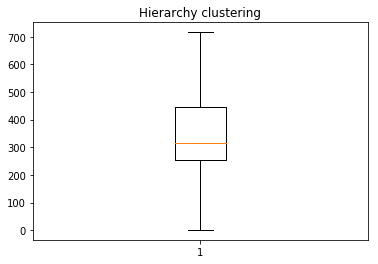

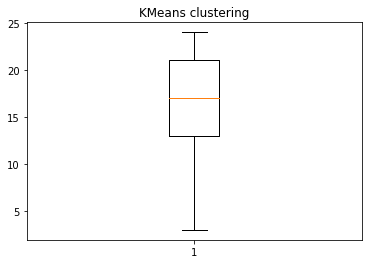

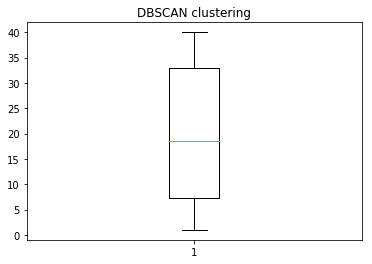

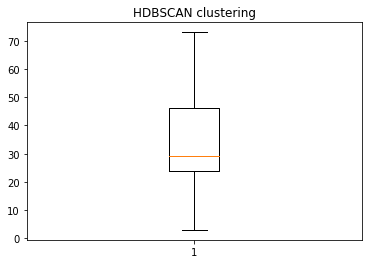

In [19]:
boxCLUSTER(unique_hier,'Hierarchy clustering')
boxCLUSTER(unique_kmeans,'KMeans clustering')
boxCLUSTER(unique_dbscan,'DBSCAN clustering')
boxCLUSTER(unique_hdbscan,'HDBSCAN clustering')

## Pre-process the data
* result_hier      9100 x 7
* result_kmeans    7128 x 7
* result_dbscan    796  x 7
* result_hdbscan   3528  x 7



## Plot each kind of clustering result separately

* Each line corresponds to one column
* Show the fluctuation of each method using different parameters



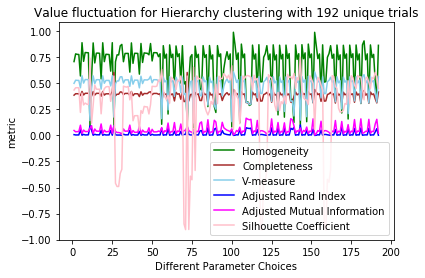

/home/penglab/anaconda3/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



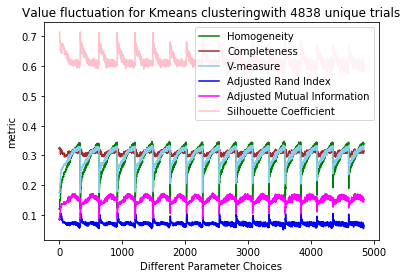

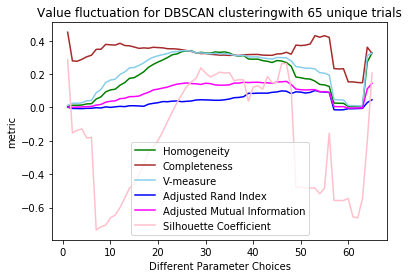

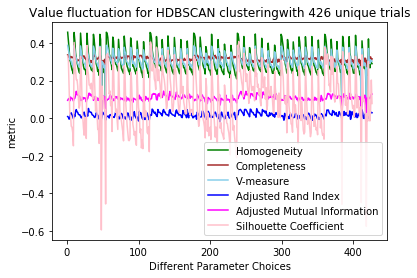

In [20]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
def plot_col(dflocal,cluster_name,dropF):
    #result_hier_self=result_hier.copy()
    if dropF:
        df = dflocal.iloc[:,:-1].drop_duplicates()
    else:
        df = dflocal.copy()
    df = df[df['Silhouette Coefficient']!='below'].copy()
    df = df[df['Silhouette Coefficient']!='above'].copy()
    col_Homogeneity = df['Homogeneity']
    col_Completeness = df['Completeness']
    col_Vmeasure= df['V-measure']
    col_ARI = df['Adjusted Rand Index']
    col_AMI = df['Adjusted Mutual Information']
    col_SC = df['Silhouette Coefficient']
    
    x_axix=range(1,df.shape[0]+1)

    plt.title('Value fluctuation for '+str(cluster_name)+'with '+str(df.shape[0])+' unique trials')
    plt.plot(x_axix, col_Homogeneity.tolist(), color='green', label='Homogeneity')
    plt.plot(x_axix, col_Completeness.tolist(), color='brown', label='Completeness')
    plt.plot(x_axix, col_Vmeasure.tolist(),  color='skyblue', label='V-measure')
    plt.plot(x_axix, col_ARI.tolist(), color='blue', label='Adjusted Rand Index')
    plt.plot(x_axix, col_AMI.tolist(), color='magenta', label='Adjusted Mutual Information')
    plt.plot(x_axix, col_SC.tolist(), color='pink', label='Silhouette Coefficient')
    plt.legend() # 显示图例
    #a=['','H', 'C', 'V', 'ARI', 'AMI', 'SC']
    #plt.xticks(arange(len(a)),a)
    plt.xlabel('Different Parameter Choices')
    plt.ylabel('metric')
    plt.show()
    

plot_col(result_hier.copy(),'Hierarchy clustering ',1)

plot_col(result_kmeans.copy(),'Kmeans clustering',1)

plot_col(result_dbscan.copy(),'DBSCAN clustering',1)

plot_col(result_hdbscan.copy(),'HDBSCAN clustering',1)

# To compare all the results for different metirc
### Detail
* metric can be 'Homogeneity','Completeness','V-measure','Adjusted Rand Index','Adjusted Mutual Information','Silhouette Coefficient'
* Delete clustering result leading to cluster less than 2 or # of cluster = # of swc files

### The unique_* below is a dataframe containing the unique rows of the original trails, it also record number of cluster under that parameter

#### add SNN

In [21]:
result_snn= pd.DataFrame(columns =['Homogeneity', 'Completeness', 'V-measure', 'Adjusted Rand Index',
       'Adjusted Mutual Information', 'Silhouette Coefficient', 'parameter',
       'Cluster Num'],index=['snn0'])
_ = ns. get_clusters(method='SNN_community',
                     karg_dict={'knn':5,
                                'metric':'minkowski',
                                'method':'FastGreedy'})
h = metrics.homogeneity_score(ns.metadata['CellType'],ns.metadata['Cluster'])
c = metrics.completeness_score(ns.metadata['CellType'],ns.metadata['Cluster'])
V = metrics.v_measure_score(ns.metadata['CellType'],ns.metadata['Cluster'])
ARI = metrics.adjusted_rand_score(ns.metadata['CellType'],ns.metadata['Cluster'])
AMI = metrics.adjusted_mutual_info_score(ns.metadata['CellType'],ns.metadata['Cluster'])
typeR, typeC = np.unique(ns.metadata['Cluster'], return_counts = True)
if len(typeR)<2:
    SS = 'below'
elif len(typeR)>=ns.UMAP.shape[0]:
    SS = 'above'
else:
    SS = metrics.silhouette_score(ns.UMAP, ns.metadata['Cluster'], metric='sqeuclidean')
result_snn.loc['snn0','Homogeneity']= h
result_snn.loc['snn0','Completeness']= c
result_snn.loc['snn0','V-measure']=V
result_snn.loc['snn0','Adjusted Rand Index']=ARI
result_snn.loc['snn0','Adjusted Mutual Information']=AMI
result_snn.loc['snn0','Silhouette Coefficient']=SS
result_snn.loc['snn0','parameter']=str({'knn':5,
                                'metric':'minkowski',
                                'method':'FastGreedy'})
result_snn.loc['snn0','Cluster Num']=len(typeR)
unique_snn = result_snn.copy()
unique_snn.to_excel('/home/penglab/FeaCal/dataSource/axonMor/unique_snn.xlsx')
unique_snn = pd.read_excel('/home/penglab/FeaCal/dataSource/axonMor/unique_snn.xlsx', index_col=0)

Result of SNN_community
Homogeneity: 0.306
Completeness: 0.314
V-measure: 0.310
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.153
Silhouette Coefficient: 0.310


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



#  Look into the top ten rows which maximizing ARI
### function maxARI(uniqueDF,cluster_method,swcDF,metric,flipF,size_Z)
* **uniqueDF** is the dataframe with unrepeated parameters
* **cluster_method** can be 'Hierarchy','Kmeans', 'DBSCAN','HDBSCAN','' 
* **swcDF** is the dataframe containing the coordinate of the soma
* **metric** can be 'braycurtis', 'canberra', 'chebyshev', 'cityblock', 'correlation', 'cosine', 'dice', 'euclidean', 'hamming', 'jaccard', 'jensenshannon', 'kulsinski', 'mahalanobis', 'matching', 'minkowski', 'rogerstanimoto', 'russellrao', 'seuclidean', 'sokalmichener', 'sokalsneath', 'sqeuclidean', 'yule'

* **flipF**: 
    * if 1, will flip all the soma to the same hemishphere
* **size_Z** the size of z axis of the brain
* **clusterT** the minimum and maximum threshold for number of cluster
* **somaDF** is the dataframe containing the region of soma: ns.features['soma_features'].region
* **axonDF** is the dataframe containing the region of axon: ns.features['projection_features'].raw_data
* **normaF** is the indicator for whether normalize the result or not.
#* **row_value** is the number of rows to take into comparison.
* **Ffromto** is the indicator for whether return the from-to dataframe for chord diagram.

In [22]:
def normalize(df, log=True):
    scaled_data = np.array(df) / np.sum(df, axis=0).values.reshape(-1,1) * 100000
    if log:
        scaled_data = np.log(scaled_data+100)
    scaled_dataDF = pd.DataFrame(scaled_data, index=df.index, columns=df.columns)
    return scaled_dataDF

In [23]:
import ast
from scipy.spatial.distance import pdist, squareform
import numpy as np
import matplotlib as mpl
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
def maxARIdic(uniqueDF,cluster_method,swcDF,flipF,size_Z,clusterT,somaDF,axonDF,normaF,Ffromto):
    #if the setting cluster is not satisfied, will print the final number of cluster
    printF=0
    [min_Clusternum,max_Clusternum]=clusterT
    somaregionDF = somaDF.copy()
    axonregionDF = axonDF.copy()            
    df_pre = uniqueDF.copy()
    df_pre = df_pre[df_pre['Silhouette Coefficient']!='below'].copy()
    df_pre = df_pre[df_pre['Silhouette Coefficient']!='above'].copy()
    df_pre = df_pre[df_pre['Completeness']!=1].copy()
    df_pre = df_pre[df_pre['Adjusted Rand Index']>0].copy()
    df_pre.sort_values('Adjusted Rand Index',inplace=True,ascending=False)
    df_pre = df_pre[df_pre['Cluster Num']<=max_Clusternum].copy()
    df_pre = df_pre[df_pre['Cluster Num']>=min_Clusternum].copy()
    
    #under each parameter
    if df_pre.shape[0]==0:
        printF = 1
        print('************')
        print('The input cluster number range is not suitable, just from the swc files which corresponds to the min 40 cluster number and selected the one maximizing ARI\n')
        df_pre = uniqueDF.copy()
        df_pre = df_pre[df_pre['Silhouette Coefficient']!='below'].copy()
        df_pre = df_pre[df_pre['Silhouette Coefficient']!='above'].copy()
        df_pre = df_pre[df_pre['Completeness']!=1].copy()
        df_pre.sort_values('Adjusted Rand Index',inplace=True,ascending=False)
        df_pre = df_pre[df_pre['Adjusted Rand Index']>0].copy()
        df_pre = df_pre[df_pre['Cluster Num']<=max_Clusternum+20].copy()
        df_pre = df_pre[df_pre['Cluster Num']>=min_Clusternum].copy()
        df_pre = df_pre.iloc[:min(20,df_pre.shape[0]),:].copy()
        df_pre.sort_values('Cluster Num',inplace=True,ascending=True)
    if cluster_method == 'SNN_community':
        df_pre = uniqueDF.copy()
    iter_idx = df_pre.index[0]
    _ = ns. get_clusters(method = cluster_method,karg_dict = ast.literal_eval(df_pre.loc[iter_idx]['parameter']))
    print('For '+str(cluster_method) +' method, the most suitable parameter is '+str(df_pre.loc[iter_idx]['parameter']))
    somaregionDF['cluster'] = ns.metadata['Cluster']
    axonregionDF['cluster'] = ns.metadata['Cluster']
    V = metrics.v_measure_score(ns.metadata['CellType'],ns.metadata['Cluster'])
    ARI = metrics.adjusted_rand_score(ns.metadata['CellType'],ns.metadata['Cluster'])
    print('For '+str(cluster_method) +' method, the ARI is '+str(ARI))
    AMI = metrics.adjusted_mutual_info_score(ns.metadata['CellType'],ns.metadata['Cluster'])
    typeR, typeC = np.unique(ns.metadata['Cluster'], return_counts = True)
    if printF:
        print('The setting cluster number\'s limit is not satisfied, the final number of cluster is '+str(len(typeR)))
    else:
        print('The setting cluster number\'s limit is satisfied, the final number of cluster is '+str(len(typeR)))
    if cluster_method == 'HDBSCAN':
        delist=np.array([])
        for itertype in typeR:
            if itertype[1]=='-':
                delist = np.append(delist,itertype)
            if itertype[1]=='0':
                delist=np.append(delist,itertype)
        detailDF = pd.DataFrame(index = np.setdiff1d(typeR,delist),columns = ['swc list','soma region',
                                                                              'max soma','total soma',
                                                                              'max axon'])
    else:
        detailDF = pd.DataFrame(index = typeR,columns = ['swc list','soma region','max soma','total soma',
                                                         'max axon'])
    #
    #detailDF.loc[:,'Cluster Type'] = detailDF.index
    if len(typeR)<2:
        SS = 'below'
    elif len(typeR)>=ns.UMAP.shape[0]:
        SS = 'above'
    else:
        SS = metrics.silhouette_score(ns.UMAP, ns.metadata['Cluster'], metric='sqeuclidean')
        #LABEL LIST CAN BE DETELETED LATER


    # for each cluster result UNDER EACH PARAMETER
    somaCLUSTERlist = []
    axonCLUSTERlist = []

    #axonCLUSTER = pd.DataFrame(index = axonregionDF.columns[:-1])
    for label_idx in detailDF.index:
        axonTEMPdf = pd.DataFrame(index = axonregionDF.columns[:-1])
        swcINlabel = somaregionDF[somaregionDF['cluster']==label_idx]
        detailDF.loc[label_idx,'swc list'] = (swcINlabel.index).tolist()
        #assert(len(inter_list)==somaDF[somaDF['cluster'] !=label_idx].shape[0])
        detailDF.loc[label_idx,'soma region'] = swcINlabel['Region'].tolist()
        del_soma_region=detailDF.loc[label_idx,'soma region']
        while 'unknown' in del_soma_region:
            del_soma_region.remove('unknown')
            del_soma_region.append('others')
        while 'fiber tracts' in del_soma_region:
            del_soma_region.remove('fiber tracts')
            del_soma_region.append('others')
        IDrange, IDcounts = np.unique(del_soma_region, return_counts = True)
        #sort the counting
        count_sort_ind = np.argsort(-IDcounts)
        dicitem = []
        for i in range(1,min(len(IDrange)+1,4)):
            dicitem.append(str(i)+'somaR')
        for i in range(1,min(len(IDrange)+1,4)):
            dicitem.append(str(i)+'somaC')
        #select the first three regions
        dicvalue = IDrange[count_sort_ind][0:min(3,len(IDrange))]
        dicvalue = np.append(dicvalue,IDcounts[count_sort_ind][0:min(3,len(IDrange))])
        detailDF.loc[label_idx,'max soma'] = str(dict(zip(dicitem, dicvalue)))
        somaCLUSTERlist.append(detailDF.loc[label_idx,'max soma'] )
        detailDF.loc[label_idx,'total soma'] = swcINlabel.shape[0]

        #axonLABEL stores all the rows under same cluster
        axonLABEL = axonregionDF[axonregionDF['cluster']==label_idx].copy()
        axonLABEL.drop('cluster', axis=1,inplace=True)
        axonTEMPdf[label_idx]=axonLABEL.sum()
        if 'contra_fiber tracts' in axonTEMPdf.index:
            axonTEMPdf.drop(index=['contra_fiber tracts'],inplace = True)
        if 'ipsi_fiber tracts' in axonTEMPdf.index:
            axonTEMPdf.drop(index=['ipsi_fiber tracts'],inplace = True)
        if normaF:
            #normalize the sum
            axonTEMPdf = normalize(axonTEMPdf , log=True)
        axonTEMPdf.sort_values(by=label_idx, ascending=False, inplace=True)
        dicitem = []
        for i in range(1,4):
            dicitem.append(str(i)+'axonR')
        for i in range(1,4):
            dicitem.append(str(i)+'axonC')
        dicvalue = axonTEMPdf.index[:3]
        dicvalue = np.append(dicvalue,axonTEMPdf.loc[:,label_idx][:3])
        detailDF.loc[label_idx,'max axon'] = str(dict(zip(dicitem, dicvalue)))
        axonCLUSTERlist.append(detailDF.loc[label_idx,'max axon'] )
    if not Ffromto:
        return detailDF
    else:
        clusterDF=detailDF.copy()
        dfname=[]
        for cluster_idx in clusterDF.index:
            dfname.append((str(cluster_idx) + 'DF'))

        #generate a dataframe for each cluster
        dicDF = {k:None for k in dfname}

        #iterate the correponding dataframe and cluster at the same time
        for key_iter,cluster_idx in zip(dicDF.keys(),clusterDF.index):
            dic_soma = ast.literal_eval(clusterDF.loc[cluster_idx,'max soma'])
            iterL = int(len(dic_soma.keys())/2)
            somaNAME = []
            somaCOUNT = []

            for i in range(1,int(iterL)+1):
                somaNAME.append(dic_soma[(str(i)+'somaR')])
            for i in range(1,iterL+1):
                somaCOUNT.append(dic_soma[str(i)+'somaC'])
            somaArr = np.array(somaCOUNT, dtype = float)
            somaArr = somaArr/sum(somaArr)
            dic_axon = ast.literal_eval(clusterDF.loc[cluster_idx,'max axon'])
            iterL = int(len(dic_axon.keys())/2)
            axonNAME = []
            axonCOUNT = []
            for i in range(1,iterL+1):
                axonNAME.append(dic_axon[(str(i)+'axonR')])
            for i in range(1,iterL+1):
                axonCOUNT.append(dic_axon[str(i)+'axonC']) 

            tempDF = pd.DataFrame()
            for row_soma in somaNAME:
                for col_axon,len_axon in zip(axonNAME,axonCOUNT):
                    tempDF.loc[row_soma, col_axon] = len_axon

            assert(tempDF.shape[0] == len(somaArr))  
            tempDF=tempDF.astype(float)
            for i in range(tempDF.shape[0]):
                tempDF.iloc[i,:] = tempDF.iloc[i,:]*somaArr[i].copy()

            newDF = pd.DataFrame(columns=['from','to','value'],index=range(tempDF.shape[0]*tempDF.shape[1]))
            newDF.loc[:,'from'] = (tempDF.index).tolist()*len(tempDF.columns)
            newDF.loc[:,'to'] = [ele for ele in (tempDF.columns).tolist() for _ in range(len(tempDF.index))]
            valuelist=[]
            for iter_col in tempDF.columns:
                for iter_row in tempDF.index:
                    valuelist.append(tempDF.loc[iter_row,iter_col])
            newDF.loc[:,'value']=valuelist
            dicDF[key_iter]= newDF.copy()
    return dicDF
     

### The following obtained the first 10 rows which maximizing ARI

#### Only count the nearst 400 inter-cluster soma

In [24]:
hier_as = maxARIdic(unique_hier,'Hierarchy',ns.features['soma_features'].raw_data.copy(),1,11400.0,[8,40],
                    ns.features['soma_features'].region,ns.features['projection_features'].raw_data,1,0)
hier_as.to_excel('/home/penglab/FeaCal/dataSource/axonMor/hier_as.xlsx')
hier_as=pd.read_excel('/home/penglab/FeaCal/dataSource/axonMor/hier_as.xlsx', index_col=0)
dicHIER= maxARIdic(unique_hier,'Hierarchy',ns.features['soma_features'].raw_data.copy(),1,11400.0,[8,40],
                    ns.features['soma_features'].region,ns.features['projection_features'].raw_data,1,1)
for iter_key in dicHIER.keys():
    tempDF = dicHIER[iter_key]
    #print(tempDF)
    #(tempDF).to_csv('/home/penglab/FeaCal/dataSource/somaLoc/HIER/'+str(iter_key)+'.csv')

Result of Hierarchy CLustering
Homogeneity: 0.216
Completeness: 0.311
V-measure: 0.255
Adjusted Rand Index: 0.088


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Adjusted Mutual Information: 0.134
Silhouette Coefficient: 0.228
For Hierarchy method, the most suitable parameter is {'L_method': 'weighted', 'L_metric': 'mahalanobis', 'criterionH': 'distance', 'depth': 2, 'R': None, 't': 0.9, 'optimal_ordering': False}
For Hierarchy method, the ARI is 0.08785414289406115
The setting cluster number's limit is satisfied, the final number of cluster is 8
Result of Hierarchy CLustering


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Homogeneity: 0.216
Completeness: 0.311
V-measure: 0.255
Adjusted Rand Index: 0.088
Adjusted Mutual Information: 0.134
Silhouette Coefficient: 0.228
For Hierarchy method, the most suitable parameter is {'L_method': 'weighted', 'L_metric': 'mahalanobis', 'criterionH': 'distance', 'depth': 2, 'R': None, 't': 0.9, 'optimal_ordering': False}
For Hierarchy method, the ARI is 0.08785414289406115
The setting cluster number's limit is satisfied, the final number of cluster is 8


In [25]:
kmeans_as = maxARIdic(unique_kmeans,'Kmeans',ns.features['soma_features'].raw_data.copy(),1,11400.0,[8,40],
                    ns.features['soma_features'].region,ns.features['projection_features'].raw_data,1,0)
kmeans_as.to_excel('/home/penglab/FeaCal/dataSource/axonMor/kmeans_as.xlsx')
kmeans_as=pd.read_excel('/home/penglab/FeaCal/dataSource/axonMor/kmeans_as.xlsx', index_col=0)
dicKMEANS= maxARIdic(unique_kmeans,'Kmeans',ns.features['soma_features'].raw_data.copy(),1,11400.0,[8,40],
                    ns.features['soma_features'].region,ns.features['projection_features'].raw_data,1,1)
for iter_key in dicKMEANS.keys():
    tempDF = dicKMEANS[iter_key]
    print(tempDF)
    #(tempDF).to_csv('/home/penglab/FeaCal/dataSource/somaLoc/KMEANS/'+str(iter_key)+'.csv')

/home/penglab/anaconda3/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



Result of Kmeans
Homogeneity: 0.218
Completeness: 0.308
V-measure: 0.255
Adjusted Rand Index: 0.083
Adjusted Mutual Information: 0.135
Silhouette Coefficient: 0.676
For Kmeans method, the most suitable parameter is {'n_clusters': 8, 'init': 'k-means++', 'n_init': 21, 'max_iter': 300, 'tol': 0.0001, 'precompute_distances': False, 'verbose': 0, 'random_state': None, 'copy_x': True, 'n_jobs': None, 'algorithm': 'auto'}
For Kmeans method, the ARI is 0.08343509698163794
The setting cluster number's limit is satisfied, the final number of cluster is 8
Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



Homogeneity: 0.221
Completeness: 0.311
V-measure: 0.258
Adjusted Rand Index: 0.086
Adjusted Mutual Information: 0.138
Silhouette Coefficient: 0.676
For Kmeans method, the most suitable parameter is {'n_clusters': 8, 'init': 'k-means++', 'n_init': 21, 'max_iter': 300, 'tol': 0.0001, 'precompute_distances': False, 'verbose': 0, 'random_state': None, 'copy_x': True, 'n_jobs': None, 'algorithm': 'auto'}
For Kmeans method, the ARI is 0.08634966747579699
The setting cluster number's limit is satisfied, the final number of cluster is 8
     from         to     value
0     MOs   ipsi_MOs  7.276285
1     MOp   ipsi_MOs  2.046455
2  others   ipsi_MOs  1.136920
3     MOs   ipsi_MOp  6.472197
4     MOp   ipsi_MOp  1.820305
5  others   ipsi_MOp  1.011281
6     MOs  ipsi_ACAd  6.213046
7     MOp  ipsi_ACAd  1.747419
8  others  ipsi_ACAd  0.970788
     from         to     value
0     SUB   ipsi_SUB  3.683196
1     MOs   ipsi_SUB  2.722362
2  others   ipsi_SUB  2.402084
3     SUB  ipsi_RSPv  3.652098


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



In [26]:
dbscan_as = maxARIdic(unique_dbscan,'DBSCAN',ns.features['soma_features'].raw_data.copy(),1,11400.0,[8,40],
                    ns.features['soma_features'].region,ns.features['projection_features'].raw_data,1,0)
dbscan_as.to_excel('/home/penglab/FeaCal/dataSource/axonMor/dbscan_as.xlsx')
dbscan_as=pd.read_excel('/home/penglab/FeaCal/dataSource/axonMor/dbscan_as.xlsx', index_col=0)
dicDBSCAN= maxARIdic(unique_dbscan,'DBSCAN',ns.features['soma_features'].raw_data.copy(),1,11400.0,[8,40],
                    ns.features['soma_features'].region,ns.features['projection_features'].raw_data,1,1)
for iter_key in dicDBSCAN.keys():
    tempDF = dicDBSCAN[iter_key]
    print(tempDF)
    #(tempDF).to_csv('/home/penglab/FeaCal/dataSource/somaLoc/DBSCAN/'+str(iter_key)+'.csv')

Result of DBSCAN
Homogeneity: 0.158
Completeness: 0.431
V-measure: 0.231
Adjusted Rand Index: 0.102
Adjusted Mutual Information: 0.107
Silhouette Coefficient: -0.483
For DBSCAN method, the most suitable parameter is {'eps': 0.31, 'min_samples': 5, 'metric': 'euclidean', 'metric_params': None, 'algorithm': 'auto', 'leaf_size': 30, 'p': None, 'n_jobs': None}
For DBSCAN method, the ARI is 0.10187925011450155
The setting cluster number's limit is satisfied, the final number of cluster is 8
Result of DBSCAN
Homogeneity: 0.158
Completeness: 0.431
V-measure: 0.231
Adjusted Rand Index: 0.102
Adjusted Mutual Information: 0.107
Silhouette Coefficient: -0.483
For DBSCAN method, the most suitable parameter is {'eps': 0.31, 'min_samples': 5, 'metric': 'euclidean', 'metric_params': None, 'algorithm': 'auto', 'leaf_size': 30, 'p': None, 'n_jobs': None}
For DBSCAN method, the ARI is 0.10187925011450155
The setting cluster number's limit is satisfied, the final number of cluster is 8


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_m

  from        to     value
0  MOs  ipsi_MOs  6.003950
1  CA1  ipsi_MOs  3.001975
2   PL  ipsi_MOs  1.500987
3  MOs   ipsi_PL  5.099887
4  CA1   ipsi_PL  2.549943
5   PL   ipsi_PL  1.274972
6  MOs   ipsi_CP  5.076388
7  CA1   ipsi_CP  2.538194
8   PL   ipsi_CP  1.269097
     from         to     value
0     MOs    ipsi_CP  6.003403
1  others    ipsi_CP  2.099551
2     SUB    ipsi_CP  1.312219
3     MOs   ipsi_MOs  5.948389
4  others   ipsi_MOs  2.080311
5     SUB   ipsi_MOs  1.300194
6     MOs  contra_CP  5.527799
7  others  contra_CP  1.933219
8     SUB  contra_CP  1.208262
   from         to     value
0   MOs   ipsi_MOs  7.304555
1  ACAd   ipsi_MOs  2.282673
2   CA3   ipsi_MOs  0.913069
3   MOs  ipsi_ACAd  6.490187
4  ACAd  ipsi_ACAd  2.028183
5   CA3  ipsi_ACAd  0.811273
6   MOs   ipsi_CA3  6.465633
7  ACAd   ipsi_CA3  2.020510
8   CA3   ipsi_CA3  0.808204
   from           to     value
0    DG    ipsi_ENTm  4.411182
1   PRE    ipsi_ENTm  3.781013
2  POST    ipsi_ENTm  1.680450
3    D

In [27]:
hdbscan_as = maxARIdic(unique_hdbscan,'HDBSCAN',ns.features['soma_features'].raw_data.copy(),1,11400.0,[8,40],
                    ns.features['soma_features'].region,ns.features['projection_features'].raw_data,1,0)
hdbscan_as.to_excel('/home/penglab/FeaCal/dataSource/axonMor/hdbscan_as.xlsx')
hdbscan_as=pd.read_excel('/home/penglab/FeaCal/dataSource/axonMor/dbscan_as.xlsx', index_col=0)
dicHDBSCAN= maxARIdic(unique_hdbscan,'HDBSCAN',ns.features['soma_features'].raw_data.copy(),1,11400.0,[8,40],
                      ns.features['soma_features'].region,ns.features['projection_features'].raw_data,1,1)
for iter_key in dicHDBSCAN.keys():
    tempDF = dicHDBSCAN[iter_key]
    print(tempDF)
    #(tempDF).to_csv('/home/penglab/FeaCal/dataSource/somaLoc/HDBSCAN/'+str(iter_key)+'.csv')

Result of HDBSCAN
Homogeneity: 0.344
Completeness: 0.317
V-measure: 0.330
Adjusted Rand Index: 0.052
Adjusted Mutual Information: 0.122
Silhouette Coefficient: 0.232
For HDBSCAN method, the most suitable parameter is {'min_cluster_size': 5, 'metric': 'manhattan', 'alpha': 0.8, 'min_samples': 3, 'p': 2, 'algorithm': 'best', 'leaf_size': 40, 'approx_min_span_tree': True, 'gen_min_span_tree': False, 'core_dist_n_jobs': 4, 'cluster_selection_method': 'eom', 'allow_single_cluster': False, 'prediction_data': False, 'match_reference_implementation': False}
For HDBSCAN method, the ARI is 0.05177167199451809
The setting cluster number's limit is satisfied, the final number of cluster is 39


/home/penglab/anaconda3/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluste

Result of HDBSCAN
Homogeneity: 0.344
Completeness: 0.317
V-measure: 0.330
Adjusted Rand Index: 0.052
Adjusted Mutual Information: 0.122
Silhouette Coefficient: 0.232
For HDBSCAN method, the most suitable parameter is {'min_cluster_size': 5, 'metric': 'manhattan', 'alpha': 0.8, 'min_samples': 3, 'p': 2, 'algorithm': 'best', 'leaf_size': 40, 'approx_min_span_tree': True, 'gen_min_span_tree': False, 'core_dist_n_jobs': 4, 'cluster_selection_method': 'eom', 'allow_single_cluster': False, 'prediction_data': False, 'match_reference_implementation': False}
For HDBSCAN method, the ARI is 0.05177167199451809
The setting cluster number's limit is satisfied, the final number of cluster is 39
   from         to     value
0   MOs   ipsi_MOs  6.427872
1   MOp   ipsi_MOs  2.142624
2  ProS   ipsi_MOs  2.142624
3   MOs  ipsi_ProS  5.755083
4   MOp  ipsi_ProS  1.918361
5  ProS  ipsi_ProS  1.918361
6   MOs  ipsi_ACAd  5.597614
7   MOp  ipsi_ACAd  1.865871
8  ProS  ipsi_ACAd  1.865871
   from         to  

In [28]:
snn_as = maxARIdic(unique_snn,'SNN_community',ns.features['soma_features'].raw_data.copy(),1,11400.0,[8,80],
                    ns.features['soma_features'].region,ns.features['projection_features'].raw_data,1,0)
snn_as.to_excel('/home/penglab/FeaCal/dataSource/axonMor/snn_as.xlsx')
snn_as=pd.read_excel('/home/penglab/FeaCal/dataSource/axonMor/snn_as.xlsx', index_col=0)
dicSNN= maxARIdic(unique_snn,'SNN_community',ns.features['soma_features'].raw_data.copy(),1,11400.0,[8,40],
                      ns.features['soma_features'].region,ns.features['projection_features'].raw_data,1,1)
for iter_key in dicHDBSCAN.keys():
    tempDF = dicHDBSCAN[iter_key]
    print(tempDF)
    #(tempDF).to_csv('/home/penglab/FeaCal/dataSource/somaLoc/HDBSCAN/'+str(iter_key)+'.csv')v

Result of SNN_community


/home/penglab/anaconda3/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



Homogeneity: 0.306
Completeness: 0.314
V-measure: 0.310
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.153
Silhouette Coefficient: 0.310
For SNN_community method, the most suitable parameter is {'knn': 5, 'metric': 'minkowski', 'method': 'FastGreedy'}
For SNN_community method, the ARI is 0.06673692576743263
The setting cluster number's limit is satisfied, the final number of cluster is 23


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



Result of SNN_community
Homogeneity: 0.306
Completeness: 0.314
V-measure: 0.310
Adjusted Rand Index: 0.067
Adjusted Mutual Information: 0.153
Silhouette Coefficient: 0.310
For SNN_community method, the most suitable parameter is {'knn': 5, 'metric': 'minkowski', 'method': 'FastGreedy'}
For SNN_community method, the ARI is 0.06673692576743263
The setting cluster number's limit is satisfied, the final number of cluster is 23


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



   from         to     value
0   MOs   ipsi_MOs  6.427872
1   MOp   ipsi_MOs  2.142624
2  ProS   ipsi_MOs  2.142624
3   MOs  ipsi_ProS  5.755083
4   MOp  ipsi_ProS  1.918361
5  ProS  ipsi_ProS  1.918361
6   MOs  ipsi_ACAd  5.597614
7   MOp  ipsi_ACAd  1.865871
8  ProS  ipsi_ACAd  1.865871
   from         to     value
0   MOs   ipsi_MOs  5.712073
1  ACAd   ipsi_MOs  2.856037
2   CA3   ipsi_MOs  1.904024
3   MOs  ipsi_ACAd  5.362043
4  ACAd  ipsi_ACAd  2.681021
5   CA3  ipsi_ACAd  1.787348
6   MOs   ipsi_CA3  5.206279
7  ACAd   ipsi_CA3  2.603140
8   CA3   ipsi_CA3  1.735426
   from         to     value
0   MOs   ipsi_MOs  9.211545
1  ACAd   ipsi_MOs  0.921154
2    DG   ipsi_MOs  0.921154
3   MOs   ipsi_PIR  7.470654
4  ACAd   ipsi_PIR  0.747065
5    DG   ipsi_PIR  0.747065
6   MOs  ipsi_ACAd  7.301739
7  ACAd  ipsi_ACAd  0.730174
8    DG  ipsi_ACAd  0.730174
  from        to     value
0  MOs  ipsi_MOs  3.864783
1  SUB  ipsi_MOs  3.864783
2  CA1  ipsi_MOs  1.932391
3  MOs  ipsi_PRE  3.63

In [29]:
tempDF

from         to     value
0  MOp   ipsi_MOp  4.950027
1  MOs   ipsi_MOp  3.300018
2  CA1   ipsi_MOp  1.650009
3  MOp   ipsi_MOs  4.909553
4  MOs   ipsi_MOs  3.273035
5  CA1   ipsi_MOs  1.636518
6  MOp  ipsi_VISp  4.707582
7  MOs  ipsi_VISp  3.138388
8  CA1  ipsi_VISp  1.569194